In [2]:
# Changelog: 
# 23 Jan 2022: K-S Test, Anderson K-samples Test, Energy Test
# 18 Feb 2022: J-S Distance

# Setup

In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

## short tutorial: How to profile the time of cell

In [2]:
%load_ext snakeviz

In [3]:
#import glob

In [4]:
#%%prun -D program.prof
#files = glob.glob('*.txt')
#for file in files:
#    with open(file) as f:
#        print(hashlib.md5(f.read().encode('utf-8')).hexdigest())

In [5]:
%load_ext autoreload
%autoreload 2

In [12]:
res_a = {"000000101000": 5602, "000000101010": 1575, "000000000000": 742, "000000101001": 56, "000000000010": 195, "000000101011": 12, "000000000001": 9, "000000000011": 1}
res_b = {"000000000001": 4, "000000101010": 1588, "000000101000": 5535, "000000000011": 2, "000000000000": 767, "000000000010": 219, "000000101001": 60, "000000101011": 17}

In [7]:
# program 165 in exp v12
#res_a = {"1000001011000110010": 1, "1001000010001001101": 1, "1100110110000111110": 1, "0000010100101101100": 1, "0101011000011011010": 1, "1100100110001100001": 1, "0010011001100011110": 2, "1001000011111001010": 1, "1101010110011001001": 1, "1110001011001100111": 1, "0011101011011000100": 1, "0101100010011011001": 1, "0111111110110101011": 1, "0000010101000110111": 1, "1111000000111101100": 3, "0101100110011011011": 1, "1001011101111100100": 1, "0100100010101001111": 2, "0010000110000010110": 1, "1101010001110100001": 1, "1001000001110000000": 2, "0111001010011011011": 1, "0001100010010100011": 2, "1011101001110001010": 1, "1000000001101001010": 1, "1111111110110010001": 1, "1011011000011101000": 1, "0011010010110010011": 1, "1100011000101000110": 2, "0100011100000010101": 1, "0110000110100110001": 2, "0100010000000101100": 1, "1110011100111010010": 1, "0101101100010101011": 1, "1101010110110000101": 5, "1001110111011100111": 1, "0011110011011001000": 1, "0001101111010001010": 3, "0011000001111011000": 1, "1010110001100010110": 1, "1000010001011001100": 1, "0001100111011100000": 1, "1000000011100000000": 1, "1101111011111111000": 1, "1100101001101110001": 1, "1111011100001011111": 1, "0111101110111000110": 1, "1100110100010011010": 1, "1000110111000110100": 1, "0010111001100101110": 1, "0110011110000000101": 1, "1000110111010111100": 1, "0010001001001011010": 2, "1010111000001101001": 1, "0111010010001110111": 1, "1111110010110000111": 1, "1010011001100101010": 2, "1011000001011110100": 1, "1111010110001101111": 1, "1001001011011111001": 2, "1110101010001111001": 1, "1101111100100010111": 2, "0111011110111011111": 1, "1111111101111100011": 1, "0110011110000011110": 1, "1001001011100001100": 1, "1001010101101001001": 1, "0011100001010001011": 1, "1101000010110101000": 1, "0011000011010110010": 1, "1101110000011000011": 1, "0001110011001000001": 1, "0000001010010110000": 1, "0110011001000111110": 1, "1010111011001111110": 1, "0011101011010000111": 1, "0011011001111010100": 1, "0001110111011101100": 1, "0000000100100110110": 1, "1100010000100110000": 2, "1110010100011001001": 1, "0010011011000000110": 1, "1001010010100010001": 1, "0100010000100011011": 1, "1010011010100100010": 1, "0101101110011001101": 1, "1111010110111100111": 1, "0111001100111111111": 1, "0000111001000001001": 1, "0011000001011111111": 1, "1100000010101011100": 1, "1000000101101000110": 1, "0010100110100001110": 1, "0011110101001011010": 1, "0110111011001111100": 1, "1110101010100010010": 1, "0110110110010110001": 1, "1011010001110011111": 1, "1110100001100110001": 1, "1101110000110110101": 1, "1110101100001100101": 1, "1011010101110100101": 1, "1101100111110101010": 1, "0010100011100100100": 1, "1101010110111111111": 1, "0001111111110001100": 1, "0011101011110101001": 1, "1011111111100100001": 1, "0000100111100100111": 1, "1110011101001000010": 1, "0110000010010001010": 1, "0110011100000001101": 1, "1010001011100000111": 1, "0010101011001001010": 1, "0000110001101100111": 1, "1011110101011001111": 1, "0001000101011000001": 1, "1010110000011011100": 1, "1000000011101100010": 2, "0111011110100110100": 1, "0110011100000101001": 1, "0111000100110000001": 2, "0000110011001101100": 1, "0101001000110101111": 1, "0010010001101110000": 1, "1111100010111000101": 1, "0010101111000110100": 1, "1111001110110111110": 1, "1111010100011011001": 1, "0110001001000010010": 1, "1100010001000011110": 1, "0100001100011101011": 1, "0000110011000100010": 1, "0011010010010100111": 1, "1110101110100100000": 1, "0011110111111100100": 1, "1110010010101110011": 2, "0100101001100101000": 1, "0010111000010000001": 1, "1011000110011100110": 1, "1110100010101101011": 1, "0100111000100001101": 1, "0010010011101101111": 2, "1011001111111001101": 1, "1000101000010011010": 1, "0101111100000000011": 1, "1001000111011110111": 1, "0100100110100001001": 1, "1100000100001110000": 1, "0001010001011100111": 1, "1000001000001111111": 1, "1000001011001100000": 1, "0001111111011111000": 1, "1000011011100100100": 1, "1101111000111100000": 2, "1100100111101011110": 1, "1001011001010101010": 1, "0001111000011011101": 1, "1111010010110011111": 2, "1101010110001100001": 1, "1111011100010001001": 1, "1010101101101010100": 1, "1000101111101011100": 1, "1100100000001111100": 1, "0001110011111110110": 1, "0010010001000001011": 1, "1001011111111100101": 1, "1010010001001111011": 3, "0010011011000111111": 1, "1100010010000101011": 1, "1000101000101101000": 1, "0010011001101111011": 2, "1110101100101010010": 2, "0100010101101110011": 1, "0011010111101000101": 1, "0100110110011110010": 1, "1101100110111100111": 1, "1001101100010010001": 1, "0001010011111001000": 1, "1010111101011110011": 1, "1000010001011010110": 1, "0010100101000010001": 2, "0100011010100110110": 1, "0011101101111101000": 1, "0101101111111100110": 1, "1010000001110111110": 1, "1010111000101110010": 1, "0100010001000011101": 1, "0111110011000000101": 1, "1111001000110101111": 1, "0000100111101100011": 1, "0011101100110001011": 1, "1010001101000010000": 1, "0010011101100110010": 2, "1100010010001100100": 1, "1011000110110010010": 1, "1000111011101110010": 1, "1101010001000100001": 1, "1001011010111001110": 2, "0000010010110110100": 1, "1101000110111101001": 1, "1001010101011100001": 4, "0110000110000110001": 1, "0101100000110100100": 2, "1001111111111100100": 1, "1100001100100111110": 1, "0111010110010001001": 1, "1001110111001000110": 1, "1011101111011111100": 1, "1010110111101100001": 1, "1011110111011110110": 1, "0110010000101110110": 1, "0010110111010110111": 1, "1001110011011001101": 1, "1000100011011111001": 1, "0111100011110111101": 1, "0110110110101100101": 1, "0111101110111001000": 2, "0110111100011000111": 1, "0110001110100101101": 1, "1101001001010100010": 1, "0101010010000111101": 2, "0100100010001000110": 2, "0111010000011101000": 1, "0001101001001000010": 1, "1101010110010011011": 1, "0001110011000000101": 1, "1011000101000000011": 1, "0100101101001000000": 1, "0001010001011110111": 1, "0011101111111110000": 1, "1101011000011101001": 1, "1101110100000011100": 1, "0000001011101111101": 1, "0010100010100001100": 1, "0100001011101111101": 2, "0001111100111010110": 1, "1001100111011000110": 1, "0011100101110100110": 4, "0000011101111100000": 1, "0110010110101001010": 1, "0110001110101001001": 1, "0110110000001111111": 1, "0011100101111111101": 1, "1111001100111001100": 1, "1111111010011010101": 1, "0001110101110000000": 1, "0010001011110000000": 1, "0011011011010000110": 1, "1001010111110001011": 1, "1001101011111001001": 1, "0001001111111011111": 1, "1111001100010101001": 1, "1010011001001101000": 1, "0010101100100011100": 1, "1111011010110100010": 1, "0010010001101111001": 1, "1010001000001000111": 1, "0100000000000100100": 1, "0001010110011000011": 1, "0110010000101111000": 1, "0001110111010001000": 2, "1101000100010001010": 1, "0010110110110000001": 1, "1000001011000010011": 1, "0011000011111000100": 1, "0001101010010010000": 1, "0100100111000000110": 1, "1010101010100001101": 1, "1110011000100101010": 1, "1101011000111100110": 2, "0100111011100010001": 1, "1000000001001100100": 1, "1101001110011001011": 1, "1100011000101100001": 2, "1110000100100101010": 1, "0010100001000100011": 1, "0101101000010000010": 1, "1111000010000110110": 1, "1011000111011100000": 1, "0100100010111101111": 1, "0100011001001000101": 1, "1011001011111010111": 1, "1010000111001110000": 2, "0011001011111101010": 1, "1001101001111110000": 1, "1000010010010100001": 1, "0000001011101111100": 1, "0010101000011100011": 1, "0100011100101111000": 2, "1110100010101000011": 1, "0010010011100011101": 1, "0110001000001110101": 2, "1000100101000000101": 1, "0011100101111011100": 1, "1000000101101101111": 1, "1001001011110010000": 1, "0111110110111111101": 1, "0001110100010011110": 1, "0100011111000110101": 1, "1001010001000010111": 1, "0010011011100010000": 1, "1011110001101111110": 1, "0010000011001001110": 1, "1000010001001001111": 1, "0011011001011100100": 1, "0000111101000000110": 1, "1011100011111011001": 1, "0101110000101000000": 1, "0010100000101000000": 1, "1111011000110011110": 1, "1011010001010100101": 1, "0111100010110100010": 1, "1011000011111010000": 1, "1010011011000011100": 1, "1100011110000010111": 1, "0001000000101011101": 1, "0000010111011011011": 1, "1011111101010010110": 1, "0101001000010111000": 1, "0110001011100110110": 1, "1011010001110001111": 1, "1000111011101111111": 1, "1100000110101000111": 1, "1000100100100011100": 1, "0011001111111110000": 1, "1010010110101001101": 1, "1111010101011010110": 1, "0101000100110011001": 1, "0010010101001110101": 1, "1011111011001000001": 1, "1101001010111011001": 1, "1101010100110111100": 1, "0000111110101101000": 1, "1011110111010110010": 1, "0000000011000001101": 1, "1001010001011100000": 1, "1111010100010000010": 1, "1111010100010101101": 1, "1100100010000001000": 1, "0100011110000000011": 1, "0101000000111000110": 1, "1000001011100111011": 1, "0111000000110000100": 3, "0101010010110111100": 1, "1001100001111011100": 1, "1010010001001011011": 1, "1011000010011100101": 1, "0011011001111101011": 1, "1101100101000110100": 1, "1101000001010111110": 1, "0001010101111110101": 1, "0010111111000111101": 2, "0101110010011001001": 1, "0000010111110111110": 1, "1000111000000011101": 1, "1001011101111011101": 2, "1011010011111011101": 1, "0001001101111100000": 1, "0111100010011110000": 1, "1110100010100000111": 1, "0001110111001000100": 1, "0111001111001110001": 1, "1011011001010000100": 1, "0011000101011111101": 2, "1101101110011001010": 1, "0011110111101001101": 1, "1111001000110100101": 1, "0010001110101110111": 1, "1101111110110111010": 1, "0011010001010100011": 1, "1111001000011101001": 3, "1110101000000111010": 2, "0011101001010101001": 1, "1001110111110011101": 1, "1001011111110000000": 1, "1001111000000001001": 1, "0001011101110010010": 2, "1110110111100101010": 1, "1101000001111101100": 1, "1100111001000110100": 1, "1000111101000110000": 1, "0010101111101010000": 2, "1010000111101010000": 1, "0101101100010100011": 2, "1000101101001110101": 1, "1000111110101110101": 1, "1000111001100000101": 1, "0100001100000100011": 1, "0011010111110010111": 1, "1000000101000100010": 1, "0110111110100001110": 1, "0010001011001010110": 1, "1011011011110110011": 1, "0000100010001011111": 1, "0111101111110010010": 2, "0111010010110011101": 2, "1011001110101101101": 1, "0001010101001100011": 1, "1011111001111101110": 1, "1000111101001011101": 1, "1011000011010111000": 2, "1011011011111001001": 1, "0100110000100100100": 1, "1110101010000001011": 1, "0001110111110101000": 2, "0011101111010000010": 1, "0101010110101011101": 1, "0101010110110010001": 1, "1000010101001101101": 1, "0011010111010110000": 1, "1111111000001001110": 1, "1001111111101101101": 1, "0010010101001010101": 1, "1000100101100010111": 1, "1111000000100000110": 1, "1100101110100011000": 1, "0101010100111000110": 1, "1011010101011010000": 1, "0000110000000101011": 2, "0111101010111000100": 1, "0000001111101001111": 2, "0101101100010001010": 1, "1110001100111010101": 1, "0101101100010101100": 1, "0101110000110100100": 3, "1010011111100000110": 1, "0000010011110010110": 1, "1000000101100000101": 1, "0110111100011100111": 1, "0011001101010110100": 1, "0100100110100100001": 1, "0010111111001001110": 1, "1011011011011111110": 1, "1111000000110001010": 1, "1110001000100110011": 1, "1010101101001111010": 1, "1110100011100110001": 1, "0111100111010010001": 2, "0000000011100110011": 1, "1010101101000011110": 1, "1111010011110001110": 1, "0110100011011011111": 1, "0010010110011100010": 1, "1100110000001111100": 1, "0001111111101100111": 1, "0001100111110100000": 1, "1001111011011111111": 2, "0100000000001111110": 2, "0110101100101010000": 1, "0110010110011011101": 1, "1010011101101111100": 1, "1001110011011100010": 2, "1001000011111111010": 1, "1001001101111110011": 1, "1000101110001110101": 1, "0110111000101010101": 1, "0010111111001011001": 1, "0010001110101100000": 1, "1111001010111111001": 1, "0101111000011101101": 1, "1001010001000011111": 1, "0001110011110100000": 2, "1101100100010000110": 1, "1010110111001111000": 1, "1100111100000101111": 1, "1110011010100100010": 2, "1001011111000100001": 1, "1100101100001111100": 1, "0111011000110010000": 1, "1110001110101110101": 2, "0001100011001010111": 1, "1010001000011111110": 1, "1011000111110001011": 2, "0011000001010101101": 1, "0001110001111011000": 1, "0000100001100110010": 1, "0010010011100010010": 1, "1111101010110111100": 1, "1111010110011110101": 1, "0001101000110010001": 1, "1010100011101001100": 1, "0101010110011000011": 2, "1010000100001000001": 1, "0001110000011001001": 1, "0111011010000011000": 1, "1111011100011101100": 1, "1011000111010001010": 1, "1111110100010110010": 1, "0011111011010000101": 1, "1000001000100101100": 1, "0001110011001101000": 1, "0011001001111101100": 1, "1001111001111010110": 1, "0010000110000110000": 1, "1011100001110011111": 1, "0111110110001101011": 2, "0011001100110001011": 1, "1001001111110101001": 2, "1111000100110001110": 1, "1100111110101010101": 2, "0010101011101110100": 1, "1110111110110110001": 1, "0001101011010001011": 1, "0100111111000101110": 1, "0100111110000011010": 1, "1000000101101001001": 1, "0110111111000111100": 1, "1110111010100101011": 1, "0110100011100101010": 1, "0001010001010111101": 3, "1011010101101010001": 1, "0011111111110101110": 1, "1100000010101001100": 1, "1100111100100101111": 1, "0101110100100100001": 1, "1000100011100100111": 1, "1111011000000000010": 1, "0001111011110100111": 1, "1000001001100101011": 1, "0111101000110011111": 1, "0010010101000000110": 2, "0001010101110000111": 3, "0001101111010011101": 1, "0101011010110011000": 1, "1001111001101011110": 1, "0001111111110100010": 1, "0010110001000000101": 1, "1111101010010011010": 1, "0100011110101100000": 1, "1000000101001101111": 2, "1011100000111101101": 1, "0010110001000100101": 2, "0111011001011111010": 1, "0100001101100110010": 1, "1011011111011101101": 1, "1001010111110010100": 1, "0100110011101101110": 1, "0001100111111101101": 1, "0110010000000010011": 1, "0101000001111010001": 1, "1001011001110010101": 1, "1010101001001011111": 1, "0011110000010001000": 1, "0001011110011110111": 1, "1000011001001000110": 1, "1110011010100111100": 1, "0010011001101111110": 1, "0100111000001000100": 1, "1100000100001101110": 1, "1011011101111101100": 2, "1111001110110010000": 1, "0010011110001111110": 1, "0110001110101110110": 1, "1100110011101011100": 2, "0111001110011010110": 1, "1001000011011011100": 1, "1100110011100000110": 1, "0010111011000101111": 1, "1101001010010101011": 2, "1110111010001011001": 1, "1011100011111110101": 1, "0011001001100110000": 2, "1011100110010001101": 1, "0000101111001100110": 1, "0101100011110100101": 1, "1100100111000110100": 1, "0011011110111101000": 2, "1001000111010010101": 1, "0110010010010100011": 1, "0101011110111111111": 1, "1111000000011101010": 2, "1011011100110011110": 1, "1001001001111000110": 3, "1100001000101100111": 1, "1001010110010101011": 1, "1010011011100100100": 1, "0101011100110000010": 1, "1000001101001000011": 1, "0101001000010110110": 1, "0110100000001110110": 1, "0010110001100111010": 1, "1110111110000111111": 1, "0000110001110111100": 2, "0110101100101000111": 1, "1110001000100001011": 1, "0101111000110111000": 1, "0010001000101100100": 1, "0100000100100011110": 2, "1110000000000010001": 1, "0101010010111011001": 1, "0110001011011010001": 1, "0000111100001000000": 1, "1001011101000000010": 1, "1111111110011010100": 1, "1010010101100011101": 1, "1111010000011010100": 1, "0000111011101001010": 1, "0110101111100001011": 1, "1010000001110110111": 1, "1001000001110011001": 1, "1110001100101101101": 1, "1101011010110001010": 2, "0110001100001011011": 1, "0100011111011001111": 1, "0101000100011111100": 2, "1111010010111111101": 1, "1110001001010110100": 1, "1111000010011011101": 1, "1100110000000010110": 2, "1111001010110001100": 1, "0100100100101110011": 1, "0101101110011000110": 1, "1011101010100111010": 1, "0111011000000000111": 1, "1111110110110100101": 1, "0001010111011100101": 1, "0010010110001011101": 2, "1110100101101100011": 1, "1011100111010100011": 1, "0000111000000000000": 1, "0000110101100010001": 1, "1100100001111011111": 1, "0011101111111101001": 1, "0101110100011111011": 1, "0111100101110010001": 1, "1100100100001000110": 2, "1101100110010100011": 1, "1101101110110111000": 1, "1101000101011000001": 1, "1011110011101000011": 1, "0000010001001010111": 1, "0100001100000100101": 1, "0000101001100001001": 1, "0100110110101100101": 1, "0010001111001111111": 1, "1100101100101101011": 1, "1101010100111100000": 1, "0011010000110011111": 1, "1000101001101110000": 1, "1101101010010111100": 1, "1000000111110011100": 1, "1010001101100010111": 1, "0100111000100010001": 1, "1010101100000110111": 2, "0111001110111111110": 1, "0101111100011100110": 2, "1110001100100010111": 1, "1011001010011011001": 1, "0100111010000111111": 1, "0111111110110000010": 1, "1100111110000110000": 1, "1001000101111101000": 1, "0000000111100011010": 1, "1100101010101110001": 2, "0000100001101000110": 2, "0111000111110010110": 1, "1101110100100111010": 1, "0101101011010000110": 1, "0100010010101100000": 1, "0101010010011000011": 1, "1100111010000111010": 1, "0100001000000010000": 1, "1000100100000111101": 1, "0101111000101100010": 1, "1111110000011111100": 1, "0111010110100111001": 1, "0100001100100110100": 1, "0111110000100111010": 1, "1001010010010111011": 1, "1111011100010000001": 1, "0001011101011010111": 1, "0111000000100101100": 1, "1010101111100011110": 2, "1100001011100101100": 1, "0100011100000011100": 2, "1111000101110101000": 1, "1001111011011011111": 1, "0011000111111110010": 1, "0111100110110100000": 1, "0111001100110000101": 1, "0101101010010001001": 1, "1011110111010010010": 1, "1111000000111000100": 1, "0000111011101000011": 1, "1100010001100000001": 2, "0011010101000010111": 1, "0010011101000011010": 3, "1101111100010101001": 2, "0111011001011110100": 2, "1000001100000111001": 1, "1001001011110000111": 1, "1001011101111000010": 3, "0011010101010001001": 2, "0111110100011100101": 1, "1010011101100101011": 1, "0001111011111000011": 3, "0000001101001011111": 1, "0111010010111100111": 1, "1110011000000111100": 1, "0011101101011110110": 2, "1111001100011100101": 1, "1110011010001100110": 1, "0101011010111000101": 1, "0100010000001010110": 4, "0101010011111010001": 1, "1110011110011100010": 1, "0010101101000101010": 1, "1101001001010001010": 1, "1001111101101110100": 1, "1010110011110010000": 1, "1000111110001000000": 1, "0010010000111010000": 1, "1101100000011011101": 1, "1100101010101010001": 1, "0001110111110101100": 1, "1010111001100100011": 1, "1000101101000011000": 1, "0011011111011111001": 1, "1001001111010010111": 1, "1100000110000110010": 1, "0101111100011011001": 1, "0000000111001110101": 1, "0101111000010100011": 1, "0011001011011010100": 1, "1101111000011011000": 1, "1001011110100010001": 1, "1011100101011100000": 1, "1100000100100000111": 1, "0101100110001001101": 1, "1101100001010111111": 1, "0101010101100000111": 1, "0001101111100001011": 1, "0011111011111011101": 1, "0100001100000010100": 1, "0111011010111011110": 1, "1010001001101101110": 1, "1011110110011111110": 1, "0101001000110000001": 1, "0101011100011101111": 1, "1001010001010000001": 1, "1110010001100000001": 1, "1100000100101100000": 1, "1010010010100100001": 1, "1011100011110111111": 1, "0000010010000011101": 1, "0100111100010101100": 1, "0001001111001111111": 1, "1011011011010000000": 1, "0011000011010101100": 1, "0100101110000001011": 1, "1100110001001110011": 1, "0010000001001111100": 1, "1110110000000011110": 1, "0101011010011011010": 1, "1000011101111100010": 2, "0101000110001001010": 1, "0000001001101011011": 1, "1101110100111110110": 1, "0000110010001110001": 1, "1010000001000100001": 1, "1000010011100100000": 1, "1011011101011110111": 1, "1110110100100110100": 1, "1011001011111001000": 1, "0001000110100010010": 1, "0111101010111101101": 3, "1000011011001001001": 1, "1001100111011011000": 2, "0101010000011000110": 1, "0111101010001111011": 1, "1100010110000111011": 1, "1111010010110000001": 1, "1011001101010010111": 1, "1101011100100001110": 1, "1101000100010000010": 3, "0110010010100011001": 1, "1001101111100010110": 1, "1010000001011011010": 2, "0100011110001010001": 1, "1010110101010101010": 1, "1110000110000010010": 1, "0000011010100110000": 1, "0011111001111010010": 1, "0100110110101001011": 2, "1010011110001000010": 1, "1000101011100101011": 1, "1100101011100111001": 1, "0000101101101101000": 3, "1001100101100110011": 1, "0001011001101101100": 1, "0110000011100001100": 1, "1011110011111011010": 3, "0110000000001010110": 1, "1101110000110101110": 1, "0011001011010000000": 1, "1011110001111110011": 1, "1011010011110001111": 1, "0110100000001101000": 1, "1010111011100001101": 3, "0101111110010001010": 1, "0000000111000101110": 1, "1001010101110111100": 1, "1100010110110110001": 1, "0001011110110010011": 1, "0000001001000100110": 1, "1000011010001011001": 1, "1110110000100011000": 2, "1001110101111010000": 1, "0010001111101011111": 1, "1010101001100110100": 1, "1010110111000100010": 2, "1101000000010011111": 2, "1101000010011100101": 1, "1001000001011000100": 1, "1100001110110000000": 1, "1010111000111111111": 1, "1100101010000111100": 1, "1011100001010011111": 2, "0001101111010110100": 1, "1100110110001111111": 1, "0111001010110011001": 1, "0100101110100001010": 1, "0010011101101010110": 2, "0110011110001010110": 1, "1110100100011111000": 1, "0000010111001011011": 1, "1011010010011011011": 1, "0010110011101010000": 1, "0111010001011001001": 1, "0011001101010000111": 1, "0101111000000000000": 1, "0010010001100000011": 1, "0001001001011111010": 2, "0100110100000011111": 1, "0001100011110100100": 2, "0101011100001001001": 1, "0001111100010010011": 1, "1011101111111100101": 1, "0011100101110101111": 1, "1111000101011001000": 1, "1010111111001101100": 1, "1011111001011110000": 1, "1010001011110110101": 1, "1100001000001001001": 1, "1000000100001110100": 1, "0000100101001110101": 1, "1001010001000110110": 1, "0101011100011010110": 1, "0101000011111000110": 1, "1111001100111001101": 1, "1011011001011000001": 1, "0011011011101111101": 1, "0101011010011011101": 1, "0101110010011000111": 2, "0001101001111000010": 1, "0010100101001100011": 1, "1111111010110111101": 2, "1010111000011010001": 1, "1110011010111101110": 1, "1011110011111110100": 1, "0111100110011001011": 1, "1000100010000111111": 1, "1111101111000010111": 1, "0100101010101110110": 1, "1100101010001001111": 2, "1000011001011000000": 1, "1101101010011011110": 1, "1101000111111101111": 1, "1000101011011001110": 1, "1011101000010100001": 1, "0110010010100110101": 2, "0100000000101100000": 1, "1011011011010101101": 1, "0000001001010111111": 1, "0111111000110111111": 1, "1110001100100001001": 1, "0100100100001100000": 1, "0100011100000000101": 1, "0101000011010011101": 1, "0011111011100000110": 1, "0001011111110111100": 1, "0110110000101101000": 1, "0011011111111001111": 1, "0100010110000111101": 2, "1010010010111010101": 1, "0011111111110000011": 1, "0110010100010001101": 1, "0010111011100101110": 1, "0110110000001001110": 1, "1011110101100010011": 1, "1110111100111101101": 1, "1000111101000100001": 1, "0011000001000111101": 1, "0100101000111000011": 1, "0000001111101110000": 1, "1010000011001001100": 1, "0000101000011000100": 1, "1111001101010110001": 1, "1111100100111110110": 1, "1000001001000101101": 2, "1011011110111110101": 1, "1000101001111100000": 1, "1011100101110100101": 2, "0001010001110110011": 1, "1001111111110110010": 1, "0010001011100111001": 1, "1110110000100101000": 1, "1100110110000111001": 1, "1011110001010011110": 1, "0001101100111000111": 1, "0011100111001101011": 1, "1101011100110010111": 1, "1001110111110001011": 1, "0110000110001011100": 1, "0001111011010110000": 1, "1011000111110000011": 1, "0101110010111000110": 1, "1000111100001001001": 1, "1110100100100101100": 1, "0001011101010100100": 1, "1110111010100010011": 1, "1100110000000111001": 2, "1001100011111110101": 1, "1010110010101011101": 2, "0010011110101110010": 1, "1001110011010110110": 1, "1010010001101101101": 1, "1110011000101101111": 1, "0011101101010101101": 1, "1101100111001001110": 1, "0001110011010001100": 1, "0010001101001010110": 1, "1110010001011011011": 1, "0101010100100011000": 1, "1101100110011010110": 1, "0111000010110000100": 2, "1010100101101011001": 1, "1011101111110101000": 1, "1111000000010100010": 1, "1110100110000110011": 2, "1101000010100000001": 1, "0001100001101101110": 1, "0011011011110010001": 3, "0011011101010000100": 1, "0011000101010100110": 1, "1101010010100001001": 1, "1100011110001100100": 1, "1100001100001000101": 1, "1111001011010101101": 2, "1110100010100111001": 1, "0001110000110011010": 1, "1001111111110010111": 2, "1101000110011100000": 1, "1111000000011011101": 1, "0010010001001011001": 5, "0010001101100001000": 1, "1001000110011010111": 1, "0100010100000111111": 1, "0110010110000011001": 1, "1001001101011000011": 1, "1100010110000110010": 1, "1011110010001110010": 1, "0111111110001101100": 1, "1111101110010001110": 1, "1100100010000111000": 1, "1011010111011100111": 1, "1110101110100011110": 1, "1110110000001011100": 1, "0010110011101000001": 2, "0001010011000110100": 1, "0110100000100011011": 2, "0100001100000110010": 1, "1010101001000110100": 1, "0010101011101110000": 1, "1010010011001000000": 1, "0101110000100000100": 1, "0010111011101011101": 1, "0100110000100001100": 1, "1000101111100011111": 3, "0001011111110111010": 3, "1100011100101111010": 1, "1111100000001100011": 1, "0101011110011011111": 1, "0100011110010000000": 1, "1101010000011001101": 1, "1001101011010001010": 1, "0010001111101010001": 1, "1100100000101111000": 1, "0010011011100010001": 1, "0010010101101100111": 1, "0010010101100100111": 1, "0001100100110000000": 1, "0100111010100100001": 2, "1100100100100000010": 1, "1100001100100000111": 1, "0011010111110001000": 1, "0101000010011110110": 1, "1111001110110101110": 1, "1000110010100010100": 1, "0111001000111010011": 1, "0011001101011111110": 1, "0010101011101011100": 1, "1101001000111001111": 1, "1000001111101001011": 1, "0010010110001000011": 1, "0001101011111110100": 1, "1111010110011100001": 1, "1001110101110110101": 1, "1001101101110111110": 1, "0011011101000110100": 1, "1010000101101000001": 1, "1011100001000100111": 1, "0101110010110000010": 1, "1100000111101101110": 1, "0001110011111110101": 1, "0101000110001000011": 1, "1110001100111000101": 1, "1010010110000111101": 1, "0111101110010001100": 1, "1101001000000101100": 1, "1101001110110010110": 1, "1110111000001000001": 1, "0001100101011000011": 1, "1111100101110101101": 1, "1110101000001111101": 1, "1101101010111000011": 1, "0010100011110000001": 1, "1011110011000100110": 1, "1101010010100101000": 1, "1100101010000110100": 2, "0111000110011100010": 1, "1110001100001000011": 1, "0010011101010110010": 1, "0110111100001110001": 1, "1110100100100011101": 1, "0100110001001111000": 1, "1011001100011101011": 1, "1011001111110010111": 2, "1111011100001101100": 1, "1101000011010110001": 1, "1111011011100101101": 1, "1001111011111010001": 2, "1001001011011101001": 1, "0010001001001010110": 1, "0101010110010111001": 1, "0010010110001111101": 1, "1001110101011010111": 1, "0001101011101010011": 1, "0001000001010110011": 1, "1011111111010010001": 1, "1110101111000110001": 2, "0010000101001010100": 1, "0001100101010000000": 2, "1010111000001001001": 2, "1111001010110011101": 1, "1001001001011101111": 1, "0100001100101110001": 2, "1001010001111011011": 1, "0010011001001110010": 1, "1011010100111100110": 2, "0100000000011011000": 1, "0100101100100100100": 1, "0100010100101111011": 1, "1111100000101010101": 1, "1101111110100110111": 1, "1011011001001100111": 1, "0101001010110101000": 1, "1010001011001101001": 1, "0011011101010110100": 2, "1111011110010110110": 1, "1110000100000011011": 1, "0100101110000110010": 1, "1010011001100011100": 2, "0101100000011000100": 1, "1001111011111110001": 1, "0011010101111110011": 1, "1001101101111011010": 2, "1000001110000100110": 1, "1110010010100111111": 1, "1011110101111111110": 2, "0101110110111011100": 1, "1000000111001010000": 1, "1011111011110010010": 1, "0001000001011011000": 1, "1100011001000000010": 1, "0010010101010011001": 1, "1011100011110100110": 1, "1011010101110010101": 1, "0000011110100110101": 1, "0111110110011101011": 2, "0010001111110011101": 1, "1000101010000010100": 1, "0000001000000110001": 1, "0000000000100111010": 1, "1010111011000111110": 1, "0011001111110000011": 2, "1011001101011101010": 1, "1110010000000010000": 1, "0101101000110100001": 2, "1001010011010101110": 1, "0010011101001100001": 1, "0101000010011111001": 1, "1111101100100110000": 2, "0100011000000110000": 1, "0010011111001010001": 1, "1001100011110010111": 2, "1100111011110000101": 1, "0111010100000111000": 1, "1010001001100001010": 1, "0100000010001010000": 1, "1010001110101011100": 1, "0001111000110000011": 1, "0010110101100001110": 1, "1011011001111101110": 1, "0101110100100100000": 1, "1001111111011110101": 1, "0011001001010111110": 1, "0111111000010011110": 1, "0000011101000101011": 1, "0010111111000000011": 1, "1001000001011100101": 1, "1000000001000001000": 1, "1100000110110000100": 1, "0001101111111001110": 1, "1111111110010000110": 1, "1111101110010101111": 1, "1000010000100001110": 1, "1011001111011110010": 1, "0011101111010101000": 1, "0001111011011010101": 2, "0010110100100010110": 1, "0001001111010100011": 1, "0000100001001111101": 1, "1100011010010101100": 1, "1001000111100110001": 1, "1000000101101100000": 1, "1110101110100010111": 1, "1000011110011010010": 1, "0000101001000010110": 1, "0110000011100011010": 1, "1100111001110100011": 1, "0110110000000101100": 1, "1111000010110110111": 1, "1100100100001010000": 1, "0001111011010001111": 3, "0101111110011110110": 1, "0000011011001001011": 3, "1111100100010000010": 1, "0010110111101000100": 2, "0110111011100000111": 1, "1011001111110110110": 1, "1000110111110010101": 1, "1010110111100011100": 3, "0001110111011000100": 3, "1100000110101110111": 1, "0010110010101000111": 1, "0101101011010101110": 1, "0111111000011100010": 1, "1011000111011000111": 1, "0001111011111101011": 2, "0100100001100111101": 1, "1011001101010110000": 1, "1111001010011101110": 2, "1111111100010010111": 1, "0100011110110110100": 1, "0101111010010010110": 1, "1001001101101001010": 1, "1010101101001101110": 1, "1101011010110010101": 2, "0001110111100100001": 2, "1100100000000111000": 1, "0010110000100111010": 1, "1100011110101110101": 1, "1100101010010001100": 1, "0011110111011110101": 1, "1001111011110110010": 1, "0100001010001000010": 1, "1001010110110101100": 1, "1111110000001110011": 1, "1110101010001000000": 1, "1010101111101010011": 1, "1000011011110001101": 1, "0001001101111011111": 1, "1011001101110001110": 1, "0100100111101100010": 1, "1111001110001100100": 1, "0110011011001000010": 1, "1111110000011000010": 1, "0111110111000011110": 1, "1110010010000000001": 1, "0011101111100001101": 1, "0000100011110110100": 1, "1011011001111100110": 1, "0100001100000110101": 1, "1001000110001101001": 1, "1101000110011101000": 1, "0110110100101111010": 1, "1100011000001101111": 1, "1001000101111000001": 1, "0111110100010001001": 1, "1110011010001000110": 1, "1101001010100010010": 1, "0110010101100111100": 1, "0100001111111111101": 1, "1000010101100100011": 1, "1010111011100110010": 1, "1001110011100111010": 1, "1111111110110100110": 2, "0001001001010101000": 1, "0101110000011100000": 2, "0000001000000110000": 1, "0000001111101010001": 1, "1011101101110001110": 1, "0011101001110000000": 1, "0111010000010111011": 1, "1011001101110111111": 1, "0101111111110000011": 1, "0111011110111100000": 1, "1111111000011001001": 1, "1011011111111111011": 1, "0101011100011110110": 1, "0001000101100101001": 1, "0001100000111001001": 1, "0001011101110110011": 1, "1011010111010110010": 1, "0110000110110110001": 1, "0010011111100010100": 1, "1111100110110001001": 1, "0110010101101100010": 1, "0110110100101111011": 1, "0011010101111011101": 1, "1001100101011100000": 1, "1111000010111000010": 1, "0110010010101110100": 1, "0100110110001011101": 1, "1100001010001101100": 1, "1100000110010000011": 1, "0100000010000011101": 1, "1000111101100001110": 1, "1111000010011001011": 1, "0011010011110010101": 1, "1010001001001100111": 1, "1101000100010100111": 1, "1100101000000110100": 1, "0100100100001000100": 1, "1010100001000011111": 1, "0000010001000111101": 1, "0101100110110100111": 1, "0010101011110001110": 1, "0001010001111011000": 1, "0110011001101111101": 1, "0111111010010101100": 1, "0000110011100001100": 1, "1011101101111001110": 1, "1001110101110010100": 1, "1010101100111011100": 1, "1100111010001000001": 1, "1011000001001110100": 1, "0010011010111100011": 1, "0010101011000111000": 1, "0111011110111000001": 1, "0110101010001001010": 1, "1011110010000010110": 1, "0100110100101010010": 1, "0111010110010010111": 1, "0011011001110110010": 1, "1111110000010010110": 1, "1111101110110010111": 1, "0011000111110000110": 1, "0110100010100101110": 1, "1101111010111111110": 2, "1000011110000001000": 1, "0000010010011001001": 1, "0101111001000010001": 1, "1100101101101111100": 1, "0010110000011001111": 1, "0000000000101100011": 1, "0000000001100010010": 1, "1100111100000101011": 2, "0110101111100111011": 1, "1110011000001100011": 1, "0001011101111011111": 1, "0100000000101100001": 1, "0100001110100010010": 1, "1110011010100011100": 1, "1010101001100011100": 1, "0111001000011101011": 1, "0000010010101111001": 1, "1110110100101000111": 1, "0110001010000011110": 1, "0100110110101000010": 1, "0001001111010010011": 1, "0101111100010101011": 1, "1111101011110111010": 1, "0010101010110011010": 1, "1010010010101000101": 1, "1100101010101001110": 1, "0001110101001000010": 1, "1000010001110000001": 1, "0111010011101011010": 1, "1111100101111010111": 1, "0010111101100100011": 1, "0101100000010001101": 1, "0100111010101010010": 3, "0000001000000010001": 1, "0001111110111101000": 1, "1100001000111110111": 1, "1011110101011111011": 1, "0111011101011001000": 1, "1010001000101001001": 1, "0101100100101111111": 1, "1010111011101011010": 1, "1011000011010110000": 1, "0101101000010000110": 1, "1001100011011100101": 1, "0001111011010011000": 1, "0110111011001001010": 1, "0001001011111110100": 4, "0111011011110011111": 1, "1011000011011100011": 2, "1111100010111001101": 1, "0111111100010100100": 1, "1011011001111001110": 1, "0101011110010100100": 1, "0110111110100010010": 1, "0010000101110111001": 1, "0000111111001100001": 1, "1000101111101000100": 1, "1011101110001010010": 1, "1101010110010100101": 1, "1001100101011010111": 1, "0110011110101111110": 2, "1110001010001011000": 1, "1011000011000000001": 1, "1100101000000011011": 2, "1010101111000001001": 1, "0010111111101100110": 1, "1110011000001100110": 1, "0001001111110110101": 2, "0111010100101111010": 1, "1111100010010110111": 1, "0100011110100111011": 1, "1101001010010001010": 1, "0111111010010100010": 1, "0011011111011011001": 1, "0011110101000100110": 1, "0000001100101110001": 1, "1101111010111110111": 2, "1011111111010101110": 1, "0111101110010101010": 1, "0111011010011011100": 1, "1111011000111000111": 1, "1010000101011010111": 1, "1101011111101100010": 1, "1000101101000010000": 1, "1110001110100100110": 2, "1100111001101010000": 1, "0011110111011000011": 1, "1011011011011110111": 1, "0111011110011100100": 1, "1110100010100001111": 1, "1100110011000100001": 1, "1001100000100100111": 1, "1110110000110111000": 1, "1011000111011101111": 1, "0110010010001101111": 1, "1100110100011001000": 1, "1001110011111000011": 1, "0010000001101110110": 2, "0010011011101101101": 1, "0001001001111010101": 1, "0000000000100110010": 1, "1111101010010101100": 1, "1000011001100001101": 1, "0111011010001111011": 1, "0010010111100111111": 1, "1001111011111011011": 1, "0010110001001010001": 1, "0000101101100001101": 1, "1000110111001111111": 1, "0011111001010000001": 1, "1011101011010100100": 1, "0010011001101110010": 1, "1100010110111011111": 1, "1110110101101110110": 1, "1011001011111101000": 1, "1111000101111000001": 1, "0101000000011111000": 1, "0001001001010100000": 1, "0010100111001010010": 2, "1001110001101111110": 1, "0001110011011101101": 1, "1111011010110000010": 1, "0010011001111011011": 1, "0100110010100010101": 1, "0110110000101100001": 1, "0111011100010001010": 1, "0000011110101110110": 1, "0110011100100110100": 3, "1010011101111111100": 1, "1001110101111101001": 1, "1101000110010101101": 2, "0001110011010111010": 1, "0011100001111101111": 1, "0111011010011100100": 1, "0101000000010110010": 1, "0010110001111001001": 1, "0100100011100000010": 1, "0101111100111000000": 1, "1010110111110011101": 1, "0110100010100001101": 1, "1110101000110010111": 1, "0001110011011100000": 2, "0011101101000001101": 1, "1011111100111010001": 1, "1111101010010101010": 1, "1011111111011000100": 1, "1010001111000010111": 2, "0100101101101100100": 1, "1011111000110100101": 1, "1101111000011011111": 1, "0110111110001101111": 1, "0101000100110110000": 1, "1100001110000110001": 1, "0100111011111111011": 1, "0101111000111000010": 1, "0100001000101000000": 1, "1101011110110001001": 1, "1011101011011111000": 1, "1011100101110011011": 1, "0011001000111111101": 1, "0010000010100010100": 1, "1011101011110001011": 1, "1010011001100100010": 1, "1100110111100010101": 1, "0010101101000100010": 1, "1111001000000110111": 1, "1100010110001001000": 1, "0010110011100111010": 1, "0100100110101000011": 1, "0010110111100000000": 1, "1010101011101111110": 1, "1100010011000000001": 1, "1100010010100111111": 1, "1100110111001011000": 1, "1110110111110011100": 1, "1100000011100100000": 2, "0001110011010000100": 1, "1010001001101010001": 1, "1100000111000000001": 1, "1000110011111101101": 1, "0010011001000010111": 1, "0101101000011110111": 1, "1101111011111001111": 1, "1111010110100010101": 1, "0001111001111011100": 1, "1110011000000101011": 1, "1011001001011111110": 1, "1110111101000101111": 1, "0001100001111101000": 1, "1111100010101000101": 1, "1100011011001111000": 1, "0101011010010011000": 1, "1110100110001011111": 1, "0111100101110100111": 1, "1100001110101100100": 2, "1000101001101010000": 7, "0010011001101111010": 2, "0001100000001100111": 1, "1110001011100111011": 1, "0111110110011000010": 1, "1110110010001011101": 2, "0010001011101111100": 1, "1000111101100011100": 1, "0011001011011010101": 1, "1010110011100011000": 2, "0001010011110010011": 1, "1010100100001110001": 1, "1000001110100001000": 1, "0001001100111110001": 1, "0111000000010111011": 1, "1111011100110100000": 1, "0110011101111010111": 1, "0011101001111101100": 1, "0111000011011001000": 1, "1001011101010101110": 2, "0001011111110011100": 1, "0101000100010000110": 1, "1010000111110100010": 1, "1101111010010001010": 1, "1000000011101101010": 1, "1001011001011110001": 1, "1100101010000010101": 2, "1100110000101101010": 1, "0111001100111010111": 1, "1101010010110001001": 1, "1010111110000010110": 1, "0010111010101001100": 1, "1001010000010000010": 1, "0110110100001110010": 1, "1101001011010100011": 1, "1001010111110001110": 1, "0110100101101011011": 1, "1001001001111001111": 1, "1101000110111001110": 1, "0101100110000100110": 1, "1011001100110101111": 1, "0111000100011000100": 2, "0111010000000110010": 1, "1101010100011000111": 1, "0110100101001000101": 1, "0000100001111001010": 1, "0001101111110110100": 1, "1100010010100100001": 1, "1101010010110100001": 1, "0110100111101001101": 1, "0011100111110110000": 1, "0011010111110010110": 1, "0010111000110001011": 1, "1100100010000100000": 1, "1000001001001001110": 1, "1011001011010110101": 1, "1000011100000110110": 1, "1111110100111000110": 1, "0001111001011101010": 1, "0110011001001100101": 1, "0010000001100111101": 1, "1000111001000110100": 1, "1010101011000110010": 1, "1010000111100101110": 1, "0100011000001001010": 1, "0101001110011010000": 1, "1000110011010001000": 1, "0011000011111110110": 1, "0110100100101000100": 1, "0001011001111001100": 2, "1100111100100110111": 2, "0110001110101011110": 1, "0011101010010001001": 1, "1100100001001101000": 1, "1110100100001010110": 1, "0110000101000111100": 1, "1001100011011000010": 1, "0111000100110110110": 2, "1001011101011000010": 1, "0110001010001010011": 2, "0011100100001000101": 1, "0110101100100000010": 1, "1111010000011101010": 1, "1110101111000010011": 1, "0000111101101010010": 1, "0101000100000101000": 1, "0000011101101101111": 1, "1100101011001010111": 1, "1101011100110111000": 1, "0111100101000111001": 1, "1001000111011010000": 1, "0011001110110101101": 1, "0110101001100100111": 1, "1001010101111001001": 1, "1101100100010001010": 1, "1101111100111110010": 1, "0010111001000011001": 1, "0100101010001001101": 1, "1011011001110110010": 2, "0011101101110111100": 1, "0110111000100000111": 1, "0111010101011001101": 1, "0011001111011101111": 1, "0000101101101001110": 1, "1010010111000000100": 1, "0110010000100011100": 1, "1101110100110110100": 1, "1101001100110000001": 1, "1011111001111110000": 1, "1001000101011101001": 1, "0010000100000101000": 1, "0101100010110100101": 1, "0100011000111010101": 1, "1000100101110010011": 2, "1100010101100000101": 2, "0000000111001010010": 1, "1001011001011001111": 1, "1100110100001110010": 1, "0001011001111000101": 1, "1000011111101100100": 1, "0110101000100000110": 1, "0110101010000100110": 1, "0100010110100000111": 1, "0100011010100000000": 1, "1111111100110001001": 1, "1000100101101010111": 1, "1111000010110011000": 1, "0110011000100000011": 1, "1100100110001101000": 1, "1000001001100000110": 1, "0100111010001001101": 2, "0011001110010100101": 1, "0011011010011101001": 1, "1110010110101101000": 2, "0001100111111111100": 1, "0010101001000101000": 1, "1010101101101111101": 1, "1111000000010111000": 1, "1001101101110011000": 1, "0111011110110000100": 1, "0100111111001110011": 1, "1101110100111011001": 1, "0001101101011011110": 1, "1111001110110110001": 1, "0001110101011101010": 1, "0100100100100001111": 1, "1011111001010110101": 1, "0000111110100000100": 1, "0100101001101111010": 1, "0101011010111111010": 1, "0111101111011101110": 1, "0110101110001010110": 1, "1100111000100101111": 1, "0011101011010001110": 1, "1100101100100001110": 1, "1110011100101101010": 2, "1110100110001100001": 1, "0111100100111000100": 1, "1110011111010001001": 1, "1010111111101111111": 1, "0110011010111011010": 1, "1000010111101000011": 1, "0001111011111100011": 1, "1110011110001000010": 1, "0110111101010000010": 1, "0110010000000011111": 1, "1010110000001110100": 1, "0000101001001110110": 1, "1100100101101001001": 2, "0001000011010011100": 1, "0111100110011000111": 1, "1100010010101000011": 1, "0000101111111111110": 1, "0001111111001100111": 1, "0011111001010100000": 1, "0011011110010011010": 1, "0010111111101011000": 1, "0101111000011000011": 1, "0010010101101111101": 1, "1101100001110110000": 1, "0101111100111110111": 1, "1010001000001000110": 1, "0001001001111011011": 1, "1101000101011010111": 1, "0001000001010000010": 2, "1000011001101111000": 1, "0010001111000011011": 1, "1010011101111000010": 1, "0111010100110100000": 1, "0010010001000010101": 1, "1101100100110101010": 1, "0001010001010010011": 1, "0100101100101100111": 1, "0001001111010101011": 1, "1101110100110000011": 1, "0111111010000000001": 1, "1000110101111111001": 1, "1011001011010001101": 1, "0001111100111100111": 1, "1001001010010001011": 1, "1010011001010001100": 1, "0100001100001010001": 1, "0010000011101100110": 1, "1101110000110111000": 3, "0001011101011110111": 1, "1111010010111010101": 1, "0010111000000101001": 1, "0011101011010001000": 1, "0111110010110101010": 2, "1110111100101011011": 1, "0000101101001010110": 1, "1100111110101011010": 1, "0001111110111110000": 1, "0110101000101011100": 1, "1000101111101101010": 1, "1001100001110111111": 1, "1110010110101100001": 3, "1000010101000100011": 1, "0001110011010100100": 1, "0010101001101001101": 1, "0010110111001011010": 4, "1011001111010101001": 1, "0000101001011011010": 1, "1000110101101000000": 1, "0010110111001110011": 3, "1011100110010011010": 1, "0101111110110101101": 1, "0010011011000001000": 1, "0110011010101011010": 1, "0001000011110011100": 1, "1010100001010111110": 1, "1011010001111010100": 1, "0011010111110000001": 1, "1100000010100000110": 1, "0100100101001110101": 1, "0001100011010110011": 1, "0000101101101000110": 1, "1000101001011010000": 1, "0110101110010110010": 1, "0110011101001011111": 1, "1001111011111100001": 2, "0001000111010111000": 1, "1010001111101000010": 1, "1111110111011110111": 1, "1000000111111010000": 1, "0100000011000011010": 1, "0111000010001101001": 1, "1101001100110000111": 1, "1010111011101011111": 3, "1001011001111001110": 2, "0101010001110011000": 1, "0100100010000000011": 1, "0011111001011100101": 1, "1100011100001111011": 3, "0100101110001000001": 1, "1101111000010011001": 1, "1001010001010000101": 1, "0100001000000110001": 2, "1001000001011001101": 1, "1101011010011010001": 1, "0010001101111111110": 1, "0101110000110100101": 1, "1001011000011111000": 1, "1011101001111111000": 1, "0010110011001101000": 1, "1100101000101111110": 1, "0001010011011111000": 1, "1110110000000110110": 2, "1111111010110110100": 1, "0000000111001111100": 1, "1010001001001011000": 1, "0101011100010101011": 1, "1110011100101101101": 1, "1101000110011101001": 1, "0101111000110100110": 1, "1000011001100111100": 1, "1110110000101111100": 1, "0101011010001101101": 1, "0000110001011101110": 1, "1001110100111110001": 1, "0110000001100110101": 1, "0100100010001101111": 1, "1000100001001101100": 1, "0101010101010010000": 1, "0110101010001101101": 1, "0000101011110011000": 1, "1101010100010101110": 1, "1101001000010110101": 1, "1110011000001101001": 1, "0101100110011110101": 1, "0100001100100010101": 2, "0001000101010111000": 1, "1011000011011101101": 1, "0111100010011010001": 1, "1111011000010101100": 1, "1001100001111010101": 2, "0000001100101000001": 1, "1101001000010000101": 1, "1001000011100000111": 1, "1001110111111011001": 1, "0100000000100101100": 1, "0100111110000111011": 2, "1100011101100001000": 1, "0111100110110101110": 1, "1010011001001000110": 1, "1110010010111100101": 1, "1110110010110001110": 1, "1110000100000111100": 1, "1010110101000111010": 1, "1010010001100010111": 1, "0111000100110010110": 1, "1110010110100100010": 2, "0100011000101110100": 4, "0100110010001001001": 1, "0100100110101100111": 1, "0101111101010101010": 1, "1001101011010010010": 1, "1000001111101110011": 2, "0111111010011011011": 1, "0011010101010110111": 1, "0000010110001010101": 2, "0100111110100001100": 1, "0000000011100110010": 1, "1110010110110110011": 1, "1101100110010110101": 1, "0011100001101100110": 1, "0100111110100100010": 1, "0001011110011000001": 1, "0111100100010110001": 1, "0010010001100011101": 1, "0011011001100001110": 1, "0011101101010001100": 1, "0010001100000000010": 1, "1000010101101010110": 1, "1111011111110000110": 1, "0110111110100011010": 1, "1110101010101111110": 1, "1010110011000100110": 1, "1010000001100010111": 1, "0101111000111111100": 1, "1011010000011001010": 1, "1100001011100101101": 3, "0110010011111000110": 1, "1000110111010110100": 1, "0000000000010110011": 1, "0010110111000101111": 1, "1100001011000100011": 1, "1110110000100011110": 1, "0101100100010010111": 2, "1101100110110110010": 1, "0101010010110100011": 4, "0111110100110001110": 1, "0110000010100110100": 1, "1111110100010011010": 1, "0101100010110001101": 1, "1011011110001101011": 2, "1100011110111100101": 1, "1001011101010001111": 2, "0111111000111010011": 1, "1110110100011111000": 1, "0000100101110101110": 1, "0011001111010110101": 2, "0011001111010011100": 1, "1111100010110111000": 1, "0101001111010101011": 1, "1111010010111110001": 1, "1101101010111110110": 1, "1100110010101000100": 1, "0000101001101011010": 1, "1111001110110001000": 1, "0110000101000001110": 1, "0101110100000001000": 1, "0010001101000011010": 1, "0110001110011001001": 1, "1100000011101000011": 1, "0100001100001001111": 1, "0010101001001100010": 1, "1100110010100100001": 1, "1110111100100111110": 1, "0111011010000110111": 1, "1011111011111100001": 1, "1100100011001010010": 1, "0010011101000110010": 3, "1111001010110001110": 1, "1011100001110011110": 1, "0000001100110010101": 1, "0010100001010100011": 1, "0000001111101111001": 1, "0111110000111011011": 1, "0111000100110000100": 1, "0101010010000011101": 1, "0011111011110100011": 1, "0110101101000000110": 1, "0001110001011111001": 1, "0111100010110100011": 1, "1001010001111100101": 1, "0011100111000000001": 1, "1010011101000010000": 1, "0000011010010011110": 1, "0110100110011100101": 1, "1100011101101101100": 1, "0111101100111100110": 1, "1010011101111011101": 1, "1101100110010100101": 1, "0110110100000001000": 1, "1000000111100001010": 1, "1001001101011001010": 2, "1100011001000101100": 1, "1100000110000010100": 1, "1000001011100100101": 2, "1001110011111011101": 1, "1111111101010110000": 1, "1001001011011010001": 1, "0110010010001111001": 2, "0010101001101001010": 2, "0011101110011000000": 1, "0111100110110011110": 1, "1100000000000101111": 1, "0111100100011111000": 1, "0100111011101000011": 1, "1100100000100100111": 1, "1001100011111011100": 1, "0110101010010100110": 1, "1001101011010111001": 1, "0101101010011001100": 1, "1110111111111011011": 1, "1010001101100101001": 1, "0111101110110110010": 1, "0000101010000110110": 1, "1111000010110000001": 1, "0000100111001001010": 1, "0010110001100001101": 1, "0110010000101101111": 1, "0100001100100011011": 1, "0110001100011010001": 1, "0001110011011110001": 1, "1111110010111100101": 1, "1010110011101111010": 1, "0011010001011110111": 1, "1111100110110101100": 2, "1000011000101001001": 1, "1000001011101001001": 1, "0001000011011011001": 1, "1111001110111101010": 1, "0000110101100100000": 1, "0101100000001000000": 1, "0001101111011001110": 1, "1110101000100000100": 1, "0010111001010001111": 1, "1000110101001011110": 1, "0011000011011100101": 1, "1011110111011111110": 2, "0010110000001101110": 2, "0000000001000100011": 1, "0010001010100001111": 1, "1101101100110111001": 1, "1001111111111111011": 1, "1010011001101110001": 1, "1111010110111000001": 1, "1010000111011000001": 1, "1001011101010010110": 1, "1110000110001000110": 1, "0101010110110000111": 2, "1011001001110000010": 2, "1001001111011111101": 1, "0011100011010000101": 1, "0100101100100011100": 1, "0000000111101100101": 1, "0000000111100111110": 1, "1101001000110000011": 1, "0001100011110000100": 1, "0001011110011100000": 1, "1010010101101000001": 1, "1100000000101100010": 2, "1110000011110100100": 1, "1110111000010111011": 1, "0000001111100101011": 2, "1001101001110011011": 1, "1010011011001110110": 1, "1011011101110001001": 2, "1001000101000110011": 1, "1101011010010101100": 1, "0111111110110001100": 1, "0100101101001101000": 1, "1000100101001101001": 1, "1110010100000011101": 1, "0000000001100100100": 1, "1000001001100011101": 1, "1001011101111100011": 1, "1111111100110100101": 1, "0100000010100000010": 1, "1000101001100001110": 1, "0111100000110110100": 1, "0111001010110011000": 1, "0101100100011001100": 1, "1001001010010100010": 1, "0111111110010000100": 2, "0000011010110000110": 1, "1110010101100101011": 1, "0100111110000000100": 1, "1100100101101011110": 1, "0000110111000001110": 1, "1000000111100110101": 1, "1110110000000100111": 2, "1101010111110101011": 1, "1010111111001011011": 1, "1101110100111011100": 1, "1011000001110000001": 2, "0001010010110010101": 1, "1000011011011000000": 1, "1111100010011000101": 1, "0000011101000111101": 1, "0011000101011101011": 1, "0000100011001011111": 1, "1011001001100000010": 1, "1110011111000011100": 1, "1010000101101110001": 1, "0001001111111111111": 1, "1000101101101010101": 1, "0101110000111000101": 1, "0100110000100110100": 1, "1100101001101010001": 1, "0001110011010011101": 1, "0100011000000101110": 1, "1111101010001110000": 1, "1011111001001100111": 1, "0111001010011101100": 1, "0101000100110100110": 1, "1110000110111010111": 1, "0100001000111010101": 1, "0110110100000100010": 1, "1011010101010111011": 1, "1101000100101000101": 1, "0010001111100011011": 2, "0001011101011001110": 1, "1110100110100010110": 1, "0011101101111011001": 1, "1000100100011110111": 1, "1100011011001001000": 2, "1111001101111100101": 1, "0110011101000010011": 1, "1001011010110011101": 1, "1010011010100011011": 1, "1010010011101101101": 1, "1010000011101000011": 1, "0111000000011000001": 1, "0000001001101110011": 1, "1010010111000101101": 1, "1011011011010011100": 1, "0000110000100000100": 1, "0001010101011111101": 1, "1001110111110000010": 2, "1101100000010011101": 1, "1111001000111000001": 1, "1010100101000011101": 1, "0010110111101111010": 1, "1001111111000000001": 1, "1000111110100110111": 1, "0101100000010001100": 1, "0001011010010101000": 1, "1001101111111000101": 1, "0001011001111001011": 1, "0101000000001000110": 1, "0010101011100000110": 1, "1111011011010001101": 1, "0111001000011010101": 1, "0000000100100001110": 1, "1010001111101110011": 1, "0000111010001100010": 1, "0100101110000101101": 1, "1000110011110011100": 1, "0001011101011100001": 1, "1110000100101000001": 1, "0100000100100111110": 1, "0010110101001101100": 1, "1011011001110001010": 1, "0010011111100110011": 1, "0101110010000000000": 1, "0001111011110101111": 1, "0110100100000000000": 1, "0111101000010111110": 1, "1011010011111100110": 1, "1000110011100000110": 1, "0101001000001110000": 1, "0111111010111111100": 1, "1110000000000100000": 1, "1010100011001010101": 2, "0010101110111110110": 1, "0001111011010000111": 1, "0011101101111001001": 1, "0100111011001000101": 1, "1110001010011001111": 1, "0000111101000001100": 1, "0110011000101010011": 1, "1001111001011100110": 1, "0110010101000011000": 1, "0010111011000110001": 1, "1000001101000010110": 2, "1111101010110110101": 2, "0111011100110001010": 1, "1010000101011010110": 1, "1001111101111110110": 1, "1011011011011010000": 1, "0011010111111000101": 1, "1001100011110001110": 1, "1010101100000011111": 1, "0000000010001010000": 1, "0001110111100100000": 1, "1110011010000110100": 1, "1101110010011010010": 1, "1010100001001110010": 1, "1001111010111000000": 1, "1111111000111111111": 1, "0110001000000100000": 1, "0111101010010001000": 1, "0111111001100111001": 1, "0010100011101000000": 2, "0011101011001000100": 1, "1101110110110110001": 1, "1111100000110011111": 1, "1011011100111000101": 1, "0000110100001110010": 1, "1011011010010010011": 1, "1000010011000100001": 2, "1001011110000101111": 1, "1011111001101110000": 1, "1110001011111101111": 1, "0110110110100111000": 1, "1101110000000111000": 1, "0111011000011011101": 2, "0010111000000111001": 1, "0010010111000101110": 1, "0111010100010111110": 1, "0111100110011010101": 1, "0110100110001001100": 1, "1001000011111001100": 1, "1110111000110111010": 1, "1000010110101000110": 1, "0010100011111001100": 1, "1001010101111101110": 1, "0000010111101001100": 2, "1110110000001111100": 3, "1110100110111111101": 1, "1101111110101011101": 1, "1011001101100111111": 1, "1110111100010010011": 1, "0111110000100011010": 1, "0010111000111100111": 1, "1111100100110110010": 2, "0010000111001110010": 1, "0010010111111001101": 1, "1111010001010000001": 1, "1100001100001100011": 1, "0000111011000101111": 1, "1111100110111111001": 1, "1110101100000011110": 1, "1110000110001110111": 1, "1011110101010000101": 1, "0011101001010011000": 1, "1110110110100111100": 1, "1100110100100111111": 1, "1111101000101100101": 1, "0101011100111111000": 1, "1000101111001110011": 2, "1011000101010101011": 1, "1100010000001011100": 1, "1111111000100111100": 1, "1100111100100011111": 2, "0010101101110100010": 1, "1001010101011001001": 1, "0010010110000000111": 1, "1101110010011000101": 1, "1001100001011011001": 1, "1110110110100011010": 1, "1101111010100011101": 1, "0101011001110000000": 1, "0110010010011011001": 1, "0001001001011110111": 1, "1111010010110100001": 1, "0101110000011001001": 1, "0001011001100011111": 1, "0010100011001011111": 1, "0001101001110001000": 1, "1110010101000000100": 1, "1011001011010101101": 1, "0111101100111101000": 1, "1100111110101110101": 1, "1110101010001111110": 1, "0101011110010100101": 1, "1111011010110110010": 1, "1001000001010011111": 1, "1100000010000011110": 1, "0010011010101111010": 1, "0010000000011101110": 1, "0101110000011101000": 1, "1110010000000111000": 1, "0100011001101011011": 1, "1000010001010011111": 1, "1100000101101001111": 1, "1100000000100110000": 1, "0100011011111110100": 1, "1110111100100000001": 1, "1010110101111110110": 1, "1010010111101001000": 1, "0010000011101011001": 1, "1010100011100000110": 1, "0011000011011010000": 1, "1000111001101010001": 2, "1110111011111111111": 1, "1100111110101011100": 1, "1000100101110100011": 1, "1100111111001001010": 1, "1010001111110111001": 1, "0001001001111000100": 2, "1100011100000010111": 1, "1101111000001110111": 1, "0011110111011001010": 1, "0100111000011111100": 1, "1011101111000011001": 1, "0100111011000100001": 1, "0111110000011001111": 1, "1101001110110100111": 1, "0100011110000101011": 1, "0101011110001111110": 2, "1010110011100101000": 1, "0001001011010101110": 1, "1000010001000101111": 1, "0001010001110100010": 1, "0111010001011111001": 1, "1001101011110011011": 1, "1010111001101001001": 1, "0000010101000101001": 1, "1010000111110001100": 1, "1110111110001110010": 1, "0011111011111100010": 1, "0010001101100111011": 1, "0001100011110001101": 1, "1000011001100111011": 1, "1100100110011111011": 1, "1000010011001011100": 1, "0001101001001101101": 1, "0100001100101111001": 2, "0100101000101000011": 1, "1001001001111101110": 1, "0100010010001111111": 1, "1101000100011001110": 1, "1010111011100011011": 1, "0111001010111010010": 1, "1001111111011011010": 1, "1001110001000110111": 1, "1000101001001101110": 1, "1001001111011000011": 1, "1010100111011111000": 2, "1000101101100110001": 1, "0001110001111000111": 1, "1010010001000100101": 1, "0110000100000011110": 1, "0100010100101101101": 1, "1110001110000010000": 1, "0111001100100110100": 1, "1101000000010111110": 1, "0010101111000111100": 1, "1101101110011011110": 1, "0101011110111001101": 1, "1110011001001001111": 2, "0001001101011100001": 1, "1111110010111110101": 1, "1101111100111101101": 2, "1110000000010001001": 1, "1100111000100101100": 1, "0100111110101010111": 1, "1000100010110010111": 1, "1001001101010110000": 1, "1011001001111101000": 2, "0010001110101010001": 1, "1100000100011010000": 1, "0101010000110011101": 1, "1110001000000001101": 1, "0001110101110111000": 2, "0101011110000111111": 1, "1001010101011101001": 1, "0000000001001010001": 1, "0101111110111111110": 1, "0010011001101110011": 1, "1101100000011001010": 1, "0010010100111101101": 1, "1110101101001111010": 1, "1110010010000000000": 1, "0011001001111011010": 1, "0100010010011000111": 1, "1000001101000001110": 1, "0011101111110101010": 1, "1001010001010110110": 1, "0110100010100000101": 1, "0000010110000101001": 1, "1111110000010100110": 2, "1100101010101011000": 2, "1101001110101001011": 1, "1010011111001111100": 1, "1011110101011010110": 1, "1101000110110000101": 1, "0100100010001111001": 1, "1000100001100110110": 1, "0100000010001110001": 1, "1011110101010110010": 1, "0100011100100000001": 1, "1011000111100101010": 1, "0100011010001010010": 1, "0110101100001100110": 1, "0010110011001101111": 1, "1101110000110100110": 1, "0110111110001111111": 1, "1000100011010001000": 1, "0100111110001101000": 2, "0010101010000101000": 1, "1110100101101011001": 1, "0111000000010011011": 1, "1000111011000010000": 1, "1100011100101101101": 1, "0001110011010000000": 1, "1101001010011111000": 1, "0001011111001110110": 1, "1101101100011100101": 1, "1111001100110010111": 2, "0011010000000110010": 1, "0011000111110100000": 1, "0100100110101111001": 1, "0111100100011110100": 1, "0100010100100010110": 1, "1101110000110111001": 1, "0010110011100011010": 2, "1011000000011101010": 1, "1100010000001111100": 1, "0001100001010101111": 1, "0100111111000101101": 1, "1111001110010100110": 2, "1001011001001100111": 1, "1001101111110001001": 1, "0100000010101111101": 1, "0000111001101011100": 1, "1011001111010001000": 1, "1000100101001000111": 1, "0110111000110100110": 1, "1110101110001110101": 1, "0101100000011100000": 1, "0100010010101000001": 2, "0001110101010100110": 2, "0111100010111101110": 1, "1000000111000000101": 1, "0000001011000110001": 1, "1100110111111010110": 1, "0101001000011001011": 2, "0001110111010000000": 2, "1110010010001000010": 1, "0011111111011011000": 1, "1100101000001100110": 1, "1010101101001110101": 1, "1001111011101101000": 1, "0111111000111000101": 1, "1100110110000100101": 1, "0101011001010000000": 1, "0011111101010010010": 1, "1110111110011011011": 1, "0011000111111111011": 1, "0101100110010100111": 1, "0110100100100111110": 1, "0000111101100010010": 1, "0111011100101000110": 1, "1001010010010111111": 2, "1000001011101010111": 1, "1101001010011101110": 1, "1101100000001001010": 1, "0011100011000101101": 1, "0111000100011101100": 1, "1011100001100101001": 1, "0111111100110001101": 1, "0001000101111110010": 1, "1011111001111011111": 1, "1111011100010011110": 1, "0010111111110111101": 1, "0001011001011110010": 2, "1101000000110111111": 1, "0011110100011000100": 1, "1111001100011110010": 1, "1000011011111100110": 1, "0100010000100100100": 1, "0100110010001011000": 1, "0001011001010001000": 1, "1011100111011101110": 1, "1001001011010101100": 1, "0000100001000101010": 1, "0100100010101110001": 1, "0101100110001111011": 1, "0010000011101100111": 1, "1101000110010111010": 1, "0111010101110111111": 1, "1000100111001001011": 1, "1011100101011010011": 1, "0100000010011011000": 1, "0110100011100011010": 1, "1011101011011110001": 1, "1111011110110000000": 1, "0010011001000010110": 1, "0110111100100011101": 1, "1011101001110101110": 1, "0001110111000011110": 1, "0111101010111101011": 1, "0100010110000010000": 1, "1011100001000011111": 1, "1001011111011101011": 1, "0010000011000011010": 1, "0111010010110111100": 1, "0010011101001010111": 2, "0101001100011011110": 1, "1110110000000101111": 1, "0101101110110010010": 1, "1101000000111101010": 1, "0011100001001010001": 1, "1100001000000100111": 1, "1101111100111100101": 3, "1001111011111000001": 2, "0110011000000001001": 1, "1001101100011010010": 1, "0110101010101111100": 1, "0111101101001010111": 1, "0110111100110110101": 1, "1111001100111100010": 1, "1110011001101101110": 1, "0001001011010011111": 1, "1001111111010000000": 1, "0000010001001011000": 1, "0111001000100110001": 1, "0111111110010100011": 1, "0010101001001000010": 2, "0100000100101111011": 1, "0110111100111111001": 1, "0111101000111101011": 2, "1110010110101010111": 1, "0100100100101100011": 1, "1100100101100001011": 1, "1000100101001110111": 3, "0101000110000111100": 1, "1100010110000101011": 1, "0010100110000110000": 1, "1010001101101001011": 1, "1000100010001101101": 1, "1010100011001111100": 3, "0000111111101001001": 1, "0010110111001111010": 2, "1010010101001111111": 1, "1011111011111100000": 1, "0000110111100110000": 1, "1000100111001110101": 1, "1110101111111011011": 1, "0011010011001000111": 1, "0111000010100010011": 1, "1011011110110000110": 1, "0010110111000101001": 2, "1010110100001100110": 1, "0001100011110100000": 1, "0010101101110010010": 1, "0111000000011110111": 1, "0001100001010101011": 1, "0011110001010111010": 1, "1011100101010010011": 2, "0000110011100101010": 1, "0101111000101101011": 1, "1110110100010110100": 1, "0111111010010000001": 1, "0010101001100100110": 1, "1001001011011011111": 1, "0101001010010100000": 1, "1110001010101010111": 1, "0111100110110100111": 1, "0111010010110010101": 1, "1011010000110000110": 2, "0101101100111000111": 1, "0101000011111100000": 1, "0110111000101000010": 1, "0000001011101110101": 2, "1111000110010100101": 1, "1011101111111110010": 1, "0111101010111100100": 1, "0001100111000000000": 1, "1010110000100011000": 3, "0111000000010100100": 1, "1101110100010000010": 1, "0111011000010001111": 1, "1010011111100001110": 1, "0111001110110101011": 1, "0110000010100111101": 2, "0101110100011101100": 2, "1110110010100100110": 1, "0100110010100010100": 1, "0010101101101010000": 1, "0100000111101111011": 1, "0111110000010100001": 1, "0101010010011000111": 2, "0010001001000011110": 2, "0001111011001011101": 1, "1001001101111001010": 1, "0110011110000111101": 2, "0110010001101011111": 1, "0010000101100010001": 2, "1110101011111011111": 1, "0100010010100110010": 1, "1011010011111111100": 1, "0110101100100001010": 1, "0100111110100010101": 1, "1111010110110111011": 1, "1001000101111011111": 1, "0111110001011001111": 1, "1110100010001011011": 1, "0010010001100110100": 3, "0000001101100110010": 1, "0111111001110111110": 1, "0111001010111101011": 1, "1100011001000011101": 1, "0101000000010010100": 1, "1110110100001010000": 1, "1001000001111000101": 2, "1001000000010101001": 1, "0101111000110011001": 1, "0000011001101000100": 1, "1100111110101111101": 1, "0000001011100111011": 1, "1001000111110011010": 2, "0011000001011010001": 1, "1100010010110000001": 1, "0100001110101011001": 1, "0011110011110000100": 1, "1101111000010100001": 1, "0000000111001011011": 2, "1101011010100011010": 1, "0100111010001110010": 1, "1111001000101001000": 1, "0010101000000101110": 1, "0011011101010011111": 1, "1111100010110101001": 1, "1111001100010100001": 2, "1101001110111011010": 1, "0001110111111101100": 1, "1100111000100011011": 1, "0011010101001111101": 1, "0101100110111000010": 1, "1100010001110100001": 1, "1011010111110000111": 1, "0101000100011110100": 2, "1101100000001011010": 1, "0001110001110100011": 1, "0111010000110010010": 1, "1111111001011010001": 1, "0000001111000111100": 1, "0110111100101100001": 1, "0100101001100001001": 1, "1100000011101001011": 1, "0000100001101000111": 2, "0110101100000010101": 1, "1111000101111010001": 2, "1110101100000110110": 2, "0111100110111000010": 1, "0000010111011011010": 1, "1011010011110111001": 1, "0110111001001100010": 1, "1000011101101011010": 1, "1100111011000100011": 1, "1001001111010101111": 1, "1011001110110000000": 1, "1110100100100110100": 1, "1010001010100100011": 1, "1111101010001011000": 1, "1100111100101111010": 1, "0101011010100010110": 1, "1010111001110110010": 1, "1100011110100101110": 1, "0111100110010101111": 2, "1100100100000100100": 1, "0100010110111011101": 1, "0101000001110000010": 1, "0001111001010111001": 1, "0111110010110100011": 2, "1100111100001111011": 1, "1000100001001111011": 1, "0110000110101000011": 1, "1111100110000111011": 1, "0011010001111110111": 1, "1011101101111111000": 1, "1000000101110010011": 1, "0110000001101000110": 1, "1000011111101110010": 2, "1001011001000010011": 1, "0111101110011000001": 1, "1001101001110001010": 1, "1010001111000100110": 1, "1010011111001101011": 1, "0010011001101010010": 1, "0100000101001010000": 1, "0001101011010101110": 1, "0010001101100010010": 1, "1000101011000011100": 1, "1100110110101000001": 1, "0011101011111100011": 1, "0100111100000101010": 1, "0100111101110000011": 1, "1000100111100011101": 1, "1001100011011101011": 1, "1110000100100101100": 1, "0110011010000010110": 3, "1110001010001100000": 1, "1101010010111100101": 1, "1010001001110010101": 1, "0101000001110010101": 1, "1101101110011100100": 1, "1110010110000000101": 2, "1111111100111110100": 1, "0101101100010001011": 1, "0011010101100100111": 1, "0101010010111111110": 1, "0100101100101101011": 1, "1100100101100010011": 1, "1110011101001001011": 1, "1000101101000110001": 3, "1001010101111100101": 1, "1101111000111101001": 1, "1001001011011101111": 1, "0100000110000101000": 1, "1101001101011100010": 1, "0111110100000000000": 1, "1001110111111011101": 1, "0010100011100111010": 1, "1110101000101010111": 1, "0110111000100100110": 2, "1100001110011010101": 1, "0111110010110101011": 1, "0010101001001100011": 1, "0101010010010110101": 2, "1111111110111011100": 1, "0001100101010011100": 1, "0000010101000111001": 1, "1001001011110101101": 1, "1011110001011101011": 1, "0011110101110000001": 1, "1000011101101100100": 1, "1111000101010100010": 1, "1000010011001111101": 1, "0110011100000011100": 1, "1011011011110100101": 1, "1000110001100111111": 1, "1110110000100010001": 2, "0100100110000011111": 1, "1101101010010010100": 2, "1000000101001000011": 1, "0110011101011101001": 1, "1111111010010111011": 1, "1011111011111101100": 1, "0001100001111100111": 1, "1011011111010101101": 1, "1101100110111001001": 1, "0010111000000111000": 2, "0010100011101100001": 1, "0101011010011111011": 1, "0001110011110100100": 1, "1000100101000110011": 1, "0110001000101010100": 1, "1110100010000111000": 1, "1101011010110010100": 1, "0111111010111111010": 1, "0101000100010111000": 1, "1101001110101100001": 1, "0000110000001100000": 1, "0101011110101101110": 1, "0001001001010011001": 1, "1110111001100010010": 1, "0100011011101010100": 1, "0001000111000110101": 1, "0111111010010001000": 1, "0000100011101101110": 1, "0101111100111000111": 1, "1001111101010010000": 1, "1010111101001011011": 1, "1110011000000001100": 1, "1110100101100111001": 1, "1011101111010000011": 1, "1101010000110010000": 1, "1110010010101011010": 2, "0000001011111111101": 1, "0000100101111110100": 1, "1110000011001000100": 1, "1001000110110001101": 1, "1111000111011100111": 1, "0101001010110110001": 1, "1100101100100111001": 1, "0111001100110010101": 1, "0110000000100101010": 1, "1101000100111010110": 1, "0110010110001000011": 1, "1001110001010001111": 1, "0010100111001111010": 1, "1011001111010000000": 1, "1011010101010100101": 1, "0000111111111101111": 1, "1001101101010010110": 1, "1001100011110110000": 1, "1011110010110100000": 1, "0110101010101001011": 1, "1000000010100011111": 1, "1110011001000000010": 1, "1010000101000101001": 1, "1011001011010100101": 1, "1110111111000010111": 1, "0011000011100100100": 1, "1111001001010100011": 1, "1000010111100000100": 1, "1011000011111001100": 1, "0111101011111001101": 1, "0110001110000111011": 1, "1011000010011100100": 1, "0011001011010101111": 3, "0111001100001010001": 1, "0001000101111000011": 2, "0011111101110111011": 1, "0000110000101110110": 1, "1110111000101010111": 2, "1010100000001111100": 2, "0010010101111011011": 1, "0010010001100110101": 1, "0011101001101100101": 1, "1010100001100000011": 1, "1110101000000111011": 2, "1000010101101111111": 1, "1100011110001111110": 1, "0001111001100111000": 1, "0100000010000111011": 1, "1100000010001001011": 1, "0000110010001011001": 1, "0011111011001000101": 1, "0011110101111011101": 1, "1110101010101010111": 1, "1111101000000101011": 1, "0100100100000111111": 1, "0100000010101101000": 1, "0101011010111000001": 1, "0001011101010100101": 1, "0111101010111001100": 1, "1001011111111001100": 1, "1110111100101011010": 1, "0111001010111011101": 1, "1000101001000010100": 2, "0001110101110001001": 3, "0000100101101101010": 1, "1110000100010111100": 1, "0100100010111001101": 1, "1010111100000010111": 4, "1110101110000101011": 1, "0100001111001000000": 1, "1101101100010011111": 1, "0100011110001110110": 1, "1011101001011011001": 1, "0100111010000010111": 1, "0000000100001010010": 1, "0000100111010000110": 1, "1101000110111100000": 1, "1101011111110011001": 1, "1101100100011000110": 1, "0001101001101001010": 1, "1011010101101100001": 1, "1111101100101011101": 1, "1011011001000010100": 1, "0010100011000000100": 1, "1100000110101011111": 1, "1111010010010001001": 1, "1100001001111101000": 2, "1101000100010010111": 1, "0011011011111111011": 1, "0101001000110011111": 1, "1011010001001111011": 1, "0110010100000100110": 1, "0101010000110110011": 1, "0011111100010000011": 1, "0111000100111010010": 1, "0111100010110101011": 2, "0000001100100101011": 1, "1111101000101011110": 1, "1001100111010010100": 1, "0101000100011110010": 1, "1101011110010100111": 1, "0010000101000011000": 1, "1000010010001101101": 1, "0001001011101010101": 1, "1110000010000101000": 1, "1111010111011100111": 1, "0101001010010000110": 1, "0110101010001010011": 1, "0101110100011100101": 1, "1001011111010111000": 2, "1000001001000000011": 1, "1111101100111111010": 1, "0100011011001101010": 1, "1110011011000000010": 1, "0111001100010001011": 1, "0100000110101101101": 1, "1010100001000010111": 1, "0001110011011101001": 1, "1101011101101000001": 1, "0000110011100111100": 1, "0001010100110011111": 1, "0100110010101001110": 1, "0100011110111101011": 1, "1010000110100011100": 1, "0110011110100011011": 1, "0011001101110001100": 1, "0001011001011101101": 1, "1010110111001110110": 1, "1001011101010001000": 1, "1100001110001001100": 1, "0110110000111100001": 1, "1001111011011110111": 1, "1001010101110000101": 3, "0101001000111001011": 1, "1010101111101110100": 1, "0110110100001011010": 1, "0011010101110100111": 1, "1100001110100101000": 1, "0101010110010110001": 2, "0100010110000000000": 1, "1110011100101010010": 1, "1100001010010101101": 1, "0001001111111110111": 1, "1000100001110110010": 1, "0111100110011000011": 1, "1100011101000101000": 2, "0011111111011001111": 1, "0111010010011110001": 1, "0000000111001101010": 1, "1000111111011000011": 1, "1001110011111010100": 1, "1011101111110110000": 1, "1101011001111101111": 1, "1000001001010100100": 1, "1010110001110111111": 1, "0111100101010001101": 1, "1000001111101010011": 1, "0010111001100001110": 1, "0001101111110000100": 1, "0001000011110100100": 1, "0000111111101101110": 1, "0111111000011101111": 1, "1110010010000001001": 2, "0011100101011000011": 1, "0001100101111100011": 1, "0110011010000111111": 1, "0010111111110000011": 1, "0100010110001000011": 1, "1010010100100110100": 1, "1000010011100010100": 1, "0001010110101110101": 1, "0000100111100111000": 1, "0010101011101111100": 1, "1111001011010100101": 1, "0100010000001100110": 1, "0011001111011110001": 3, "1000001000010111101": 1, "0000101001011001100": 1, "1101110100011101001": 1, "1110000010100010110": 2, "0010001011000110110": 1, "1111001010110010101": 1, "0000101110010110111": 1, "0101000010100000011": 1, "0010010110101011100": 1, "0111001100011010001": 1, "1010101111000011111": 3, "0110111100101110001": 1, "1000001000000010011": 1, "0010001011000011110": 1, "0101101000111001011": 1, "1100111110000011001": 1, "0001110111101000100": 1, "0111001110100001100": 1, "0111001110011001110": 1, "1110101010001011111": 1, "1110110001001100100": 1, "0110100011101000001": 1, "1000001100101010011": 1, "1101011110110111000": 1, "0111111110011101001": 1, "1110010110111101101": 1, "1001101000110011110": 1, "0010001001000010010": 1, "0010111101011001111": 1, "1001001101110010001": 1, "1110011010000011100": 1, "0101001010001101100": 1, "0011101111011010100": 1, "0001111101110100101": 1, "1001111111000011010": 1, "0001001111110001011": 1, "0100101001110000000": 1, "1110010101100111011": 1, "1010100000101000010": 2, "1111011110110110001": 1, "0100000010000101011": 1, "1000101101011100010": 1, "0010110111100110110": 1, "0111010110000011110": 1, "1010110101001110000": 1, "1011001000010001101": 1, "0100100110101000101": 2, "1101111111011010010": 1, "0001000011111010100": 1, "1110001011100010011": 1, "0110100100101111010": 2, "0111010110011101010": 1, "0110111000100110111": 1, "0101111000011111101": 1, "0100101110001110110": 1, "1010011111100101000": 1, "0011111111110111011": 1, "1101011000011101000": 1, "1110010011000101000": 1, "1110101110101001010": 2, "0010100001100101011": 1, "1100110001010111110": 1, "1000000101101101101": 1, "0011101000110101011": 1, "0111010110110111001": 1, "1010111100001011011": 1, "1100011110011010100": 1, "1101010101110100110": 1, "1110100010111100011": 1, "0011111101111101000": 1, "0111001001010110001": 1, "0110101000001100010": 1, "1101110101010110100": 1, "1000101011101111111": 1, "0000010010001110001": 1, "0100101100110110110": 1, "0100011110101011000": 1, "1110111000101010001": 1, "1000110111000000010": 1, "1110010001000000101": 1, "1000111110000010000": 1, "0011100111111010100": 1, "1111110000010101111": 1, "1010000111111011000": 1, "1100001110001110101": 1, "1001100110110111010": 1, "1001001001010001010": 1, "0010000101100110000": 1, "0101011000110101110": 1, "1001011101011111100": 1, "1010011100000101111": 1, "1001110011010001110": 1, "1010110111100011001": 1, "0010010001000001010": 2, "0100101010101011010": 2, "1100110010100010000": 1, "0101101110110101010": 1, "1100111100001111101": 1, "0100101000110101111": 1, "0111110110110100111": 2, "0010010011100101011": 1, "1010111111111100101": 1, "0010001001000001001": 1, "0011111001110011110": 1, "0111011100010000011": 1, "1000110111011000110": 1, "0001100101010101001": 2, "0110000011101110001": 1, "1001001001010100010": 1, "0110110110000111001": 1, "0100110110000100000": 1, "1010111111111010010": 1, "1000001000000111010": 1, "0011110111111001100": 1, "1101111000111110011": 1, "1111010001010010111": 1, "1011000101101010100": 1, "1101010011110001000": 1, "0101000000010011100": 1, "0001011001101000101": 1, "1110010110101100000": 1, "0010110100001010010": 1, "1011000111111011000": 1, "0100101100001011001": 1, "1101110000110011001": 1, "1010111101001110101": 1, "1110100100000101011": 1, "0011001111101010001": 1, "0111100000011001110": 1, "1001101001100111010": 1, "0011011011111100011": 1, "0001111001111010110": 1, "1000000111011101110": 1, "0011111011011110011": 1, "1101101101111111011": 1, "1000110011101001100": 1, "1010110100001111000": 1, "1100011100000001000": 1, "1010111001001101110": 1, "1100010000000101001": 1, "1100000100101101110": 1, "1100110010100111001": 1, "0010110110001100101": 1, "0001001111110010101": 1, "1101001110110110111": 1, "0010001100000111111": 1, "1111100101101000001": 1, "1111101010000100010": 1, "0110101110101011000": 1, "1101111000000110010": 1, "0100000100001010011": 1, "1110010010100000001": 1, "0100010010011010110": 1, "1100100000000101110": 1, "1010001101101111100": 2, "1111000100010001010": 1, "1100111100100010001": 1, "0111100010111000111": 1, "1001111011010001101": 1, "0001010001111111000": 1, "0010110000000100100": 1, "0111010110111100011": 1, "1110111000101011111": 2, "1011011111010000001": 1, "1101000010010001000": 1, "1001000011010110000": 2, "0110100010101101001": 1, "1011000100010110101": 1, "0101000100011001100": 2, "0110000010100001010": 1, "0100100010000010001": 1, "1110100000110011001": 1, "1110100100001100111": 1, "1111101110101011010": 1, "1011110001100101111": 1, "1001111110111000101": 1, "1111011000111101001": 1, "1001010111010001101": 1, "1001001111011100011": 1, "1110100000100010001": 1, "1110101000101000001": 1, "1000010011001111100": 3, "0110011110111010111": 1, "1101011010010100010": 1, "1101011100010011000": 1, "0011011101110111000": 1, "0101110100110101000": 1, "0101110000101111110": 1, "0001001001110101000": 1, "0011011010101101010": 1, "1101111110010010111": 1, "1101110111010110101": 1, "0000110001000101010": 1, "1100001000100010010": 1, "1110010100000001010": 1, "1111111110110100111": 1, "1110100110000110010": 1, "0011100111110101110": 1, "0110100111100000110": 1, "0110111111101010001": 1, "1011110101011000000": 1, "0000110010100100100": 1, "0101010010010111011": 1, "1000110001100110111": 1, "0010100011100110011": 2, "1101011110111001010": 1, "0011110111010110000": 1, "1110111000101111110": 1, "0010001001101111010": 3, "0100001000101011101": 1, "0101100010001001110": 1, "0000100111110000110": 1, "0011011001110011110": 2, "1110000111001011000": 1, "1000011010011110100": 1, "0011111001011000000": 1, "1101010000101001010": 1, "0110011010000100111": 1, "1100011000011101111": 1, "0100111110101011110": 1, "0100000110010011001": 1, "1010100111101110000": 1, "0100100011001101000": 1, "1110101110101010100": 1, "1010000001100110010": 1, "1101000110010001101": 1, "0011100101000111001": 1, "0110010101010111001": 1, "0110100110000011111": 1, "1101011110001100110": 1, "0101000111100011000": 1, "1011101101011110101": 1, "1001101001110111010": 1, "0110010110100111001": 3, "0111000000010001010": 1, "0011001011011011101": 1, "0111110010011000111": 1, "1001110011110100110": 1, "0010111101000000100": 1, "1000110000100111011": 1, "1100110100001000000": 1, "1111010010110111111": 1, "0100111111100010011": 1, "0110011110001010111": 1, "0101011100101010111": 1, "1001000001101001100": 1, "1101101010110010010": 1, "1011011001111111110": 1, "1110101001000110100": 1, "1010001011101101001": 1, "0111111000111110110": 1, "0111110110011010101": 1, "1110001110100011000": 1, "0000011001001110010": 2, "1011101001111011111": 1, "0101100000110001100": 1, "0101111100110011101": 1, "0110101100000100010": 1, "1011000110010100100": 1, "1001100011111000011": 1, "1000001111100101001": 2, "1011110101001110001": 1, "0001101110001101110": 1, "1000100111110001010": 1, "0100000010001100110": 1, "1000010111001011000": 1, "1101101100110001000": 1, "0011100101110101110": 1, "0100001110010011101": 1, "0101000000011011010": 1, "0101110010111011110": 1, "0110111000001111100": 1, "1001000001000000111": 1, "0010111100111110000": 1, "1001001101111001011": 1, "1110111110101011100": 2, "0000100001001000000": 1, "1000011011101010111": 1, "1101111000110011010": 1, "1001011011111111111": 1, "1100010000001000101": 1, "0010100110001000100": 1, "0011101111100111100": 1, "1101011110101111100": 1, "1001101001011110110": 1, "1111011110110001110": 1, "1001010111011001000": 1, "0100011101100110100": 1, "1101101100011110100": 1, "0010011111111011000": 1, "0101101000011001110": 1, "1001011011110101011": 1, "0010101001101100101": 1, "0001010010111110111": 1, "0111110010111110111": 1, "1011100101111111000": 1, "0100001110001111110": 1, "1111110110111010111": 1, "1011101011111101001": 2, "0100100100100110000": 1, "1111001011011101101": 1, "1000100100101110110": 1, "1110110100101100111": 1, "0101101110101011001": 1, "0011110011111101000": 2, "1111101000101010111": 1, "0001010010010100011": 1, "1101011110111101010": 1, "1011011111000101001": 1, "1000010010001100100": 2, "0001001111111010001": 1, "1111010010010110001": 1, "0011000111010111010": 1, "1111110110010011010": 1, "1011100011110111000": 2, "0010111011100100111": 3, "1011010011100100111": 1, "0111000100101000011": 1, "1110100011000010000": 1, "0111011000110010001": 1, "1100010100000010100": 2, "1100101110000011101": 1, "1101010110011100001": 4, "1101101000111110110": 1, "0111101010000100110": 1, "0010101101000011101": 1, "1010001111100000111": 1, "1000100111100111010": 1, "1001100011101001011": 1, "0000010001100100011": 1, "0110111000010110000": 1, "1000100010001110011": 1, "0101100010011000111": 1, "1010011101101101100": 1, "0101010100110010001": 2, "0001001111010001011": 1, "1001110001011010011": 1, "0110010101001010100": 1, "1100011110000011101": 1, "0110000001001011000": 1, "0001001110010010011": 1, "1101010000110101110": 1, "1111001000010001101": 3, "0001000001110000100": 1, "0001101101100100010": 1, "0110010000011111111": 1, "0111000110001110101": 1, "1100011010100000100": 1, "0100101010101110011": 1, "0000010011011010111": 1, "1000100001101101101": 1, "0010010011101110111": 1, "1011110111111110000": 1, "0110101011100111110": 1, "1101011010001010000": 1, "1110000000010101000": 1, "0101000110010111000": 1, "1011010001001011011": 1, "0001010001110010011": 1, "0110010010000001110": 2, "1011111110001010010": 1, "1000000011101001010": 1, "0001010101011011101": 1, "0001110011011000000": 1, "1111000100111101111": 2, "1100110000001000111": 1, "0110110100101000100": 1, "0101001010111110011": 1, "0010110011000101100": 3, "0001100110011111011": 1, "0011111010011000101": 1, "0100111010011111011": 1, "1111010100110101010": 1, "0101011111111010111": 1, "1110011110001011101": 1, "1001111001010010110": 1, "1011110100010010101": 1, "1011001111010000110": 1, "1011001001011101001": 1, "0000001111010110101": 1, "1000101011000010011": 1, "1100100100101010110": 1, "0110110000001100000": 1, "0010000111000011000": 2, "1101010001011100101": 1, "1111100000011001010": 1, "0110000101100111110": 1, "1000001101100001001": 1, "1101010110110101100": 1, "0010100001001101000": 1, "0001001101011110110": 2, "0101001010010101001": 1, "1111110100011110110": 2, "1100100100101010001": 1, "0100011000101101101": 1, "0100111001100101001": 1, "1110110100001110101": 1, "0000100111111011010": 1, "0000001111111110101": 1, "0011001101011101000": 1, "1011100001011111101": 1, "1101111000011010111": 2, "1111100000010101110": 2, "1001010110111010111": 1, "0010100001100000010": 2, "0010001011000101111": 1, "0010011101011010101": 1, "1000101010101010000": 1, "1110011100101000010": 1, "1100001101100011000": 1, "1001000101110000100": 2, "0111011010110011110": 1, "0100011000100010001": 1, "0010001011010001001": 1, "1111001100010111000": 1, "0011100101110010001": 1, "1000100111101111101": 1, "0010011001110101000": 1, "1000101011100000010": 1, "0010011001101001011": 1, "1010101011100011011": 1, "0110011000100111001": 1, "0001010001110000111": 1, "1011000011011101011": 1, "0101001100010100010": 1, "1101010100010101010": 1, "0011111111001001101": 1, "1000001111000011111": 1, "0110101011001001011": 1, "1111010000111111010": 1, "0101001100111011110": 1, "0110111111000000011": 1, "0101010110101100011": 1, "0110011110101110110": 1, "0111000110111110011": 1, "1011001011101001101": 1, "0001000001111110001": 1, "1110111100001001011": 1, "1111111100100101111": 1, "1001011101101001111": 1, "0101110000011000000": 1, "0100010010010001100": 1, "0000001001100011110": 1, "1101010010010001111": 1, "0010110110011100101": 1, "1101111000110111011": 1, "1010010101100111011": 1, "1111001110111001100": 1, "1110101101000001000": 1, "0101010110010011001": 1, "0000001101000000100": 1, "0000011101001011110": 1, "0011100001011000111": 1, "1101011101010101011": 1, "0101011000100010110": 1, "0000111101101010000": 1, "0011001110110001100": 1, "1010101010101111111": 1, "1101100110011001111": 1, "0010010101110011001": 1, "1000101111010111111": 1, "0000001111100011011": 1, "1011011101010100110": 1, "0011011101100001010": 1, "0011010001000011010": 1, "0001101111101110000": 1, "0010110011100001000": 1, "1001000110110100100": 1, "1111010010111011011": 1, "0011100101010101111": 1, "0110000000111111110": 1, "0001101001010100111": 1, "1001111011111101111": 1, "0011100001011001011": 1, "1010100000101011011": 1, "0111011010010011110": 1, "1010110111001011001": 1, "1101010110001001001": 1, "1101011110010100110": 1, "1110001101101110100": 1, "1000101001011101000": 1, "0000101001000011110": 1, "0111011100100101111": 1, "1001000011110001000": 1, "1100100000001001010": 1, "0100101100001100110": 2, "1000101010111010000": 1, "0111100000010100100": 1, "1011000011111101100": 1, "0111101110111001110": 1, "0110000100100111000": 1, "1101110010011111101": 1, "1111000111110001010": 1, "1110001010000110101": 1, "1001111011000110101": 1, "1001000111011001110": 1, "0110000000000011100": 1, "1010111111100110001": 1, "1101000010110110011": 1, "0101000010010101011": 1, "1101001000011001001": 1, "1011100101111110111": 1, "1100111111001110101": 1, "0010010001101000110": 1, "0100010100001010010": 1, "0000011010100010111": 1, "1010010101100000101": 1, "0110111110001101000": 1, "1100000010000110110": 1, "0100110100000000001": 1, "1000110100100110010": 1, "1101011010011111110": 1, "1010100001100001110": 1, "1101100001111000101": 1, "0001010111110001111": 1, "1101111010110101011": 1, "1100010000001101010": 1, "0110100110000111111": 1, "0001110111111100100": 1, "0100101100000001010": 1, "0100001110000010100": 1, "1100110110000110011": 1, "1101001000000011101": 1, "0000000011000101100": 1, "0111111100011000111": 1, "1000011101101100010": 2, "0000010100000101000": 1, "1010010101110010011": 1, "1111000100110100010": 2, "0110001101101000110": 1, "0100101100101101001": 1, "1110100100111100110": 1, "0000001001001010101": 1, "1100101110001110101": 1, "1100001010100100100": 1, "1111100100111010110": 1, "0111110000001000001": 1, "1001011001110001010": 1, "0101001011011110110": 1, "0110110100111100101": 1, "1011000011110100111": 1, "1000001011010000101": 1, "1011110011110010110": 1, "0111100110010101110": 1, "0100111001000011110": 1, "0110101100100001011": 1, "0000110011101101110": 1, "0110000000001001110": 1, "0000101101000100100": 1, "1001100111110010111": 1, "1110010010100111110": 1, "1100101101100001110": 1, "0001010101111001101": 1, "0100001000010010100": 1, "1000010001001111100": 1, "1101110010010110111": 1, "1111110000100000111": 1, "0110000010101100111": 1, "0110000101000000110": 1, "0011110011011110000": 1, "1100101010011101110": 1, "0111010110010100011": 1, "1001101101101110000": 1, "0000001101101111110": 1, "0010111000001100011": 1, "0110110110100001001": 1, "1010001000011111111": 1, "1100000111100001011": 1, "1001000011110000000": 1, "1000000011110111000": 1, "1000110111101110000": 1, "0100000010101111001": 1, "0101000110110001111": 1, "0100001110100011011": 1, "1001101110111011101": 1, "0001101011010001111": 2, "0011111100111110000": 1, "0111111100110101100": 1, "0001101101011110000": 1, "0000111000100101000": 1, "0011001011010001110": 1, "1101110100010111100": 1, "0000010001001110011": 1, "0111111011011011101": 1, "0110111000101101101": 1, "1000010001001000101": 2, "0010011100101011000": 1, "0101111100011110001": 1, "0001010000010010100": 1, "0000100100100110010": 1, "0011100101011101011": 1, "1011111011110010101": 1, "0110000000001111001": 1, "0011001010001011011": 1, "1100100100010001010": 1, "0000110001100110010": 1, "1010000110100111011": 1, "1010011101101011001": 1, "0111011000010111110": 1, "0111101100000011010": 1, "1110010000101110100": 1, "0001001111011001001": 1, "1011010111011111111": 1, "1101100000011000011": 1, "1001101001010010100": 2, "1010110111100010101": 1, "0100011010100111110": 1, "1100111000100110101": 1, "1001001001111101001": 1, "0100000100101010010": 1, "0011000111111010011": 1, "1010111101101101010": 1, "1101110100010110100": 1, "1010110111001011000": 1, "1111011100111001000": 1, "0101001110010001100": 1, "0010110100101111010": 1, "1111011100011101101": 1, "1101011110111000011": 2, "1101011000110100101": 1, "1010101011100000100": 1, "1000011001001010111": 1, "0100011010101111010": 1, "0001011101010111110": 1, "0010111101001101000": 1, "0000100001000101011": 1, "1011111011111010111": 2, "0011001000001010101": 1, "0101111010001011011": 1, "1000110100101011000": 1, "1101110010010011101": 1, "0001011010010100000": 1, "0111100110111011101": 1, "1101111000010000010": 1, "0010000111010111110": 1, "0001011011010110110": 1, "1111110000101011101": 1, "1000101001001111110": 1, "1001110111111111001": 1, "1001110111010010101": 1, "1010000111000100100": 1, "0011100110111011100": 1, "1010010101011011110": 1, "0000101111011000100": 1, "1011110000010001111": 1, "0101100010110010100": 1, "1001010001111101011": 1, "0010010001101011001": 1, "0001100111110100101": 1, "1110001011011000111": 1, "1000001100000001110": 1, "0001000011011010001": 1, "0110011010000010111": 1, "0110010010001011000": 1, "0101001110111000001": 1, "1000100101111111001": 1, "0100111000001011010": 1, "1010110101101111001": 1, "1000010001100100000": 1, "1110011101000010001": 1, "0110011100100000100": 2, "1110000110001111110": 1, "1010000101001110111": 1, "0011010101010010110": 1, "0000001111100011100": 1, "0001001011011101011": 2, "0001010101011011100": 1, "0110101100101011001": 1, "0100001010100111001": 1, "1011111001011011001": 1, "1110011010000110000": 1, "1110001110100101000": 1, "1011010111011101110": 1, "0111001100010000011": 1, "1100000110110111101": 1, "1001100001000100110": 1, "0000110010111001110": 1, "1011011011010000101": 1, "1100110110010011011": 1, "1111101100111001010": 1, "1010101111101011010": 1, "0101111100100011101": 1, "1110011010101110101": 1, "1010000001111101011": 1, "1110101110100010000": 1, "0011100111111101100": 1, "0010000011000100011": 1, "0000001011101100011": 1, "1101101000110110100": 1, "1111010000110000110": 1, "1100101110100100000": 1, "1101000010011001100": 3, "0011101101011001000": 1, "0101110100110100001": 2, "1001001101010000110": 1, "0100001010000101001": 1, "1001000110110001100": 1, "1111011110110001111": 1, "0101100010011001000": 1, "1111000010110010110": 1, "0010101010000101001": 1, "0101011001110100110": 1, "1111010100001000111": 1, "1010110100100011011": 1, "1111101000010111100": 1, "1101000001010101000": 1, "1110010001000000111": 1, "0011111010111000101": 1, "0100100110100010001": 1, "1011110101110100101": 1, "0001010001100100011": 1, "0010110101100001111": 1, "0101010010110101011": 2, "1000110101101110111": 1, "0001001000010010001": 1, "1001010111110100010": 1, "1011010101010001011": 1, "0000011011101011100": 1, "1111100000011110101": 1, "0011101001010001000": 1, "0101110000011010100": 1, "1001111011111101001": 1, "0110000110001010101": 2, "1110111110000110001": 1, "1100010000000111000": 1, "1001000000111000100": 1, "1001000111110101010": 1, "1011000111010111010": 1, "1100110111000100100": 1, "0001001001010011110": 1, "0110110000101010000": 1, "0110010011100001111": 1, "0100111000100101101": 1, "0000100001000000010": 1, "1101111010011011110": 1, "0010111000101000011": 1, "1100001100111110011": 1, "0010101011111001010": 1, "0000101011100010001": 1, "1100111011001111111": 1, "0010010111111010010": 1, "1001010001011000101": 1, "1000011011101100111": 1, "1011010010111100100": 1, "1100111011101111011": 1, "0100001100011011111": 1, "1100001000101011111": 1, "0110011110101010111": 1, "0111011000010000111": 1, "1001010101110100101": 1, "0010011101000111011": 1, "1110101101101011010": 1, "1111011100100001000": 1, "0101010111010100001": 1, "0011000111011100101": 1, "0110110100110000111": 1, "0000011001100001000": 1, "1100101011001101110": 1, "0000001100010010101": 1, "0011100111110010000": 1, "1001010101011100000": 2, "0010000010110010100": 1, "1000001111101111010": 1, "1101000110011110000": 1, "1001011101011000000": 1, "0100101101100001101": 1, "0100111010111010010": 1, "0000001011000001110": 1, "1100111010000110100": 1, "1011001011011101000": 1, "1001111011001011001": 1, "0110010110001011001": 1, "0011110111010100000": 1, "0111111011111101011": 1, "0011110011110000101": 1, "0111010100111111010": 1, "0110110100001111011": 1, "0001011001010110001": 1, "1111011000110011011": 1, "1010010111101001111": 1, "1000001111000010111": 1, "0011111011111001000": 1, "1010111011010110011": 2, "0101010110001100011": 1, "1111111000011001111": 1, "1001100111011100000": 1, "0001101001011101001": 1, "1110000000101100100": 1, "1001111011110111011": 1, "0110001001000011110": 1, "1101110011110100111": 1, "1101011010111101111": 1, "0100100101100011001": 1, "0110001010000111001": 1, "0100000111001101111": 1, "0111101010110101000": 1, "1000000000000000001": 1, "0000111001111101101": 1, "0011110011111000000": 1, "1000010111000100011": 1, "1001011001111000110": 1, "1000110010100110111": 1, "1111110100110010101": 1, "0101011111100110011": 1, "0101111111100001001": 1, "1011011100110100101": 1, "1000001101100101001": 1, "0000101111101001110": 1, "0011000001011101110": 1, "1010110110101101110": 1, "0001111011110011001": 1, "1110000010111100101": 2, "1111110010101000111": 1, "1110001000001000111": 3, "1011110111010111100": 1, "1111100111111010001": 1, "1010110001001111010": 1, "1001010000110110110": 1, "0101101100111101111": 2, "1111100110010001101": 1, "1110001001101001000": 1, "0011001011010100111": 1, "0010100100000111110": 1, "1001111111110000001": 1, "1010000010101101001": 1, "1100010000101011111": 1, "1000110011001000100": 1, "1010011001001111110": 1, "0001100111000000001": 1, "0100111100001011000": 1, "1100101110001011010": 1, "1010011101100100110": 2, "1000010101101000001": 1, "0111100010110001011": 1, "1111100010010011110": 1, "0011101100110101010": 1, "1101011010110001100": 1, "1100001111001100011": 1, "0000110001100100010": 1, "0110101100101111000": 1, "1000111111111110010": 1, "0101010110111010011": 1, "1010111001000110100": 1, "0110110010101010000": 1, "1100110111000010100": 1, "0111000010010111100": 1, "1111110010011111101": 1, "1000001100101000101": 1, "1010011111100001111": 1, "1101011000110000010": 1, "0001010101011001011": 1, "0000000100101110010": 1, "1100110101000000101": 1, "0110101010101111101": 1, "1111000010111100000": 1, "1011100001001101101": 1, "1110100010000111011": 1, "0110010110001011101": 1, "0000111111111100111": 1, "1000110111101100000": 1, "1100010000100000111": 2, "0111001000000010111": 1, "1010010001001110010": 1, "1011010100110011101": 1, "1011000011000000101": 1, "1011100101010101101": 1, "0101101110110100010": 1, "0110010010001011001": 2, "1010000111011100000": 1, "1001000100010101011": 1, "0011010101011011101": 1, "1100001111000000001": 1, "1010010001000000000": 1, "1010001111010001110": 1, "1101100111010001010": 1, "1101000100111010000": 1, "0001101000111101011": 1, "1111011100010100111": 1, "1100111000001001111": 1, "0010010101000010011": 1, "1100110100101110000": 1, "0001000001011101110": 1, "1100010010000100000": 1, "0011000100011010010": 1, "0011000011111011110": 1, "1001011001111000111": 1, "0001001011101011011": 1, "0100111110000101100": 1, "1111011110011101100": 2, "0100010101000110001": 1, "1110011000100101100": 1, "1001011001010001110": 1, "0000000100011010100": 1, "1101001110010100110": 1, "0010010101001111101": 1, "1111111110111100010": 1, "0010110101100010000": 1, "1110011000011001000": 1, "1100001100011001100": 1, "0101010100101101101": 1, "0000100101100100011": 1, "1111001000000110010": 1, "0011000110010100110": 1, "0110111000001100101": 1, "0111001000111001111": 1, "0100011100101001001": 1, "0011000001101011111": 1, "1111010110001011111": 1, "0100101010001000100": 1, "0111011010101010010": 1, "0100000111100110111": 1, "0011110001110010100": 1, "0101111100010001011": 1, "1110001000001010001": 1, "1001101001110000101": 1, "1111001000010100100": 1, "0111101100111011111": 1, "1001011111001010101": 1, "0100110000001000000": 1, "0110001100001001001": 1, "1001000001010100000": 1, "0000100100000000110": 1, "1111100101011000111": 1, "1101000111011110111": 1, "1101110000011011101": 1, "1111001100110101000": 1, "0001011111110101010": 1, "0100111110101111111": 1, "1010100001000011001": 1, "1101111000100010100": 1, "1110001010001000010": 1, "0111111000110100111": 1, "1111100000111000011": 1, "0111111110110101101": 1, "1110011010101001001": 1, "0100000110000111000": 1, "0110010010100010100": 1, "1001101011111101000": 1, "0000010111001111011": 1, "1110111000000110010": 1, "1000110100100011100": 1, "0010011010000111110": 1, "0101100100110011110": 1, "0100111100001110110": 1, "1110001110001001111": 1, "0100001110011000110": 1, "0101010001111011101": 1, "0101001110011111110": 1, "1110011011100111110": 1, "0011110111011100100": 1, "1000101001000110100": 3, "1011001011111100110": 1, "1111001110011100111": 1, "1000111000100010011": 1, "1111110100111111110": 1, "1010011001101111001": 1, "0011010011111000110": 1, "0011010010011010111": 1, "0100001001111111100": 1, "0100000000100110010": 1, "0111111111111011110": 1, "0001010001110011100": 1, "0001110011111000000": 2, "1101110100111011000": 2, "1011011001011110011": 1, "0100011010100010110": 1, "1101001000011111001": 1, "0011000011011010110": 1, "1111000101111001000": 1, "1100100000100110001": 1, "1001101101110101110": 1, "1011010101010000101": 1, "1110100110101110000": 1, "0100001101001100110": 1, "1010100111101111000": 1, "0010000001100111001": 1, "0110000010000110100": 1, "0101100000110100011": 1, "1011000001010010001": 1, "0011000111101101101": 1, "0101111000111100011": 3, "0000000011100111011": 1, "0111001010110111110": 1, "0001000110010010001": 1, "0110100100101101101": 1, "1011011011010010101": 1, "1010100011101010101": 1, "1010000001000000000": 1, "1001000011111000010": 1, "0101011010010110110": 2, "1101010100010000100": 1, "1000011011101111110": 1, "0110011101001101000": 1, "1001010111110001101": 1, "0100111111000100011": 1, "1110111100100100100": 1, "0100101010100001000": 1, "0110010100101100100": 1, "0011111111010101011": 1, "0111000010101010110": 1, "0011001111111101110": 1, "0101011010111001100": 3, "1001110011111011000": 1, "0110100010001000000": 1, "0110101010101011101": 1, "0110010010100100001": 1, "0101010110011100011": 1, "1000001111001001101": 1, "1101111100010001100": 1, "0010111111111101111": 1, "0100101110001000111": 1, "0101000010011111111": 1, "1100111000101010000": 1, "0111111110111100000": 1, "1011010001111101011": 1, "1010101001000010101": 1, "0100000001011011000": 1, "1000101001101110001": 1, "1100110000110010111": 1, "0110111000001000010": 1, "1111111000010110010": 1, "1110101010000111100": 1, "1111101110000000010": 1, "0000000000111100000": 1, "0101100100110100000": 1, "0010000011101000110": 1, "0101011010111001101": 1, "0011010001000100011": 1, "1101011000111111111": 1, "1000001010001100111": 1, "0010000010100011101": 1, "0100101010101011011": 1, "0100111100101000111": 1, "1011100010111010011": 1, "0110000011100100010": 1, "0011011111111111001": 1, "1101001110101001110": 1, "0110110110010100000": 1, "0111111011100101101": 1, "0000111011111100001": 1, "1000000111000000011": 1, "1011011001110110011": 1, "1100000011111110100": 1, "0011110111110110110": 1, "1011111110110110000": 1, "0011100001011100011": 1, "0010101101001111000": 1, "0111111010000110001": 1, "1011011111110111000": 1, "1100011110000100111": 1, "0011011101010010101": 1, "1000110011101011100": 2, "1010111011000111010": 2, "1010001111110110011": 1, "0111010000011001000": 1, "0010111011000111001": 1, "0111010010011000111": 1, "0001101111110001011": 1, "1000100101100111001": 1, "1000111111000001001": 1, "1101101100000001001": 1, "0101100010000111010": 1, "0000111101110001100": 1, "1001011001001101111": 1, "0111110000101100111": 1, "1010101101001010010": 1, "0100001100100011000": 1, "0101110000110111010": 1, "0010100101100110001": 1, "0010111100101100111": 1, "1001000001011100100": 1, "0011110101110101111": 1, "0000110001101101010": 1, "1001010101000100101": 1, "0101111000111101010": 1, "0000011111100111101": 1, "0000000011001110110": 2, "0011110011111101111": 1, "1101100110111110000": 1, "1010011101001101011": 1, "0110110110101100000": 1, "1100011000000110111": 1, "1001111101010010111": 1, "0010100011000100100": 1, "0110010000011010001": 1, "0101011100010011010": 2, "1001010001110101001": 1, "1110010111100000100": 1, "1011100000111101010": 1, "1111010010011010101": 1, "0001001011111010101": 1, "0000011111100100011": 1, "0011110111111101100": 1, "0110011101101110110": 1, "1101101110110101000": 1, "1110100100000011000": 1, "1100011000000000101": 1, "1111000000101100101": 1, "1010101111101110010": 1, "0010001111100110001": 1, "1000011001101101000": 1, "0110110100101001100": 1, "0010010001101010111": 1, "0011101011010011000": 2, "0011000101111011101": 1, "0111110110110001111": 1, "1101110000011100010": 1, "1011111011100100101": 1, "0101011000111011011": 1, "0010011101011000000": 1, "1000101000100110101": 1, "1100100010101001101": 1, "1000010001101001011": 1, "1011100101110111011": 1, "0110110110001100100": 1, "0111110010110000011": 1, "1101101100011000100": 1, "1001000011110110110": 1, "0101101110010000111": 1, "1000001100001001101": 1, "1001111001011111111": 1, "0011100011110001011": 1, "1100010010101001011": 1, "1111111100110110001": 1, "1001101011011110110": 1, "1101000100111110111": 1, "0001011001011011011": 1, "1101100000110111000": 1, "1010111100001100101": 1, "1100001100110001000": 1, "1100011010000001010": 1, "0001100011010111010": 2, "0100110111011111101": 1, "1101010111010101010": 1, "0100100100000101110": 1, "1111000011111001010": 1, "1010101011000111010": 1, "1100010011000001110": 1, "1111000010000000001": 1, "0011100101011111011": 1, "0010010001101100111": 2, "0011000111010110111": 1, "1100001111101110010": 1, "0001001001000011001": 1, "0101001100100110011": 1, "0000011011000111000": 1, "1101111000110110111": 1, "0001100111111011010": 1, "0111010101111011010": 1, "0001110111000010111": 1, "0101100100111100100": 1, "0111000010111010000": 1, "1111111010011110001": 1, "0000111001110100000": 1, "0001111111010100011": 1, "1111100001111110011": 1, "0010010001000011011": 1, "0010111011000001100": 1, "0001001100011000110": 1, "1101101010001000001": 1, "0101111100010010011": 1, "1110100111101111000": 1, "0010000001111010001": 1, "0111110110010001001": 1, "0110110010001101110": 1, "0101001100011001001": 1, "1001011001111011110": 1, "0110000101110110000": 1, "1111000010111101100": 1, "1001100100010011100": 1, "0100010110011111010": 1, "1000111010100111101": 1, "1011011001010111011": 1, "1000000001100111110": 1, "0001111111110001001": 1, "1010011110101010010": 1, "0010001000100000001": 1, "1000110001111000101": 1, "0010111111001101111": 1, "0110110011101000000": 1, "1110100100001011000": 2, "1101010001011001010": 1, "0011010111010001101": 1, "0000100001100011100": 1, "1011011111110001110": 1, "1011010001010000001": 2, "1111101110010001111": 1, "1000000011001100010": 1, "0011100111010010010": 1, "0010101001100011111": 1, "1101101100011111011": 1, "1011100011110000001": 1, "0011111011110001111": 1, "1011001011011110111": 1, "0100010111100110010": 1, "1010001100100100111": 1, "1111101100110010000": 1, "1110111111000111111": 1, "0101110100001100100": 1, "0110110000000101101": 2, "0110111100100000011": 1, "1010110111101111000": 1, "0000011100110011101": 1, "0001010001111111001": 1, "0011101111010101010": 1, "0101111000010100110": 1, "1111000000111100111": 1, "0001001011010001111": 1, "1110110111110100011": 1, "0010111111001100110": 2, "1110010111100000110": 1, "0000010000100110010": 1, "1101101010111111111": 1, "0000110110101000101": 1, "1100101000000011010": 1, "0001001111111010000": 1, "1111010110010100101": 1, "0100111110110101101": 1, "0011001111111001111": 2, "1100110000000111000": 1, "1010111001001011000": 1, "1100001000101001000": 1, "0110010010100111101": 1, "0011110101110100111": 1, "1100001101000100110": 1, "0011110001110101011": 2, "1001010101010011011": 1, "0111001100101100001": 1, "1100111110000011000": 1, "1001000101010100100": 1, "1000100110101000001": 1, "0010001111100111101": 1, "1001001111011001101": 1, "0110011010000110110": 1, "0011111111010000100": 1, "1000011100100001000": 1, "0000001111001100110": 1, "1111010010010100001": 1, "0001111111110001011": 1, "1011111111011011100": 1, "0101001010011110011": 1, "0011100101110011001": 1, "1000011001000100101": 2, "0011101011011111101": 1, "0000101111100001101": 1, "1110110100001111000": 1, "0101111110111110110": 1, "1000111000000111010": 1, "1001010011010100001": 1, "1000100001001011110": 1, "1011110001111011010": 2, "1000010111101001110": 1, "1000001011101111111": 1, "1010111001100111100": 1, "0010001101000010010": 1, "0110101100000101110": 1, "1100100010001110011": 2, "1011000011111011101": 1, "1000100001100011110": 1, "1010111110111011110": 1, "1001010101011000000": 1, "1001110010010000000": 1, "0101001010011110010": 1, "1101001100111101101": 1, "0000001011001010101": 2, "1100100001101111111": 1, "1111100110100010011": 1, "0001010101010010111": 1, "1011101101010111111": 1, "1101011110011110000": 1, "0010110011011101110": 1, "1011001001011010110": 1, "0010000001000111100": 1, "1001101111100110110": 1, "1000111011001011111": 1, "0011001101011100101": 1, "1101011100111000100": 1, "0000110011000001011": 1, "0001001001011100001": 1, "1110011010101111000": 1, "1010100011110010001": 1, "0110001111010001011": 1, "0110110110000110001": 1, "1101101110011010100": 1, "1011011101011011011": 1, "0010111101000000010": 1, "1010101001000101011": 1, "1001000011111110010": 1, "0000001111001010001": 1, "0011100111010101110": 1, "0001100011110000011": 1, "0000000000001010111": 1, "0100111111001001001": 1, "1101111000111000001": 1, "0111001100110101110": 1, "0010110101010100000": 1, "0000011011000110000": 1, "0011100101010100111": 1, "1011000111111001111": 1, "1100110100000011100": 2, "1001001111110001011": 1, "1011011001011001000": 1, "1011110100110111010": 1, "0111000100001101100": 1, "1111010101111011001": 1, "1000100011101101000": 1, "0001100001110111011": 1, "0110111000100001001": 1, "1111011010010101100": 1, "0111001001111100101": 1, "1010101111000110111": 2, "0110011000100011001": 1, "1010110011011111011": 1, "1111110010010011111": 1, "0011011111101001110": 1, "0011101111010010011": 1, "0111010110010110001": 1, "0101011010100010000": 1, "0101110000111110000": 1, "0110110000010101101": 1, "1000101111011011011": 1, "0100011100000000000": 1, "0110010100101111010": 1, "1111101110110011001": 1, "1000101101001000100": 1, "0001110011110100101": 1, "1110111100101001101": 1, "0111000110111111011": 1, "0011000001111011111": 1, "1110010111000000011": 1, "1010011101101010101": 1, "0110001110000110010": 1, "1100001110001101100": 1, "0101111000110110110": 1, "0011110011101001110": 1, "0110100111011111010": 1, "1101010110111000001": 2, "1100110110100010010": 1, "1001101011011110111": 1, "0010010111100001110": 1, "0000101010101111010": 1, "1001110011110010100": 1, "0001101011011110100": 1, "1111001000110000011": 1, "1110010101101100001": 1, "0100011001010111100": 1, "0000001001101011010": 1, "1011101010110011100": 1, "1001001101001011100": 1, "1111011000111001000": 1, "1110011110111110100": 1, "1110000100000000111": 1, "1111000010011111100": 1, "1011001111011101101": 1, "1011000101111100000": 1, "1010001010100100010": 2, "1111100110010101101": 1, "0111011011111001011": 1, "1011111101010011101": 1, "1001010001110111111": 1, "0001010101100000111": 1, "0100110100100001110": 1, "1111110100011110111": 1, "1010111111100011110": 1, "0001111101001010110": 1, "1010111111000000001": 1, "1100110011001111000": 1, "1010001111101011101": 1, "0101110101110001001": 1, "1000100111100010101": 1, "1101001000111111000": 1, "0001110101000100110": 1, "1100100000000100000": 1, "0001110111111111011": 1, "1101011110010001111": 1, "1110010010011100011": 1, "0010010001001101001": 1, "1110000000000111000": 1, "0011100001000010001": 1, "1110001110001001010": 1, "1010011100100000001": 1, "1110101100100011110": 1, "1100011010101101000": 1, "1001011111110100000": 1, "0110110000101011110": 1, "1101000110110001101": 1, "0100110110101101101": 1, "0100100100100110111": 1, "1110010010001001011": 1, "1001100111110111000": 1, "1111001001100101010": 1, "0011000000011001000": 1, "0001011000011100101": 1, "0000010101101111100": 1, "1101111000011111111": 1, "1000100011100000001": 1, "0010001111000010010": 1, "1110011000101000001": 1, "0111001001011011010": 1, "1110111000000111010": 1, "1100011110000101100": 1, "0000100101001101101": 1, "1101100100110000011": 1, "1100110110001010111": 1, "0100111011100000111": 1, "1001010001111000101": 1, "1010110011011110100": 1, "1000011101100100000": 1, "1100000110000101111": 1, "0011000001010011011": 2, "0100001100000111011": 1, "0101110110010110110": 1, "1000100101100011111": 1, "0010110001110000100": 1, "0011001011111000011": 1, "0101110110110001001": 1, "1000110100001010000": 1, "0100101001100101001": 1, "0010100111001011011": 1, "1111111000010010011": 1, "0000100101010000110": 1, "1100111010101010000": 3, "1100100110110110011": 1, "1000011001101001001": 1, "0000011101011111110": 1, "0000011101100101010": 1, "0011010001011111110": 1, "1110111001100001100": 1, "1101011010010100011": 1, "1110100000001010100": 1, "0111110110111101010": 1, "0110110100100000000": 1, "0011001111010011011": 1, "0110000100011010110": 1, "0010100100010001111": 1, "0101111101011010110": 1, "0110001010101101010": 1, "0000101011101100011": 1, "1110101010001000001": 1, "1011110001011011011": 1, "0001011000010111110": 1, "0001101101010010101": 1, "0100111000001111100": 1, "1101010010110101001": 1, "0111011110010101010": 1, "0111000000110101100": 1, "0000011110100110010": 1, "1010101001000001010": 1, "1100010100100010100": 1, "0001001101011011110": 1, "0111011000010101101": 1, "1011010001010100000": 1, "0000001111100100111": 1, "1000100001101100011": 1, "0011101001011100100": 1, "0011110110111101011": 1, "1111001110111110100": 1, "1001000101010100010": 1, "0000110101000100110": 1, "1001011001110011100": 1, "0010110111101100001": 1, "1100001100000001000": 1, "0001001011010110101": 1, "1010100011001011100": 1, "0000110100001101100": 1, "0100011010100011110": 2, "1111000000110000111": 1, "0110011100110111111": 1, "1111010101100000011": 1, "1011010001101000101": 2, "0101000100000100000": 1, "1110110111100011101": 2, "0011110111010101001": 1, "0101000110011011010": 1, "0011101111110101101": 1, "0000000011100110111": 1, "1011111001101110110": 1, "0110001110000110110": 1, "1101110010110000000": 2, "0110100000001001000": 1, "1101100010011110011": 1, "0000001001010001001": 1, "1011010011110100111": 1, "0101000010101101110": 1, "1010111111000010111": 1, "0101001110110000000": 1, "1011101001010001010": 2, "1000111011100011011": 1, "1000011101100110110": 1, "1100011010101101110": 1, "1010111011000110011": 2, "0011111110011100000": 2, "0100010100000001110": 1, "1011101101100001010": 1, "1110110010000011000": 1, "1010111000101000110": 1, "0111010010010111001": 1, "0101010110010010000": 1, "1111100000111001011": 1, "1001001001011111000": 2, "1111111100110000001": 2, "0000010111100010110": 1, "1100000100100000011": 1, "1111101101110110110": 1, "1110111011000110010": 1, "1011100011111001100": 1, "0110010010101111000": 1, "1000000111101100111": 1, "1111010111001000110": 1, "0001110011111010110": 1, "0101110110011001110": 1, "1011111101111110111": 1, "0110100001101101110": 1, "0011000111011101101": 1, "1100000110001110110": 1, "0010111111101100111": 1, "0010010101010101111": 1, "0010011001100111110": 1, "0000000101000011000": 1, "0010101111101111001": 1, "0110001110000010101": 1, "0101101001010100000": 1, "0000011110000000011": 1, "0111011000110001000": 1, "0100110110001111101": 1, "0001011010110011110": 1, "1111011100110110110": 1, "1100101110000110000": 2, "0001011011111111101": 1, "0111000010011010000": 1, "1001101011011111000": 1, "0010111001101101010": 1, "0100110000000011010": 1, "1010100111011101000": 1, "1111011010010110011": 1, "1000110011001010010": 1, "1001110111110010111": 1, "0011000001011011101": 1, "1001011001011101000": 1, "1110111000111010111": 1, "1000101011001000110": 1, "1111100110110101001": 1, "0010111111000001101": 1, "1111000010011100000": 1, "0001001001001110011": 1, "0101110110010000000": 1, "0010010111101101101": 1, "1000100101101101001": 1, "1011010111011000010": 1, "0010001001101111110": 1, "0100011010101010011": 1, "1011010111110000011": 1, "0010101110011110000": 1, "0100110010111100111": 1, "0001011111110000100": 1, "0110000100001000111": 1, "0110110100001101101": 1, "0000110001101001110": 1, "0110111000101011101": 1, "1001100011111011101": 1, "0100110101000011111": 1, "1011111101111011011": 1, "1010001011001100111": 1, "1111111110001110100": 1, "1101010000111000101": 1, "0101010001101111110": 1, "1000100101100010011": 1, "1001010001010001011": 1, "0000110101101000100": 2, "0010001100000001101": 1, "0011101111000100010": 1, "1101010110100100101": 1, "1011000000110010110": 1, "1101010100010000011": 1, "0100000100100010111": 1, "0010101101111001001": 1, "1010010011000111001": 1, "1011110111100111101": 1, "1101000110010100100": 1, "1001010011010011110": 1, "1000111100001111011": 1, "1110100100000101100": 1, "1001100101101110111": 1, "1001001101001001101": 1, "0100001010101100101": 1, "0011110111010000001": 1, "0100011000000111001": 2, "1000010101101001110": 1, "0110001011001111001": 1, "1100010110010101011": 1, "1001111111011001011": 1, "1111011100010010110": 1, "0101001010110001000": 1, "1010101011100101101": 1, "1010111111100111111": 2, "0111011110011000000": 1, "1011000100011101111": 1, "0000000001101111000": 1, "1110011000110111011": 1, "0111101110011010111": 1, "1111110111111011000": 1, "0110011100000010101": 1, "0101100110010001110": 1, "1101011110011101010": 1, "1101010110110000100": 1, "1111110100010000111": 1, "1100100110011111111": 1, "0101111000111100010": 1, "0110001111100110101": 1, "0100001100001100111": 1, "1010011101000110001": 1, "1110100100001100110": 1, "1110101000000010011": 1, "0010100111000000100": 1, "1101110000011000010": 1, "1100100010100011111": 3, "1000100100100111010": 1, "1011001000101001001": 1, "1000011011001010110": 1, "0101001111000110011": 1, "0000010010100110011": 1, "1111111110010011111": 1, "1101010010110011110": 1, "1110110100001001000": 1, "0011101100110100001": 1, "1000111111101110101": 1, "0001001101100110010": 1, "1110001101000010000": 1, "1001100001011011101": 1, "1011011001110111101": 1, "0011010011100001101": 1, "0110111000001101011": 1, "0000010011001110110": 1, "0001110001000000010": 1, "1010011010000100010": 1, "1000011111000001101": 1, "1010010001001011010": 1, "1001000011110011110": 1, "0000010100011011010": 1, "0110011111000010100": 1, "0100001000000110011": 1, "1110000110000001101": 1, "1111100010011001101": 1, "1011111011010011000": 1, "0010111111000011101": 1, "1000101101101011000": 1, "1000001101101111100": 2, "1100001111101010010": 1, "0100101110100101001": 1, "1100100000010010001": 1, "0000000001111000110": 1, "0101101001111110011": 1, "0010101011001001011": 1, "1101101011110100101": 1, "1001011101110100110": 1, "1010110101111011110": 1, "0101100100010000001": 1, "0000111111010010111": 1, "1000001101100110001": 1, "0000011001001110001": 1, "1101101000010000101": 2, "1010001111000011111": 1, "0011100111010001001": 1, "1000111000101010000": 1, "0000000101100111001": 2, "0011111111111000111": 1, "0000110111100000111": 1, "1101110111011100110": 1, "1001010101001001010": 1, "0000100001001011111": 1, "1001011001011110000": 1, "1010001010001000110": 1, "0010010000101110000": 1, "1111100000100011000": 1, "1000010001101000011": 1, "1101100110010110011": 1, "0010000011110001100": 1, "0110100111100101110": 1, "1101001100010101111": 1, "0110100101000001001": 1, "0100011010100000110": 1, "1111000100110010100": 1, "0010100101001000101": 1, "1100001000000010011": 1, "1111001111001010011": 1, "0100100011011000110": 1, "0010111111111011000": 1, "0001001011011010011": 1, "1110010110000100101": 1, "1110011001000101100": 1, "1000110001100010110": 1, "0001011111111011111": 1, "0001100001110000101": 1, "0100110010101000110": 1, "1110110000011011100": 1, "0110110000001110111": 1, "0010001011000011001": 2, "0011111111011010011": 1, "0010011001110100100": 1, "0100000100011011010": 1, "0101110000010101101": 1, "1011100001110101001": 2, "0101101000010001010": 1, "1101101110010100010": 1, "0001101011110110001": 1, "1100000100000000010": 1, "0010010110111010101": 1, "0110111011000011001": 2, "1000011111100101000": 1, "1101011011110100000": 1, "1010100111101100001": 1, "1011110100110110010": 1, "1110100110011110111": 1, "1001000111001001000": 1, "1110110110000010010": 1, "1000000101100110010": 1, "1010001110101000101": 1, "1110111100001011011": 1, "0011100111110001110": 1, "0011001101101010001": 1, "0100110011000100101": 1, "1111111010011101110": 1, "0001100100001101101": 1, "1011110111010110100": 1, "1110000000101011101": 1, "0000101011000101001": 1, "0110100000101100110": 1, "1101001000100000010": 1, "0011110011010101100": 1, "0001010001110000011": 1, "0100001010110011111": 1, "1011110101101110111": 1, "1111110100111110110": 2, "1101001110010101111": 1, "0001111111010000011": 2, "0001001011011100011": 1, "1010000101010000101": 1, "0001101111011101111": 1, "0001110100111101111": 1, "0001101111000001011": 1, "0010110100101100101": 1, "1101011010111000110": 1, "0011111101111001000": 1, "1100100101111111111": 1, "0111101010111101100": 1, "0100100100000011110": 1, "1010010111111000000": 1, "0101010000111111001": 1, "1100111110100001001": 1, "0000001011101110100": 1, "0001101011010111011": 1, "1011000111100001011": 1, "1111111000010110101": 1, "0111011110000010100": 1, "0001100101010101111": 1, "0011011111011010000": 2, "1010111100001100100": 1, "1001110011111111101": 1, "1111000100111011000": 1, "1111000010010111110": 1, "1010000110101100100": 1, "0010001110001100000": 1, "0111101010010111000": 1, "1001111101111011010": 2, "1000100110001111111": 1, "1001100111011010000": 1, "0011111111011000111": 1, "0101101010010010111": 1, "0100101000111111011": 1, "0101001000010100001": 1, "0010111011100001111": 1, "0000100111000001110": 1, "1100000111110111100": 1, "0111101100010101100": 1, "0000011001001100101": 1, "0110011110100011010": 1, "0010100100000101001": 1, "1010100101011100111": 1, "1011100110110010100": 1, "0000100011000101010": 1, "0000110110100101111": 1, "1000111101001101010": 2, "1001000101010010100": 1, "0001110000011111000": 1, "1100111011101111001": 1, "1011111001011010010": 1, "0100001000010010001": 1, "0110101110101010101": 1, "1110010110101000000": 1, "0011100001110101010": 1, "1010000101100100010": 1, "1010101011000111011": 1, "0100000011001010111": 1, "1001110101101101000": 1, "1111010010111101011": 1, "0000111001100101001": 1, "0011100011011001111": 1, "0000101101100001100": 3, "0001001001111100101": 1, "0110000100011110010": 1, "1100100010101111011": 1, "1001001011110111101": 1, "0011110111110110000": 1, "0110010100100010110": 1, "0110110100001011011": 1, "0110001000101011100": 1, "1000110111010001100": 1, "0011101111010010100": 1, "0011101101101001000": 1, "0100010110101001001": 1, "0010010101110010001": 1, "0001001101011100000": 1, "0100001100100101010": 1, "1001111010110111010": 1, "0100001110100101101": 1, "1110000111001110110": 1, "1010101001010110100": 1, "1001000001111100100": 1, "1010101111000110000": 1, "1100001110101100001": 1, "1011000101011100001": 1, "1000111011101101111": 1, "1000001011000100111": 1, "0100000010101101100": 1, "0010010001000110011": 1, "0110100110111100001": 1, "1100101001000011001": 1, "0110011010111010110": 1, "0010111000001101110": 1, "1010011101000011000": 1, "0000010111101111011": 1, "0011000111010110001": 1, "0011010111111010101": 1, "0110011110000110011": 1, "1010100101000111010": 1, "1001100011110100110": 1, "0100100011011000000": 1, "1010100011001111001": 1, "0111101110000100101": 1, "1001100111110001010": 1, "0110011110100100100": 1, "0101110010110100100": 1, "1110010111101101000": 1, "0101101111011011100": 1, "1100000000001110100": 1, "0110001001101110100": 1, "1000001110101010101": 1, "0110101100000000101": 1, "1000101011000011011": 1, "0110000010011101001": 1, "1010010111100011011": 1, "1011011011110010011": 1, "0010111111101101000": 1, "0111101010011101101": 1, "0000011011101110101": 1, "0110110100010100001": 1, "1011010001100001001": 2, "0100110100111001011": 1, "1001110001111100010": 1, "1111110100111000111": 1, "0111000010011111110": 1, "0111110100010101111": 1, "1111110110111111010": 1, "1110011010000001100": 1, "0000110101101111100": 1, "0001010101010100111": 2, "0100111101001001000": 1, "0100001011001010101": 1, "1010110011100011001": 1, "1010101111001110011": 1, "1110010010101100101": 1, "0111100110110110001": 1, "0001010011110000001": 1, "1100100110111010110": 1, "1011100001101110011": 1, "0111011000111001010": 1, "0100101010000100110": 1, "1010101011100110110": 1, "0110110100000000000": 1, "1000010110101001011": 1, "1011110111010101011": 1, "0011000111110101001": 1, "0110010010000011100": 1, "1010100001101010010": 1, "0100011111101111001": 1, "1110011001101110110": 1, "1010100010101010101": 1, "1010001110100101110": 1, "1110100010000011001": 1, "0100000010010111101": 1, "0010011011000100000": 1, "0100000100000100000": 1, "0011100111010010000": 1, "1110110100000110100": 1, "1001101111110011111": 1, "1101100100111111000": 1, "0110010000000010010": 1, "0011000111001101100": 1, "0110010100001000011": 1, "0101110100010111111": 1, "0011010001011111111": 1, "0001100111010001101": 1, "0111010010110011011": 1, "0100111111101100001": 1, "1100100001110000101": 1, "1101111100111010001": 1, "1110011100001001101": 1, "1011110111010101010": 1, "0011001011110011001": 1, "1110010010100100001": 1, "1101110101001101001": 1, "1110010110010000101": 1, "1100000100001001000": 1, "1111000000011100010": 1, "0111011110110011100": 1, "1101001000110110100": 1, "1010101011001110110": 2, "0001110111110100000": 2, "1110101010001111000": 1, "0110110110100110000": 1, "0011100011011001110": 1, "1110100100001111000": 2, "1100011001101100000": 1, "1110000000011000100": 1, "1110110101000111100": 1, "1111100110110110010": 1, "1011000011011101010": 1, "0110001011001000101": 1, "1011100101010111010": 1, "0000010111111100011": 1, "1110001100101100101": 1, "0001011101111000000": 1, "0100000100000010011": 1, "1100001001000000011": 1, "1001011011110101110": 1, "0111100001010010101": 1, "1110111100000110001": 1, "0101000000111110000": 1, "1001111011000000101": 1, "0001001101110111010": 1, "1100010110100000101": 1, "1111100110001010111": 1, "1010100011101111100": 1, "0101111010111000010": 1, "0110000001001111100": 1, "0110111100001010001": 1, "1011010111111101110": 1, "0110010100001100010": 1, "0011010011010010100": 1, "0111110110111000011": 2, "0101100000010101100": 1, "1011111101111100011": 1, "1111111010100001011": 1, "1110101100100000110": 1, "0110000101010011000": 1, "0011000001011101101": 1, "1011000111110011100": 1, "1101110100010101100": 1, "0111010111111110010": 1, "0100110100001110011": 1, "1110100110000111101": 1, "1110001010001001010": 1, "1010000011110100000": 1, "1110011110100011000": 1, "0100011000000010110": 1, "1011110011111100010": 2, "1101001110011100010": 1, "0101010100111100011": 1, "1011000011110010000": 1, "1000010001101000101": 1, "1001010011010000111": 1, "0110000000100111100": 1, "1111110100101111111": 1, "0011001111110011101": 1, "1110011110101110101": 1, "1101000100111101111": 1, "1111101010110001010": 1, "1010111011000111011": 3, "1110100101000111001": 1, "1011000111000100110": 1, "1111001010010000011": 1, "0000001101001101110": 1, "1010011111001010010": 1, "1011100001110100111": 1, "1100000110000100011": 2, "1101001000110111101": 1, "0011101001111101001": 1, "1100101010101010000": 2, "1010000111000011011": 1, "1011110011011011100": 1, "0001110111110011111": 1, "0011010101011001101": 1, "0001001101000110010": 1, "0001101111111000111": 1, "0101111010011100100": 1, "1011111011011101011": 1, "1100110010001011011": 1, "0000101000000111101": 1, "1100001000100101101": 1, "1010010001101001101": 1, "1001101111000001001": 1, "1011001111011110011": 1, "0111000000010110011": 1, "0010110011010000100": 1, "1110100010100111010": 1, "0010110010000101011": 1, "0001111000010100111": 1, "0110111010100100110": 1, "0111000100101110011": 1, "0000101100111101000": 1, "1000110111100111010": 1, "0111101100111001110": 1, "1101011110010101110": 1, "0101010111001101100": 1, "0000110000101000110": 1, "1001100101010100101": 1, "0010101011100101110": 1, "0110111000001110100": 1, "0011011110111101101": 1, "0111110111010001001": 1, "0011111111111000001": 1, "0000101001010010110": 1, "1010011100000001001": 1, "0111110000101000000": 1, "0000001001101100100": 1, "1011010111010111100": 1, "1110101010011110000": 1, "1001101111111011100": 1, "0010110011100000101": 1, "1100111110000110001": 1, "1101111010010110010": 1, "0110010110000111001": 1, "1111110110010010010": 1, "0110110100101100101": 1, "1001011001011101110": 1, "1000000111010100010": 1, "1011111111100001001": 1, "1111101111011110010": 1, "1111111100000011110": 1, "0010010010100010100": 1, "1000110001110111001": 1, "1100000100000100111": 1, "0100001000000110110": 1, "0000000100000110110": 1, "0110000000001111010": 1, "1100101001101011001": 1, "1011111001111110110": 1, "0000001111001000000": 1, "1011110111011110001": 1, "0011011111111001110": 1, "0000011101100110011": 1, "0010010000000010010": 1, "1111000110011100000": 1, "0110000100101111010": 1, "1111111110110110000": 1, "0100101100001001001": 1, "1100011000000111011": 1, "0101111010010101010": 1, "0000100001101001111": 2, "1110110100000111100": 1, "1100110110100101100": 1, "0001001000011001010": 1, "1010111100000111111": 1, "1111101000011001111": 1, "0000101101111001101": 1, "1110000111000001100": 1, "0101010110010110101": 1, "1101111011011010111": 1, "1100001000001100000": 1, "1111111010011001110": 1, "1010001001101110001": 1, "1111001011011101000": 1, "0000011001001101010": 1, "1010110011001010100": 1, "0010110111111001101": 1, "1010000001100111110": 1, "1100010110011110110": 1, "0001011001111000011": 1, "0011110001011001111": 1, "0111011110111101111": 1, "1001111010001110000": 1, "1100101000000101110": 1, "0010010110101100011": 1, "0011011001011101100": 2, "0110101110000011101": 2, "0101110010111100110": 1, "0110101000000111000": 1, "1101001010111001110": 1, "0011100001110101111": 1, "0000010101001011100": 1, "0010110111100100000": 1, "1000010001101101011": 1, "0011010001110011010": 1, "0000011011001010010": 1, "1110111111101111011": 1, "1011100001010010111": 1, "1100010111011110000": 1, "0110011110101110000": 1, "1100001110100010000": 1, "1001100011110000010": 1, "1000100110100111101": 1, "1010111111010010111": 1, "0011011101011011000": 1, "1110101100000111111": 1, "1110111100000010111": 1, "1111010010111000101": 1, "1000011110101011100": 1, "1011101101110111000": 1, "1100011101001111101": 1, "0001010001110111101": 1, "1101111010111010000": 1, "0101101000011001010": 1, "0011011111010111100": 1, "0110010100001000010": 1, "0100100010101111001": 1, "0000100001101111001": 1, "0110111100001001110": 1, "1100100101000101101": 1, "0101101110110001100": 1, "1111011010001001110": 1, "0100001000111110101": 1, "0110101111101000001": 1, "0001100001011101111": 1, "0010111001101100101": 1, "1001100101011101110": 1, "0111000101010111101": 1, "1110010010110100101": 1, "0010001101100010011": 1, "0000111001110101000": 1, "1101001000010101010": 1, "0000001001100111110": 1, "0010110001101001000": 1, "1001110111010000010": 1, "0101010101111011111": 1, "1011110101011111101": 1, "0110110000110011011": 1, "1011011001001000110": 1, "1011001011111001001": 1, "1001100111010111101": 1, "0111000000011101101": 1, "0111110100110111111": 1, "1100111100001110011": 1, "1011111101110100000": 1, "0111000100010111110": 1, "0010010111001011010": 1, "0111101100110001101": 1, "1001011011011010110": 1, "1100000110100010101": 1, "1100000011110101000": 1, "0111100001010000111": 1, "1101110000110000110": 1, "0010110011001001111": 1, "1000000011100100110": 1, "1011000011110000110": 1, "1100011110011110011": 1, "1011011101010001000": 1, "1001101001101111110": 1, "1000010001000001111": 1, "0111101000111100011": 2, "1011100001010000001": 2, "1111110010010010110": 1, "1001110001111110010": 1, "1101011110111111100": 1, "0001010101110011001": 1, "0100111000101001010": 1, "1001000111011111111": 1, "0001001001011110011": 1, "0101010010111010101": 1, "0010100111011111110": 1, "1011101101011000010": 1, "1111000100010000100": 1, "1100000110101011011": 1, "0010011011001110011": 1, "1001101011010101101": 1, "0101011001110111110": 1, "1100100000010011111": 1, "0001101000111001011": 1, "0101101100111100110": 1, "1011101000011101001": 1, "0100111101000101100": 1, "0011110001011001110": 1, "1101010000011010011": 1, "1100100110001011010": 1, "0000000000100101010": 1, "0100011110000111100": 1, "1011101011110100100": 1, "1111011010011101110": 1, "1100011010111000111": 1, "1110100111000000010": 1, "1111000010111010101": 1, "0100010000001111110": 1, "1000001111110001001": 1, "0001101011011100100": 1, "0001101100011010000": 1, "1011110101110001101": 1, "1000101011101011001": 1, "0001111100110111101": 1, "0011000111011101011": 1, "0010100011000000011": 1, "0111000100111011010": 1, "1100111010000111101": 1, "0010010010100011101": 1, "0000101110101010110": 1, "1011010101000010101": 1, "1110111111101100101": 1, "1010001010101111000": 1, "0111100011010010001": 1, "1100110001101111010": 1, "0111101000011101011": 1, "1010000110010001101": 1, "1111010000010111111": 1, "1101100100111110001": 2, "0110001010101010010": 1, "1011110001101110111": 1, "0000001010000111111": 1, "0101011010011010110": 1, "1111100100011001111": 1, "1001011101110010000": 2, "0101000000000111100": 1, "0101101000111000010": 1, "1110100110101011001": 2, "0100111100000101101": 1, "1100100111001011010": 1, "1011001011110000011": 1, "0000000011010111010": 2, "1111110100110110100": 1, "0011010001111101000": 1, "1011111111000100111": 1, "0110100010101001000": 1, "0010101111100000010": 1, "1000101010101010001": 1, "1111010100011100110": 1, "0000000111100110111": 2, "0100100001101110111": 1, "1001100101010000010": 1, "1010100010101100011": 1, "1100111010000010101": 1, "1101111000010110011": 1, "0001010101111001100": 1, "0010000110000110110": 1, "1001111010010111111": 1, "1010101101100111110": 1, "0001100001011010110": 2, "1010101110010001110": 1, "1100010010100010110": 1, "0011111110011000111": 1, "1111010010010110000": 1, "0101000010110101010": 1, "0110000000000101010": 1, "1001100111010011101": 1, "0101101010000010110": 1, "0000010001000100011": 1, "0100011011000011000": 1, "0001110011110000100": 1, "1110011110110100010": 1, "1101111000010011011": 1, "0010101000100000110": 1, "0111101101010001010": 1, "0000001001000101111": 1, "0000101001100100000": 1, "0010000100101111011": 1, "1111100010111111011": 1, "1111000100011001111": 1, "0010010001100111000": 1, "0000010110001100100": 1, "0011110111011011100": 1, "1010101011110000100": 1, "0011110111110101000": 1, "1111110100110101010": 1, "0111001110110011011": 1, "1100101011000011001": 1, "0011011001010111110": 1, "0010110100101011010": 1, "0001111001010010001": 2, "1100110100000011101": 1, "1111001100110001001": 1, "1100100110001110111": 1, "1101001000010100011": 1, "1000101110101010000": 1, "0110110011100011010": 1, "0111100110011110011": 1, "1110001101000110000": 1, "1100111100001111010": 1, "1000110001110010010": 1, "1011011001110111100": 1, "0100010010100011110": 1, "0101010010110000011": 1, "0101010110111100011": 1, "0100100110101001010": 1, "0011001011011111101": 1, "0000000111101010010": 1, "0100101011001001101": 1, "0101000100010101000": 1, "1110111011000001101": 1, "1111101010010010010": 1, "0101000100011011010": 1, "1111010000110001110": 1, "1001010101111000000": 1, "1010111011001100001": 1, "1011111000111110111": 1, "0100111101000100010": 1, "0111001110011011001": 1, "0011000111101110010": 1, "1001110101011010110": 1, "1001011010011110111": 1, "1110111000010110011": 1, "1000111011000111010": 1, "1110101001001111110": 1, "0100111101001011110": 1, "1110111100001101101": 1, "1010001111010100000": 1, "0100000000100011010": 1, "1000000100100110100": 1, "0000100101100100001": 1, "1111000000111001011": 1, "0101101111000000010": 1, "1111111101110110000": 1, "1110011001100100110": 1, "0011101111111000000": 1, "1101100000111010000": 1, "1110111100100111111": 1, "0001011000110110111": 1, "1101101001000010100": 1, "0011100111111000101": 1, "0110100111000110110": 1, "1000100011100101110": 1, "0101000110111000010": 1, "1110100101000100011": 1, "1110010010101011011": 1, "0101010111011101101": 1, "0010111011001101010": 2, "0101111010010111111": 1, "1101110000010111000": 1, "0110110101001110100": 1, "1111101011001110001": 1, "0000010111100011111": 1, "1100110100000001100": 1, "1100001100100010111": 1, "0001011011110011110": 1, "0001000011010100011": 1, "1111100010111110011": 1, "1001010001010111011": 2, "1101111010011100110": 1, "1001011111111010101": 1, "0011100010111101110": 1, "0111000100110001000": 1, "1100101100001010010": 1, "1010001011110100001": 1, "0001111011011111100": 1, "1110000100010000011": 1, "0010111111101101111": 1, "0101001100000010100": 1, "0100011000100010000": 1, "0001011011000110110": 1, "0111011100110011100": 1, "0101011011000101000": 1, "0011110101100110111": 1, "0111010100000011111": 1, "0000001001101011100": 1, "1010010001011101010": 1, "0010100101000000001": 1, "1010111010100110101": 1, "1110110111001011001": 1, "0010000000001010110": 1, "0000100011001000100": 1, "1100001000010001011": 1, "1111111010010110100": 1, "0101101110011101110": 1, "0111001100101001111": 1, "0111010110010011001": 1, "1011100111110100010": 1, "0010010111101011011": 1, "1000101001101011010": 1, "1100010110100100101": 1, "1010000000101001100": 1, "0100110111100000110": 1, "0011011001011011100": 1, "0010101100101010001": 1, "0111101100010101010": 1, "0011100001110011011": 1, "1111100111111011110": 1, "0000010111100111110": 1, "1001110111011111000": 1, "0000000000000000100": 1, "0000111111100010001": 1, "1000101011001110010": 1, "1111100100010110101": 1, "0011011101001011001": 1, "0001011111111111110": 1, "0101000110110000000": 1, "1101100010111011101": 1, "0000111100100000010": 1, "0011100101011110100": 1, "0100000000100111011": 2, "0010111100101101111": 1, "0110111000001100111": 1, "0001110110011100010": 1, "1111001110110000000": 1, "0101110000011000001": 1, "0100101110000100100": 1, "0001011111001001110": 1, "0111101100010010101": 1, "0000001111101110001": 2, "1011001001110000011": 1, "0001001101011111110": 1, "0000101111001000000": 1, "1000000101000111011": 1, "1010110101001010000": 1, "1001011011110000101": 1, "0110000010101101110": 1, "0011101110110100100": 1, "1110110010101110111": 1, "0011011101010010100": 1, "1011100001011010011": 1, "1010110100100011100": 1, "0000011101100000010": 1, "1001111001111110010": 1, "1110110010000011001": 1, "1100010100000101011": 1, "1100101001111010000": 1, "1110010010001011011": 1, "1100010100000000010": 1, "1011111000011110110": 1, "0101101000001001010": 1, "1001110111111100111": 1, "1100100011101100101": 1, "0110100011101111110": 1, "0010010001100111101": 2, "1000111010111000111": 1, "1001010100111100111": 1, "1000000100100000011": 1, "0111000100010011111": 1, "0010010101000001111": 1, "0110011101101110111": 1, "0000010001101011001": 1, "1010000010000000001": 1, "0101000011011110000": 1, "0000001001100000000": 1, "0001110101010111111": 1, "1000001011101001000": 1, "1110100100110011100": 1, "0110000010100010100": 1, "1101010010011100101": 1, "1000011111001101011": 1, "1110111110100111111": 1, "1101000100011100111": 1, "0101001110110010010": 1, "1010001011000000111": 1, "1100011110101100010": 1, "1011010111110000010": 1, "1001111101011101010": 2, "1011000101010011100": 1, "0110000000101101000": 1, "0011001110100001100": 1, "1001001001000001011": 1, "0100110000011010111": 1, "1100001011010110011": 1, "1010101011001110111": 1, "0101001110010100100": 1, "0011101001110110110": 2, "1110111011101011110": 1, "1100011100000110111": 1, "0111111010111101011": 1, "1011100101111111111": 1, "0011011011011111100": 1, "1101010100011100001": 1, "1111100100011010110": 1, "1011000011110001110": 2, "0011010111110001100": 1, "0111110000110001100": 1, "0101101000111000100": 1, "0101010001011101110": 1, "0100010100001001101": 1, "1101111011111101001": 1, "1010101010000011010": 1, "1111010011100110001": 1, "1111010110011001000": 1, "0011011101111101110": 1, "1001001111110100011": 1, "0101000010011000111": 1, "0101000110010110001": 1, "0101100000111100000": 1, "1100010011010001111": 1, "0100000100001110010": 2, "1011110111011001110": 1, "0111100110110101111": 1, "0111010110010100111": 1, "0000100110101000101": 1, "0010110111000101100": 1, "1011100001011001101": 1, "0000001100111110001": 1, "0010111101001011111": 1, "1001110001000111001": 1, "0100100010101100000": 1, "1011100101011100001": 1, "0101100100010111010": 1, "0001010011011110100": 1, "1000110111100001100": 1, "1111001010011000111": 1, "1000001001111100110": 1, "1110010011001001101": 1, "0110100000000001100": 1, "1000011111011011010": 1, "1000000111100111100": 1, "0101101000111100011": 1, "0011011110010111100": 1, "1111000010111001010": 1, "1001011011011100110": 1, "0101100010010110101": 1, "1000101001000110010": 1, "0111001111100110011": 1, "1010101011000010011": 1, "0110111010101000010": 2, "1110000000100001100": 1, "1110000100000001010": 1, "1100011110101101100": 1, "0011001001111101010": 1, "1011001001011011000": 1, "1100100010000000001": 1, "1001101111110100000": 1, "0000000101001011100": 1, "0011000101110000110": 1, "0111000110111001100": 1, "1001111000110111011": 1, "0011111111001111000": 1, "1010111000000110011": 1, "1001011001110100111": 1, "0000010001101111001": 1, "0011110000010000100": 1, "0110110100000001001": 1, "0110111000000110000": 1, "1001111111010001101": 1, "1111001111010001001": 1, "1111101100011010001": 1, "1101111100110110011": 1, "1011001011101001000": 1, "1110011001101111001": 1, "0001011101011011010": 1, "0010001001100010111": 1, "1100010110100100001": 1, "0000011010101111010": 1, "1110101100101111011": 1, "1110110100000110010": 1, "1011101101001111100": 1, "1110101101000100000": 1, "1001110011111100011": 1, "0110001111000011100": 1, "0001010001000111101": 1, "0011111001111101100": 1, "1111010010011000011": 1, "1011011101010101010": 1, "0110001001010011111": 1, "1111000110110010001": 1, "1110001000001110111": 1, "1010011001001101110": 1, "1000010111100100010": 1, "0111011001010101000": 1, "1110111000001100110": 1, "0011010111111011011": 1, "1110000000100101110": 1, "0001011001110111010": 1, "1000001000110101100": 1, "0011010110110101111": 1, "1010100101000110011": 1, "1011010101111000000": 1, "1101000010111101100": 1, "1000010001001110101": 1, "1111110000110111001": 2, "0001000001111010100": 1, "1100111100000001110": 1, "0010100011001111110": 1, "1111001110111101101": 1, "0011000100111011010": 1, "0111001110010110011": 1, "0001001111011010110": 1, "0010110011101001110": 1, "0001101111110001010": 1, "1000010101011000111": 1, "0001100101000001001": 1, "1100110100101111000": 1, "0000101011101100100": 1, "0011111010011010011": 1, "1111000100110001010": 1, "1101101010110111011": 1, "1111011110111100000": 1, "0101100000101001000": 1, "1111101000011111111": 1, "1101111000100011011": 1, "1100100100000011100": 1, "0001011111010011000": 1, "0011110101011111100": 1, "1110100000001110100": 1, "1110110010100101110": 1, "1110111010011100110": 1, "0101011000011110011": 1, "0100101010100001001": 1, "1111101110011010100": 2, "0111000010001010110": 1, "0110110110100101110": 1, "1010111111011011011": 1, "1000101010010010100": 1, "0000000111001010011": 2, "1010111011111011110": 1, "1110000101010101101": 1, "1001011101011101010": 1, "0000001000001000111": 1, "0001100001110010100": 1, "1000011011100101100": 1, "0001000011110100101": 1, "1011111010110110100": 1, "1101110000011100011": 1, "1000100110100010011": 1, "1001110001110111011": 1, "0001111111010001011": 1, "0011011110010011101": 1, "1110110110110011101": 1, "0111001000000101010": 1, "1010100011100111001": 1, "1111111100011111101": 1, "0101001100110000101": 1, "0100101110100010110": 1, "0011111101111110111": 1, "1100011010001001000": 1, "0110111111101111001": 1, "1100101010001011001": 1, "1110111110001101100": 1, "1110100000110110000": 1, "0110110001100100010": 1, "0111111000011110011": 1, "0101011010100011110": 1, "0110011000101110101": 1, "1100001100110100111": 1, "0011001101011001001": 1, "0101111010110100000": 1, "0011100111111100010": 1, "1000000101100000111": 1, "1001110011111111100": 3, "1000111101100111111": 1, "1001110011010111001": 1, "1011010011100001110": 1, "0001011001001101100": 1, "1101100101110000011": 1, "0001001111000001011": 1, "1000101000000110010": 1, "0010001011110100101": 1, "1101101100110101001": 1, "0101100100100100000": 1, "0101111000000100110": 1, "1101011000011110000": 1, "1010001101100101111": 1, "1111011111111000100": 1, "1110011001001101110": 1, "1000100111001011000": 1, "0001001110011110111": 1, "0010001110011101001": 1, "0110101010000001001": 1, "0111001000010110101": 1, "1011001001010100100": 1, "1011111001010011010": 1, "0110111100001001001": 1, "1101010010110000000": 1, "1000111011100100101": 1, "0100000100011100100": 1, "1001100101110111101": 1, "1111111000111100010": 1, "1000111110111010100": 1, "1011001100010001001": 1, "1010110011001010011": 1, "0101001000110010001": 1, "0011010001111000111": 1, "1100000100000100101": 1, "0110001110101111110": 1, "1110010001001011011": 1, "0100111100101101001": 2, "0111101110110101100": 2, "0111100110111000011": 1, "0111011010100001110": 1, "0110101010000100111": 1, "0001000011011111000": 1, "0100010010000011101": 1, "0111101111011010011": 1, "1001010001010100001": 2, "0011011110011011001": 1, "0001001001111011100": 1, "1101011010110011100": 1, "0110011010100100000": 1, "0100111100100001010": 1, "1010110111101111001": 1, "0001101110111000110": 1, "1000100001000110110": 1, "0110111000100011001": 1, "0111100110111110101": 1, "0000111101100011100": 1, "1010110110001011111": 1, "0111000110010110010": 1, "0110110100101101101": 1, "0110010000100110010": 1, "1100111000100001011": 1, "1110101110001111010": 1, "0001000110110111100": 1, "0010111101100111011": 1, "0010010110100010000": 1, "0011011011111110100": 1, "0111110100111010010": 1, "1100000010000101111": 1, "0111101101000100010": 1, "1001010001000001000": 1, "1011001111110101001": 1, "0101110011111001000": 1, "0000000111011010010": 1, "0011101101001001000": 1, "1101010010111001101": 1, "1000100011000011110": 1, "1011000111010100011": 1, "0011010011011000000": 1, "1101011000111110000": 1, "1011101000111111110": 1, "0110101010101001000": 1, "0010100111111101101": 1, "1011111001110010010": 1, "1111001010110000000": 1, "0000001111000110101": 1, "0111101111010010111": 1, "1100111111100100110": 1, "0110110110010111000": 1, "1101011110011000010": 1, "0110011110001111111": 1, "1000000100000011100": 1, "1000011011100101101": 1, "1010011011100001010": 1, "0001101101100011110": 1, "1001000001011101101": 1, "0010010110100000111": 1, "1100111000101011111": 1, "0010000110011101100": 1, "1101011010101110111": 1, "0011010001010000011": 1, "1100100110100011111": 1, "0010111001100011000": 1, "1100001100111100111": 1, "1110010101111100001": 1, "0010110000100011010": 2, "0101100110010101111": 1, "1100010100100111100": 1, "1000010001011000101": 1, "0010110001110110000": 1, "1100001010100101100": 1, "0101010001110010101": 1, "1101111100010110100": 1, "1110010110111100001": 2, "1011000111011101110": 1, "0011011111111111110": 1, "1011000111010000011": 1, "1010111001011110000": 1, "1011101001011010001": 1, "1111101110110111001": 1, "1101000110000010100": 1, "1101111000111110001": 1, "0111001000010011111": 1, "1110100001001011010": 1, "0001001011010011011": 1, "1010011011110010010": 1, "1101000100110100011": 1, "0110010110101101011": 1, "1110001100010000111": 1, "1010010111001000111": 1, "0011011000010001110": 1, "0101100110001111010": 1, "0110110111111110010": 1, "1001010001011101101": 1, "0001111111011010001": 1, "0100100101100101001": 1, "0111100010110000110": 1, "0111101000011010011": 1, "1101000100111100001": 1, "0000010111100111001": 1, "0100010100101100101": 1, "0111110100101001100": 1, "0010111111000101011": 1, "1111101010011010001": 1, "0010111111011100111": 1, "1011001001110101100": 1, "0101101100101100110": 1, "1111100110011111000": 1, "1110010010011011011": 1, "1111001001110100010": 1, "0010010101101100011": 2, "1011010001111100101": 1, "1001000001010010110": 1, "0000000011001010110": 1, "0110101101101100000": 1, "1110000111010100010": 1, "0100111110001111110": 1, "1010100101110000011": 1, "0000110111001010001": 1, "1000101101111010100": 1, "1101110000111011100": 1, "0000100011010100011": 1, "0011001100101110001": 1, "1100000111011011111": 1, "1111111010111011000": 1, "1100100110010011101": 1, "1100011001001000000": 1, "0000001100100010101": 1, "0010100111111110001": 1, "1001111111110110111": 1, "0001010001110111100": 1, "1011111011110100100": 1, "1110000111001100110": 1, "0100000100101101100": 2, "1110000000101101100": 1, "0001101101111011011": 1, "0001001011110110111": 1, "0001110111111101101": 1, "1010111100001111011": 1, "0011111001110100001": 1, "1011010011011101011": 1, "0101101101011110000": 1, "0101011110110010010": 2, "1111110100010010010": 1, "1101010010011000101": 1, "0100000001000111100": 1, "1010110001101001010": 1, "1010111111000011111": 1, "1110000010100111111": 1, "0111000100010001000": 1, "1100010010000101111": 1, "1101000010011011100": 1, "1110100010001101101": 1, "0101111000000001111": 1, "0100001010101100011": 1, "0110010001001011001": 1, "0111000000111010110": 1, "1110100100001111001": 1, "0010000111000010110": 1, "0111100100010100000": 1, "1001110011110000111": 1, "0001101111111101110": 2, "1101010110000010011": 1, "0110111010101111011": 1, "1011001101010100001": 1, "0111011010011101100": 1, "0101011110010111011": 1, "1001010101010101011": 1, "0110010000001010000": 1, "1111101110011111111": 1, "0001110111011011010": 1, "1100010100011110001": 1, "1111100010111010011": 1, "1111101010110011010": 1, "0001111111011100111": 1, "0111100100110110000": 1, "0001000011011001111": 1, "0111001010010011000": 1, "0001100000010110010": 1, "1010001100100001111": 1, "0000000110100000000": 1, "0010010111001010111": 1, "0010101011100101111": 1, "0111110010010111101": 1, "0100100100100101111": 1, "1101010110111000111": 1, "0101001110111100000": 1, "0100000100100000000": 1, "0010011010000010011": 1, "1100010001010100001": 1, "1110000011101101110": 1, "0010100111101100100": 1, "1101011110000001010": 1, "0111111010010100001": 1, "1010000101010100101": 1, "0100110110000001111": 1, "0001001111011111001": 1, "1101011110111101110": 1, "0100101110001001000": 1, "1011000001111101011": 1, "0111000100010111000": 1, "0000111111001000000": 1, "0000000111000010111": 1, "1010100001000111001": 1, "0100011100000110101": 1, "0101010110111010101": 2, "0010100101000111001": 1, "0100001000101010101": 1, "0111111011011001011": 1, "0011001111110010100": 1, "1100100000100011001": 1, "1010000111001000010": 1, "1110110100101000110": 1, "0101011000100110111": 1, "1110001000101110110": 1, "1001010010111100101": 1, "0100101010000000110": 1, "1100000010111010010": 1, "1101110100100000110": 1, "1000010011000101110": 1, "0000100000011101000": 1, "0111110101111110101": 1, "1110111111010111110": 1, "0010011110001111100": 1, "0111011000110011001": 1, "1010000011101111101": 1, "0110001111110110101": 1, "1100101010011010000": 1, "0000000110111010101": 1, "0101101000110111001": 1, "0000111000110000110": 1, "0011001011010010011": 1, "0100001001100101000": 1, "1101100110011110000": 1, "0010110101000000000": 1, "0111101110011001000": 1, "0110110000000110110": 1, "0111110010111011111": 1, "0001101011111101110": 1, "1101110100010011101": 1, "0110101100101100110": 1, "1100101011100011010": 1, "0101101110111110110": 1, "0001000011000100011": 1, "1110110000101110001": 1, "1001011011010001100": 1, "0011000111110010000": 1, "0001011001011101100": 1, "0011110001011101111": 1, "0100110100101010100": 1, "0101001110110101100": 1, "1000111101010111001": 1, "1110010000001010010": 1, "1011111011110101100": 1, "1000100001100010111": 1, "1011111111111011100": 1, "0001010000010011100": 1, "0110111100001100011": 1, "0001100001011001111": 1, "1101111000111111110": 1, "1111011100000111011": 1, "1110100010000011111": 1, "1101110111110101011": 1, "0001001101011101101": 1, "1110110100101110001": 1, "0101001000111101101": 1, "1010011001100110100": 1, "1011100011010110110": 1, "0011110010110100011": 1, "1111011100111000100": 1, "0011100001010010100": 1, "1000110100101010000": 1, "1100111110000111000": 1, "1000010110100101101": 1, "0001110111010111111": 1, "1011100101000001101": 1, "0111001110100100100": 1, "1001100101011000011": 1, "1001011011100001010": 1, "0010110101100011000": 1, "1001111001001011110": 1, "1110100101000100100": 1, "1110000011101010011": 1, "1011000000110100111": 1, "0111110111101011010": 1, "0010001001101010011": 1, "0010000010001011000": 1, "1010000101111101101": 1, "0001011101110101100": 1, "0000110110101000010": 1, "1101010110101101011": 1, "0101001011001000101": 1, "1110101011111110010": 1, "0000111011001000101": 1, "1111100010010011111": 1, "1100010110101110001": 1, "0110111001000011111": 1, "0011111101010001100": 1, "1110000100110001100": 1, "0111001000011101010": 1, "1001001100011000011": 1, "1011011100110001000": 1, "0001110111101110011": 1, "1100111010001011001": 1, "1100111100001110010": 1, "0010011000000100111": 1, "0100100110001011011": 1, "0010110110101011100": 1, "0010001010010010111": 1, "0011011101111011110": 1, "0110100101001111101": 1, "1110111011010110011": 1, "0010100001101010111": 1, "0111011010011110100": 1, "1111011000111000001": 1, "1011100101011111111": 1, "1011110101010010110": 1, "1011100110011111111": 1, "0100010100101011011": 1, "0000010001001110001": 1, "1010011101111110100": 1, "1101101000011011111": 2, "0110001110010010010": 1, "1111101100110011001": 1, "0011010101011000101": 1, "1111111100010010000": 1, "1111000100011011110": 1, "1111101000000110010": 1, "0001010001010100011": 1, "0101110000010000101": 1, "1001110010001100100": 1, "0010001101101011110": 1, "0000111011100111001": 1, "0000001100001010001": 1, "0000111111101101001": 1, "1110001100010001001": 1, "1011111001010100010": 1, "0111110111111100100": 1, "0010000101001000110": 1, "0011011101010100011": 1, "0111010010010110010": 1, "0010111100100011101": 1, "0101111000000110000": 1, "1000101101100000110": 1, "1000000010100001000": 1, "0001000011010111110": 1, "1110100010001010110": 1, "1011111101010010000": 2, "1101011010111101011": 1, "0110010101100111001": 2, "1111100110000111100": 1, "0000101110100101101": 1, "0100100000000010010": 1, "1101010001101011011": 1, "1011101101010010000": 1, "1000011001001000001": 1, "1011100111010110101": 1, "0111001100110011011": 1, "0010001101010000101": 1, "0000000011000111010": 1, "1111100110001011001": 1, "0001111100001100111": 1, "0100000110101011101": 1, "0100001110101100110": 1, "1111011000010101010": 1, "1100100000000010000": 1, "1101101000111111001": 1, "1110010110011011111": 1, "0010011111101011001": 1, "0010101111101010001": 1, "1000101011001010110": 1, "0011110111010011101": 1, "1010011001101100111": 1, "0100000110101011100": 1, "1101100110001010111": 1, "0111101110011010110": 1, "0100011000101010010": 1, "1110100010101011011": 1, "0010111100000001101": 1, "1100111001101010001": 1, "1110001100000000111": 1, "1010011011000110011": 1, "0001100011110110100": 1, "0010100001000001101": 1, "0000011101100011100": 1, "1000000110000001000": 1, "0100100110011000101": 1, "1111011000100010010": 1, "1111000010110000100": 1, "0100010001010011011": 1, "1110011010001000000": 1, "0100010110000011110": 1, "1000000110101100000": 1, "1100001010110000100": 1, "1011100001100111000": 1, "0110000010011101000": 1, "1011011101010000111": 1, "1001110110011101110": 1, "1111111100110011001": 1, "1011111011110011101": 1, "1011001011010100100": 1, "0100110100001110100": 1, "1010010011001001101": 1, "0010001011101100000": 1, "1000111111100010111": 1, "1110011000001110110": 1, "0010101010010101001": 1, "1011111110100111001": 1, "1100110100000101100": 1, "0110010010001010001": 1, "0101110110001111010": 1, "0101011110011010110": 1, "1111110000011011001": 1, "0110001100100010101": 1, "0100001000100011001": 1, "1100100001100001000": 1, "0101100110111011010": 1, "1000101110011110100": 1, "0011000111011110100": 1, "0111010011011001000": 1, "1011101001110010000": 1, "0100011100111111000": 1, "1011001011110100100": 1, "1000110011100100110": 1, "1010001001101111000": 1, "0110100110101100101": 1, "0111010000111100000": 1, "1001000011111101010": 1, "0100000010001010111": 1, "1010010001000001110": 1, "0001100100011000100": 1, "1110101010101010110": 1, "1001110011110111000": 1, "0001000001011100110": 1, "1111101100111100101": 1, "0010000110001011010": 1, "1110010000101101100": 1, "0010100000010101011": 1, "1000110010101110011": 1, "1010010101001010111": 1, "0000001001101111100": 1, "0001111001011101011": 1, "0010000000000111111": 1, "1011010101111011001": 1, "1011001101011111101": 1, "1000001110101100010": 1, "0111011010111011010": 1, "0000101111001001001": 1, "0110111100101011001": 1, "1001010011110101110": 1, "1001111001010010011": 1, "0001111101100000010": 1, "0000001100101111001": 1, "1101111000001010111": 1, "1111111000001001001": 1, "1011111011011010001": 1, "0011110001011101000": 1, "1010001001011001110": 1, "0001001111001000101": 1, "1010011011100010011": 1, "0110101110100110101": 1, "1101010110101000001": 1, "1011101101110110000": 1, "1101010101110000101": 1, "0000010110100000001": 1, "0110111000101110000": 1, "0011010111111100011": 1, "0000001001100110100": 1, "1100111110001011010": 1, "1111111000111101000": 1, "1111011100011001100": 1, "0100010100001010110": 1, "1000110110101000111": 1, "1100111010000001011": 1, "1110011010110100010": 1, "1000111110000111000": 1, "0011101111000000010": 1, "1100101100000111111": 1, "1100100001100110110": 1, "1110110000011111010": 1, "0001101101011000001": 1, "0101100000111000001": 1, "0111011010110001111": 1, "0110001010001011110": 1, "1010100001110110111": 1, "1110101111001101101": 1, "1001010001011001100": 1, "0010100011100101101": 1, "0001110100011100110": 1, "1001001111011000100": 1, "1010101111100100001": 1, "1010010010000100001": 1, "1101101010010111001": 1, "1111101100010010111": 1, "0101011010001110010": 1, "0010011110101010110": 1, "1101010110011101001": 1, "0100001100101011001": 2, "1111001100011101101": 1, "1100000100101000110": 1, "1110100100001110000": 1, "0111001010011111001": 1, "0011110101011001010": 1, "0010001111110010101": 1, "0001001001001000101": 1, "0010110011101001000": 2, "1111101000011100000": 1, "1110010100010000101": 1, "0101101001101111011": 1, "1101111000101101001": 1, "1010001101001111101": 1, "1011011010100011100": 1, "0010111101101110111": 1, "0100000100001011111": 1, "1001111000010000101": 1, "0001100100010111111": 1, "0110000010101111001": 2, "1101100011011101011": 1, "1001110001011110100": 1, "1000110001110010111": 1, "1100100000100000001": 1, "0101100001110000101": 1, "0001100111000111111": 1, "1111001011100110010": 1, "0100101110101000110": 1, "1110100110000111011": 1, "0010011010100010001": 1, "1000100110111111111": 1, "1000010101010110011": 1, "0011111111001001011": 1, "0110111110101101001": 1, "0110011100101110001": 1, "0011010101011110101": 1, "1111000111011101110": 1, "0011010101110000010": 1, "1000100101110011011": 1, "0100001011100111000": 1, "0000110001000100010": 1, "0000101111001101000": 1, "0100000000101001000": 1, "1100101100100011111": 1, "0100111100001000001": 1, "1000110100100000101": 1, "1100000000000101110": 1, "1101101001111100000": 1, "1010001110101110010": 1, "1101110111100011100": 1, "1001111010100101010": 1, "1011100111101110001": 1, "1010101000100101100": 1, "1010111111000111010": 1, "1001101101111101100": 1, "0111110100011000000": 1, "0011101101110110011": 1, "1111001110010100111": 1, "0001100100110100101": 1, "1011101001110110100": 1, "1010001011001111111": 1, "1111100000110101001": 1, "1010001110100000110": 1, "1000110110100111100": 1, "1100011110100111111": 1, "1010000011001000100": 2, "1110011110101100010": 1, "0110010010000000011": 1, "1000110001100011111": 1, "1000111001001111000": 1, "1110100011001011001": 1, "0101101110110101100": 2, "1101111110110011111": 1, "1010111101000011000": 1, "1011010011001101011": 1, "0101111100010100011": 1, "1011000111101000110": 1, "0100111100111010000": 1, "1010001001101111110": 1, "0111101110101101000": 1, "0101111011100100000": 1, "0010100001101001001": 1, "1111100010100001001": 1, "1001010011110000110": 1, "0110001100100110011": 1, "1110000110101111110": 1, "1110010110101000001": 1, "0110111100101100110": 1, "1001100001110111001": 1, "1110011010110111101": 1, "1010000101001100110": 1, "0100000100001011010": 2, "1011111011011100110": 1, "0011100001100101011": 1, "1010100011100011000": 1, "1110100111011111001": 1, "0001001111001110110": 1, "0101110010101101001": 1, "0110101001100101110": 1, "1101111111011101100": 1, "1101101010010111010": 1, "0101000000111001000": 1, "0100000000101000000": 1, "0000010101100011011": 1, "1110100010011011011": 1, "0011011001110110001": 1, "1111110000111110010": 1, "0011001111010101011": 2, "1111100101111110110": 1, "1100100110101110111": 1, "1101101100111101101": 1, "0001100101101100101": 1, "0100110101100011001": 1, "1011001111010011110": 1, "1110001010101111001": 1, "0100000001000110101": 1, "0001000011110110010": 1, "0011100101111111110": 1, "0010111011011001011": 1, "1001011101011100011": 1, "0001010110111010100": 1, "0001101101110101100": 1, "1101000100011001111": 1, "0100100101000100001": 1, "1011011000110111011": 1, "1111101011101011000": 1, "1111010000011100010": 1, "1000010001101001101": 1, "0001010101011100010": 1, "1011000111101101110": 1, "1101001110101101011": 1, "0001101100010101010": 1, "1110110110001111111": 1, "0001010101001111101": 1, "1010110111011111000": 1, "0110010000011011111": 1, "0000101101010111100": 1, "0100011010101111110": 1, "0010101111100001011": 1, "0110001010111111010": 1, "1011111111010011111": 1, "0001011101011111110": 1, "1101111000110011011": 1, "1011110101001000000": 1, "1100010000110110000": 1, "0011010000010110010": 1, "1011101101010010001": 1, "1100101100101000011": 1, "1110000100101011000": 1, "1100000100100111100": 1, "0010011010111010110": 1, "1010110010100111000": 1, "1001111111011010011": 1, "0110010000000011100": 1, "0000010011010111011": 1, "0111101100011110110": 1, "0100000110001110100": 1, "1100110111010010101": 1, "1000100111111100100": 1, "1001000001000111111": 1, "1111010010101100011": 1, "0000000011100111010": 2, "1011000011010011001": 1, "1110101010111101111": 1, "1111001011110011010": 1, "0011101011011100100": 1, "1100100001001111011": 1, "1010000111100111010": 1, "0111110110101001010": 1, "1010001011001001101": 1, "1101100111111111000": 1, "0000110100110001011": 1, "1111110011100101001": 1, "0101110000001001010": 1, "1111110111010001011": 1, "0111101110111101001": 1, "0100100010100010101": 1, "0101000010110011101": 1, "0101000000111100111": 1, "0100101100101111110": 1, "1110110010000011110": 1, "1000111001001110111": 1, "1000100101101110101": 1, "0111101010101101100": 1, "1110111100001101001": 1, "0011101101110000100": 1, "1001011111110000111": 1, "0001111111010000010": 1, "1100010100000100100": 1, "0011101110111101000": 1, "0101110111110001001": 1, "0110101000011100011": 1, "0001011001010100000": 1, "0100100100001111011": 1, "1000100001101110011": 1, "1100101010010100101": 1, "1011100101011110111": 1, "1100110010001110011": 1, "0100001110000110100": 1, "0111111000111110101": 1, "1110111011101010111": 1, "1100011110001110100": 1, "0001100001010011011": 1, "0000110101101001010": 1, "0111100010110010001": 1, "0101011110010110000": 1, "0100011010000110000": 1, "1001000111010001010": 1, "1011000001011101011": 1, "0100011010001100010": 1, "1101111000111000000": 1, "0001011001111000100": 1, "1111111000011110001": 1, "1100001000100000100": 1, "1101110001011100100": 1, "1010001101101110101": 1, "0000110011000100111": 1, "1000011010011001100": 1, "0001111101111001111": 1, "1101110001010001001": 1, "0111000000110100100": 1, "1101011100001011010": 1, "1110111010001010110": 1, "1110011010000111001": 1, "0111010010010110011": 1, "0011111110010000000": 1, "0110110101100000111": 1, "1000111001001011101": 1, "1100010001101101101": 1, "0111111000001100101": 1, "1100110000100110001": 1, "1001011111100100001": 1, "0001001101110111011": 2, "0101011010101000100": 1, "0101110100000101000": 1, "0110111100110101011": 1, "0001001101010000101": 1, "0011101001111100000": 1, "0000111110100001100": 1, "1110010010000101111": 1, "1010100111000111101": 2, "0001101101010010010": 1, "1111110000010101001": 1, "1110000110000000100": 1, "1000101001100100011": 1, "0111010010111110011": 1, "0010101111001101100": 1, "1011110001010000000": 1, "1000110110100100100": 1, "1011100001010110110": 1, "1101101000010000100": 1, "1101000010010101001": 1, "1101110100000010100": 1, "1111110000100001110": 1, "1100100110000111010": 1, "0010111000100001111": 1, "1100100001100010111": 1, "0111100110010010000": 1, "1111001100110000000": 1, "1010000011101101100": 1, "0010000100100001110": 1, "0001100111111100100": 1, "1010111101111001010": 1, "1111010000001000101": 1, "1010110011011011100": 1, "0000101001000110110": 1, "1101011011010011010": 1, "0011010010010100011": 1, "1011000000011100011": 1, "1010100001010000001": 1, "1001100010100001111": 1, "1100110000011111101": 1, "0100110010101110001": 1, "0010011010101100101": 1, "1010111001101010110": 1, "1101111110010010110": 1, "0100010100000010110": 1, "1010111101100001111": 1, "1111011100111101101": 1, "1100011101101000010": 1, "0101000000110000101": 1, "0001001000110011111": 1, "1110110100100111101": 1, "1010010101100101101": 1, "1110001010000000011": 1, "0111110110100000110": 1, "0001110101101101100": 1, "1011111101111001011": 1, "0000100101011101011": 1, "0000011001001010100": 1, "0010100101100000111": 2, "1010111000100001101": 1, "0000011111101110001": 1, "0100011000111011101": 1, "1100100110000110011": 1, "0101100010111011111": 1, "1110101001100111011": 1, "1101000010011010101": 1, "0110001000010111111": 1, "1100101010111010000": 1, "0011001000001011101": 1, "0001100011111111110": 1, "1001010110001101001": 1, "1000101100100010111": 1, "0000000111100110010": 1, "0010101111000100110": 1, "1110110100101100110": 1, "1110110111101111000": 1, "1010011111000001111": 1, "0111101110010010010": 1, "1110100000101110101": 1, "1001011001010101011": 1, "1111101000110011101": 1, "1101001000010010011": 1, "1000000011010101110": 1, "1011101011010011010": 1, "0001101001110100100": 1, "1100101010010111100": 1, "0111001100011111001": 1, "0111010110110010111": 1, "1101100100100000010": 1, "0001011101110111010": 1, "1100111100000010001": 1, "1110011010101000000": 1, "1101000100110010010": 1, "1010111101101010100": 1, "0110010110000000111": 1, "1011101101010001110": 2, "1110100000100111001": 1, "1100000001010011111": 1, "0110101010100101110": 1, "0111110010101011111": 1, "1011000101111000111": 1, "0001100001111011110": 1, "1011101111101000100": 1, "1011010111011101011": 1, "0001101001011001101": 1, "0101000100010001000": 1, "1101101100111101100": 1, "1111000000010000000": 1, "1100101110001110100": 1, "1011110100111101000": 1, "0010000111101100011": 1, "0001111111010000111": 1, "1100001000000110011": 1, "0101110010110000100": 1, "0100111010000110110": 1, "0000000100100111111": 1, "0111001010111011010": 1, "0011110111011001100": 1, "1110000110100000010": 1, "1100110110001000001": 1, "0011001011111010101": 1, "1010000110110000100": 1, "0101011011110010001": 1, "0001101101110010100": 1, "1100101110100011111": 1, "0101000010011011111": 1, "1011010111011001110": 1, "0011101101010010011": 1, "0110011010100001110": 1, "0100110100001100101": 1, "0000111011000101100": 1, "0001010011000111010": 1, "1101011000011100111": 1, "0111111010110101111": 1, "0011100110101111100": 1, "1100101000011110000": 1, "1000010001111110110": 1, "1101001100110100001": 1, "1100011000000000010": 1, "0101100010011111111": 1, "1110111111111010011": 1, "1100000110100000100": 1, "1110100111001000000": 1, "1111101111111100101": 1, "1010100111000011001": 1, "0111011110110111010": 1, "1010000101111100001": 1, "1011011101000100000": 1, "1000000110100101100": 1, "1001111111110101101": 1, "0101110000010100101": 1, "0011010001110011011": 1, "1011010001011000101": 1, "0101100010110110011": 1, "1001011101010100110": 1, "0100111100001111001": 1, "0101110000110101101": 1, "1000010111100011000": 1, "0100110000101100110": 1, "0000001000110100011": 1, "0110010010100101011": 1, "0110010010100111100": 1, "0111100001010111100": 1, "1100011010101100000": 1, "0001100001010001011": 1, "1111110110110000100": 1, "1100111010010110100": 1, "1110110000000011000": 1, "0000101100001000001": 1, "0001011010001011010": 1, "0010011111101111101": 1, "1101111110000010111": 1, "0110100010001101000": 1, "1101110000111110100": 1, "1110110100100011101": 1, "0001010101011110011": 1, "1010100101101111111": 1, "1110010010110010011": 1, "1001101001110010010": 1, "0110010110100010000": 1, "0010001110111011110": 1, "1101110100100111100": 1, "1000110001100101110": 1, "1001100101111100110": 1, "1100100101110101101": 1, "0110101010101001100": 1, "1111011100110010111": 1, "1011110111000110010": 1, "0111110011111001110": 1, "0000010011100111111": 1, "0111101110001010111": 1, "1101100010010000110": 1, "1101100100011100110": 1, "1110011001011000110": 1, "0010011001011010011": 1, "0011000111110110110": 1, "0111011111111000111": 1, "0001000011001110110": 1, "1100101010101111001": 1, "0011111110110100011": 1, "0111111100100011010": 1, "0110011010001010100": 1, "0100111100010010011": 1, "1011000101110010100": 1, "0001101001111111100": 1, "1111111100010011111": 1, "0011100101010011111": 1, "1111110000010111111": 1, "1111111000010011011": 1, "0000011111001100000": 1, "1110100111001111001": 1, "1101011101111000011": 1, "1110011010000111100": 2, "1110110100001010111": 1, "1111100010000110001": 1, "1111110100000111100": 1, "0011110111101101010": 1, "1110010010100100111": 1, "0111100111010101000": 1, "1000101111100000110": 1, "0111100000011010110": 1, "0010010011101000000": 1, "1110101110010100001": 1, "1100110101111000001": 1, "1010101101100010000": 1, "0100011010000001000": 1, "0011101011111101011": 1, "1011010101011101111": 1, "1111100110011110111": 1, "1010011100101110101": 1, "0110001101100010010": 1, "0011000101110011111": 1, "0111001100010101011": 1, "0101000100010010110": 1, "1101100010110001101": 2, "0110110000001100001": 1, "0101101010111000011": 1, "0100110000000101011": 1, "1011000001110101000": 1, "0110011110000011010": 3, "0000000010101100111": 1, "0100001100001001001": 1, "0100101010000111110": 1, "1100011010101111010": 1, "0000001111100011101": 1, "0011100001111000001": 1, "1000111111001110011": 1, "0001010101111011101": 2, "1101100110110000111": 1, "0001001011110110110": 1, "0111110100110001000": 1, "1111101110111011101": 1, "1001001101110101110": 1, "1001010111011111110": 1, "1101010100001101110": 1, "1011001111001101101": 1, "0101001010010111110": 1, "1110110011000100110": 1, "0101010010111010000": 1, "0011100011011101001": 1, "0111110010011001111": 1, "1111101000110111010": 1, "0011100001110000110": 1, "0000011010001001010": 1, "0001110011011000110": 1, "0111000010111110001": 1, "1110111010001101110": 1, "0110011001101011010": 1, "0011111101011010110": 1, "1011010101011100111": 2, "1000000111101001111": 1, "0110111010001010100": 1, "0001010101111010101": 1, "0110100101110001001": 1, "1110110110000111011": 1, "1000111001101010000": 1, "1010110111100011000": 1, "1111111111111110101": 1, "0000100110101000100": 1, "1110111011000110011": 1, "1001110111001100111": 1, "0100111010001001100": 1, "1111011110010001001": 1, "1001011110010001111": 1, "1111001010111101000": 1, "1100011111101101101": 1, "1000011101100111000": 1, "0100101110101001110": 1, "1110101100101111010": 1, "1011001011110000001": 1, "1011011101110000110": 1, "0010101001101101100": 1, "0100111010101100101": 1, "1011001001111000111": 1, "0000011010110111110": 1, "0110011110101111011": 1, "1001011011010100100": 1, "0010110001001100000": 1, "1001101001001001111": 1, "0000101001001101100": 1, "1000000111101101111": 1, "1011101111010011001": 2, "1011110111011100111": 1, "0110010100111101101": 1, "1101111000010101101": 1, "1100000110101011110": 1, "1001011011010000101": 1, "0110110101000011111": 1, "0101111000011100101": 1, "1001010001110010111": 1, "1000000001101111101": 1, "1110001101000111001": 1, "0001011001110101111": 1, "1001010101011100101": 1, "1100100100111000111": 1, "0111001010100111001": 1, "1010001000101101111": 1, "1101001111110101111": 1, "0001010001011000111": 1, "1101000001110101001": 1, "0011001001110111110": 1, "0011101011110000111": 1, "1001011011010010101": 1, "1010001101001000010": 1, "0011101101000001100": 1, "1110101110000100001": 1, "1000011111101101100": 1, "1111011000011011111": 1, "0111010010110101101": 1, "0010011110101000000": 1, "1100011100100011000": 1, "1101010110011110110": 1, "0100110001101001111": 1, "1000110011000111000": 1, "1110011111110011000": 1, "0101010110100011001": 1, "0011101101011001001": 1, "1110011110000000110": 1, "1100100011000111110": 1, "1001001001010101011": 1, "1000010001001100100": 1, "1000001111100100101": 1, "1101000100111100110": 1, "0011001011111001011": 1, "1011010001110101000": 1, "1111010000101111100": 1, "1001011111000101001": 1, "0010101011001100010": 1, "0111101110110110011": 1, "1000110001100011011": 1, "1110010100001101110": 1, "1001000011101100011": 1, "1110100110100000011": 1, "0111010000111010110": 1, "1000111001111011001": 1, "1010100010111000010": 1, "0011001111110111101": 1, "0001110011111100110": 1, "0101100100011001101": 1, "0010000101000011001": 1, "0000000001010111100": 1, "1110011010101111100": 1, "1001111011010010011": 1, "0000111101001111111": 1, "0110011110001011110": 2, "0111011011011110101": 1, "1011110111001110000": 1, "1000101001011111110": 1, "1000100010101000101": 1, "0111110100010001110": 1, "0100011101000111010": 1, "0010011110101111110": 1, "1100000000101110100": 1, "0101100100111000101": 1, "0100010110110011000": 1, "0001111111010101000": 1, "0101001101010101101": 1, "1001101101011000101": 1, "1011100101110011101": 1, "1111000000110000110": 1, "0110101010001110010": 1, "1010010001000011001": 1, "1011100011111101011": 1, "1111001000010110011": 1, "0111011100111001010": 1, "0100000011001110110": 1, "0110101010110000010": 1, "0110100111100110110": 1, "1011011110011001100": 1, "1110100101000011011": 1, "1000000011000101110": 1, "0101011010101111110": 1, "1000100111000000010": 1, "1010110011101011100": 1, "0011100111110001001": 1, "1011110101110101100": 1, "1100110010001110010": 1, "0001111111010001111": 1, "1010100101100101101": 1, "0000101011100101001": 1, "1010101101010001110": 1, "1100011110100100111": 1, "0000111001101110010": 2, "1101100100001110001": 1, "1110111100100001110": 1, "0000001011110111111": 1, "0011111100110101100": 1, "0001001011111111011": 1, "0100000000001010110": 1, "1101001000100001101": 1, "0101011110101111111": 1, "0000011111101011010": 1, "0100110111001101010": 1, "0100010000100011010": 1, "0011011101110001101": 1, "0011110101111111101": 1, "0011101111011110000": 1, "0000101101001001001": 1, "0010000011100001100": 1, "1001100001111000011": 1, "1001100011001000010": 1, "0101100011010000010": 1, "0000111001001101101": 1, "0010011101010001101": 1, "1111100000111010110": 1, "1111000100111011111": 1, "0100111000101101001": 1, "1101011110010101111": 1, "1000111000100110101": 1, "0100011010101100010": 2, "0011011010000011000": 1, "0101011100111111111": 1, "1101011100110101001": 1, "0011100001100100110": 1, "0100101001100001111": 1, "0111100010111111000": 1, "1010101111001101001": 1, "0111111000010101001": 1, "1011100001011000111": 1, "1111000100010101011": 1, "1011101011010111110": 1, "0000010111100111100": 1, "0011101000011101011": 1, "1011000011110000001": 1, "0111001110011010001": 1, "1110001000110010000": 1, "1011010001111010101": 1, "1101110111111111000": 1, "0011110101111101111": 1, "1001101010101110110": 1, "1111001100011010011": 1, "0000110011001100000": 1, "0000101111001111111": 1, "0001010001111100111": 1, "1101111010010010000": 1, "0000110101100101110": 1, "1111110000111010010": 1, "0100001100000111101": 1, "1100110001101001101": 1, "1001111101000010110": 1, "0001110001010000100": 1, "0010010111110000000": 1, "0110010000001111000": 1, "1011000011110100001": 1, "1010010000001011101": 1, "1110010010101000101": 1, "1101010110010111011": 1, "1100100010010010000": 1, "1111000100011110001": 1, "0001000011010111010": 1, "1111101110011110101": 1, "1011111101010001110": 1, "0011110100110110100": 1, "0100010010101010001": 1, "1100100000001010010": 1, "1000001011100010010": 1, "0100111100101111000": 1, "0001101011111100010": 1, "1111111000101101001": 1, "1011101111110001110": 1, "0101011000101100101": 1, "0111111000111000010": 1, "0110001010101111010": 1, "1101010101011110110": 1, "0001010001111010001": 1, "0110000010001011001": 1, "1100110101010100101": 1, "0001100001001100101": 1, "0100100110000100001": 1, "0101001100011010000": 1, "1110001110011100010": 1, "0111000110000010011": 1, "1000101111000011111": 1, "0001010101010001011": 1, "1001011101010101111": 1, "1110100100001011111": 1, "0000110111000100001": 1, "1011011001011100111": 1, "0010110111000011110": 1, "1000100101000111001": 1, "1010011101101011101": 1, "0000100110010000111": 1, "1010011010000001100": 1, "1101101100111010011": 1, "1100011010001010001": 1, "1011111111111110101": 1, "1100011010101111000": 1, "0111100010111001111": 1, "0100000011001101111": 1, "0011001110110110101": 1, "1010110011001100011": 1, "0111110000010000101": 1, "0010001111001110111": 1, "1011010111010000010": 1, "0100001110110110010": 1, "1000100001011010011": 1, "1011000001011101100": 1, "1000101110101110100": 1, "0010011010111111010": 1, "0000011011001111100": 1, "1011110110010011010": 1, "0000110001101001000": 1, "1010011011101100000": 1, "1110100000000010111": 1, "0001001011011110001": 1, "0010001111100110101": 1, "0101111100110111011": 1, "1011110010100001111": 1, "0010010010001011001": 1, "0001101000110100110": 1, "0000111101001100000": 1, "1000111110001011011": 1, "0011001001010001000": 1, "1110010110110101100": 2, "1011010111110111100": 1, "0010100101011100100": 1, "1010011001000100011": 1, "0011110101010001110": 1, "0000011111000010100": 1, "0100001100001011001": 1, "0101011010111001011": 1, "1000100111001110100": 1, "1101010100111010000": 1, "1101110111111011110": 1, "1111011111010001000": 1, "1001001010111000110": 1, "0010000011101010110": 1, "1010111001001111001": 1, "0010000101101011101": 1, "1000101011100110100": 1, "0101100110110001111": 1, "1100111100001010011": 1, "1110011000101001011": 1, "0010111010001000010": 1, "1110000110101101001": 1, "0100111100100110101": 1, "0011101111011110111": 1, "0110111100001101111": 1, "0001010101011100011": 1, "1110110000100010000": 1, "0101001000011111011": 1, "0011100000011110111": 1, "0010100111100011110": 1, "0000100001000110100": 1, "1000101110101010100": 1, "0011010011000110010": 1, "1011001101010101010": 1, "0101010001110000011": 1, "0010101111100100011": 1, "0101001010110010111": 1, "1101111111100110110": 1, "0001000101111010100": 1, "0100000101011001010": 1, "1001111001111000000": 1, "1110001000100101101": 1, "1101010110111111001": 1, "0000110011000101011": 1, "0000110000001100110": 1, "0101011010010101001": 1, "1000111001101111000": 2, "1101001100010101000": 1, "0010010101001011101": 1, "1010110111100111100": 1, "1101100000111111101": 1, "0111110100010001000": 1, "0001100011110011010": 1, "1000100001001010011": 1, "0011101111110000010": 1, "0101110011111011111": 1, "1111000100010111010": 1, "1100100110110011101": 1, "0000110011110101010": 1, "1011011011111100000": 1, "0011101001101101100": 1, "1000101001000111101": 1, "0010100110100110000": 1, "1110101010001110001": 1, "0001000111011010010": 1, "0111011010010110110": 1, "1011011111111001001": 1, "1001010101100101010": 1, "1110110010000010000": 1, "0010001011110011000": 1, "1101011010011100110": 1, "0010110001001001000": 1, "1111001010000001101": 1, "1001100101000111100": 1, "1010000101100101100": 1, "1001001101010101111": 2, "1011000011100001110": 1, "0110011000100110001": 1, "1100010100000001100": 1, "0110110010011101110": 1, "1010111011101010111": 1, "1101010010110000001": 1, "1011010111101110000": 1, "1110011001111010001": 1, "0100110000000111011": 1, "0000101100000110011": 1, "0101000011111111001": 1, "1011001011011101001": 1, "0101101110110000010": 1, "0100011110110100101": 1, "0000000011000010100": 1, "1001011111111000101": 1, "0000010101001100010": 1, "1010100000000010111": 1, "0110110010000100011": 1, "1111101010011101101": 1, "0001010101011010011": 1, "1000000111100011100": 1, "0010011001100100000": 1, "0111000001010010100": 1, "0000001101100110011": 1, "1011101000011011000": 1, "1110111010000000010": 1, "1000110101001111110": 1, "1100011110100111000": 1, "1010011011001101001": 1, "0101011010111111110": 1, "1111010010010000101": 1, "1111011110110001000": 1, "0110010001001111001": 1, "0010000101011100011": 1, "1001000111111001110": 1, "1001110101100000101": 1, "0100101010101010011": 1, "0101000100010011000": 1, "0101001110110110011": 1, "0011011111111110001": 1, "1100010100100101011": 1, "1001011011001110010": 1, "0001001101110001000": 1, "1000001011101000101": 1, "1111110010101000101": 1, "0101011101011110011": 1, "1110110110101011110": 1, "1110010010000001111": 1, "0111010000111101001": 1, "1110010000001000100": 1, "1111000110111111001": 1, "0011000100011101100": 1, "0110101000010111000": 1, "0101111100111111001": 1, "1010000101110011011": 1, "0000111111100111101": 1, "1110010110100101101": 1, "0100010100011011011": 1, "1000001111001100100": 1, "1011010101001101111": 1, "1000101101111010101": 1, "0000101001000110111": 1, "1001011001011000110": 1, "1010101001100100100": 1, "1001011001000100010": 1, "0011111101011110110": 1, "1010110001000011001": 1, "0001011011111110101": 1, "0001100011011110001": 1, "0111010000101111111": 1, "1101011010110010010": 1, "1001110111011011001": 1, "0011000011011100000": 1, "1000101111000011000": 1, "1000011111001011100": 1, "0010100111001100011": 1, "1111010000110000010": 1, "0111011100010001100": 1, "1110000110100011010": 1, "0111000100110110111": 1, "0010010111000011110": 1, "0101100111001010101": 1, "0000100001010100011": 1, "1010011101000111101": 1, "1011100111111011110": 1, "1110001110000011100": 1, "0010101111001000111": 1, "1110100111101000110": 1, "0000110100101011010": 1, "1110100000100011001": 1, "1101010000110100000": 1, "0100011001100011110": 1, "0000001001100000110": 1, "1100101111000101000": 1, "0101001000111010011": 1, "0111100110100010001": 1, "0000101011000000000": 1, "0100100000101101111": 1, "1011000101011011110": 1, "1101100110100011010": 1, "1001010101111000001": 1, "0000111111101000001": 1, "0011011101110110101": 1, "0011110001111001111": 1, "1111101100111111100": 2, "1110000110100101010": 1, "0010101101101001000": 1, "0010111011000010110": 1, "0011001011110111001": 1, "0001010111010100000": 1, "1000011110000111000": 1, "1111000111011011110": 1, "0011110101110101001": 1, "0001001111101011110": 1, "0010011001001000100": 1, "0111011111010101111": 1, "0101100101000101110": 1, "1000010000101111100": 1, "1100110001010000001": 1, "1101010010101101101": 1, "1011010011000100010": 1, "1101011001111001111": 1, "0110110100000100000": 1, "1111010010011001011": 1, "0010110111101100101": 1, "1101110100011010110": 1, "1100110010100111100": 1, "0000101001101010010": 1, "1100001001000010100": 1, "1110000100101111111": 1, "1010111111100011000": 1, "0111100010011001111": 1, "0110001110101101111": 1, "1101111100110101101": 1, "1001010001111100100": 1, "1010000000101100100": 1, "1010010001101001100": 1, "0110100110101101010": 1, "0100010010010101101": 1, "1110100110000111100": 1, "1110011100001000101": 1, "0000011101100010010": 1, "0010001001000111111": 1, "1010001101011001101": 1, "0101101100111000110": 1, "1101101011000101100": 1, "1010101011100011110": 1, "0001110011111111111": 1, "0101011010001011011": 1, "0110010110100011000": 1, "0001001111110101011": 1, "1000001001011000000": 1, "0011101110110111101": 1, "1010111001100001101": 1, "0011011111110000100": 1, "1111111000111011110": 1, "1110111110101010100": 1, "0100100011000100010": 1, "0010111101010100101": 1, "0011011101110111100": 1, "0100001000001100011": 1, "0100010010100010011": 1, "1101100110011000111": 1, "1101010010110010111": 1, "0100010000100000010": 1, "1101100010001011100": 1, "0100101110001100001": 1, "1011011111100101110": 1, "0000011011010010001": 1, "1010000100011101110": 1, "0110000001101111001": 1, "1001101011111110010": 1, "1010100100000101011": 1, "1101010110011000101": 1, "1111010011011000011": 1, "0011011101011100100": 1, "1000010111001111110": 1, "0111011010001100100": 1, "0000001001000010111": 1, "1010110001001100010": 1, "1100101100001111010": 1, "0100000100101110010": 1, "0100100100110100111": 1, "0100100101010110001": 1, "0000001011100101110": 1, "1101111000110110010": 1, "1010100011100110001": 1, "0101011010110001000": 1, "0010001011101101101": 1, "1010101011111110111": 1, "0001110100111100100": 1, "1000001111100100111": 1, "1100011010101100110": 1, "1111010110111001010": 1, "0010100011110101010": 1, "0110101010100001001": 1, "1001110011010011000": 1, "0110100110001101011": 1, "1100001000001101000": 1, "1000101001100001011": 1, "0001101001010000110": 1, "1110001011100010010": 1, "1010001111001000111": 1, "0010001111000000011": 1, "1001100011010010110": 1, "0011001110011010000": 1, "0001101111010100011": 1, "0110101110010001010": 1, "1010111011011111111": 1, "1110001110100100111": 1, "0011001101110110000": 1, "0100100000100101010": 1, "0101010000000101100": 1, "0010111011100001001": 1, "0010111101100001101": 1, "0011011111010100011": 1, "1011110010101110011": 1, "1001111111000111000": 1, "0011100001010001111": 1, "1100100110101001000": 1, "1001110111010111100": 1, "1001110001011101011": 1, "1011111010011111001": 1, "0100101101100001100": 1, "1110000010001001011": 1, "0101101000010101110": 1, "0101100100101111010": 1, "1000111111100011001": 1, "1111100100110110101": 1, "1100000101101100101": 1, "0101101110111110111": 1, "0100111110101011000": 1, "1101011000110101010": 1, "0110001101000000100": 1, "0111111010110001001": 1, "1001001011111010000": 1, "1011010111000000010": 1, "0101011010111011010": 1, "0101101100001101101": 1, "1101100010010111110": 1, "1110011010000000010": 1, "1101011010110100101": 1, "0111100000010000101": 1, "1011101101111010010": 1, "0110011110101000000": 1, "1011101111110111000": 1, "1011010101100010101": 1, "1011011101111010010": 1, "0010110111100010111": 1, "1111111110111001011": 1, "1100110100101011001": 1, "0001011011111000010": 1, "0100101101001000110": 1, "0010101111000110011": 1, "1001110100111100110": 1, "1101101101111001100": 1, "1100011111101100010": 1, "0001100111110101000": 1, "1001100001011000101": 1, "0100000010111010001": 1, "1001101011111000101": 1, "1001011010110100110": 1, "1100001100000011111": 1, "1101010010101000101": 1, "1101100110010001100": 1, "0110101101001101001": 1, "1111011110010000111": 1, "1011011011111101111": 1, "0001110001111101111": 1, "1111010010010111111": 1, "1100010100100010101": 1, "0101000000110011000": 1, "0001100101010011001": 1, "0000111100100010011": 1, "1010010001001101100": 1, "0101011010011101101": 1, "0110110100010001000": 1, "0100101110100100011": 1, "0110001000100110111": 1, "0000101101000000011": 1, "0011101011111001111": 1, "0101101110111101111": 1, "0100101110001101000": 1, "1111010000110001111": 1, "1111110010110000001": 1, "0101011101011100110": 1, "0011001101110010101": 1, "0100100110101101011": 1, "0011001111011010001": 1, "1100001010110110011": 1, "0101010001010111101": 1, "1010000100100000100": 1, "0100000001100111001": 1, "1111110100011110000": 1, "0111001010110010001": 1, "0100011100001010111": 1, "1001001111010010001": 1, "0110110001101100001": 1, "1000001101100000001": 1, "0001100111011000001": 1, "1001101000001011011": 1, "1111110001110010110": 1, "1001000001101110011": 1, "0110001100111000111": 1, "1001011101010000110": 1, "0100001111011010001": 1, "1110111001101011001": 1, "1011000001011010100": 1, "0011000001110011100": 1, "1001001101010000111": 1, "1001001111111100010": 1, "1010110000100011110": 1, "0011011111000101011": 1, "1101010000010111001": 1, "1000000111001010001": 1, "0011010101000110000": 1, "0110001110000000010": 1, "1000001011000000101": 1, "0101011010111100100": 1, "0110011010000010000": 1, "0100000010101010001": 1, "0111110100011000101": 1, "0011000110110111001": 1, "0111101110111101000": 1, "1110110110000111010": 1, "0011110011111001000": 1, "0010100101100111111": 1, "1100000100010111010": 1, "0011011101110110100": 1, "0010000001001011000": 1, "1101000000011001101": 1, "0010010101100111000": 1, "1101100000011000010": 1, "1100011000101011111": 1, "0111111010010010000": 1, "1000101101001110100": 1, "0011101001110100000": 1, "0011000111010000001": 1, "0111111110111111011": 1, "0101101000010100010": 1, "0101011000011111100": 1, "1011001001111110110": 1, "0001110011011001000": 1, "0101110011110101100": 1, "0001111111001011101": 1, "0010100111100101110": 1, "1001000001110000001": 1, "1010001110001111000": 1, "0000001101001110010": 1, "0110100100100110110": 1, "0000110100100001111": 1, "1001101001011000000": 1, "1001010001010000000": 1, "0010010111101111101": 1, "1011100101000011101": 1, "1110001110010111000": 1, "1111100110111111000": 1, "0101111000010101111": 1, "1011000011010100100": 1, "0011100000101101111": 1, "0001101001011000100": 1, "1011111011111111111": 1, "1000100101101111111": 1, "1010011011000010011": 1, "1000001001000010101": 1, "0000001111100010101": 2, "1000000110000100111": 1, "1110010100101000001": 1, "1111111100010010001": 1, "1011110101011110001": 1, "0011101000111011001": 1, "0000100001010001010": 1, "1111001010110100010": 1, "1101000000111000010": 1, "1010111100101110011": 1, "1100000100100011100": 1, "0110100010101011001": 1, "0110000000100000010": 1, "0011000011110000100": 1, "0100000000011010010": 1, "1111001110001001100": 1, "1010011101101110100": 1, "0011100011111010001": 1, "0110101100000001011": 1, "0100101010011100001": 1, "1010000111100100100": 1, "0111111001110100110": 1, "0110001000101010101": 1, "1011111111000000110": 1, "1001001001011000110": 1, "0101110000011101001": 1, "1101010000111111010": 1, "0000000011100001011": 1, "0101011100111010000": 1, "0110010001001110001": 1, "0111001110011010101": 1, "0001101001000101110": 1, "0100110100001001011": 1, "0100101110001001110": 1, "0100100000000110100": 1, "1000110101100011010": 1, "1000101111111010010": 1, "1010100111100011000": 1, "1111010100011100111": 1, "0011110111011110100": 1, "0110110100100011111": 1, "1110101111101000100": 1, "0010111111000110100": 1, "1110001000000010101": 1, "1100001000001011111": 1, "0010011111101111111": 1, "1000010101000011101": 1, "1010011001010011100": 1, "0010000001100110101": 1, "0001001011100001111": 1, "0011111001000101000": 1, "0011001101111101000": 1, "0001000011001101110": 1, "1111011010011000110": 1, "1000110001011111010": 1, "0111111010010010011": 1, "1000000111101000110": 1, "0011001001010011110": 1, "1110100011010001111": 1, "0110101100000100100": 1, "1110000101001111000": 1, "1001100001010011001": 1, "0001000111111010101": 1, "1010110011100010000": 1, "1011000001111101100": 1, "1111111110110010000": 1, "0100111100100001101": 1, "0110111010111000010": 1, "1101111100011010011": 1, "1111111010100110100": 1, "1000101001100000010": 1, "0101101110111000110": 1, "0011101111110000111": 1, "0001101101111001011": 1, "0100001100011011001": 1, "1000010111110000101": 1, "1111010110010101100": 1, "1010000001001111011": 1, "0011100011011101011": 1, "1110101110000101110": 1, "1110111011101111111": 1, "1000000101101011000": 1, "0011111000110001001": 1, "0010000011000000010": 1, "1001000011010101110": 1, "0110011010101110010": 1, "0110110100101000101": 1, "0111000000010110010": 1, "0001110001010000010": 1, "0101111100111001111": 1, "0010011001001010010": 1, "0101110110111100101": 1, "0000111000101001001": 1, "0101100110010100001": 1, "0111010110001011101": 1, "0101001000111111100": 1, "0101001010110111000": 1, "0010101100100100011": 1, "0011000110110100010": 1, "1010010111111010000": 1, "1110001111100000111": 1, "1011101001111001110": 1, "1010101100010011110": 1, "1111100010110100001": 1, "0010010110000010000": 1, "1000100101000001101": 1, "0100001000100100110": 1, "0111010110111010011": 1, "1100100001100010110": 1, "1111001000111001001": 1, "1000111011010101011": 1, "0001011001100010111": 1, "1001010111111001001": 1, "0010001111100110010": 1, "1000110001110010110": 1, "0110000110101100011": 1, "0011110111100010000": 1, "1100011000101110110": 1, "0101100111010111111": 1, "0000011110001011010": 1, "0010001001100010000": 1, "0010100011111111110": 1, "1100000100111000110": 1, "0010010001101001111": 1, "1000101011100010011": 1, "1011101001000011011": 1, "1010000101000000101": 1, "1001110111010010100": 1, "0001100001111000001": 1, "1111111100111101100": 1, "1011001101010010110": 1, "1010100100000000000": 1, "1111001100110000011": 1, "1010111011001010110": 1, "0000110011101011111": 1, "0111010000110000101": 1, "1100111010001001110": 1, "0101011100011111000": 1, "1001000001010111111": 1, "1101000110001101001": 1, "1101110000001001010": 1, "1100000001001001010": 1, "1000011101101101101": 1, "1011011101110001000": 1, "0100110100100000000": 1, "0101001000100110111": 1, "1111111010011111001": 1, "1110011000100100101": 1, "0100101100000001101": 1, "0101100111010101010": 1, "1001110001011111101": 1, "1001101011010111011": 1, "1000100101111111111": 1, "1001011101011000011": 1, "0001010001001100111": 1, "0000110111001001110": 1, "1100101000000111010": 1, "1111110000011110010": 1, "1100100100001011000": 1, "1101011100110000000": 1, "1100000110001001001": 1, "1011110001111011011": 1, "0101101010111100100": 1, "1000000110001010010": 1, "1110101000000011111": 1, "0110000000001111111": 1, "0000000001101100001": 1, "1010011100001010101": 1, "1111000000001100110": 1, "0101001010011111011": 1, "1110100110110010101": 1, "1001100001110001000": 1, "0010100000101101000": 1, "1010010101010110011": 1, "0111111110010100010": 1, "0001100110010001110": 1, "0111100101110111001": 1, "0011011111010110101": 1, "0001000011111110000": 1, "0110001100101100001": 1, "0001010111111111101": 1, "0101010000111111000": 1, "0010111101100101011": 1, "0001101111100111111": 1, "0101010000010101100": 1, "1110100110101000010": 1, "0100101101100001010": 1, "0011000111010001000": 1, "1101001100110101001": 1, "1110101010001010000": 1, "0001100111101111100": 1, "0010110101100010001": 1, "1111110100010111100": 1, "1000111111100011110": 1, "0011010011101100100": 1, "0100101010101010110": 1, "0010010010101110000": 1, "1111110100101111001": 1, "0100010110100101001": 1, "0000011101100011011": 1, "0010001001011010011": 1, "0101011000100110000": 1, "1111111010111101110": 1, "0010101110111001001": 1, "0110101111110101010": 1, "1001111001111110011": 1, "0010110001101101000": 1, "0100100110101111011": 1, "0011000110010011111": 1, "0010101001001101000": 1, "0111101010010101111": 1, "0101000000100010101": 1, "0010110000001111110": 1, "1101100100111010111": 1, "1000000101101011111": 1, "0110010010000001011": 1, "1111011100010101001": 1, "1110100010011111101": 1, "0000100010111010111": 1, "1111000100100001011": 1, "0011011000111110100": 1, "0111110000010111101": 1, "1101110110001110000": 1, "0011111001001101100": 1, "1000111101001011010": 1, "1001101011110110111": 1, "0100000011001011111": 1, "1110010110001100000": 1, "1000000101001101000": 1, "1101001111010000111": 1, "0110111000101111100": 1, "0001110111100001001": 1, "0111101000110101110": 1, "1111011000100011101": 1, "0011110101111010100": 1, "1010110101101111100": 1, "0110011111000010010": 1, "0001101010111000010": 1, "0110101011000111001": 1, "0101010100110011000": 1, "1101000100010101010": 1, "0110111010100010001": 1, "0111011110011011110": 1, "0101110010110110101": 1, "1100100110000001101": 1, "1000011001001001001": 1, "1000111111001000101": 1, "0011111101011000110": 1, "1011001011110110010": 1, "0001001011011001011": 1, "1110110000101110000": 1, "0110101101000100010": 1, "0001101000111101110": 1, "1000100101100110010": 1, "1000110011100011000": 1, "1001011001110101011": 1, "1000110000000011000": 1, "1001001111001111101": 1, "1101111100101101100": 1, "1000110111001011000": 1, "1001000010110100001": 1, "0010111101100101100": 1, "0100111110001100000": 1, "1010111000010110011": 1, "1001011111011101101": 1, "1111100100010010011": 1, "0100101000011011100": 1, "0111100000010100010": 1, "1010111111010111110": 1, "1101100000111111011": 1, "1101001110110110001": 1, "0001100001111001001": 1, "0101101100111100111": 1, "1001001011100101111": 1, "0011010111111010010": 1, "0101101000110100111": 1, "0100110100101100000": 1, "0010110111101001010": 1, "0000001000000001111": 1, "1110111100000111111": 1, "1110010001000011111": 1, "1101011100011101101": 1, "1000010011101101011": 1, "1110011010001101001": 1, "1011001101110001111": 1, "0101010000011011000": 1, "0000101011001001101": 1, "1100110011101101000": 1, "0001001101010101101": 1, "1010000110011010110": 1, "0101001101011000110": 1, "0001110011001001000": 1, "1100000110001100001": 1, "0100001000110001001": 1, "0111011011100011100": 1, "1111100110110111010": 1, "1011100001111110011": 1, "1110000111101110000": 1, "0111111100011101111": 1, "1111111111000010001": 1, "1101011110011110100": 1, "1111011100111000011": 1, "0000010001010011101": 1, "1100011110100001000": 1, "0001110010011001011": 1, "1111101100010111111": 1, "0011001101110111010": 1, "1111100110110010011": 1, "0010000011101100000": 1, "0010111111000111100": 1, "0000000101000010110": 1, "1001011111010001111": 1, "1001000001111101010": 1, "0000011001001110011": 1, "1000000100110010001": 1, "0001110111011001101": 1, "0111000100100001000": 1, "1010101111000110110": 1, "1000001011110101101": 1, "0010011101101111110": 1, "0010000111100111000": 1, "1010010001110000001": 1, "1110010010111100010": 1, "0111010010110101010": 1, "0000101101000110010": 1, "1001010101010001101": 1, "0101000100010110110": 1, "0000011011101010101": 1, "0111000010110011010": 1, "1100000100000001011": 1, "1100000000100110001": 1, "1011000101110101100": 1, "1001000011010101111": 1, "1101011101011100011": 1, "1101111100011000000": 1, "0001010110001111101": 1, "0000100100001011011": 1, "0010100101001110011": 1, "1111011111110101000": 1, "1110000110101000001": 1, "1001110011000000001": 1, "1111111100010011001": 1, "0111101110110100101": 1, "1010000010101100011": 1, "0001101000010001110": 1, "1100100001001010011": 1, "0100000000000111000": 1, "1100101001000110100": 1, "1011100011111101010": 1, "0001110010100100011": 1, "1101110100110100011": 1, "0011101101010101001": 1, "0100111110111110010": 1, "1000110001011110011": 1, "1111100001110001001": 1, "0000011110100000010": 1, "1100111111000101111": 1, "0000110111011011010": 1, "1011110011110011001": 1, "1101100010110000111": 1, "0110100000000000111": 1, "1101000011010101110": 1, "1011110111111001110": 1, "0010000011101011000": 1}
#res_b = {"0000000100000000000": 1, "0000001000000100010": 1, "0000001110100100000": 1, "0010001110000100000": 2, "0000000110100000010": 2, "0010000110000000000": 2, "0000001100000100010": 3, "0000001110100100010": 1, "0000011010100000010": 4, "0000000010000000010": 1, "0000001000100100000": 5, "0000010110000100000": 6, "0000010010000100010": 16, "0000011010000000000": 3, "0000010110100100000": 7, "0010001010000100010": 5, "0010010010100100000": 22, "0010001000000100000": 2, "0000000000100000010": 9, "0010001000100100000": 10, "0000010110100100010": 13, "0010011000100000000": 58, "0010011110100000010": 98, "0010011110000000010": 185, "0010010110100100010": 116, "0010011100100000010": 342, "0010010000100100010": 303, "0010001000000100010": 24, "0000011010000000010": 6, "0010000100100000010": 94, "0010010100100100010": 476, "0000010100100100000": 12, "0010010100000100010": 1175, "0010000000100000010": 51, "0010010000100100000": 85, "0010000100000000010": 42, "0010011000000000010": 465, "0000010100000100010": 104, "0000010000100100010": 30, "0010001100000100010": 28, "0010010100100100000": 137, "0010011000000000000": 126, "0010011100000000010": 839, "0000011110000000010": 12, "0010010000000100010": 650, "0010001100100100010": 59, "0010010110000100000": 59, "0010010000000100000": 159, "0010001110000100010": 5, "0010011100100000000": 108, "0000010010100100000": 3, "0010000110100000000": 7, "0010001110100100010": 20, "0010011010100000010": 56, "0010011010100000000": 20, "0000000000000000000": 1, "0000010000100100000": 9, "0010011010000000010": 117, "0000010000000100010": 66, "0010010100000100000": 275, "0000010100000100000": 38, "0010011100000000000": 212, "0010010010000100000": 41, "0010010110000100010": 226, "0010011000100000010": 234, "0010000110100000010": 16, "0010011110100000000": 25, "0000011110000000000": 8, "0010000000000000010": 17, "0010000000100000000": 17, "0010000110000000010": 8, "0000000000000000010": 1, "0010000010100000000": 2, "0000010110000100010": 19, "0000010000000100000": 18, "0010000010000000010": 4, "0010001110100100000": 2, "0010001000100100010": 44, "0010001100000100000": 10, "0010011110000000000": 39, "0000011000100000000": 4, "0010010010000100010": 149, "0010001010100100000": 3, "0010010010100100010": 63, "0010001010100100010": 8, "0000011110100000000": 1, "0000001100100100000": 2, "0000011100000000000": 22, "0000010100100100010": 47, "0000011100100000000": 10, "0010010110100100000": 29, "0010000000000000000": 5, "0000011110100000010": 10, "0010000100000000000": 5, "0010000010100000010": 14, "0000011100100000010": 30, "0000010010000100000": 3, "0000011000100000010": 21, "0010001100100100000": 16, "0000001000100100010": 1, "0000000100100000010": 7, "0000010010100100010": 6, "0000011000000000000": 17, "0000000100000000010": 2, "0000011100000000010": 81, "0010000100100000000": 22, "0000011000000000010": 48, "0010011010000000000": 41, "0000001100100100010": 6}

In [8]:
# re-executing with same python file
res_a_reexec = {'0100100010100010101': 1, '1110101000010011110': 1, '1101100001011111101': 1, '1110011100100000001': 1, '0000010011101011111': 1, '0100100110000101001': 1, '1011100011111011011': 1, '0101111010010111111': 1, '0110100110001010100': 1, '1110101000000110010': 1, '0001110111010001000': 2, '0111011110111000110': 1, '0001011011110111110': 1, '0011101101011110110': 1, '0001111111100000001': 1, '1001000011101000011': 1, '1010011001101110000': 1, '1111011100000001001': 1, '0000010100000110111': 1, '1000111001010110101': 2, '1101000101101010110': 1, '0100110111000000110': 1, '1101001101110101011': 1, '1001000101110101001': 1, '0011101110111100110': 1, '0000111111001000000': 1, '0000101101000110011': 2, '1110000001100111110': 1, '0010101111101011000': 1, '0111110100010011000': 1, '1010100110000010011': 2, '0111011000010000010': 1, '1001001101000101110': 2, '1111110110011100101': 1, '0010110001101001000': 1, '0000000011001111111': 1, '0111110000111100000': 2, '0101100001100000101': 1, '1110100010110001001': 1, '1010100000100101000': 1, '1001100111111000111': 1, '0101111010001000100': 1, '1111000100010000010': 1, '1010011001111110000': 1, '1001111111111100101': 2, '0100110000101011110': 1, '1010111111001101010': 1, '0110111000101010100': 1, '0000010011000011011': 1, '0100001111000011101': 1, '1000010111001001110': 1, '1100000110010001010': 1, '0010010001100011101': 2, '1011010111011001110': 1, '1101001110111001010': 1, '1110000110000100101': 1, '1011101101010010000': 1, '0110010110001001010': 1, '0111100110100100001': 1, '1100010110011000001': 2, '0011110011110101010': 1, '0010001011101010011': 1, '1111000110010100100': 1, '0001011001011110010': 1, '1110011010000111101': 1, '1111010101111000000': 1, '0101110100111101100': 1, '1111101110110001111': 1, '0010101111000001011': 1, '1010011101111010100': 1, '0111110100000111110': 1, '1000101001000110100': 1, '1111111010110110100': 1, '0001110111111100100': 1, '1101000010011100011': 1, '0111001010110110000': 1, '1100100010100011111': 1, '1010101011101010010': 1, '1010101101001011100': 1, '1110110110000010011': 1, '0111001110110011011': 1, '1000011001000100001': 1, '1001110011111100110': 1, '1110010101000001001': 1, '1011010001011111100': 1, '1001101001111110001': 1, '0101000000011011111': 1, '0011111101110101100': 1, '1000000101001101111': 1, '0010111011001010011': 1, '0001111011011010010': 1, '1101010010101100100': 1, '1110001010100001010': 2, '1110010110100111011': 1, '0100111011101000011': 1, '0110100100100111111': 1, '1010110111101000110': 2, '0010110101001101100': 3, '1011100001110100001': 1, '0111000110101011011': 1, '0101011010110111110': 1, '0011011011111110101': 1, '1011111011100001101': 1, '1000100001100111011': 1, '0000101001101001101': 1, '1111000100110100010': 2, '1001001000110001101': 1, '1101101100011101010': 1, '0011001111101110000': 1, '0001010011010111011': 1, '1110100111101111000': 1, '1010111001011110110': 1, '1010100111000010101': 1, '0100100101001110101': 1, '0000010111000010110': 2, '0000000111001010101': 1, '0000100111101010010': 1, '1100001110101011101': 1, '0010010001000001011': 1, '0000100011001111001': 1, '1100000000110011111': 1, '0110111100000111101': 2, '0110100000101101111': 1, '1111100000111010100': 1, '1111011010011100110': 1, '1001101000010000100': 1, '1110110011101010010': 1, '1100001000101111000': 1, '1011100111011111000': 1, '1010011110001000011': 1, '1110010110100000101': 1, '0000100111011000100': 1, '0100100101101000101': 1, '1000111001000110101': 2, '1111010000111001011': 1, '1011001001110001000': 1, '1100001110000111110': 1, '0010010001101100011': 1, '0001010101000110001': 1, '1001001011011101001': 1, '0010110000001111010': 1, '1000000001001000101': 1, '0000010100101000001': 1, '0011000001011011110': 1, '1101011100011101010': 1, '0000101000000010001': 1, '1010100001101110010': 1, '0000010111101010100': 1, '0001010111111001010': 1, '0110111000010111000': 1, '0100110110101101011': 1, '1101101011111011000': 1, '0101110000110101101': 1, '0101100110110110111': 1, '0011110101111001011': 2, '0111011010111010100': 1, '1011111000001110001': 1, '0011110011111100110': 2, '1000101101100001001': 1, '0100001010100111001': 1, '1000111011100111011': 1, '1110001110001011100': 1, '1011111111011110101': 2, '0011101011111000000': 1, '0011110001110101011': 1, '1001000011111000011': 2, '1111011100111101100': 3, '0110101010001111100': 1, '1010100111011111000': 2, '1010101011101010111': 1, '1010111111001100101': 3, '1101110100011010000': 1, '0110011100001000100': 1, '1011011101110001001': 1, '1001111011011010111': 3, '0110001100001000000': 1, '0000010110001011100': 1, '0101011010000111110': 1, '0011001011010101111': 2, '1110101010100011010': 1, '1101001010010001010': 1, '0000010000011010110': 1, '1011111010011100110': 1, '0001101101010111100': 1, '1111101010010001010': 1, '0101101000010001110': 1, '1100110000111111100': 1, '0111111110010001100': 1, '0010100010101101110': 1, '1110010010100111111': 2, '0111011010100101001': 1, '0010111101001100110': 1, '0110001010111110010': 1, '0011110110000111110': 1, '1001100001000000001': 1, '1100101010000110100': 2, '1111001000010010011': 1, '1100110000100011000': 2, '0111111011111101011': 1, '0111000010011010000': 1, '0101011101011000000': 1, '0011011101110100101': 1, '0111001100011100001': 1, '0000010010100011101': 1, '0100100010000100011': 2, '0010101001001100010': 2, '0000100011001101110': 1, '1011110100010001010': 1, '0111110000011111110': 1, '0111111110011011011': 1, '1101101111110110111': 1, '1101100000010111000': 1, '1101100010000011001': 1, '1010111111101000101': 1, '1010110111101111001': 2, '0111010010010101011': 1, '0000110011100001010': 1, '1001100011111001010': 1, '1110110011101111100': 1, '1011101001010011100': 1, '1000101111001110010': 1, '0011011010011000010': 1, '1011011101011001101': 1, '1000101001001100110': 1, '0011110111001111100': 1, '1111111110011100011': 1, '0001000001010111100': 1, '0111110100010111000': 1, '1011100001111101100': 1, '0100000100000110110': 1, '1010011101001001010': 1, '1111000100010001010': 1, '0101101100111010001': 1, '0110111100100001011': 2, '1111010000010000110': 1, '0110111000100001111': 1, '1001111111010000001': 2, '0111000110110011001': 1, '0110110110001101101': 1, '1101001000111110110': 1, '1110000100111110001': 1, '0001110111011100100': 2, '1000100010100011111': 2, '1010110001001111010': 1, '1000000100011110000': 1, '1001011101111000010': 2, '0000101101000101100': 1, '1111111100110011111': 1, '1110101000100101101': 1, '1010100001000100011': 1, '0000101111100001101': 1, '0000100101101001101': 1, '1100001000001100110': 1, '0111111000011110011': 1, '0010010111011001010': 1, '1011110111101101001': 1, '1010010111000001101': 2, '1101010010011001101': 1, '1100101001000110101': 1, '1100011010000101101': 1, '1101111100110000110': 1, '0101110010111010110': 1, '1110100000000000110': 1, '1111101000111011110': 1, '1101011100110100110': 2, '1100100010000010001': 1, '1100111010010110100': 1, '1110111100100000001': 1, '0101001000010100001': 1, '0111101001011100010': 1, '1110101110101101010': 1, '0011111101111000000': 1, '1010110011110011000': 1, '1000100001100010111': 2, '0001100111010011110': 2, '0111001010111010111': 1, '0001110110110010001': 1, '0001011101011101001': 1, '1000101011010001101': 1, '1111000110010000100': 1, '1111110010010011010': 1, '1010011010001001111': 1, '0011001011101001010': 1, '0110010100101110011': 1, '1101011101011100011': 1, '0001110111010000000': 1, '0101100100110100001': 1, '0100101010100101001': 1, '0110000000000101011': 1, '1101000100011001111': 2, '1100001000100100100': 1, '1111100110100101001': 1, '1000101001101001111': 1, '0000101111011111111': 1, '1101101111111100100': 1, '0000001111100100010': 1, '0000110011011010100': 1, '1101011000010101100': 1, '1010111011101010110': 1, '1100011101110011000': 1, '1010000110111111111': 1, '0010101001100100110': 1, '0010101011100001011': 1, '0010110001110100100': 1, '1010001111000101111': 1, '0101000110011011100': 1, '0100000001001010001': 1, '0111110100110110000': 1, '0010110111101010100': 1, '1101100100010010100': 1, '0010100001001111111': 1, '0010100011000100100': 1, '0011000111111110100': 1, '0011011011011111100': 2, '0101000100100100001': 1, '0110010010010111101': 1, '0110010000100110111': 1, '1011001000110011010': 1, '1101000010110001000': 1, '1000001011100101101': 2, '0111100110010000111': 1, '1010110011101111001': 2, '0110111000100001000': 2, '1001110011101111100': 1, '1010111011101111111': 1, '0010000110100111001': 1, '1110011110101111000': 1, '1110010010111010111': 1, '0101111100010010001': 1, '1100000010000011000': 1, '1101100111011101110': 1, '0010100001110000101': 1, '0001110111010000001': 1, '1110110100001111001': 3, '0101100010111101111': 1, '1111001010011111000': 1, '1010100011101011100': 1, '1001001011101000111': 1, '0000101101000000010': 1, '0011100111011101100': 1, '0011000101010101001': 1, '1110010100000101100': 1, '1110111000000100101': 1, '1010000011000110001': 1, '0101111010111000010': 1, '1100001000001001001': 2, '1101000110010111010': 1, '0000010110101111101': 1, '1001101011010010010': 1, '0111010010111000110': 1, '1010001001101001111': 2, '1000011001000001010': 1, '1111100100010111011': 1, '0111110000010100110': 1, '1110101100100110111': 1, '1110110110001110000': 1, '0000010111100010110': 1, '1011101011110100010': 1, '1001001000011001110': 1, '0110011000000010000': 1, '0000100011001010000': 1, '1010001101000001000': 1, '1010111111001111010': 1, '1000100000100011010': 1, '0100000000000001101': 2, '1110001011100010111': 1, '0110110011100011010': 2, '1011011101010000110': 1, '1011101011011010000': 1, '0111010110011011100': 1, '0111101000010011111': 1, '1111110100110111100': 1, '1011110001011111010': 1, '0111010110000111000': 1, '1111110010111001100': 2, '0001100111011001100': 2, '0011110001001001111': 1, '0111010010110011011': 1, '1010101101000000000': 1, '1101101010110111010': 1, '1011011011111100111': 1, '0001001101011010010': 1, '0001101001110001000': 1, '1110101100111011111': 1, '1000011101100100110': 1, '1110111000000010010': 1, '1110101001001100000': 1, '1101010010110011100': 1, '1110010110101100001': 2, '0011100001010001010': 1, '1111101110011010100': 1, '1101000101110001100': 1, '0100110100101101010': 1, '1000101011001000000': 1, '0001100100110101001': 2, '0011010011011010111': 1, '1001001101111001010': 2, '0110010110000011001': 1, '1010111011111010001': 1, '1011110011111100010': 2, '0010000000001010000': 1, '1011010110000001101': 1, '1000100111010110101': 1, '0111000110111011011': 1, '0110011110101100111': 1, '0010001001100100000': 1, '1011011010011101110': 1, '0000001111000010101': 2, '0011110011101010000': 1, '1100111100000100011': 1, '1001001101111110100': 1, '1001100111010011010': 1, '1110110010010010000': 1, '0101111001010100111': 1, '1110010001100011111': 1, '0101000000111000110': 1, '0000000111000101000': 1, '1000000011001011101': 1, '1111000000110101111': 1, '1000110111100110011': 1, '1001101011000011011': 1, '0100011100000010101': 2, '0010011011001001101': 1, '1101100100011011000': 1, '1010000101100111110': 1, '0111001100011101111': 2, '0000111011100001001': 1, '0100110000001101010': 1, '0111110010100101010': 2, '0010011001100011110': 1, '0100000111101111100': 1, '1010010001000000001': 1, '1001111101111010011': 1, '0110111100100011101': 1, '0101001110110111010': 2, '1011011101001000011': 1, '0100010101101111111': 1, '1011111011011100111': 1, '1110011010101101001': 1, '0101100110010110110': 1, '0101010110101011101': 1, '0111100110011100011': 1, '1101010110110000101': 6, '1011000111101010001': 1, '0010111000101100101': 1, '1001010001010110111': 1, '1011010101111100110': 1, '0100111101110010101': 1, '0110000000111010110': 1, '0011101010111100100': 1, '0010010001001111000': 2, '0111110010011001110': 2, '0101010110111000011': 1, '0101100010011110111': 2, '0111101110010100101': 1, '1010100111100101111': 1, '0111001010111110011': 1, '1111001100010010000': 1, '0000101010000010110': 2, '0001110011111001000': 1, '1101011001010011101': 1, '1101110101011110010': 1, '0110001010001010100': 1, '0100101100110110100': 1, '1011101101101011100': 1, '0111100110001100011': 1, '1100100100101110110': 1, '1101101110011010010': 1, '1101001011111010001': 1, '0010110111000100000': 2, '0010110111001011011': 1, '1100011100000110110': 1, '0011000011101111000': 1, '1001111011000011011': 1, '1110011010000010100': 1, '1010110111111010001': 1, '1110101001100111010': 1, '1010101011000111011': 1, '1110010010001000001': 2, '1100001100110101001': 2, '1011111011101010001': 1, '1100110000001111100': 1, '0111101110101100111': 1, '0010100110101111101': 1, '1010101111101000101': 1, '0110110010110000101': 1, '1101011000110101010': 2, '0000010001001011001': 2, '1011111101010111110': 1, '1110001110101110100': 4, '1011110011111010011': 1, '0100011110101011100': 1, '1011001111110001001': 2, '0111000010010111100': 1, '1100110010001010100': 1, '0101100000011100001': 1, '1110000000100100000': 2, '0101111100011100111': 2, '0000101010010100110': 1, '1010010001100100011': 1, '0100101010001101100': 2, '1011111111111100010': 1, '0110111100001100111': 2, '1011101101010011000': 1, '1100001110110110100': 1, '0101011000110110111': 1, '0001011101011001110': 1, '0111011100011010001': 1, '1101000000010010111': 1, '1001000010010001111': 1, '1100011010000001011': 1, '1011000011110101010': 1, '0010000101000111000': 1, '1100100000101110100': 1, '1110010000000101001': 1, '0010111111001000001': 1, '1110110111001100111': 1, '0000100001100101011': 1, '1100100110011100001': 1, '1000001101000000110': 1, '1001101001110011000': 1, '1010001111010100011': 1, '0111010110111010010': 1, '0011100101011101011': 1, '0111111001111100100': 1, '1000101110011101110': 1, '1110101001000001011': 1, '1111110110110110011': 1, '1100011001111010110': 1, '0110000110000011001': 1, '1000110011100110110': 1, '0100110011000011010': 1, '0001000010010111101': 1, '1010110011101110100': 3, '1101001010011010000': 2, '1011111001010101010': 1, '0101110000001001001': 1, '1001000101000011011': 1, '1111000000111001010': 1, '1001100011011110010': 1, '1111110000110011110': 1, '0101100101111100100': 1, '1101001010111000111': 1, '1010100101000110011': 1, '0111010010110011101': 1, '0110000100000011001': 1, '1101110110011001001': 1, '0111000010101100010': 1, '1110001011001101111': 1, '1111100000011011010': 1, '1010001100101010011': 1, '1000010010100010001': 1, '0111010110110111001': 1, '0010111110001110111': 1, '0010100001100001100': 2, '0000110010001010000': 1, '1101001010111001110': 1, '0001011111101001110': 2, '1100101101101111101': 1, '1000010011100101111': 1, '0010010010001000110': 1, '0011111011011101011': 1, '0111111110011010110': 1, '1000000111101110110': 1, '1111111000110010101': 1, '1011111111110011001': 1, '1110001111000101110': 1, '1000001111000010101': 1, '0010000111000111110': 1, '0101010000011111000': 1, '0111010010111000001': 1, '1001100101110111101': 2, '1000010101001010110': 1, '1101011100010000111': 1, '1000011101000101110': 1, '1101011101111000010': 1, '0000101101101010000': 1, '1111011010010100011': 1, '0011000111011101100': 1, '1111011010010101010': 1, '1111000100111101110': 3, '0110011110001000001': 1, '0110010000000010100': 1, '1000011000111000111': 1, '1010110001101110111': 1, '1101011110010100110': 1, '0001110111011001100': 1, '1101101010110101101': 1, '0100010110101110011': 1, '0101001010010101000': 1, '0111100010110101011': 1, '1001001000110000101': 1, '1011001011111001000': 1, '1001000001010000000': 1, '1011010000101111101': 1, '1111110010111000100': 1, '1101110000010110000': 1, '1101100110110000101': 1, '1010011011100110100': 1, '0111010010111011111': 1, '1010010001000110001': 1, '0011010111010111110': 1, '0100110110101000010': 1, '0001110011001000000': 1, '0110100101101101100': 1, '0001101011111101011': 1, '1011100101011100001': 1, '1110110000000011000': 1, '0011111101100100100': 1, '1111001111011101100': 1, '1111011100010101001': 1, '1010110011110010000': 1, '0000111001000100111': 1, '1111010000111000011': 1, '0101101110111111100': 1, '1101001000111101110': 1, '0101110101011110010': 1, '0010111111000111100': 1, '1010110000100011000': 5, '0101011110011100000': 1, '0100111100101001000': 1, '0010011001101010010': 1, '0010101011100001110': 1, '0100011100001101111': 1, '1001011101110011000': 1, '1111000000011111100': 1, '1001111111110011111': 1, '0110110110000001000': 1, '0100010001000011100': 1, '1011000011110100001': 1, '0101001110010100100': 1, '0010101011001001010': 1, '1000111011000100101': 1, '1100010010011110101': 1, '0101010100110010001': 1, '1010000111101110001': 1, '1101001100011101101': 2, '0101001000111110101': 1, '0010100101000001111': 1, '1101100101010000011': 2, '0000011111010010100': 1, '0111100000111100111': 1, '1010110101001010011': 1, '0011000011111100000': 1, '1010101101101010101': 1, '1110101000110011011': 1, '1100100110100010011': 1, '1100011101000000110': 1, '0010010111000000000': 1, '1001101111011101101': 2, '1111001110011101011': 1, '1111000111011101110': 1, '1000110010100100000': 1, '0010001001000010111': 3, '1101011110101000010': 2, '0100111000100011000': 1, '1011010101011011011': 1, '1111100110001000001': 1, '0011111011010101110': 1, '1110101010001111110': 1, '1001011111110001110': 1, '0011000100111011010': 1, '0111110100010100111': 1, '0001100110110101111': 1, '0101111000111110010': 1, '1101101100111100100': 1, '1101000110111010111': 1, '0101111110100100000': 1, '1001111011010000101': 1, '1010100010101011011': 1, '0010000001001011000': 1, '0011001101011011111': 2, '0001111011000100111': 1, '0110000010001111001': 1, '0110101100101000001': 1, '1100001011000010010': 1, '0101111000010101011': 1, '1010000111101011111': 1, '0011110100010111110': 1, '1100000100100011100': 1, '0010001011100110000': 1, '0101000000010010100': 1, '0010011101111111110': 2, '0000100001010111101': 1, '1111100110111011111': 2, '1111100110110000101': 1, '1111110100010111100': 1, '1010110111101010110': 1, '1011111000011011111': 1, '1011111111010101111': 1, '1100101100100110110': 1, '0100011001100011111': 1, '1000011010110111101': 1, '0010101001100100111': 1, '1100011100001001010': 1, '0100010100000000001': 1, '0010000101100011001': 2, '1101011010010110011': 1, '1110101110010110111': 1, '0001000011011001110': 1, '1001011101010100110': 3, '0001010101010001010': 1, '1010010010100111011': 1, '0001000011101000110': 1, '1011110101000011011': 1, '1111000000010000000': 1, '0111111110111111000': 1, '0100011110001110000': 1, '1010001111000000111': 1, '0011101101111100110': 2, '1001010101010100101': 1, '1000111010101011111': 1, '1011000011110101111': 1, '1101011100000010001': 1, '1011000111010001010': 1, '0110001110010111011': 1, '1001101111011010011': 1, '0000010101100110011': 1, '0100100110100101111': 1, '1100000100101000110': 1, '0100010010101111001': 2, '1100111111100011111': 1, '1000011001101101101': 1, '0001011001011110101': 1, '1011010001011000101': 2, '1000011001100001101': 1, '0010111011101011100': 1, '0101110010111101111': 1, '0110001100000100101': 1, '0101101101111001110': 1, '0010110111101101101': 2, '0011000111111100110': 1, '0000001111010010101': 1, '1100100100100101011': 1, '0010110111001010010': 1, '1110110000111100011': 1, '0101110111011100101': 1, '0101111000010011000': 2, '0110010101100111001': 2, '0100111010000011111': 1, '0101101100010001010': 1, '0110100011000000011': 1, '0001100111010101000': 1, '0101011100011111001': 1, '0100110000101010001': 1, '0110011010100101000': 1, '0100100010110101010': 1, '1111010100001101110': 1, '0011111001111101001': 1, '0110110100001011010': 2, '1000100111101101000': 1, '1011011101111101000': 1, '1111100100010010011': 1, '1110100010111100100': 1, '1000111101000110000': 1, '1110100000100110000': 1, '1110111111101011011': 1, '1010111011100001100': 1, '0110011110001111111': 1, '0110100010100011100': 1, '1100100110011011111': 2, '0001010001111011001': 2, '1011110001010110111': 1, '0101101110110000100': 1, '1001100111000110010': 1, '0011000011011010110': 1, '0001111110111111111': 1, '1111111010000110100': 1, '0001100000110000101': 1, '1110110000011011100': 1, '1000001000100100100': 1, '0111100000000000101': 1, '1000011110111011010': 1, '1101010110010000011': 1, '1010111001000101010': 1, '0011100001110100011': 1, '1101000010110011111': 1, '1000010001101001011': 4, '0010001111000010101': 1, '0110111011111010100': 1, '0100000110000101000': 1, '1011101111010000000': 1, '1100000010100101000': 1, '1000111100101111010': 1, '0011010101100001111': 1, '1011000011011111100': 1, '1110111000100110010': 1, '0110011000001011100': 1, '0101110100001000100': 1, '0110010010000010010': 1, '1011100011011010010': 1, '1010010011101110101': 1, '1000111001011110100': 1, '0010000110001010100': 1, '1110101110100101110': 1, '0001011011110100110': 1, '1110101111001010011': 1, '0000110001001000000': 1, '1111101100111001010': 1, '1100101100001100010': 2, '0100011001101010010': 1, '1001101011000111100': 1, '0010111001011110011': 1, '0000001111000110101': 2, '1101100010010101001': 1, '1000010000101000011': 1, '0100011110000001010': 1, '0100110000111001101': 1, '1101011010011100110': 1, '1101011100011001010': 1, '1000000001000011011': 1, '1011001111001101101': 1, '1101101000100110011': 1, '0000111111101110000': 1, '1000111111101101011': 1, '0110110000101000001': 1, '1001011001100000010': 1, '0111110010011100111': 2, '0000110111001100101': 1, '0101011010111001101': 1, '1000000001000010110': 1, '0111110110110100010': 1, '1100000100000100011': 1, '0001000001111110001': 1, '0110111100010000011': 2, '0010001100001011001': 1, '1000001100001001100': 1, '1101000110011000000': 1, '0110010000101011110': 3, '1101110101111001001': 1, '0110100100001110001': 1, '0000100001101100111': 1, '0010110101100111111': 2, '0111000010000011100': 1, '1001011101110110001': 2, '1000100010101101100': 1, '0111110000110101100': 1, '0010100110110111111': 1, '0001010110111110100': 1, '1100110000100010010': 1, '1111110000111000100': 1, '1010110001000011001': 1, '1101010100111000111': 1, '0100001100101010001': 3, '0111111000011000001': 1, '0010101001001100111': 1, '0000000011001111110': 1, '1111010100111000110': 1, '0110101010101001010': 1, '1111011010110000111': 1, '0011000001001001100': 1, '0101001000010011011': 1, '1111000000010000111': 1, '0111010110111110011': 2, '1001001101011110100': 1, '1010000111000101100': 1, '1010000111100011011': 1, '0110101100101100110': 1, '0001110111011100101': 2, '0000011101001010000': 1, '1001011101101000010': 1, '1110001110001000010': 1, '0111100110111011101': 1, '0111101100010110001': 1, '0011101101110001100': 1, '0110010110011011000': 1, '1000101001011001110': 1, '0010100011100110011': 1, '1100001000000110011': 2, '0011100101111000101': 1, '0110001111100110101': 1, '0011101011110101010': 1, '0010010111101110010': 1, '0110100111101110010': 1, '1011011111011101101': 2, '0001100101110001101': 1, '1101101110110010000': 2, '1101010110011010010': 1, '1110110010001011101': 1, '0000001001010111111': 1, '0010011010000011110': 1, '1111101010101101111': 1, '1100111011101111110': 1, '0111110110111001111': 1, '0100110110100011001': 1, '0001100011010101010': 1, '0111111110011010001': 1, '0011000100011010010': 1, '0111100000111001001': 2, '1100011011110110011': 1, '0000011001101001101': 1, '0110000010100010100': 1, '0010011100100110100': 1, '0001101101110100100': 1, '0111001000100110001': 1, '1110010110000000100': 1, '1001111111111000101': 2, '0111100010101110001': 1, '0100010010111111111': 1, '1100001000000000010': 1, '0010101111000011101': 1, '1111101100111110000': 1, '0000101011100101001': 1, '0100000010110101100': 1, '0011100001011110111': 1, '1001011101011101010': 1, '1101111011111100001': 1, '0010110011000001100': 1, '1010101001000101100': 1, '0111010010010000010': 1, '0110101110000111010': 1, '1100010000000001110': 1, '1101011110000100110': 1, '0010010011000010010': 1, '1100110100100010110': 1, '0111000100000101001': 1, '0011000101101011111': 1, '0101101011001011101': 1, '0100101000101000011': 1, '0111111010011100011': 1, '1100101000100010010': 2, '0011010011111100000': 1, '1010100111001110000': 4, '0001000111010001000': 2, '0100001111100011010': 1, '0111100110110101111': 1, '0100010010001001101': 1, '0001100011010000011': 1, '1100111000001110100': 1, '1011001011111101000': 1, '0100000110000110111': 1, '0011111100011001101': 1, '1100001100100100001': 1, '0011001000110000000': 1, '1011100110110010011': 1, '0000010101011010010': 1, '1000000101001100001': 1, '0001100111110101000': 2, '0101101000000000110': 1, '1100111110100111000': 1, '1101101000010101100': 1, '0111010100110101000': 1, '1010100111110100101': 1, '0111001000000101111': 1, '0001001101001110110': 1, '0001100001010100011': 1, '1111011000111000001': 2, '0100000000100000101': 1, '0001011111110111010': 2, '0101001111111111110': 1, '1010101111001101110': 1, '1111101000111011000': 1, '1110010100100101100': 1, '1110111100001101101': 2, '1001001001010111100': 1, '0010011101000001110': 1, '0001011111110110100': 1, '0111011110111100000': 1, '1101000010001101100': 1, '1101101100110011110': 1, '0100110000110110100': 1, '0010110011001011110': 2, '0000101011100110000': 1, '0111001110001010000': 1, '0011010000010110011': 1, '1101010100000111100': 1, '0101110000010000101': 1, '0100110110001001100': 1, '1111010000110001001': 1, '1100010000100100110': 1, '0110010110100011001': 1, '1001001010111101111': 1, '0010000001101101111': 1, '0011110101110111111': 1, '1110010010100101111': 1, '0000011101001011010': 1, '0100100111100100000': 1, '1110110100100010100': 1, '1100000000101101011': 2, '0110111001100000110': 1, '1000011101011111100': 1, '0111010000101011001': 1, '0000001101100110011': 1, '0101100110110010001': 1, '1111110100011100110': 1, '1001001101010000110': 4, '1110111101000000001': 1, '1000110110101111110': 1, '1011100001100100001': 1, '1010110001100100001': 1, '1000001011101110111': 4, '1001000110100101101': 2, '0101101000010110010': 1, '0001001011010110111': 1, '1110110000101011100': 2, '1111101100011011011': 1, '0101111000111100011': 2, '0101010110100101110': 1, '1001000001100111110': 1, '1111001100011101101': 2, '0101100011111001000': 1, '1111011110111101010': 1, '1010111101010000000': 1, '1011111001010101011': 1, '1110001100110011110': 1, '1000110001001011011': 2, '1100110010001111010': 1, '1111111000011000000': 1, '1011111111010011111': 1, '1111001110111000011': 1, '1010000011001001010': 1, '0111011100110011100': 1, '1001001001010111101': 1, '1101001100110000001': 1, '1000011001100100101': 1, '0010111101101001111': 1, '1011100001100010001': 1, '0111111010010000000': 1, '0100101010111110110': 1, '0010110111001111010': 2, '0001000101110011111': 1, '0110000010100011010': 1, '0000010001001110001': 1, '1001100011011000010': 1, '0001010101010111001': 1, '1111110110111111110': 1, '0001101001011011100': 2, '1100010010010111111': 1, '1011101001010001010': 2, '0010011001101011011': 1, '1000111110000111000': 1, '1011000011011101010': 1, '1110000010000011111': 1, '1010000101001101001': 1, '0111110001011010111': 1, '1000001111101101101': 1, '0000010110000101001': 1, '0001111111011010101': 1, '1010001011110011011': 1, '0111101010111010101': 1, '0110000110110100111': 1, '0011111011011110011': 1, '0000001001110010110': 1, '0011010101000110100': 1, '0000010011111010110': 1, '0001001111111111111': 1, '1001010111111000000': 1, '0100000111110010110': 1, '0101100110110000111': 1, '1000111111110000111': 1, '1011000111010110101': 1, '1000010101111110001': 1, '0001011101011100000': 1, '1010111111000111111': 1, '0110011111100010101': 1, '0111010101010110001': 1, '1011110100000001010': 1, '0011010111011010100': 1, '0001100011111111110': 2, '1100110100000010111': 1, '0110010001001011001': 2, '0001101001111011100': 1, '0110010001100110101': 2, '0001100011001011001': 1, '0000110010010001100': 1, '0111000000010011010': 1, '1101010010011100101': 1, '0010011101001010110': 1, '0101011110011110110': 1, '1010111101100100000': 1, '0000011001011000101': 1, '1001000001000000000': 1, '0111001000001010101': 2, '1000011011001001001': 1, '0011010001011000111': 1, '0100100110101100011': 1, '1101111110111011010': 2, '0101011101110111100': 1, '0110110100001101100': 1, '1001101111011011110': 1, '1001101011010110101': 1, '0111010010111100011': 1, '0001010010100111101': 1, '1100101110111010100': 1, '1000011010001000110': 1, '1010010010011001011': 1, '1101010010111101100': 1, '1000001000101110001': 1, '1000010011010011000': 1, '1110101100010011110': 1, '1110110001000010110': 1, '0000110101001111100': 1, '0011001001111011101': 1, '1101111110110110001': 1, '1110101000101101001': 1, '1100000000000101110': 1, '1000101001101010000': 2, '0001111101111101001': 1, '1011111011001111001': 1, '1111001100011100100': 1, '1001100000011101011': 1, '1111011100101000100': 2, '1111110110010110011': 1, '1101110110011001110': 1, '1001111111111010011': 1, '0001010110101000011': 1, '1101101110110101111': 1, '1100010011101000010': 1, '1110001100011100010': 1, '1010011011110000011': 1, '1111101010011010001': 1, '0100110000001000000': 1, '1110110000100111100': 2, '0010011101100010010': 1, '0010100001100000100': 1, '1001111011011001011': 1, '1100101000111010111': 1, '1110101010101011111': 1, '0110101100100000111': 1, '1100101110000111000': 2, '1010011100001111100': 1, '0011101001000001001': 1, '0011011111011110001': 1, '0111010110011010011': 2, '1011111011111110101': 1, '0001110111010011110': 2, '1010100000001001010': 1, '1100111000001110111': 1, '0101111110011001000': 1, '1100010100100001010': 1, '0011001011001100101': 1, '1011110011010100110': 1, '1001011101111100010': 1, '1001010101111111001': 1, '0011110111111101100': 1, '0110000000010001101': 1, '0010111100100000011': 1, '1111100110101000111': 1, '0000011010101011100': 1, '0100110111100000000': 1, '0101011000110010110': 1, '1101100010111110010': 1, '1111110100011111000': 1, '0111101110111101000': 2, '1101010100110001011': 1, '0110001110001001000': 1, '0101001010110011110': 1, '1110001011101100001': 1, '1000100011100111000': 1, '0011101001111001100': 3, '0110010101101110101': 1, '1110000010100111111': 2, '0001001011101010100': 1, '1110010010100000001': 2, '0110001010000010111': 1, '1010011011101011001': 1, '1100110010000101001': 1, '0010100011000100010': 1, '1111010100110101010': 1, '0001111111111110001': 1, '1101111100011011011': 1, '0110101111101000111': 1, '1100111000001001111': 1, '1100001100000001111': 1, '0001110101101001011': 1, '1111111000111101111': 1, '1011000101000101001': 1, '1110110111000110100': 1, '1111000000011101011': 1, '0111100010010001011': 1, '1110010110001100000': 1, '0101110100011010100': 1, '0001110111110100000': 1, '1100010010001100100': 1, '0011000101011000011': 1, '1100001010000000010': 1, '1111110100110110011': 1, '1001010110111000001': 1, '1010111000001111001': 1, '0100110010100011100': 1, '0011110011011111000': 1, '1000100101101110110': 1, '0011100101110101110': 1, '0101010100111110101': 1, '1110110000001011100': 2, '1101100010010000111': 1, '0010011010001101100': 1, '1010001001101110001': 1, '0000111101100101100': 1, '0000010010101010110': 1, '0101101110010011100': 1, '1001011001010101010': 1, '1001010101011111111': 2, '0111111000110001110': 1, '1101001000110001010': 1, '1001000111011111000': 1, '1110011110100101110': 1, '0101101100010100011': 1, '0001010101011111101': 3, '0010111011001001100': 1, '1101100100011010000': 1, '1001010000011001100': 1, '0110000000101010100': 1, '1000000000010101000': 1, '0101010010111110001': 1, '1100101110001110100': 2, '0101101000111100010': 1, '0101100010111011111': 1, '1110100100100010100': 1, '0000001000101110101': 1, '1101101010010010101': 1, '0011010011110111010': 1, '1011111010001111000': 1, '1001011101010100111': 1, '1101110000010111000': 1, '1000100001000111111': 1, '1101000010101011101': 1, '1010011101110011100': 1, '0111000110110000110': 2, '0110110100000100000': 1, '1101110000111110100': 1, '0110011000100011001': 1, '1000010001000001111': 1, '1010110111001011000': 2, '0111111000100101001': 1, '1011100001011110010': 1, '1111101101110100110': 1, '0100010000101101000': 1, '0000010001011000110': 1, '1001110101011000000': 1, '0010101111100000010': 1, '0101010001010101011': 1, '1101111000111100001': 2, '1110011010001110110': 1, '1100010111000001110': 1, '0000101111100101100': 2, '1000110101001101001': 1, '1000001011000010011': 1, '1001010010110100000': 1, '0111010100011111101': 1, '0011110101100100111': 1, '0100110101100011001': 1, '1011011011010100100': 1, '1000001100100101001': 1, '0000001001001000000': 1, '0011101101010001100': 3, '1110110000111111101': 1, '0010000111001110010': 1, '1111001100101010100': 1, '0000010000001010110': 1, '1011011100010100000': 1, '1001001011110111101': 2, '1011101101111010010': 1, '0101011001011011010': 1, '1111010110111000001': 1, '1010000110100011011': 1, '1110010100000101101': 1, '1111011010011101000': 1, '0101011010110011110': 1, '1100101100011110011': 1, '1000010101101011110': 1, '0011000001110100010': 1, '0111110000111101001': 1, '0101101100111101110': 1, '0101101110110101101': 1, '0100001110000010100': 1, '0011111101110101101': 1, '0010111111000000011': 1, '0010010010100111101': 1, '1110000111001000110': 1, '0111110110011111100': 1, '0010011101001000000': 2, '1111000010011111011': 1, '0100011010101110110': 1, '1101101110011101100': 1, '0101111110110000010': 1, '0001111111111001111': 2, '1111010010010000001': 1, '0010001011100101110': 1, '1101001100101100011': 1, '0110000110000111000': 1, '0111011110001110000': 1, '1000101110101111011': 1, '1111000000011000011': 1, '1101111010111000000': 1, '1100011010011011000': 1, '1011100000010001110': 1, '0000101111101101001': 1, '0100100111100001011': 1, '1010110110101110111': 1, '0011100111010100001': 1, '0001001011100111111': 1, '0001111111010000010': 1, '0000001101100101101': 1, '0111010110010100001': 1, '0000010011100111110': 1, '1001000011010101000': 1, '0111000100011101100': 1, '1100001011001001000': 1, '1011111001011111000': 1, '0000100110100010001': 1, '0010000001101011000': 1, '1011000111011100111': 1, '0101010010111011100': 1, '1001010001100010001': 1, '0110000110000011000': 2, '0001001111010011011': 1, '1100010110011001111': 1, '1100000110100001011': 1, '0111010110100111111': 1, '0011001011010001110': 1, '0111110000000100110': 1, '1000001111100100000': 1, '1001010101111001000': 1, '0111101110111101001': 1, '1010001000100010111': 1, '1011001001010100011': 1, '0110001110000010011': 2, '0101111100010001111': 1, '1100100010000100010': 1, '0010000001000100011': 1, '0101111000010000111': 3, '1000110111101100001': 1, '0101100100110100000': 2, '1000010000000101110': 1, '1000100111101010001': 1, '0010010001000110100': 2, '1011000101011101001': 1, '0100100000101111110': 1, '0010000111001011010': 1, '0110001100001010000': 1, '1110011100100010111': 1, '0011000011011101000': 1, '0000000111000101100': 1, '0010101101100110010': 1, '1010110011100100010': 1, '0111011000111111011': 1, '1001001001011101011': 1, '0101111100010011011': 1, '1110011110000011001': 1, '0011101001110110110': 1, '0100101100100101101': 1, '0001111101011001000': 1, '0010001010100101000': 1, '1110010001000000001': 1, '0001011101110110011': 1, '0010010001100111101': 2, '0011001011100101111': 1, '0001001011101010011': 1, '1001100101010001101': 1, '1011000011011111101': 1, '1001110111111111000': 1, '1101011010111101000': 1, '0110111110001000000': 1, '0110011100001001000': 1, '1110000110000110100': 1, '1110111111011101011': 1, '1011111001110110101': 1, '0110000100001110010': 1, '1100000110100111010': 1, '1011100101111001001': 2, '1011001101001110010': 1, '1110100000001111101': 2, '0111101110110100101': 1, '1011110101110011011': 1, '0111000110000110110': 1, '0010110011100001101': 1, '1010100110101111111': 1, '0101110100011001100': 2, '1100001000101110111': 1, '0000010001000110011': 1, '1101010110011001001': 1, '1111111110010100110': 1, '0100100110101111101': 1, '1001001111101110101': 1, '1001000111110101011': 1, '1011101111010010001': 1, '1011111011110110101': 1, '0010000101001010100': 5, '1100001010100001100': 1, '1010000110101101001': 1, '1110110000100011000': 2, '1001010111010010011': 1, '1110010110100110011': 1, '1000011110001111010': 1, '0001101001111001011': 1, '0011111111011101111': 1, '1011001111101111011': 1, '1101110011111111101': 1, '0111010000110010100': 1, '0000110101000100001': 1, '0101010001111100111': 1, '1101010111010100011': 1, '0111100010101011001': 1, '0001011110111101000': 1, '0001010001011010000': 1, '0110111010000000000': 1, '0011011011111001011': 1, '0010001011001010000': 1, '0100101001001001101': 1, '0010100001101011001': 1, '0110001100000011101': 1, '0110001100001110000': 1, '1111110110011110000': 1, '1011110001011000000': 1, '1110000100010101010': 1, '0011111010111101100': 1, '1111111001010001010': 1, '1101010010011000101': 3, '0001110001111100110': 1, '1011111001011101110': 1, '1001100101011000001': 1, '1101100010011001111': 1, '1010001001101010001': 1, '1101001000001101001': 1, '1011001111010100101': 1, '1111001000011100100': 1, '0001000011010010100': 1, '0010001111101010001': 1, '1000100001100110111': 3, '1101010000010111001': 1, '0110101010100000111': 1, '1011111111111110101': 1, '0010110101101010101': 1, '0101100010011000110': 1, '1010001101100110101': 1, '1110110011000000110': 1, '0000110011100000100': 1, '0010001001100100111': 1, '1101010110011000001': 1, '0100110001100010101': 1, '1100110101000101100': 1, '0000101101001001001': 1, '0100010011001010111': 1, '0000111111100100101': 1, '0100100000111101111': 1, '0001100101010001111': 2, '0111111010010001000': 1, '1100001000001010111': 1, '1010000010100001001': 1, '1010010011001000101': 1, '0110111100101100000': 1, '1001101001011111110': 1, '1010111000000011011': 1, '0000010000011110011': 1, '0001000101111111100': 2, '1111010000011101010': 1, '0101001001010101000': 1, '0110010010101011000': 2, '0110000011100111010': 1, '0100101000000000001': 1, '0100110100101011011': 1, '1001111011011000001': 1, '1111001010110111110': 1, '0001111101111010001': 1, '0100101011001001100': 1, '1011001111011110011': 1, '1001011111111100101': 1, '0011101011010010110': 1, '0001010111011101100': 1, '1010011001001010001': 1, '0001111011111100011': 2, '1001101110110000111': 1, '1101010010110101001': 2, '0111010010000000010': 1, '1111011101000010110': 1, '1101100000011001011': 1, '0101001000110001111': 1, '0001010001111111001': 1, '1001111011110010100': 1, '1010001101110101111': 1, '0000111011100101111': 1, '0100110100000010110': 1, '1110010010000000101': 1, '1010110011110011100': 1, '0001010001010110001': 1, '1001000111011110101': 1, '0100111110011000110': 1, '0110111000101101011': 1, '1101100010010101000': 1, '1010000111101100000': 1, '0101110110110111011': 1, '1000101011100010011': 1, '1111011010011100000': 1, '1110001101001001110': 1, '1001110011010111110': 1, '1001011001110000010': 1, '1100010101011001111': 1, '1101011010111011110': 1, '0010110011011100000': 1, '0110101110000010101': 1, '1101001101000000110': 1, '0010111111100000110': 1, '1110111000100100011': 1, '0000110111100100110': 1, '0111111100011001000': 1, '0010111011100110000': 2, '1110011110010000111': 1, '1111000000010111001': 1, '1001000001101100101': 1, '1100111010101010000': 3, '0011011010011010100': 1, '0001101111110110100': 1, '0011000011110001100': 1, '0110011000001100100': 1, '1101001010010100010': 1, '0010000100001000011': 1, '1111100111111110111': 1, '0100110110100011111': 1, '1100101110101110100': 2, '0001011101110010010': 2, '0010000001010110101': 2, '0011110011111011001': 1, '0111100011111010000': 1, '1110110000001011000': 1, '0011010011010100010': 1, '1101110000110111000': 3, '1101100110110110011': 1, '0111001100011110001': 1, '0111101010111001100': 2, '0001111111011100111': 2, '0101000110110111001': 1, '1111110000111000010': 2, '1001010101110000100': 1, '0100010000000101100': 1, '1111110100010011010': 1, '1101000000110111111': 1, '1000100110100111011': 1, '0010110011101001000': 1, '0000011110110011111': 1, '1001111111011111101': 2, '0101111100111101111': 1, '1100110000100111000': 1, '1111010101010100101': 1, '0110111000100100110': 1, '0000011101101011111': 1, '1001001011011001001': 1, '0110100111111011010': 1, '0100010001000111011': 1, '0101110000011000000': 4, '1001111111111101101': 1, '0000000110000010110': 1, '0100011100100101010': 1, '0000101010000101100': 1, '1000111010101010000': 1, '1000110000001110100': 1, '1011011111010100110': 1, '1010101001101101000': 1, '0010010111101010010': 2, '0111010010111010111': 2, '1101011010110011100': 1, '1101001000110101101': 1, '0011010001010000011': 1, '0101111000010001111': 3, '0010001011001010101': 1, '0011010100100001000': 1, '0000111001001011010': 1, '1000100101100110010': 1, '1001101001010101101': 1, '0100101001100001001': 1, '1010111111011100000': 1, '1111111100111000101': 1, '0000100101010101111': 1, '0011100001101100110': 1, '0101011000110100000': 1, '0011010011111010111': 1, '1110011000001001111': 1, '1111011000110001010': 1, '1101010010111000011': 1, '1001010001111111011': 2, '1111011100010000111': 1, '0001011001111111100': 1, '1000100001000110111': 1, '1100111100001110011': 1, '0101010110010100010': 1, '1100000010001011010': 1, '0010010110101000011': 1, '1011001101111101101': 1, '1010011110001100010': 1, '1000111001111110000': 1, '0101010000011110000': 1, '0110000010000010100': 1, '0100111111101111101': 1, '0110001000000111111': 1, '0111100100110011111': 1, '1100000101101100001': 1, '1101011110100111000': 1, '0101001010011010010': 2, '0000100101101001110': 1, '1101101110111101010': 1, '0000101101101011000': 1, '1111101100101111100': 1, '1100111100000001110': 1, '1110011010101110000': 1, '1100101010010110100': 1, '0011011001011011100': 1, '0110011000101011011': 1, '0111111100011001001': 1, '1111001110100001111': 1, '0101001010010100001': 1, '0010110011101010100': 1, '1100111000001111110': 1, '1111100000101110100': 1, '1011111011011100001': 1, '0010001001000011111': 1, '0110001000010100001': 1, '1001101011010010100': 1, '1111100110010111000': 1, '0111010000011010111': 1, '1001000001100000000': 1, '0100110100101101011': 1, '0111100010011101111': 1, '0010001101101110111': 2, '0000111110010101100': 1, '1001001011110000101': 1, '0000110110001111101': 1, '0010110011001000000': 1, '0001010111001111000': 1, '0111110000010010100': 1, '0110101000000001000': 1, '1011011111111111101': 1, '1110001100110110111': 1, '0011110100110000110': 1, '1110111100001011010': 1, '1001001110111001111': 1, '1011100101011111001': 1, '1100001111000001110': 1, '0011010111110011111': 1, '0100110100011011010': 1, '0101010000110111010': 1, '0101000100010010110': 1, '1010111111011100101': 1, '0011111011011100011': 1, '1000000011000010000': 1, '1110110011001111101': 1, '1111110110101011000': 1, '1000000111100010100': 2, '1001011011011100000': 1, '1011001101111000011': 2, '1100101110001111100': 1, '0000000111000101110': 1, '1001110011110111000': 1, '0010010011100110100': 1, '0011001011111001111': 1, '1011111011010001011': 1, '1001101011111010001': 1, '1110001001100001010': 1, '0110010000101011000': 1, '1011101101110001111': 1, '1000010000101011011': 1, '0101001001111001100': 1, '0011111011101110101': 1, '0001101001011101100': 1, '1101101111110010010': 1, '1110101110101010100': 1, '1011110001101110010': 1, '0011101011011001011': 1, '1001100101010000011': 2, '0001111001011100100': 1, '1111111010111111001': 1, '0110010101001111101': 1, '1110001000100001011': 2, '1110000010111000000': 1, '0000111111111001001': 1, '0100101100000010101': 1, '1010100101100000101': 1, '0011001111010101011': 1, '0110010100001000101': 1, '0001100011010100100': 2, '1101110010010110001': 1, '0000110101000001110': 1, '0100101001000110111': 1, '0001101011010110101': 1, '1100011111111110010': 1, '1011001101010010110': 1, '1100111111101010001': 1, '0111000010001011110': 1, '0011011001010001110': 1, '1000000101101101111': 1, '0110110011101011111': 1, '0101100010110000101': 1, '0100010000000111010': 1, '1101111111111100100': 1, '0010010001001110111': 1, '1111110001010111111': 1, '1000110110001111110': 1, '0100000100101101100': 1, '1110011110000100001': 1, '1001011001111000000': 1, '1101110111100111000': 1, '1110001101010100000': 1, '0110110000101110111': 1, '0110100110100000111': 1, '1101110000010010000': 1, '1011100111110010001': 1, '0000000111001011010': 1, '1111001000011101000': 3, '1011000111111100010': 1, '0111011100000101011': 1, '0011111111100100011': 1, '0000110101100101111': 1, '0111110110100101110': 1, '1001001101000111000': 1, '0000111011001000101': 1, '1011011010110001101': 1, '0100010010000101101': 1, '0110010100000110111': 1, '0110110011000011010': 1, '0011011011110010100': 1, '1011011111011101100': 2, '1000000111000000011': 2, '1111010010010011111': 1, '0010110110100001000': 1, '0011110011100001010': 1, '1111111000000000100': 1, '0000000111101001100': 1, '1110011101000100111': 1, '0111011100010011011': 1, '1000000111001111000': 1, '0111010010011011110': 1, '0011100110011000101': 1, '1110101011100001010': 1, '0001111000011100101': 1, '0001100101010110111': 1, '1100001110101101100': 1, '1100010010000101110': 1, '1001000101111000000': 1, '0110001010000111110': 1, '0010010001000100011': 2, '1111000000100000110': 1, '0100000100101100101': 1, '0111010010011110011': 1, '0011101000110101111': 1, '0111100100111100010': 1, '0110110100100011110': 1, '1101011110110100110': 1, '1010011001100101010': 1, '1111000100001110110': 1, '1011110111011100110': 1, '1011100111010011011': 1, '0111110011001001110': 1, '0111011011110011000': 1, '0111010000110110011': 1, '0101001111101010011': 1, '1110011100101110011': 1, '0001110011110101100': 1, '1111011010000101011': 1, '1010101011001011111': 1, '1110011010111011001': 1, '1110111100000111111': 1, '1111111010001000110': 1, '0111101011010010111': 1, '0010101111011101100': 1, '1000011001110101101': 1, '0101110100011101100': 2, '0010100011001100000': 1, '0000100001100101101': 1, '0100110000010100100': 1, '0101110000110100101': 2, '0010000011101110000': 1, '1101010110010111011': 1, '0111110000110111010': 1, '1001101111111000101': 1, '0011001001011000101': 1, '1011111101010001110': 1, '1110100110100110001': 1, '0000011001100000110': 1, '1011111101110010001': 1, '0010110011010000101': 1, '0100001101100001011': 1, '0000101111001010110': 1, '0010000000101110110': 1, '0011111010011010010': 1, '1001010100110110110': 1, '1111010100110000010': 1, '0000111000001110111': 1, '1011101111010010111': 2, '1101010010010101100': 1, '1110001010001001001': 2, '1000010101000011011': 1, '0101010000011101001': 1, '0101100110010100001': 1, '0001000101100101011': 1, '1011111011110010011': 1, '1001000111100010011': 1, '0100000000001110111': 1, '0011101111111100111': 1, '1011010001010110001': 1, '1001111000000000101': 1, '0000010001010100100': 1, '0100011010100110111': 1, '0000100001101101110': 1, '0110011110000010110': 1, '0011001101011001111': 1, '1001111011011110110': 1, '1101110100010011100': 1, '0011010001011110001': 1, '0001011101010000100': 1, '0111000100011011010': 1, '1101100000101111100': 1, '0111110100111110100': 1, '1110011011000010111': 1, '0110000010101010000': 1, '1100100010000001001': 1, '1111110000010000111': 1, '1010010111100010001': 1, '1001000100001001000': 1, '0000111011000111000': 1, '1001111011011111111': 2, '0111101110010010011': 1, '0000001111101010001': 2, '0011011101011111000': 1, '0100001110101011111': 1, '0100111100100011011': 1, '0100011010111111000': 1, '1111110000110011000': 1, '1110010010010000001': 1, '1001011001010000110': 1, '1101100011010010001': 1, '0001111011111000011': 1, '0001101011111011011': 1, '0110101110101111000': 1, '1010010001100110110': 1, '0011111110010001100': 1, '0100010010000011101': 1, '0110101110100100010': 1, '1101010101011101001': 1, '0110111110101011111': 1, '1100001010000101101': 1, '1010111100101010010': 1, '0101010000011010000': 1, '1001110111010111000': 2, '0110011111000011100': 1, '0000011101101011110': 1, '1110110100101100000': 1, '1101101110110111000': 1, '0000001101000110100': 1, '0100100010101000000': 1, '0100101100100000010': 1, '1100001110000010000': 1, '0110010100100011101': 1, '1111101010101001110': 1, '1000100001001101101': 1, '0111011010110110000': 1, '0000001111010001011': 1, '0101110000110101100': 1, '1111011011111101001': 1, '0001011101010100100': 1, '0111000111111011011': 1, '0000000000100110010': 1, '1001000001011001101': 1, '1101111010011110111': 2, '0001111111001110000': 1, '0101000100010101000': 1, '0010010101110111001': 2, '0001001001110010000': 1, '0010101001000111000': 3, '0111000000111111000': 1, '1000101001110101010': 1, '1100101010000110101': 1, '0111001011111010011': 1, '1110111000100111101': 1, '1001110011011010011': 1, '0101011000000111110': 1, '0100110000100111011': 1, '0000010110000110000': 1, '1010110111000111100': 2, '1001111011110000011': 1, '0010101011000010000': 1, '0100100111100110000': 1, '0001100001111101111': 1, '0010101011100000111': 1, '0001100011111010110': 1, '0101001110010010010': 2, '0111100010011000111': 2, '1011011010011010110': 1, '1011110101011101000': 2, '0111110110000111000': 1, '1000001000110111101': 1, '0101110100010000101': 1, '0110110000011111011': 1, '1111000100011100110': 1, '0000101001101000000': 1, '1011001011010001100': 1, '1000000011001110100': 2, '1010010011001111010': 2, '0000000111100010111': 1, '1101011110101001010': 1, '1010001101001001011': 2, '1000111011101111011': 1, '1101110100110100010': 1, '0000001111001011000': 1, '1100100001100011111': 1, '1100010110001100100': 1, '1010011110100101010': 1, '0111011010010011100': 1, '0010110011000011100': 1, '1000110011010111000': 1, '0011111011011011011': 1, '0100010010000101001': 1, '0000001111101110001': 1, '0001011010111000101': 1, '0011100111010000000': 2, '0100011010111010010': 1, '0000001000101000011': 1, '0011000101110000110': 1, '1000111101001011101': 1, '0110101110000100010': 2, '1001010001110000001': 5, '0010000111001100011': 1, '0010001101101111111': 1, '0011100111101110011': 1, '0110101101100111011': 1, '1101000010011111011': 1, '0011110001111111000': 1, '0001010101000000111': 1, '1001101001011101110': 1, '0001101111010000011': 1, '0101000010001100111': 1, '1100000100000101100': 1, '1000001100101010011': 1, '0100000000100111110': 1, '0110011010010011110': 1, '1101010010110100001': 1, '0001111011010000011': 1, '0100110000100001100': 1, '1101111110110101000': 1, '0001010011111001000': 1, '1101010100000111010': 1, '0110000100000111110': 1, '0111111010010010011': 1, '1111011100010000000': 1, '1101000100110111011': 1, '1011110100110110011': 1, '1101001000011101111': 1, '0101101101110101101': 1, '1101000101110000100': 1, '1111010000011110100': 1, '1100010110000111011': 1, '0010001111110110100': 1, '1101100010010111111': 1, '1100111011100011010': 1, '1011000111110100010': 1, '1010010101101100000': 3, '1100000100101101010': 1, '0101000010010010100': 1, '1110101001000100100': 1, '0010011001110101110': 1, '1010010011101010011': 1, '0101011100100001101': 1, '1111011000111100001': 2, '1111001100010001001': 1, '1001100011110101111': 1, '1011111010011010100': 1, '1010111111101101101': 1, '1111101010111110000': 1, '1000111001001100110': 1, '0000011101000101010': 1, '1101110100011001011': 1, '1110100110001010110': 1, '0100001011111010101': 1, '1110100111011010110': 1, '1000100101101001001': 2, '1000101101000011001': 1, '1101011001011011000': 1, '1010011111100011001': 1, '1001011101101111100': 1, '1100101010110011100': 1, '0101110100011101000': 1, '1110101000100101010': 1, '0010111111100001011': 1, '0100001100100010101': 1, '0010010000111000110': 1, '1001101101011111011': 2, '1011100101011000110': 1, '0110000000000000011': 1, '0001010001000111100': 1, '1011010001111000101': 2, '0100010100100010111': 1, '1000100011100111111': 1, '0000111011000100000': 2, '0110110100101001100': 1, '0110111010101111011': 1, '1010110101100111010': 1, '0111000111110000001': 1, '1000011101011100101': 1, '0001011111011100111': 1, '1100010001101111011': 1, '0111000100101000010': 1, '0001000111111000010': 1, '0011110001110000011': 1, '0100111010000010000': 1, '0111001100110011101': 1, '1101011000111000000': 1, '0101110011011101001': 1, '0010101001000110110': 2, '1110101000011010111': 1, '0001000001111000001': 1, '0111011100011101110': 1, '1010110011000011000': 1, '0001011010111001100': 1, '1010111011000010011': 1, '0100010110101111101': 2, '0001001111111011110': 1, '0010001001111011101': 1, '1100111111100110001': 1, '1111111100110000111': 1, '1001010001110100001': 2, '0101010010111111110': 1, '1011101111101000010': 1, '0111000000010111010': 1, '0111100111011110100': 1, '1111000010100000001': 1, '0111000100000110101': 1, '0000001111100011101': 1, '0100001000000000001': 1, '0001100001010110100': 1, '0001000111011000101': 1, '1101100010010101111': 1, '1110010110000100100': 1, '1100111011010101101': 1, '0100111110101111011': 1, '1001100001111101010': 1, '0001001010010011001': 1, '1101011110111000011': 2, '1001010000011000011': 1, '1011001011010101101': 1, '1011001000010001101': 1, '1010100101100010100': 1, '1001010101011100001': 3, '0001101001110011001': 1, '1011111101010110111': 1, '1110000110101101111': 1, '0110110000000000100': 3, '0000101001010110001': 1, '0111111100110000011': 1, '1100100010001001001': 1, '0001011000111111011': 1, '1011100001100101101': 1, '0000110111010010111': 1, '1100101010011010000': 1, '0000110001101001000': 1, '0101101100111011000': 1, '1101110010111011100': 1, '1000101101110110001': 1, '0111100000110011010': 1, '0100010110000001100': 1, '0001100101111001010': 1, '1011010111011101000': 1, '0010100111001010010': 1, '0101100100010111110': 1, '0001010001010111101': 1, '1001100010011011011': 1, '0000000111100110111': 2, '0101110110010101110': 1, '1011101101111110100': 1, '0000101110100100010': 1, '0001010001110010101': 1, '0111100000011000110': 1, '0011001111110100011': 1, '0110010001100111100': 1, '0111011001010101000': 1, '1000100010001110011': 1, '1001000111001011000': 1, '0111010010111001111': 1, '1000100001000001001': 1, '0000001011000011001': 1, '1011011011111001001': 2, '1111001000101101001': 1, '0000000010100110100': 1, '0100001100110010100': 1, '1110111110100011010': 1, '1101110010010010001': 1, '0001101111001100111': 1, '1100001100000010111': 1, '0011001011011111101': 2, '1101001101010101111': 1, '0011001111110010011': 1, '0111010010001001000': 1, '1010100011100111000': 1, '1011001000110011011': 1, '0000010111000100111': 1, '0110000010101000011': 1, '1011100101011110111': 1, '1100001010001000001': 1, '0011011101111011110': 1, '0100110010100100011': 1, '1000100101100010011': 1, '1011101101111111100': 1, '1110011110001001011': 1, '0010000001001000110': 1, '1101100100011111010': 1, '1011001011111001001': 1, '0101011110010100101': 2, '1101100100001111001': 1, '0010000001101110110': 1, '1101110000010110111': 1, '1001001111011001011': 1, '0011101101100001100': 1, '1110110001100110000': 1, '0101100110111010101': 1, '1000000111110000011': 1, '0111111000010010000': 1, '0111000110111100010': 1, '1001111010110111010': 1, '0110011000000100001': 1, '0110011010000111111': 1, '0010100001010000011': 1, '0110011101110011010': 1, '0110111101100101100': 1, '1111100010110011111': 1, '0111101110101101000': 1, '0000100100000000111': 1, '1000000010111001010': 1, '1101001000110001101': 1, '1011110111110111101': 1, '1010001001000100011': 1, '0100010100101011011': 1, '0011011101011001111': 1, '1110101000101110110': 1, '1011011111111111100': 1, '0010111111001001001': 1, '1111100100111010001': 1, '1000101011001010111': 1, '1111010100001100110': 2, '0101101100010000010': 1, '1110010010001010011': 1, '1101000110100001100': 1, '0110000010100001011': 1, '1010111111011100001': 1, '1000110010100010110': 1, '1101011110010001110': 1, '1111110110011101001': 1, '0110010101000111001': 1, '0110001010000110110': 2, '1110111000100000101': 3, '1000000010000010000': 1, '0011101101011001000': 1, '0001010011110110100': 1, '1100010110100000001': 1, '0011101001010001000': 2, '1010101111000110111': 2, '1110110110000101101': 2, '0101111110111110001': 1, '1010100000100010101': 1, '0001111100111100011': 1, '1010111101110011001': 1, '0001000001111011000': 3, '1011001111111101101': 1, '1011100101110010011': 2, '0000011000101011110': 1, '0011110011010001100': 1, '0100100010000001011': 2, '1111111001111100110': 1, '1101100000010011111': 1, '0100010000001010110': 1, '0111000000110011100': 2, '0000011011011101100': 1, '0100001011101110101': 1, '0101010100111010011': 1, '0111001011110010000': 1, '1010101101100110001': 1, '0011100011111100001': 1, '1100101110001011101': 1, '0001001001111000100': 1, '1111110000101000010': 1, '0000110000100100100': 1, '0010100011101000000': 1, '0011001001110001001': 1, '1001011111010011001': 1, '1100010110100111010': 1, '1010101010100001100': 1, '1001100000111110101': 1, '0101100010000110011': 1, '1111100000010000000': 1, '0001111011111001011': 2, '1011000111110110100': 1, '0010000000111000111': 1, '0001010101011110011': 1, '0000001100011101001': 1, '1001111001101101010': 1, '0011110001011101111': 1, '0110111000001100011': 2, '0001000010111011001': 1, '0110111110001111000': 1, '0111110110010001110': 1, '1010100001101100011': 1, '0000111100000111100': 1, '0101001110110011010': 2, '1000100010100010111': 1, '0011111011011010011': 1, '0010000111101111100': 1, '1010101001100100101': 1, '1100100110001101001': 1, '0010110110100000001': 2, '0011011101010001101': 1, '1111001011110100101': 1, '1111100110101111001': 1, '1111000010011011100': 1, '1001011001010000010': 1, '0101001100111010111': 1, '0100001000101110011': 1, '0101011010110001000': 2, '0011101011001010101': 1, '1000010000100111000': 1, '0110111100101001001': 1, '0101000100010010000': 1, '0001010011110101100': 1, '1011101111110101011': 1, '0011000101011011101': 1, '1010110011100111000': 1, '1001100011101110011': 1, '0010111100000000011': 2, '0110110100001100010': 1, '1010000001101011010': 1, '0010110011100011011': 1, '0010100111000111111': 1, '1000000010000101111': 1, '0001111010111100101': 1, '0101100010110001101': 2, '0110101001011010010': 1, '1110001010001001111': 1, '1110100110010011011': 1, '0010111001100001101': 1, '0000100101100101110': 1, '0111111011111001100': 1, '0111100001110010101': 1, '0010000001100100010': 1, '0111111000011011011': 1, '0010010010001000001': 1, '1110100001100001001': 1, '0000010101000111001': 2, '1000010101000101011': 1, '0001011011110001000': 1, '0100110000010101011': 1, '1100001100100010111': 1, '0001101011110100111': 1, '0000010011010011011': 1, '0100001011100101111': 1, '1010011110111001000': 1, '1000001011001100011': 1, '1110001000000100011': 1, '1111100100010110011': 1, '0001000010011100111': 1, '1111100011000010111': 1, '0010101001001111011': 1, '1010100100100101010': 1, '1001010001110011101': 1, '0001011101110111101': 1, '1111101101110111000': 1, '0011001001011101101': 1, '0110101010100010110': 2, '0100101100000111101': 1, '1100101101100001001': 1, '1001101101011110100': 1, '0001001111010010101': 1, '0100010110100011000': 1, '1111100110001100001': 1, '1110100010001000111': 1, '1110001000000000011': 1, '1110111100001100100': 1, '0111110000000010100': 1, '0001001001111001100': 1, '0001010010011010110': 1, '0101000001011010001': 1, '0101001011011101101': 1, '0100011000101110100': 1, '1010000001100111111': 1, '1000001010100001100': 1, '1010010101000000101': 2, '1010010101000011010': 1, '1110100001110001001': 1, '1110101101000110100': 1, '0101011110011011010': 1, '0001101111111101111': 1, '1011101111101001101': 1, '1011000001110001110': 1, '1000000001000011110': 1, '0111100010110001111': 1, '1000010000000100101': 1, '1011011101010100001': 1, '1100010100001100111': 1, '1001101101111100101': 1, '0100101010100001001': 1, '0010000110001110100': 1, '0001000011100110011': 1, '0001010101010101111': 1, '0011100111110000110': 1, '1000101000101110001': 1, '0110011110011100000': 1, '0110010101101011101': 1, '0110000100101111101': 2, '0101011010111100100': 1, '0000100101001010101': 1, '0001101011101100010': 1, '1110111100001111011': 1, '1110010010001111010': 1, '1101010110011011111': 1, '1001000011110000000': 1, '1011000010011100100': 1, '0100000011100110010': 1, '0111001010011110010': 1, '0000111001100011001': 1, '0000011101101100000': 1, '0110100000001011110': 1, '1000110011000111001': 1, '0001001110010010011': 1, '0000000001101111000': 1, '0100001100000110001': 2, '1011101000110111101': 1, '1111001000100110100': 1, '1011000010010000111': 1, '0100101110101101000': 4, '1011010000011000010': 1, '0000100011000101101': 1, '1111101100010011000': 1, '0001100001010101011': 1, '1010010101000011011': 1, '0000100101101110101': 1, '0000000000000001100': 2, '0110110100110010110': 1, '1001000101110001100': 1, '0000001001001000100': 1, '1100101010001110001': 1, '0111001000111111101': 1, '0000101101001101001': 1, '1100000110100000100': 1, '1101110001000101000': 1, '0000000101100011011': 1, '1010010101010000101': 1, '0111101100111000000': 1, '0011101110101110000': 1, '0000111011001101101': 1, '0010110101101101101': 1, '1110101111110100001': 1, '1001111001110110100': 1, '0011000111110011000': 1, '0011100000110011010': 1, '0000001001101110010': 1, '1101110010110110000': 1, '0100101110010110010': 1, '1100001010001011001': 1, '1110100110000100011': 2, '1100000011000101110': 1, '1001111101111000010': 1, '1100101100001010100': 1, '0101110111010010111': 1, '0111110010110101010': 1, '1110010000001001101': 1, '0010111011101100101': 1, '0110111011010110001': 1, '1110011000000000010': 1, '1101110100011011000': 1, '0000010111101111110': 1, '0000001011101010100': 1, '0010001011100110001': 2, '0011011011010111111': 1, '0100110100000101111': 1, '0000110101001101010': 1, '1000110100000011100': 1, '0001111110000001101': 1, '1000110000101101100': 1, '0101111110111100001': 1, '1011000011011001010': 1, '0011000000000110010': 1, '1110111011101011110': 1, '1001111011111100001': 1, '1011001011110010010': 2, '1010011110111100110': 1, '1000100010001111011': 1, '0010011101001001000': 1, '1100111010101010101': 1, '1101110010001101100': 1, '1110110010001101100': 1, '1100101110000110101': 1, '1111111111110001000': 1, '1001011011000100101': 1, '1001111101111100100': 2, '1100110000001010101': 2, '0011111010110110110': 1, '1101110000010001000': 1, '1110110100100011101': 1, '0101011110110011011': 2, '0101111100000000010': 1, '0001011101101101001': 1, '1111100001110100000': 1, '1110101100101111011': 1, '1100100110101101101': 1, '0101001010010100000': 1, '0111011010100110000': 1, '0000001010100000110': 1, '0011011111110011101': 1, '0010101100001001000': 1, '1010100111000111100': 1, '0010111011101010100': 1, '0010100110100001001': 1, '1010110110010001100': 1, '0101000100010011000': 1, '0110000000101010111': 1, '1001000001110100001': 4, '1001101011111010110': 1, '0111001000010111110': 1, '0000100101000001111': 1, '0110110000101011110': 1, '0110111000001001011': 1, '1001111000111101001': 1, '1110000010000110110': 1, '1101101010011101111': 1, '0100100100000001000': 1, '0010011011100110001': 1, '1110111000101000001': 1, '1011101111011100001': 1, '0011111010111101001': 1, '1111101100011101100': 1, '0001001001110011110': 1, '0101110110011111011': 1, '1101010111111011000': 1, '0000011110001110110': 1, '1001001011111100111': 2, '0011010001011010110': 1, '0100101110000110010': 1, '0000011101001000110': 1, '0110101000111011101': 1, '0100001100001111110': 1, '1111101000011111111': 1, '0110111010100100110': 1, '0111011110111010001': 1, '0100111000001110011': 1, '0001000111111010100': 1, '1100010100001001111': 1, '0010100001000001101': 1, '0101000110010111000': 3, '1110111100111111011': 1, '1011001110010000001': 1, '0110010110001100011': 1, '0010110111100100001': 1, '0101001100100100011': 1, '0100010101010010111': 1, '1101011111111101011': 1, '0100010000001111111': 1, '1101001110000100110': 1, '0010010011001110110': 1, '0101101010111000010': 1, '0010011101101111110': 3, '0100001100000010100': 1, '1100110101010110100': 1, '1001010101010100100': 1, '0110000000101111110': 1, '0100000111100110110': 1, '1001010111011010000': 1, '0010000001101010001': 1, '0000010001000101011': 1, '1011010010001000011': 1, '1100100100001100000': 1, '1110010110000000101': 4, '0010011101111110110': 1, '0110000010000101010': 1, '1100010110100000000': 1, '0001101111110001011': 1, '0111101100111101001': 1, '0101101010010010110': 2, '1110010011001000011': 1, '0010000001100111101': 2, '1010000011110111110': 1, '0110000010000111011': 1, '1010101011000010010': 1, '0011001100011110000': 1, '1110011010000111100': 2, '0010010101001011101': 3, '0000010001001001001': 1, '0000101001000001100': 1, '0100100000000001010': 1, '1011001111000001000': 1, '1000110001000100100': 1, '0111010100011010100': 1, '1110100011000010001': 1, '1100100111100010101': 1, '1110101110100010000': 1, '0110100110001101010': 2, '0101110000101011110': 1, '1101101110010110110': 1, '1100000000101100010': 1, '0100010110101001011': 1, '0101110101001001011': 1, '1010000001100111110': 1, '1101111011111100110': 1, '1001000111110010011': 1, '1111000100110000010': 1, '1101010110110010011': 1, '0001000001110010100': 1, '1001000001110011001': 1, '0001000101111010100': 2, '0101011000101000011': 1, '1111101000010110010': 1, '1001100101011011101': 1, '0011000011111001000': 1, '0010110010100111101': 1, '1110110000011110101': 1, '0101010110110110110': 1, '1111010010111000101': 1, '1100100010101000101': 1, '0011001110011101001': 1, '1000010001001100000': 1, '0110010010101101111': 1, '1000001011101010111': 1, '1100000110000101010': 2, '0100001111001100011': 1, '1101110110110111011': 2, '0110110111001110011': 1, '0100100001101000111': 1, '1011101101110110100': 1, '1111111100010100001': 1, '0001111011011011100': 1, '1111001000111110111': 1, '0100010111100111110': 1, '1001101001011011110': 3, '0100001111111110001': 1, '1110100000101010100': 1, '1111110110110101100': 1, '0110001010111110011': 1, '0100101010000110110': 1, '0110110000000011010': 1, '1000000111101111000': 1, '1010010101000100101': 1, '0001001001101101100': 1, '0100001111000111010': 1, '1001101001010110100': 1, '0100011101001101111': 1, '0101110100111100101': 1, '0011100001111000110': 1, '0101101010011001100': 1, '0011111111110001100': 1, '1010101111100011110': 1, '1001100011001001110': 1, '1010100011111110101': 1, '1011011011000111010': 1, '1001000101011001000': 1, '1110000010101101100': 1, '0101000111110111111': 1, '1101000110010100100': 2, '0010000001010101011': 1, '0000110111101101010': 2, '0000001100101111001': 1, '0111001100111000111': 1, '1011110001000111110': 1, '1011001111111001100': 1, '1111011100110101000': 2, '0101101010011000010': 1, '0000111111000101100': 1, '1101100100110010111': 1, '0100110100101010011': 1, '1111000010011001101': 1, '0000001101100110100': 2, '0001000001011001111': 2, '1000010101001000001': 1, '0000101111110101100': 1, '0101100000011001000': 1, '0010001011101011010': 1, '0110110011000100101': 1, '1110000010001101010': 1, '1111111100011111010': 1, '0111001100110001011': 1, '0101100100001100011': 1, '0111000100101100100': 1, '1100011000011010011': 1, '0100100010100111101': 1, '0000110011111000110': 1, '0010000011000110100': 1, '1111100010011000101': 1, '0000001101001010001': 1, '0110110110001100100': 1, '1010011001000010100': 1, '1100110100001001000': 1, '0100001000100011001': 1, '1000000110100111011': 1, '1001101101111110100': 1, '1100101101001110101': 1, '1101000000101001100': 1, '0001000010101100110': 1, '1111011110100000110': 1, '1110001001000101100': 1, '1000100011001110011': 1, '1110001110101011100': 1, '0111000000110001100': 1, '0101100100011001101': 2, '0101101111010001011': 1, '0001001100011110111': 1, '1001011010010001010': 1, '0000011100101011001': 1, '0000111001000100110': 1, '1000110010100011111': 1, '0101010110110101110': 1, '0111100010111101001': 2, '1010110101000100011': 1, '1011110100010010101': 1, '1111010110110110011': 1, '1110000110000100000': 1, '1010111100100010110': 1, '0100010110001011101': 1, '1101111100111111011': 1, '0101000100011010011': 1, '1001101101111000100': 1, '1110000110100000010': 1, '0110100010001110001': 1, '0011000011111011110': 2, '0110001000110110000': 1, '1111011100110101100': 1, '1100010010101111011': 1, '0010001110000101100': 1, '0001100111101101100': 1, '1101010100110011100': 1, '0100111010100101101': 1, '1000111111101010101': 1, '1101101001010111100': 1, '1000100001100110110': 1, '0110011010001111111': 1, '1001110001100100000': 1, '1111001100110000001': 1, '0001001101011111111': 1, '1010010011111010100': 1, '1100101110100111001': 1, '0000001111001010110': 1, '0101000010010110100': 1, '1010110001011110101': 1, '0000000101000011000': 1, '0100110100100111000': 1, '0011100111010101101': 1, '1010110011100011001': 3, '1011000011101001010': 1, '1101010110111011111': 1, '1000111100100010011': 1, '1101100011011110010': 1, '1111100110011110111': 1, '1010100011000111001': 1, '0110001100111000000': 1, '1100010111000101100': 1, '0111110110110100111': 2, '1000101011001110111': 1, '1000011010110001101': 1, '0110110000100011010': 1, '1011101111001001100': 1, '1100100100100110011': 1, '1101111010011111110': 1, '0111101100010100100': 1, '0100101000011111101': 2, '0000010010010111101': 1, '0000011001000110000': 1, '0101011110011110111': 1, '1111010100010101011': 1, '1000001111010001101': 1, '0101101010010001001': 1, '1010010110101001100': 1, '0110000110011010101': 1, '0100000110000011001': 1, '1100111000000100101': 1, '0100011000101010010': 1, '1101111010111110110': 1, '1001011101110100110': 1, '0110010000001111000': 1, '1001101000010100100': 1, '0010000011001111001': 2, '0000111101101000110': 1, '0110110110101011100': 1, '0100010111100010110': 1, '0101111110111110110': 1, '1100111000001111001': 1, '1110110101101100110': 1, '1011111111110100001': 1, '0010001101000010111': 1, '1110101010010000011': 1, '1100001100100000001': 1, '1111010000100001110': 1, '0001000011110001011': 1, '1111011111011010010': 1, '1100001000001101111': 1, '0010110111101000100': 1, '1010010101101000110': 1, '1010100001101000011': 1, '1001001011010010011': 1, '1101001010010001011': 1, '1010000101111100001': 1, '1101100100110010110': 1, '0000000101101010010': 1, '1110000000001100010': 1, '0000001100101001111': 1, '1110001010100100010': 2, '0101000111110010001': 1, '0100101100010100100': 1, '0110100000101111110': 1, '1010001101000010000': 1, '1011001011011110110': 1, '1100000101001011110': 1, '1011010111011110000': 1, '1100111100000100111': 1, '0001001001110100000': 1, '1100111010100001010': 2, '1111011100111001011': 1, '1010001001001001001': 1, '1010010101001011011': 1, '0001000011010011100': 3, '1100100000010110001': 1, '0111001010110011011': 1, '0100000100000010000': 1, '1011111101100011000': 1, '1011100101011000001': 1, '1001111011000010010': 1, '1111011110111010001': 1, '0011111001010000000': 1, '1101101100011001100': 1, '1011100010010110111': 1, '0001000110010011000': 1, '0110111000001111101': 1, '0011100101111000011': 1, '1100011110011000011': 1, '0100010100000110111': 1, '1101111000010000100': 1, '0011010101111001101': 1, '0010001101110110110': 1, '0100000110100011001': 1, '0000011101001101111': 1, '0101110000111101110': 1, '1010010101100111011': 1, '0111011010110000000': 2, '1001111111110000001': 1, '0111110011001001001': 1, '1001010001010000001': 1, '1101101100011111011': 1, '0001000101111100101': 1, '0001101011010000111': 1, '1100000000111110100': 1, '1010010011011101011': 1, '0000000011000000100': 2, '1101101000110111011': 1, '0100001101100010011': 1, '1010011011010001100': 1, '0101011100011110111': 1, '0010001111101100001': 2, '0110011101101111110': 1, '0001011101110011010': 2, '0110101110111101110': 1, '0000100111100110000': 1, '0011101101111100000': 1, '1001000011111001010': 2, '0000101111110001101': 1, '0000011001110010010': 1, '1001010101111101011': 1, '0100100001100010101': 2, '0110010010001011001': 4, '1110100010010010111': 1, '1101010010010111111': 1, '1001100011110001111': 1, '1111010010001111011': 1, '0100001000010110001': 1, '0010011110000011110': 1, '0000111100111001001': 1, '0011110111110011000': 1, '1110001110101101101': 1, '0011001111010110101': 1, '0010001010101111010': 1, '0010010001000101011': 1, '1001010101111100000': 1, '1110101110011111010': 1, '0011001111100001101': 1, '0001011101100110110': 1, '1101000010010101100': 1, '1110001000100110010': 1, '1000111111001000100': 1, '0001101101010010110': 1, '1101001010011111000': 1, '0100110100101001100': 1, '1011110001011111101': 1, '0100000011001010010': 1, '1010000001100001110': 1, '0001000111100101000': 1, '1110010110000001101': 1, '0101111100111000111': 1, '1110111000001000001': 1, '1110011000101011111': 1, '1101111100111001100': 1, '0101010010110100011': 1, '0110101110100001100': 1, '0010010000000110101': 1, '1101011010010000100': 1, '0110001100111100111': 1, '0010010101000111111': 2, '0110101010001110011': 2, '0000100110101000101': 1, '0110011010100011110': 1, '1001000000111000011': 1, '0101001110011100000': 1, '0011111011111100011': 1, '0101010010011111111': 1, '1101110010110101000': 1, '1111111100110000001': 1, '0001100011010011101': 2, '0001010001101011001': 1, '1111111100011011100': 1, '1100011010111111000': 1, '1111111010110101110': 1, '0101010000010011100': 1, '0010010101001111101': 1, '1000010011000000111': 1, '1010011111000011001': 1, '0010001111100111011': 1, '1100010010000111011': 1, '1101100111010000101': 1, '0110110000011001111': 1, '1010111000001111110': 2, '0010101110011100110': 1, '1011011001011101110': 1, '0101110100110110000': 1, '1100110110101001000': 1, '1010100111100010100': 4, '0010011001111110011': 1, '0111101001111101101': 1, '1010101101100010000': 1, '0111100110010010111': 1, '0011010100110100100': 1, '0000011101100010010': 1, '1111100110110010011': 1, '0100100000101101001': 1, '0110110000100111010': 1, '0100011010011100010': 1, '1100001110101111101': 1, '1001011111011001010': 1, '0100011011100011001': 1, '0110011100100111011': 1, '1000111001000010100': 1, '0101001010111110010': 1, '1110010110010010100': 1, '1011011011010000100': 1, '1011000111010000011': 1, '1010101011110001100': 1, '1011010001011001100': 1, '0101101011011001010': 1, '0100101010000101100': 1, '0001000101110010111': 1, '0100111010000110110': 2, '1111000010111011101': 1, '1110110110101011010': 1, '1000001000000010011': 1, '0010010101100111001': 3, '1011000101111001101': 1, '0100001100101110101': 1, '1110110100001110000': 1, '1001100101011110001': 1, '0101001011110011110': 1, '1001101101111100100': 1, '0011100100010100110': 1, '1011010101111001001': 1, '1111011110111101100': 1, '0111101010010101000': 3, '1110001100101000101': 1, '1100111100101001001': 1, '0011111101111100001': 2, '1010010101000100001': 1, '0011000111010011000': 2, '0111010100110110000': 2, '0111110110011101011': 1, '1101111000111101001': 2, '1001011010011000001': 1, '0100110110000000111': 1, '0010011111100110101': 1, '1000101011101110111': 1, '0110100100110111110': 1, '0010000111100111100': 1, '0110011000000010111': 1, '0000111011001101010': 1, '0100001001001011010': 1, '1010001000100100011': 1, '1111010000111000010': 1, '0011001000010100110': 1, '0100000100100111010': 1, '1000101110001110101': 1, '1110010010001100011': 1, '0111011010000000110': 1, '1101100110111100111': 1, '1011111110001111010': 1, '0010011001001011010': 1, '1010011011101001111': 1, '1110110100101100110': 1, '0000001011010000111': 1, '1011000001010111001': 1, '0111011010110101001': 1, '1000000000100111000': 1, '0001011101111101000': 1, '1110000111000011010': 1, '1110010110100011011': 1, '0101110010010111011': 1, '0100110110001000010': 1, '0111000110110101110': 1, '0100001100000010001': 1, '0000010100001110010': 1, '1010011001100010100': 1, '0001011001010110110': 1, '1101110100110010010': 1, '0000111001000010110': 1, '1001111111110001001': 1, '0100000110001110100': 1, '0001010101011100011': 2, '0001010010111110001': 1, '1100011001100001100': 1, '1010110011100110000': 1, '0101100010101011111': 1, '1000101001010010100': 1, '0111011100111110110': 1, '1111111011110010100': 1, '1100100010110011111': 1, '1110000110101111111': 1, '0110100110101101100': 1, '0010011001000110011': 1, '1010111111101110010': 1, '1100001011001010110': 1, '1100010110100000101': 1, '0101010100110110110': 1, '0011100011010100100': 2, '1110000011001100000': 1, '0100101010000011110': 1, '1010110111011111000': 1, '1111111000110011110': 1, '1100000000000000111': 1, '0101111100010101011': 1, '0110111100001001110': 1, '0100011100101110001': 3, '1001000101011100000': 1, '1110010101001010111': 1, '1100101010000111100': 2, '1001010011010100110': 1, '0111000100000011111': 1, '0101100000011100000': 3, '1000001011011111001': 1, '1000111001101001110': 1, '0011101001101101100': 1, '1100010110001110001': 1, '1100110010110111111': 1, '1001000000001000101': 1, '1110111001100011101': 1, '1101001110010100001': 1, '0001010011110111010': 1, '0110111100101100110': 1, '0100010001000100101': 1, '0001111111010101010': 1, '0101110010110000010': 1, '1001110011010010000': 2, '0011100101110011001': 1, '1101010100100101010': 1, '0010100001100000101': 2, '1001001011111001001': 1, '0001011001011011011': 1, '1001110111101110000': 1, '0001011001010110111': 1, '0010101111001001110': 1, '0001001101111000100': 1, '1110000010001111011': 1, '1010101111110100001': 1, '1101100111111001111': 1, '0111110110011110100': 1, '0010100010001100111': 1, '1011001011110001000': 1, '0110010100001111010': 1, '0001010001011101110': 2, '1101000010011000101': 1, '1100110100100111010': 1, '1111000110010010100': 2, '0000101101101101000': 1, '1111011010010111010': 1, '0011011101011001000': 1, '0001011001111001101': 1, '1110011110000011000': 1, '0010000101110011000': 1, '0010010011010000011': 1, '1101011110010011000': 1, '1010101011101001000': 1, '0101000100110111110': 1, '1100010000101101010': 1, '0100111100000000100': 1, '1101010110100000101': 1, '1101100001010100111': 1, '1100011000100101101': 1, '0011100011111001000': 1, '0010001101111110111': 1, '1011110011110001110': 1, '0110111011100000111': 2, '0010001011000101111': 1, '0111001100110011100': 1, '1010100011100011000': 1, '1001111011001001001': 1, '1011001001011010110': 1, '0011001111110110000': 1, '0100000100001010011': 1, '0111100100111010100': 1, '1001100111111111001': 1, '0111101011110010110': 1, '1010000100000011101': 1, '0110001000011110101': 2, '1111100100011011111': 1, '0110101111000011101': 1, '1010100011000001111': 1, '0001100010010001101': 1, '1000000001101001100': 1, '0110101111011101110': 1, '0111111000010000001': 1, '1101000110000000100': 1, '0111100101011101011': 1, '1010001100100110000': 1, '0100101110001011001': 1, '0000001001100111110': 1, '0000010001110010011': 1, '1011001101110001110': 1, '0111010110000101111': 1, '1011110001001011011': 1, '0000111011000101001': 1, '0110000111101111101': 1, '0101010000111010111': 2, '1100011110000001110': 1, '0010001101001100001': 2, '0010001101000011010': 1, '0111100000011001001': 1, '0111101000111100111': 1, '0110001101000010010': 1, '1000010101101001111': 1, '1101100010101000011': 1, '1100111111001111010': 1, '1111110100001000000': 1, '1100110110110110011': 1, '1000110111000010101': 1, '1010110011100011000': 1, '1101101100010000000': 1, '0111101000111001101': 1, '0101100110010101111': 1, '1110000111100100100': 1, '1000010000100000101': 1, '1011010001011010101': 1, '0000111111001001000': 1, '0000110111101011111': 1, '1000110101000010010': 1, '0001001011111000011': 1, '1111100000010001110': 1, '0100110000101101000': 2, '0111100000110000100': 1, '1111111010011011110': 1, '0100110110100000110': 1, '1110100011100100111': 1, '0111011010110110001': 1, '1100111110000111000': 2, '0000111100000111011': 1, '1011101111110001111': 1, '1110110100000100011': 1, '1101100001111101010': 1, '1101111110000110000': 1, '0011000010010011010': 1, '1011010011110000111': 2, '1111011010110000011': 1, '1011100110000111101': 1, '1101011110101001011': 1, '0100000000111010011': 1, '1010111111101101100': 1, '1111000000011101010': 1, '0111000100111011010': 3, '0001100001100111011': 1, '1001010011001111011': 1, '0100010000100110010': 2, '0101010110010000111': 1, '0111010100110011110': 2, '0111000100001010110': 1, '0000000001100111100': 1, '1101101010011110000': 1, '0001010110110000111': 1, '1011010010110101111': 1, '1111000000110101110': 1, '0001001101000101100': 1, '0001110001110110000': 1, '1101101000111001001': 1, '0101101010011101100': 1, '1110011010100100110': 1, '1000111111101101010': 1, '1000010011101101010': 1, '1110001110001110100': 1, '1001011011010100100': 2, '0111000000001110110': 1, '1001100111011100110': 1, '0100011010101100010': 1, '0100110110001111101': 1, '0111001001011111010': 1, '1100010101100101011': 1, '1110110000111000010': 1, '0101111010110000000': 1, '0001110101110000100': 1, '1101010100110110001': 1, '0010011010000110111': 1, '0101000100111101101': 1, '0011001001111100100': 1, '0100101100101001010': 1, '0100100111000101110': 1, '1010001001000110100': 1, '0010100111101010010': 1, '1101000110111111110': 2, '1111110111111010001': 1, '1000011101101100010': 1, '0001011111111110000': 1, '0100111100101101000': 1, '0011100101011001011': 1, '0101110110010000000': 1, '0110011110100011010': 1, '0110110100001100100': 1, '0110100100001110011': 1, '0100000100101010101': 1, '0110110010001001000': 1, '0010110100101000100': 1, '1000111110000110000': 2, '0010100010011000001': 1, '0011000101010100111': 1, '1100000000101010110': 1, '1100110111001010000': 1, '0000110111001001010': 1, '1000101010100010100': 1, '1010001010111000001': 1, '1011101101110110000': 2, '1010101111010111111': 2, '0011010001111110111': 1, '0001100111011010101': 1, '1110011000100100101': 1, '0101100110010000111': 1, '1001100100111110000': 1, '1011101011100010100': 1, '1000000110101101010': 1, '1001110001100111000': 1, '0011011011010101110': 1, '1010111111100001001': 1, '1011111111011010101': 1, '1110011010100001110': 1, '1101111100110011111': 1, '0100110110100110001': 1, '0101000001011101011': 1, '0101100010011100000': 1, '0111010100011100101': 2, '0001011001010000000': 1, '1111100110011101001': 2, '1110000010001010010': 1, '1001001101010101110': 1, '1100101000000111010': 1, '0111110111010000000': 1, '0100110000000001011': 1, '1001100011100111111': 1, '0000110111000011010': 1, '1011001011110101010': 1, '0000010111001011100': 1, '1101001100111010011': 1, '1111001100111001101': 2, '0001000111011110011': 1, '1011001111010000001': 1, '0110001010101011011': 1, '1100100000001010101': 1, '0000011111100101010': 1, '1011101001011011001': 1, '1011101010010111100': 1, '0011100101111110001': 2, '1001010001011001101': 1, '1011010011011000010': 2, '0010001001000011110': 1, '0100101100101101001': 1, '1110100110000010111': 1, '0111011100010100010': 1, '1000100111100011101': 1, '1011111011000100011': 1, '1011000011010000111': 1, '0111101010011001000': 1, '1011101001110001110': 1, '0101101010111100000': 1, '0100100010000101010': 1, '0110111111101111001': 1, '1100000111100011100': 1, '0110010010100111011': 1, '1001110011111111100': 1, '0010100111100000001': 1, '1101011010011111101': 1, '0010000001101111001': 1, '1001000111100100010': 1, '0111000100001101100': 1, '1001001011111011001': 1, '1100010100110001101': 1, '1000101110100001110': 1, '1111101010010011100': 1, '0111110000110111011': 1, '1000010111101110000': 1, '0011101001010010111': 1, '1101000110010011010': 1, '1110100100001111000': 1, '1110001011000001010': 1, '0110010010100101011': 1, '1000101101001111100': 2, '0101100010011011111': 1, '1001001011010001011': 1, '1100111010110011101': 1, '0100110000000101011': 1, '1101010100001100001': 1, '1100001110001011011': 1, '1011111100110011001': 1, '1100010000000111001': 1, '0000011111101111001': 1, '0000001111100011111': 1, '0111010000010111011': 1, '1001010111111000001': 1, '0010001111001010100': 1, '1010000010000101000': 1, '1011001011110001101': 1, '1010110011001011101': 1, '1101111111110110110': 1, '1001001011010101011': 1, '1001010001001001100': 1, '1100100100111110001': 1, '0100000000001010110': 2, '0101111000010101000': 1, '0110100100111110010': 1, '1111010010010110000': 1, '0100010001100001100': 1, '1000101011101010101': 1, '1111001010111101111': 1, '0010000011001010110': 1, '1101110000110011111': 1, '0010101001101001011': 1, '0100100010001110001': 1, '1110101110001111010': 2, '1011010011101010100': 1, '0001001011110001111': 1, '1111000100110001010': 1, '0101001100011011110': 1, '0111010110010110001': 1, '0110001111011010000': 1, '0100011000100010001': 1, '1010111100111011011': 1, '1001100110110001101': 1, '1010111100001100101': 1, '1010001101001001010': 1, '1111110000101100010': 1, '0010010100101111010': 1, '0010010111100000001': 1, '1010000001101101000': 1, '1001100011110010110': 1, '1001001011100001101': 1, '1111101010110010101': 1, '0011010111110011110': 1, '0000110101001001000': 1, '0110111000110001110': 1, '1111111000111110111': 1, '0001101101111101000': 1, '0111001110011010110': 1, '0010101001001000010': 2, '1110011101010000110': 1, '0100110000101100000': 1, '0011110010011100111': 1, '0100000000001011111': 1, '0010010101001011100': 2, '1010011101000001110': 2, '1001111100110110111': 1, '1011011001010001101': 1, '1101011110001101010': 1, '0101110000001100000': 1, '0011010001111010111': 2, '1100000000111011100': 1, '0000011000011010100': 1, '1100101110100101000': 1, '0101111100010000011': 3, '1110011001100010100': 1, '1010011001100011100': 1, '0101110100101000100': 1, '0011101001110000000': 1, '1111111110010111000': 1, '1100111110001010010': 1, '0001101001001001010': 1, '1011101001010011011': 1, '0010111111111100110': 1, '0101001100011001111': 1, '1100010110101101111': 1, '0000010000000111100': 1, '1111000000011001010': 3, '0110011000001010010': 1, '1101000000011000011': 1, '1100111000010101011': 1, '1000000101000101010': 1, '1011111011011001111': 1, '0011000011011111110': 1, '1111011110101100011': 2, '1010101100001111100': 1, '0100100000001101110': 1, '1101011101001001100': 1, '0100001100001101001': 1, '0010010010100000011': 1, '0010101110111111000': 1, '0010100111100011110': 1, '1011001101010000001': 1, '0000010010001100110': 1, '0011100001001001011': 1, '0101100010011011000': 2, '0011010111010100000': 1, '1011100011011011100': 1, '0100001101101100110': 1, '0001110111100000000': 1, '0011001011101010101': 1, '0111110010011101110': 1, '1100100010000100001': 1, '0011001001111010011': 1, '0010111011001101010': 1, '0101011000101111101': 1, '0001110011011100000': 4, '0010101110101010110': 1, '0101000110010111001': 1, '0011110111011001100': 1, '1110111100100010110': 1, '1011001011011101001': 1, '0110011000001010101': 1, '0110110110000101111': 1, '0101100000110100100': 2, '0110101110000000010': 1, '1001010101010011110': 1, '1110010000100101110': 1, '1100100010011010011': 1, '1011010011011101011': 1, '1000100011001110100': 1, '0100100110000100001': 1, '1001010001101100101': 1, '0000100001101010110': 1, '1110000110001011110': 1, '1110001110110101111': 1, '1011011110011101101': 1, '1010000011100100110': 1, '1101011001011110110': 1, '0110100000110100010': 1, '1011111011000011011': 1, '0000101101001100000': 1, '1000001111001101101': 1, '1101100110010000101': 1, '1100111100101110101': 1, '1101100110110111001': 2, '0110101001010100110': 1, '0010101010001110010': 1, '0000100100000101111': 1, '0010101011000110000': 1, '0101010000110011101': 1, '0001110001011000001': 1, '1010111001110001100': 1, '1101111100011010011': 1, '1011111010001000111': 1, '0000011100101110000': 2, '1110101110101001101': 1, '0001010111101000100': 1, '0101001111110111011': 1, '1111011010010101100': 1, '0101111000010000000': 1, '1110001100001111011': 1, '1011111001101110000': 1, '1100001111001100100': 1, '0100000100011001100': 1, '0001011001111000100': 2, '0001010011101011011': 1, '0011101101000001101': 1, '1001110101111001111': 1, '0111111010111000111': 1, '1110111110000100000': 1, '0001001011011100011': 1, '0010101101101001110': 1, '0110101100001010001': 1, '1111000000110000010': 1, '1000110011001000110': 1, '1100010100011001111': 1, '1001111111011011110': 1, '1010110111110011100': 1, '1111010100111101000': 1, '1010001110000010001': 1, '1100000110101011110': 1, '0110000100001011011': 1, '1111010101110010101': 1, '0010000011000111100': 1, '1111000011111000011': 1, '0000000000000000010': 1, '1001010011010101111': 1, '0011000111011101101': 1, '1001000001000011001': 1, '1010001111001000011': 1, '1101110110101010001': 2, '1001001011010000110': 1, '1000001011001001000': 1, '0001010011111100001': 1, '1111100100110111101': 1, '1101000110010001101': 1, '1101101100110111110': 2, '1111010000101000010': 1, '0110010000000011111': 1, '0111111110011000011': 1, '0110011101001010101': 1, '1011100011010110110': 1, '1111110110011000000': 1, '0000001111001000110': 1, '0011100101100101111': 1, '1101010110110101100': 1, '0101100011111110000': 1, '1000011001000111011': 1, '0101100011011000000': 1, '0110011010100011000': 1, '1010111001000010101': 1, '0001111100110000011': 1, '1100101101000110000': 1, '1101100000110100110': 1, '0110110000101000110': 1, '0010001001111000101': 1, '1110010111000101000': 1, '0111010000111110111': 1, '1111010110010101011': 1, '0110010110100111101': 1, '1110010011011110010': 1, '0010001000000011111': 1, '1010010000001000100': 1, '0010100011101101101': 1, '1111100010111010011': 1, '0110010010011011001': 1, '1110110011111110010': 1, '1110101010011011000': 1, '1100011010100001010': 1, '1000111111000001110': 1, '1011100101011001001': 2, '1110110100001001000': 1, '0100100110011111100': 1, '1101101100110101001': 1, '1001001111011000100': 1, '0000000011011110110': 1, '0010100111101101010': 1, '0001101001010011001': 1, '1110011010000001010': 1, '0010111111000010101': 1, '0001000101110111001': 1, '1111111010110011101': 1, '1111111100000011111': 1, '1001000001100101001': 1, '0001111101110010011': 1, '1011010011111011001': 1, '1000000011101001101': 1, '1101100110011010110': 1, '1001111111111110100': 1, '1001001111111100011': 1, '1001011101111000100': 1, '0001010011111111000': 1, '0101110000001000110': 1, '0001110011011101001': 1, '0000101101001110110': 1, '0110010010100010010': 1, '0011111111111100110': 1, '0011111011101001011': 1, '0100101010001101101': 1, '1111101000111000001': 1, '1000011011100001101': 1, '0001101100010000011': 1, '0101010110011100010': 1, '1110001010111111001': 1, '1100111100101000101': 1, '1011000111100000111': 1, '1000001100101111011': 1, '0011100011111000000': 1, '0110001110101110111': 1, '1010010111000101100': 1, '1011000110010110110': 1, '0000101000000011001': 1, '1111101000110001011': 1, '0100111100000001011': 1, '0010011011000010111': 1, '0111101110110001100': 1, '1101100000100111001': 1, '0110000111000010110': 1, '1111110010111110111': 1, '0000101110110100101': 1, '1110100100100100010': 1, '1111011010010110100': 1, '0111000011111011110': 1, '1101000110011100000': 1, '0100001000110101000': 1, '1101001110100100110': 1, '1111110000011010110': 1, '0011101111010101011': 1, '1011111101011111100': 1, '1101101100011011100': 1, '0010010110100111000': 1, '0101101111000000010': 1, '1011101011011011110': 1, '1010010001000010010': 1, '0111100101110101111': 1, '1010011101101000010': 1, '0101010110011111101': 1, '0110011110101111011': 1, '0111101000101001100': 1, '0010011011101011011': 1, '1111100010111111011': 1, '0000111000000011111': 1, '0011111011011101101': 1, '1010010101101101001': 2, '0001101111110100101': 1, '0101100010111010111': 1, '0101101100010100010': 1, '1010110011000101110': 1, '1110111000000110011': 1, '0011011001010100000': 1, '1011000001010101111': 1, '1001100111110101010': 2, '0100110000101010000': 1, '0001000101110010001': 1, '0110011100101110000': 1, '1010111110100011000': 1, '1001111111110010111': 1, '1010011101101111100': 1, '0110110010101101000': 1, '0010010101101100111': 1, '1101000110110000101': 1, '0111100110111001001': 1, '0101011110111000000': 2, '0010010001100000110': 1, '1001010011110100000': 1, '1101100101011111001': 1, '0100001000011110101': 1, '1111011110111100010': 1, '0110101001101101110': 1, '0000000111110010111': 1, '1110110111110010100': 1, '0101010110111011101': 2, '1011111101011110100': 1, '1011110101111000100': 1, '1101011110111101010': 1, '1010100101110110100': 1, '0100001100001001110': 1, '1110100110100000010': 1, '1010100111001100110': 1, '0010100111101111001': 1, '0111110100011101010': 2, '1111110100110111101': 1, '1011100111111101110': 1, '0010110111000011110': 1, '0110000011100000010': 1, '0000010110110001110': 1, '1101100010111010101': 1, '0100110010001011001': 1, '0010001001010010110': 1, '0001001001000011100': 1, '0111001000101100111': 1, '0100001011000011001': 1, '1100110100101011010': 1, '0000001001101010110': 1, '0100000010000010100': 2, '0110000101011010100': 1, '1011111011010001101': 1, '1111001111110001001': 1, '1111001100111000101': 1, '0101110100011100100': 1, '0100010001101100001': 1, '0110110011010011001': 1, '1100011101011001101': 1, '0001011001011001010': 1, '1110110000111111100': 1, '1010011011001001111': 1, '1000010001001110010': 1, '1001001101110111001': 1, '1010101101100101111': 1, '1101100000011011010': 1, '1100001110001110011': 1, '1111111110110111110': 1, '1000110111100001100': 1, '1010110001011111010': 1, '1011111111011001011': 1, '0001001001110110110': 1, '0111100000011010111': 1, '0010110111100000000': 1, '0011010101111010010': 1, '0000010001101111111': 1, '1010011011000111101': 1, '0110011010000111110': 2, '1011101111011001100': 1, '0010111101000100101': 1, '1001101001010000100': 1, '1110010010000110111': 1, '1100001100110010111': 1, '1101110000011100011': 1, '1000000111001010001': 1, '1101001110001100100': 1, '1110100000000011001': 1, '0110101101000110101': 1, '0111101110000101010': 1, '1010001000111011000': 1, '0111101011111110101': 1, '1000001111101000011': 1, '0001010101101011101': 1, '0010101001001010010': 1, '1010011100001100011': 1, '0000000111100111110': 2, '1111010000000110000': 1, '0101011110111111110': 1, '0100101010101001100': 1, '0110010011010110011': 1, '1010101010101100000': 1, '0011010001011011001': 1, '1111111000011110001': 2, '1100110100101111101': 1, '1010110110000011101': 1, '1001000111010101010': 1, '0100111100000101100': 1, '0101011010110010110': 1, '0011110011101111111': 1, '0010100011001011110': 1, '0001110001111101001': 1, '0111001000011010101': 1, '0100101100101110001': 1, '1001100011111110100': 1, '0011101111000001101': 1, '1110110000000100110': 1, '1101110100110100011': 1, '1000111001101010000': 2, '0001100111110100000': 1, '0011111111110001011': 1, '1001110111000111100': 1, '1110001110000000110': 1, '1010000101001011111': 1, '0001111001110101001': 1, '1101111100111101101': 2, '0110001100001110111': 1, '0100011001001010010': 1, '0111111000100110001': 1, '1000001111010010111': 1, '1111001000101001101': 1, '0000011101100011010': 1, '1010100011011111100': 1, '1111000000110100110': 1, '1010101101101100100': 1, '0010100110011100101': 1, '0110100000101000000': 1, '1101110100111110000': 1, '1110111000000111011': 2, '1100111100000111111': 1, '0000100001001111001': 1, '0110010110000101110': 1, '1110010010001011100': 1, '1001101101001101011': 1, '0110110011001011010': 1, '0111101000111100010': 1, '1110001010100111011': 1, '0011110011000110101': 1, '0000111110100100101': 1, '0101000100110011001': 1, '0111011011110110001': 1, '0010111111100100011': 1, '0001111101010111101': 1, '0110110111101111010': 1, '0110000000101101001': 1, '1110010101011100001': 1, '0111110000111010000': 2, '1110010000100100100': 1, '0010100011101111110': 1, '1111001010110111100': 1, '0111011010111011100': 1, '1000101001001010000': 1, '0110011010001100101': 1, '0001111111001100111': 1, '1101101010010000111': 1, '0001110111010111001': 1, '0000001111101111000': 1, '0001001011010101001': 1, '1111101011010001100': 1, '1011101101010001110': 3, '0011000001111101111': 1, '0000011111001011110': 1, '0011010111110111011': 1, '1010000101011110110': 1, '0111111101001010110': 1, '0100111100100100101': 1, '0100011100011111000': 1, '1101001010111110000': 1, '0100001100111101111': 1, '1010111111100001011': 1, '0000010101101110100': 1, '0001011111111010111': 1, '1111000110110011100': 1, '1111001110001101010': 1, '0001100111110001001': 1, '1101000110010101101': 2, '0101000010111011001': 1, '0111110110100011111': 1, '0111111100111001111': 1, '1111011001111101111': 1, '1001101011111110101': 1, '0010001011011010101': 1, '0110100100010010110': 1, '1010010001010101111': 2, '0010011111000001000': 1, '1111000000001101101': 1, '1100010101110101011': 1, '0110110100111000101': 1, '1010000001100011110': 1, '1101000110011101001': 1, '0010000111101110011': 1, '1010100011001010010': 1, '1100101000100011010': 1, '1110111100001001101': 1, '0011001111011010001': 1, '1011111011110100101': 1, '1011100101110101101': 2, '1101111100101101101': 1, '0111001110010111010': 1, '1011010001010100001': 2, '0010010001001100001': 1, '1001010001100100001': 1, '0011101111010011011': 1, '1001010010100111000': 1, '1010111011101100110': 1, '0100000010100010100': 1, '1100111010011000001': 1, '0010110101000110000': 1, '1011011111110001000': 1, '1011001011111110110': 1, '0110101010001001010': 1, '0101000110010011000': 1, '0000011101010101100': 1, '1011011011010101101': 1, '0100101101100000010': 1, '1101000000111001010': 1, '0011011101111100001': 1, '1001010101010000100': 1, '1000111011011111111': 1, '0110010010100111101': 1, '0001010001010110100': 3, '0011111100010100011': 1, '1111110100110101010': 1, '1110110111001111001': 1, '1000010011100011000': 1, '0001110111010100110': 1, '0000111101001101000': 1, '1011000000010111001': 1, '1101100100010111010': 1, '0111101010111000100': 1, '0100101011000010110': 2, '1110111100011110101': 1, '0101001111001011001': 1, '1110010110110000000': 1, '1001000111010101011': 1, '1111110100001011110': 1, '1010111100010110001': 1, '0100100010001010001': 1, '0101110000110101000': 1, '0011100110011110101': 1, '1100101010101010001': 2, '0100001000000010001': 1, '1000011101101000011': 1, '1101000010011101101': 1, '0111010100111010100': 1, '0110000100000010000': 1, '1111011010010000100': 1, '0001100111110100100': 1, '1011100111110001100': 1, '1001101011011111000': 1, '1101010110001100101': 1, '1111111111111001101': 1, '1101000110110001101': 1, '0111110010001001111': 1, '1110010100000100100': 1, '1110111000001111110': 1, '1100000110000001010': 1, '1101011110011101011': 1, '1001101011011000000': 1, '1010111010101101110': 1, '0001100101011110001': 1, '1001010001011111101': 1, '0010001000000011001': 1, '1110101111000010011': 1, '0100011100100110000': 1, '1001001101110111000': 1, '0000101001100001000': 2, '1000010100111001111': 1, '1011011101110000001': 1, '1001011101011010100': 1, '0000011110100011010': 1, '1111001000110101100': 1, '1111000000100010101': 1, '0100010010101000001': 1, '1110110110000100010': 1, '0100010000110110010': 1, '1010010100000100011': 1, '0000110110000101111': 1, '0000001011100110000': 1, '1000111111000101000': 1, '1000000011100001010': 1, '0111011001100110001': 1, '0101110000100101100': 1, '1101110100010011101': 1, '1100100100100110010': 1, '0010011111100001010': 1, '0100111100000101101': 1, '1000101110100110001': 1, '1001111011111111111': 1, '1110101011010111010': 2, '0101010010100000011': 1, '0011100001111111110': 1, '1101001110011100010': 1, '1101011000110110010': 1, '0111000110111011100': 1, '1110111000001100001': 1, '0100100001001010001': 1, '1001001001100001010': 1, '0111011110111101110': 1, '0001011001100010110': 1, '1111000000110001111': 1, '0101001110111001000': 2, '1011111001111011110': 1, '1111001110110101110': 1, '1110110111101111000': 2, '1000101101001101011': 1, '1110101001000101100': 1, '0101111010010101111': 1, '0111011100001010101': 1, '1000101111100011111': 1, '1100011101100011000': 1, '0100101101001001000': 1, '1010100011101010010': 1, '0011101111110101010': 1, '1010001001100000010': 1, '1010010001001010011': 1, '1110001000111100111': 1, '0001010101011000011': 1, '0111111001010111101': 1, '1101110010011010100': 1, '0001001100011100001': 1, '0101011100010011011': 1, '0110001000100010111': 1, '0010010111000111110': 1, '0001010101011100010': 1, '0011110001010010101': 1, '1110111100001011011': 1, '0111001000011101011': 1, '1111001100111000001': 1, '1001101101111101100': 1, '0110101100000110100': 1, '1100100110000100100': 2, '1011000111011010000': 1, '1110110100001011110': 1, '0100000011100000010': 1, '1110111111000110111': 1, '0001101111010100011': 1, '0011000000000010010': 1, '0110111111000110101': 1, '1101011010010111100': 1, '0111111010111101100': 1, '1010000000001001100': 1, '0100011010101101010': 1, '1110001100101011110': 1, '1011010101000001011': 1, '0101001010000001000': 1, '1011010101111101001': 1, '0110011010001010011': 1, '0110011110000111010': 1, '1010100111000000011': 1, '1001000011110101011': 1, '1100100010100010111': 1, '1011101001111110001': 1, '1011101111101011011': 1, '0000010100100111110': 1, '0110111110101101001': 1, '1111010010110101111': 1, '1101100110110111101': 2, '0100010111111001100': 1, '0101000011010011101': 1, '0100111001000001110': 1, '1110011010101011000': 1, '1001100011111000010': 2, '1010100100101111000': 1, '1010011001101100110': 1, '0110100101110110001': 1, '1010000001000001110': 1, '0010001011000110111': 1, '0010101011001101010': 1, '0110110111000000001': 1, '1101111000010100100': 1, '0011100101011100011': 1, '0110111100100000011': 2, '0010010110100011000': 1, '0000101101101000001': 1, '0100011011101110100': 1, '0100111110101011111': 1, '0000100101101001011': 1, '0111110100110001110': 2, '1111000000111100000': 1, '0001000101011100011': 1, '1001111011011001001': 1, '0100011000100100111': 1, '1100100101101110110': 1, '1110110100010011000': 1, '0111010100011011101': 1, '0000001111100010101': 1, '1010110011001011100': 1, '1001101100001010010': 1, '0111101010011001101': 1, '1111110000010011111': 1, '0110111100000000011': 3, '0001010110011100011': 1, '0100001000100001111': 1, '1101011000010000010': 1, '0011011111111111110': 2, '0011111101111100111': 1, '1000001001100001100': 2, '0110111100001100011': 1, '1001011010010110100': 1, '0010010011101000111': 1, '0011010100011010100': 1, '1010001101001000110': 1, '0001101101111001001': 1, '0101000100111101010': 1, '0101010010101000111': 1, '0001100001010000100': 1, '0111111100110001011': 1, '0011011111010110101': 1, '1101000011010011001': 1, '0110101010011010100': 1, '1100100000000100000': 1, '0110110000000110100': 1, '1011010111011110001': 1, '0101111100110011101': 1, '1011000010111000011': 1, '1111111100011110101': 3, '1111101100111111100': 1, '0110011110000011010': 2, '0111111100011001110': 1, '0110000110011110101': 1, '0101100100001011010': 1, '0101000110110100111': 1, '0100000000001100110': 1, '0100010000011011110': 1, '0001001001010010001': 1, '0110001010001010011': 1, '1001010001011000101': 1, '1100100110001001111': 1, '0100000000000010011': 1, '1111001000010001101': 1, '1100110100000111101': 1, '0101110111111101100': 1, '0100101101101010110': 1, '0000101100101100110': 1, '0100001010011110111': 1, '1000110011100001110': 1, '0101000110100111001': 1, '1001010101110000101': 1, '1010111101000100001': 1, '0101001000011010010': 1, '1001011010110011101': 1, '0010011110111111111': 1, '1100100010001111011': 1, '1011010010011100101': 1, '0010110111101001000': 2, '1100001010110101100': 1, '0100010100000111111': 1, '0111010110110110011': 1, '0010101001100000101': 1, '0011111101011111111': 1, '1101111010110111100': 1, '1010110110001000000': 1, '0011110011010100101': 1, '0000010001010110101': 1, '1000010010101111010': 1, '0010000000010010011': 1, '1011011101110001010': 1, '0000011111000001010': 1, '0000000111111110010': 1, '1010001001000111001': 1, '1111110000111010010': 1, '0100101001110010110': 1, '0010001001000010010': 1, '1101110001010010001': 2, '0001010101001011101': 1, '1100110011100111001': 1, '1101111011010000001': 1, '0100001011000010100': 1, '1001001001111101110': 1, '0111010110100010001': 1, '0011001001011111011': 1, '0011000101111111010': 1, '1110100001001111100': 1, '1110111010111010111': 1, '0110111101000100110': 1, '1001000011010111000': 1, '0110000110001010101': 1, '0000001110001110110': 1, '1000110100100000101': 1, '0100010110100011001': 1, '1100100000000111110': 1, '1011000101100000100': 1, '0111100010110100010': 1, '0101110100101100101': 1, '1001110000111011100': 1, '1001001101111000011': 1, '0001110101110001000': 1, '1101111100100111111': 1, '0101010010001001001': 1, '1001100101110111010': 1, '1010111100001000001': 1, '0010011101001001001': 1, '1111110110011000111': 1, '1001110111011000110': 2, '0101010010101111001': 1, '0010111101101010111': 1, '1001101001111111111': 1, '1100000110000001100': 1, '1010110001000100111': 1, '1000101101001010101': 1, '0111100000011010110': 1, '1001100001001010010': 1, '0110101011001100011': 1, '1110100010000000110': 1, '0010001111000010010': 2, '0111010110111010100': 1, '1101100110001011001': 1, '0010010101100110001': 2, '1100100100000110101': 1, '0111100000010101100': 1, '0101000110111100010': 1, '1001010101111011101': 1, '0010001110010010011': 1, '1001110011111000010': 1, '0000001111000111101': 1, '1111101011011001000': 1, '0101101010111001010': 1, '0000101001000111111': 1, '0010110011100101100': 1, '1011101111100010111': 1, '1101001000001010110': 1, '1101001111111011011': 1, '0001010100110011110': 1, '0011110001111001111': 1, '0000111011000101000': 1, '0010001101101001000': 1, '0101100110110100000': 1, '1110110000011111100': 1, '0111100000101100110': 1, '0100101110100100011': 1, '1011001111111110010': 1, '1001111100111101101': 1, '1001101011010010011': 1, '1101000100011001110': 2, '0000000011000011010': 1, '0000000111101010010': 1, '0101010110000011001': 1, '0000100101111001010': 1, '0000111111010100010': 1, '1011111011111110110': 1, '1001100000010001111': 1, '1101010110111100001': 2, '1001110111111111100': 1, '1001100011110001001': 1, '0111000000110000100': 1, '0000101101011011110': 1, '0010011101001010111': 1, '1010111110111100100': 1, '1110001110100010000': 1, '0010010111101110011': 1, '0110001001111111010': 1, '0100101110011001110': 1, '1110110100000101100': 1, '0111011000101001011': 2, '1010011100110000110': 1, '1001001101011100010': 1, '0111000110011011100': 1, '1110100100101111000': 1, '0000011101100000011': 1, '1111111100010010001': 2, '0101101101000100011': 1, '1111101010000001010': 1, '0111000010110110100': 1, '1111000100111001010': 1, '0100000100100111110': 2, '1101101000111101001': 1, '0011100110011000010': 1, '1101110000101011000': 1, '0100110000101111110': 1, '0011101111010000010': 3, '0010100010111101001': 1, '0010001100100011101': 1, '1001110011100000110': 1, '1110111100100001001': 1, '1000111100100011111': 1, '0010110001001111000': 2, '0100000110000010001': 1, '0010000101101111100': 1, '1100101000111011110': 1, '0001111011111010100': 1, '1011001011010100101': 1, '0101011100111101110': 1, '1101100110110111011': 1, '0101110110110101110': 1, '1001100100111011000': 1, '0100001100001011000': 1, '0101000110010001111': 1, '0001101001100101110': 1, '1110110100101001111': 1, '0001010001010111011': 1, '1010111000111011111': 1, '1110010010001101100': 1, '0101100110010111101': 1, '1101000100111001110': 1, '0101101110011111110': 1, '1011100011111010010': 1, '0110000110000001111': 1, '0111100010101000111': 1, '1011100011111110010': 1, '1101000000111111010': 1, '1011100111010111010': 1, '1110111100001001011': 1, '1010000001000000000': 1, '1010110011001111011': 1, '1111110110011011010': 1, '1011101011110011011': 1, '0011001011100100111': 1, '1001000101010111011': 1, '0100001111101110001': 2, '0100110010001000110': 1, '0110001110001000001': 1, '0100110000110111111': 1, '0111001110110110001': 1, '0111011110111010111': 1, '0011011000010001110': 1, '0000111000001101101': 1, '1100000001001000101': 1, '0001101011111100010': 1, '1001111011010100101': 2, '0101111111011100110': 1, '0001001011001000110': 1, '0011001011110010001': 2, '0111011100111001111': 1, '0011001011000110010': 1, '0001001110111110110': 1, '0010111011101001110': 1, '1001010110011100001': 1, '0011001001010111000': 1, '0001001101010100100': 1, '0010101111101101110': 1, '0101010010011000110': 1, '1101101001111111001': 1, '1000000101100101100': 1, '1111100010011110100': 1, '0000101011101011100': 1, '1110001101001011100': 1, '0011100001100101011': 2, '0001111011010110111': 1, '1010011011100000011': 1, '1111110110110111011': 1, '0110011101001010110': 1, '1000011010100000100': 1, '0110010011001010000': 1, '0111000100110101001': 1, '1110101011110110011': 1, '0110010110100101011': 1, '0010010101100110100': 1, '1110101010000010111': 1, '0100000100110110110': 1, '0111100010111101110': 1, '0000111111111100111': 1, '0010001111000100101': 1, '0111011100010001011': 1, '0101111100101100111': 1, '1110100111000011100': 1, '0000001111100101011': 1, '1010111111100010001': 1, '1011010101010001011': 1, '0001101011010110110': 1, '0111110101110000000': 1, '0101001110011011110': 2, '1101000010110000000': 2, '1000101000100001101': 1, '1111111110111100101': 1, '0011111001011100010': 1, '0010111101011011001': 1, '1100101010000010101': 1, '0110100110100110001': 1, '0110101000011001101': 1, '1010001001101100000': 1, '0101111100111100111': 1, '0001010101111001011': 1, '1110010010101000101': 1, '0010100110101100101': 1, '1010100111100001010': 1, '0001100101110000101': 1, '1001110011111111101': 1, '1010110011001110100': 1, '1101110110001111000': 1, '0110111111000111101': 1, '0011010110010101100': 1, '0011001011110110001': 2, '1011010111110000011': 1, '0101000110001001011': 1, '0101101000010000111': 2, '1000101001110010100': 1, '0111011100100001011': 1, '1101010110011000101': 1, '0010010110010000110': 1, '0101110110111101101': 1, '1100000010011001010': 1, '1001011010100011010': 1, '0000001101011101000': 1, '1001100100110101010': 1, '1000101011011111111': 1, '1001011101000100110': 1, '0110010000000110101': 1, '1011010001101110101': 1, '1000100101100111010': 1, '1001111101010011010': 1, '1001111001011110011': 1, '1001110011010011100': 1, '0010001011000010111': 1, '1110011010010101011': 1, '0101001000111010101': 2, '0000001111001001111': 1, '1100101000101001000': 1, '1101100100010111100': 1, '0110001110101001000': 1, '0110111100101010001': 2, '1000011011101011110': 1, '1011010001001110101': 1, '1000000111000100100': 1, '0011011011110111000': 1, '1110100001101100011': 1, '0001110011111011110': 1, '0000010100111001100': 1, '0110111000010111001': 1, '0011110101111000010': 1, '1110101000001001000': 1, '0000100010001011000': 1, '0111111110010010010': 1, '0100110101101101010': 1, '0011110101010001110': 1, '0011110101100011000': 1, '1110000010110010110': 1, '0011100001011101111': 1, '0111000100111011011': 1, '1010110011000000111': 1, '1001100010110111001': 1, '0110101110100000010': 1, '0001101011011110100': 1, '1011001101100000111': 1, '1110111010101011000': 1, '0010011001111010010': 1, '1000010001101000011': 1, '1100110111100001010': 1, '1100011110110001000': 1, '0110111101100000010': 1, '1011001011000001101': 1, '1110111100000110001': 2, '0111101010100000110': 1, '1111001010110101100': 1, '0000101100101001001': 1, '0111001110100011011': 1, '1101010110011101000': 1, '1011001011010001101': 1, '0110010001000011101': 1, '1100110110100011011': 1, '1101011110111100010': 1, '1001000010111011011': 1, '0010101011001001110': 1, '1100001100001001101': 1, '1000011100101110011': 1, '1111001000110101001': 1, '1001101011101011111': 1, '1001001001101101110': 1, '1110110010100110110': 2, '1101010100111000000': 1, '1101110010010111001': 1, '0000000001101100111': 1, '0011110111011011000': 1, '0011111001010001000': 1, '1101000100001010001': 1, '0011011101111100000': 1, '1110110111101110000': 1, '0011010001010101010': 1, '1101111100110010110': 1, '0011010001010011010': 1, '0000111011110101000': 1, '1100111000101111111': 1, '1101101000111010001': 1, '1000001111101100011': 1, '1010110111110010100': 1, '1010111001000111101': 1, '1001100101010000101': 1, '0011000011011000001': 1, '0101001001110011001': 1, '0001001101101100000': 1, '1101111110110010000': 1, '1100100110100010010': 1, '1000111101100111101': 1, '0100000000000000000': 1, '0010110001000001010': 1, '1001000111101100000': 1, '1110010110001001011': 1, '0101011000111001010': 1, '0001101111001101111': 1, '1101111110011110010': 1, '1000001011111001111': 1, '1000110000100110110': 1, '1000000001001110010': 1, '1100011100000111001': 1, '1111000100101111101': 1, '1111110110100010011': 1, '1110000010010010110': 1, '0110110000000100101': 1, '0011111011110010111': 1, '0000110100101001011': 1, '1101010110110001100': 1, '0010010101001000011': 1, '1010000011101000100': 1, '1101101110111001010': 1, '0010001001101000001': 1, '1111000100100101110': 1, '1101011000110010011': 1, '1100010110100101011': 1, '1001101011011010111': 1, '1110011010101000001': 1, '1101011010110000010': 1, '0011011101111100100': 1, '1111111010011000111': 1, '1011101101011011101': 1, '0001001101010101100': 1, '1110010101101010001': 1, '1011011001110110011': 1, '0011111001011011100': 1, '1010100001001111010': 1, '0100110011001101110': 1, '0100110011100111011': 1, '1111111001000100011': 1, '1110100100100001011': 1, '0000011110001010000': 1, '0000001110101100111': 1, '0001100111000101001': 1, '0101010000010010100': 1, '0111100000010001011': 1, '1111001000110100011': 1, '1110100010000111101': 1, '1110010001101111010': 1, '0001000111011001100': 1, '1110010101000000011': 1, '1110100100100000010': 1, '1010010000100101110': 1, '0100000000011011111': 1, '0110100001001001001': 1, '1001000001010001000': 1, '1010100111101101000': 1, '0001000001011110000': 2, '0010101100001000110': 2, '0101111100110110001': 1, '0011001011111110101': 3, '1000011001001100000': 1, '1101001100011010010': 1, '1101010110010011011': 1, '0101000110111010101': 1, '1110110100100011100': 1, '0000000001101001000': 1, '1110011100000100110': 1, '0010101111000111100': 1, '0110110100011101010': 1, '1001000001110001001': 1, '0001010111000010001': 1, '1110000010001101011': 1, '1100100100000000101': 1, '0101111100011011001': 2, '0110011001100010110': 1, '1010000101101100001': 1, '0000111001101010011': 1, '0011110011110100010': 1, '1011101001010101010': 1, '1000010010010111111': 1, '1110101010000010010': 1, '1100011110111100011': 1, '0101110000010100001': 1, '1100100110101000001': 1, '0101010111011110010': 1, '0001101101110011010': 1, '1001011101011100010': 1, '1111111000111111111': 1, '1011001001111011011': 1, '0100001100100011101': 1, '1111101110011111100': 1, '1110100000011111101': 1, '0001101000011001011': 1, '1100010011010000001': 1, '1111100100111011000': 1, '0110111000101010101': 1, '1110000001100111011': 1, '0001111011011101001': 1, '1010111100001101001': 1, '0001000111011111010': 1, '0111001100110101010': 1, '1010010110000000100': 1, '0010111111000001101': 1, '0100111011101000101': 1, '0111010010000010010': 1, '1100101010111010000': 1, '0101000110011101011': 1, '0110011001101011010': 2, '0100000101001011100': 1, '0001001001111001101': 1, '0111001100011110000': 1, '1010011101000010000': 1, '0000001111000011100': 1, '1011101001111010001': 1, '1001101011111111011': 1, '0110000001100110101': 1, '1011011011100101100': 1, '1000110111100010100': 1, '0010100001100001101': 1, '1011100101010101101': 1, '1010000011000100001': 1, '0000110111100111100': 1, '1011001001110000010': 2, '1100001100100010110': 1, '0110000110000010111': 1, '0110000001001111001': 1, '1000010011110100111': 1, '0001100101111010100': 1, '0111101000001101101': 1, '1011101011011000001': 1, '0101011110110010000': 1, '0101101100100001011': 1, '0101001100010110101': 1, '0110010110011100101': 1, '0110100010100111011': 1, '1000001100001101100': 1, '0001111100101000111': 1, '1010100111101110000': 1, '1100000111100111000': 1, '0111100110000000000': 1, '1010000011001101011': 1, '1100000110100000010': 1, '1100011011001011111': 1, '0110011101110001101': 1, '0000011001001010010': 2, '1100011110101101011': 1, '0001001111000010111': 1, '0111010100111101010': 1, '1010100001010111001': 1, '0110011110001111110': 1, '1100110010110010111': 1, '0101011000111011011': 2, '0101111100110001010': 1, '1011000101010001100': 1, '0110001101000000110': 1, '0001010101011110101': 1, '1101100110011111001': 1, '0011100101011110101': 1, '0010110011000101100': 1, '1111100010010110111': 1, '1001010110001101001': 1, '0110000010100111101': 1, '1101111000111000001': 1, '0100011100101000010': 1, '1110000010100010110': 2, '1010111101101001010': 1, '0101111111110110011': 1, '1111101110010010001': 1, '1011000101010110101': 1, '0110101001100000111': 1, '1111010010110001000': 1, '0111000110011000011': 1, '1001010011111110011': 1, '1101011110011110101': 2, '0001111011110000001': 1, '1011010101110001101': 1, '0111110010111001111': 1, '0111111100010011011': 1, '1101101001110011100': 1, '1000000101001001110': 1, '0111100110010101111': 1, '1001010111001001000': 1, '0100001010101001101': 1, '1001000011110110000': 2, '0011100011110001110': 1, '0000000001100010101': 1, '1101101000111110110': 1, '0111111100100101101': 1, '1010110001110000110': 1, '1010000001100000000': 1, '0100010010000101011': 1, '1011010101010000101': 1, '1101000000010101110': 1, '1111100110011010111': 1, '1001000111010001010': 1, '0010011111001001110': 1, '1001110011011001010': 1, '0101110010011100001': 1, '1100110000000111000': 1, '1110011010101001001': 1, '1011101101001001100': 1, '0111111010011000100': 1, '0011101010010000000': 1, '0010101111010011101': 1, '1110001001001101100': 1, '1011011011111101001': 1, '0000011110100110010': 1, '0000010110010010111': 1, '0111011010111011000': 1, '0010100011000000100': 1, '0011111010101100011': 1, '0100001100101110001': 1, '1101011100100001000': 1, '1110101000111010111': 1, '0111101100110100011': 1, '1000011001101001110': 1, '1011101001010011010': 1, '0010011101101101111': 1, '0000111000101000011': 1, '0010100111101000000': 1, '1110101011001000000': 1, '1100001010000100101': 1, '0110001111101100001': 2, '0111111100000011011': 1, '1000101101000110001': 1, '0010010110101101011': 1, '1100111100000110111': 1, '0001011001110100100': 1, '1110100000001110101': 1, '1110111110001111011': 1, '1000001001000101010': 1, '1011111011011111001': 2, '1111000000011110101': 1, '1100011000001111000': 1, '0000100111000101001': 1, '1010010101001000000': 1, '1110001010101111001': 1, '0011101010011000101': 1, '0110010000000110110': 1, '0101010000010011011': 1, '0100011100001001111': 1, '0110011110101111110': 1, '1111000010110000110': 1, '0010000001011110001': 1, '1100000010001100010': 2, '0100100000100111010': 1, '1101011011110001101': 1, '0001011111011011001': 1, '1110000110100111011': 1, '0111111100111101101': 1, '0100010100000000110': 1, '1001100111010110010': 1, '1101010100110110100': 1, '1010110101100010010': 1, '0010111111001100110': 1, '0111110010011000011': 1, '1010101011101011111': 2, '1000101111100000110': 1, '1100010010001101111': 1, '1110010100001001001': 1, '1110000101100010011': 1, '1001111001110010111': 1, '1100001000000001101': 1, '1011011001111100001': 1, '1111010000011101011': 1, '1110000000101101011': 1, '0111101010111101101': 1, '0010110000101000001': 1, '1010110111000111101': 1, '1000100010001010011': 1, '0110000110001111100': 1, '0010110001000000101': 1, '0010011001100111001': 1, '0111100010011100110': 1, '1000011101111101000': 1, '1111010000001101010': 1, '0111010010011110000': 1, '0010010111001010011': 1, '1101011110011101010': 1, '1010111011100110101': 1, '0111111110010001110': 1, '1001011001110010100': 1, '0101111010010110000': 1, '0100000100001010010': 1, '1100110000000110001': 1, '1101100100110000010': 1, '1100110110101001001': 1, '1001001010111010000': 1, '0110011110001101000': 2, '1001100101010101101': 1, '1101011010101001110': 1, '1000100001110110111': 1, '1101110000110101110': 1, '0010110001001001001': 1, '0001010011111000101': 1, '1100000001101100010': 1, '1111111110110101110': 2, '0011010001011000001': 1, '0111111010111001011': 1, '1110110100100110100': 1, '0010110101010001111': 1, '1001001101111000010': 1, '0001010011110000010': 1, '1010001011101110001': 1, '0111101000011110010': 1, '1001110011111011100': 1, '1000010111000101010': 1, '0101101100111101111': 1, '0110101101000100111': 1, '0000111101001100001': 1, '0101100000110011010': 1, '0111111000111001010': 1, '0010011001001001100': 1, '1010000001101000100': 1, '0100000001110010010': 1, '0100011100000101010': 1, '1101100110110110010': 1, '0111101011110101110': 1, '1011010101110000101': 1, '0001101101110010100': 1, '0111100100011011010': 1, '1100000011010110000': 1, '1101011010011110000': 1, '1100110001100111111': 1, '0111011100111100110': 1, '0101010110111111101': 1, '0011101101110100100': 1, '0110000010000011101': 1, '0111110110110101111': 1, '0100001110111010000': 1, '1110010010000000001': 3, '1100010000100110000': 1, '1000100001001111011': 1, '0010101111000110101': 1, '1001100001110110001': 1, '1000101101100001111': 1, '1101100110010100100': 1, '0000110001001111000': 1, '0111110001110100010': 1, '0110011110000011110': 1, '1010001001100000101': 1, '1110000010001011011': 1, '0001000111011111100': 1, '1100010010000011111': 1, '0101000100010001001': 1, '1100010000100111101': 1, '0011110110111111010': 1, '0001101111011010110': 1, '0000110110000001110': 1, '0001111001110000000': 1, '0101111110110101100': 1, '1110101010100000101': 1, '1010000011001111010': 1, '0110100000110001100': 1, '1001101101011101100': 1, '0011001111000110010': 1, '0011110101010010001': 1, '1001010001111000101': 1, '1010100100101001000': 1, '1111001100010001101': 1, '1011011000011111110': 1, '0011110111011100101': 1, '0001100011111011000': 1, '0111111000101010010': 1, '1111111110010000110': 1, '1000101001100011010': 1, '1011010001100001111': 1, '0001100001110001101': 1, '1100000100101100110': 1, '1100100100101101000': 1, '0001101001000010000': 1, '0101001110110001010': 1, '1101100010000100001': 1, '1010101000000110010': 1, '1011011011110100011': 1, '0001111011101011010': 1, '0101000100010011111': 1, '0110000010111001110': 1, '0000011011010001111': 1, '1111010110011110001': 1, '0111101100011001111': 1, '0101011100111100000': 1, '1000110110001010111': 1, '1011100101110011011': 1, '1001000011010000110': 1, '0000011101100101100': 1, '0100001000101010101': 1, '1001001101111100011': 2, '0000110111100001110': 1, '0011100011111010001': 1, '0110010111001111010': 1, '1011111111110100000': 1, '1011101001000101010': 1, '1010010100010000101': 1, '0100101110000001010': 1, '1001010111111011110': 1, '0010010001101010000': 2, '1000101110100001000': 1, '1111111010111001110': 1, '0110110100111000100': 1, '0110110000001110110': 1, '0000111101000100010': 1, '1000011101000001111': 2, '1010001101000011110': 1, '1000000111001000110': 1, '1011001101100110001': 1, '1000011110101011010': 1, '1001001101010101111': 1, '1100000000001011100': 2, '1000010011100010001': 1, '0101101001110001000': 1, '0000101101101111110': 1, '1010000100011101110': 1, '1000110101001111111': 1, '1000001001101000001': 1, '1101110000000110000': 1, '1111001000110010011': 1, '1000110011000011000': 1, '0011000001100001100': 1, '0110110000101000000': 1, '0000000111001010011': 1, '1111100010111001101': 1, '1001111111111100111': 1, '1101001010000101011': 1, '0010100111000101001': 1, '1010000101110001100': 1, '0110110110101110100': 1, '1100101001000010000': 1, '0011001100011011001': 1, '0111011010111111010': 1, '1011000000010111100': 1, '1011011101111100100': 1, '0111010001011111111': 1, '1110100011100010111': 1, '1101111100011110010': 1, '1001000011010011110': 1, '0101111000011011001': 1, '1100100001000100001': 1, '1011101010011010000': 1, '1011000011011100011': 1, '1110111000101010111': 2, '0011101011111000011': 1, '1110011000111100110': 1, '1110100011000110101': 1, '0110001011001111011': 1, '1101011110100100110': 1, '1001011001111000110': 1, '1100001110110000001': 1, '0010111111101010001': 1, '1100010011101111100': 1, '1101001010010100101': 1, '1101100010110111001': 1, '0011010101011110011': 1, '1101001000010100011': 1, '0000110011110010010': 1, '1100111001101010000': 2, '1000110001101110011': 1, '0110110000000001100': 1, '0100000010000011000': 1, '1010011011101001110': 1, '1000101100101001101': 1, '0111111100011001111': 1, '0011100101111111100': 1, '0010110000010011010': 1, '1011100100010010010': 1, '1100100111101010110': 1, '0100010110111100101': 1, '1011001100100111111': 1, '1110000011110010110': 1, '0110001010101110011': 1, '0111101100110000111': 1, '0010110011010100100': 1, '0100011000100100001': 1, '0111100110110000111': 1, '0001011111010111011': 1, '1000100001001110101': 1, '0011101011010001110': 1, '0001101011111101101': 1, '1001101011011010000': 1, '0111101111111001111': 1, '0000010001000110101': 1, '1000000011000100111': 1, '1000000111100111101': 1, '1111001010101101111': 1, '1011011101110000111': 1, '0000110111101101011': 1, '1100001011100101101': 1, '1111110110010101010': 1, '0011101011111010100': 1, '0001011001110010110': 2, '0100100000000011101': 1, '0101011001010110111': 1, '1000011000101110111': 1, '1010111101011110011': 1, '1111100001010100001': 1, '0111100110011000011': 1, '1110010010110111111': 1, '0110110100101000100': 1, '0100100010000001101': 1, '0111111100110101100': 1, '0000011111010110000': 1, '1100000111101000110': 1, '1011001111110101001': 1, '1010111101001010100': 1, '1000011001110001100': 1, '0101010110010001001': 1, '1000000111101100110': 1, '0011111101101101000': 1, '1101111000010001101': 2, '0101011001011110100': 1, '0101111110011000101': 1, '0111011001011101100': 1, '1001100101100010011': 1, '0011111001010010001': 1, '0110101000010110001': 1, '1111010110011010001': 1, '1000100001110010111': 1, '1000011001100101101': 1, '1111011110010000001': 1, '1001000011111100100': 1, '0001101001011001010': 1, '0010011110000010111': 1, '0111100110010111001': 1, '1100101011000110001': 1, '0110010101001010101': 1, '1000111111100111110': 1, '0010101111001101110': 1, '0011101011001110100': 1, '0101100000001011111': 1, '0100010100101001100': 1, '0100011000101111101': 1, '0001111011110000011': 1, '0010100101000001001': 1, '1001110111000111001': 1, '0100100010100100101': 1, '1010011110000010000': 1, '0111100000010100000': 1, '1001000101011011000': 1, '1001101011110111010': 1, '0000010001001011000': 1, '0110100011101100000': 1, '1101111111111101100': 1, '1110101011100101101': 1, '0001011100111100001': 1, '1101110001000111001': 1, '0110000110110111001': 1, '0011001101011111111': 1, '1010011111001010011': 1, '0100100100101011010': 1, '1011001111110110111': 1, '0011110111010000010': 1, '1100101110000101111': 1, '0110100000011001111': 1, '1010001001101010000': 1, '0000100001100110100': 1, '0111011100110010101': 1, '0110110111101001110': 1, '0100110010111001110': 1, '1100110000101101010': 1, '1001010001010100001': 1, '1110011011001000000': 1, '1101001110011000101': 1, '1010010001001101010': 1, '0101011100011100111': 1, '0000011001011000010': 1, '1101111100101000101': 1, '1111100110110100101': 1, '1100001110000000001': 1, '0100111000000011111': 1, '0010111101100101100': 1, '1000101101101011001': 1, '0001110001011100110': 1, '1100110010101111011': 1, '0101101000010101110': 1, '1001110111010001010': 1, '0110111110000110011': 1, '1110111010001000000': 1, '1011000111110101010': 1, '1101011010110010010': 1, '1010010001101100101': 2, '1010101011000111010': 2, '1010001111101010011': 1, '0011001000110101111': 1, '1110100000100011001': 1, '0110110100011100010': 1, '1001110111010011100': 4, '0011110011101000001': 1, '1000111001100101011': 1, '1101011100111101101': 1, '1110101100111110011': 1, '1100000111100111100': 1, '1110110100110011100': 1, '1100100110000111010': 1, '0001110111100011111': 1, '1100011001110000010': 1, '1110000010101100101': 1, '1011011101011100100': 1, '0110111100111100111': 1, '0110101100000011101': 1, '1110011010100100100': 1, '0101111100000001111': 1, '0111011000011101111': 1, '0101001100110111011': 1, '1001110011011000010': 2, '0101000100111010101': 1, '0110111010000111000': 1, '0111011100011110001': 1, '0000111000001000101': 1, '1111101010010000010': 3, '0011011001111101011': 1, '1001011001100010100': 1, '1101001110110000110': 1, '0101000000110111011': 1, '1111011110011111010': 1, '0010100000101001001': 1, '0111100010011001111': 2, '0100000101001110010': 1, '1010011001001100110': 1, '0101000000010010101': 1, '1001111111010011000': 1, '1011011101010000111': 1, '0011111101100110010': 1, '0000110010010101011': 1, '0000010001101101110': 1, '1111001011110100010': 1, '1001010001110100000': 1, '0100101010001101010': 1, '0000101001000000110': 1, '0011011011000101111': 1, '1110011100000000110': 1, '0101010110110110001': 1, '0100110100001011010': 1, '0010011101000010010': 3, '1110100010101110011': 1, '0011100001011100001': 1, '1010111100110101001': 1, '0111001010011111101': 1, '0110011101000110011': 1, '1011000001010010001': 1, '1101010011010011101': 1, '1111000000110110110': 1, '0010111001000100001': 1, '1101011001010100010': 1, '0110000110100111110': 1, '0100000100011110101': 1, '0101011000111010010': 1, '1101111110010010111': 1, '1100110110100010010': 1, '1111000110100100100': 1, '0100000100100011111': 1, '1001110100110100010': 2, '1110010100001111010': 1, '0011111001111011011': 1, '1001110111010111100': 1, '0110111001000000010': 1, '1100001000100101101': 1, '1000010011100100111': 1, '1000110011000011001': 1, '0110000000101001001': 1, '0100000000001010111': 2, '0011010011110001101': 1, '1100000011001111101': 1, '0011001111110111100': 1, '1110011010100101101': 1, '0000100001101000111': 1, '1000110111100000101': 1, '1000011101101011010': 1, '0100100100101000101': 1, '1110100101110110100': 1, '1001001010111001010': 1, '0010010101000111000': 1, '0100111000110111001': 1, '1010000110001011110': 1, '1110110110010111010': 1, '0110000000110001100': 1, '0111101110011100100': 1, '1101001110011100011': 1, '0101011110011101000': 1, '1010000001101100100': 1, '1000001011100100101': 1, '1000111101000111001': 1, '0011100101110100111': 2, '0101100100110110110': 1, '1100101001100010101': 2, '1111100110110010010': 1, '0010000111100011111': 1, '0111100010111111001': 1, '0101110010010000101': 1, '1011000101001000110': 1, '0000001001100110000': 1, '1100000000111101011': 1, '0110100000001010110': 2, '1010111110001101101': 1, '1010100001101011101': 1, '0011001101111110111': 1, '0100101001000001110': 1, '0010111000110000111': 1, '1101101100011101101': 1, '1101100111110011010': 1, '0010111101100011011': 1, '1110001010100100011': 1, '0110111000001011011': 1, '0010001001101110010': 1, '0101101010011100010': 1, '1100100100110111011': 1, '1101100010111100100': 1, '0010010011000011011': 1, '1100101111110011001': 1, '0001101110011001000': 1, '0000000110001010110': 1, '1010111111100110111': 1, '1010011001111101001': 1, '1111001111110011001': 1, '1100100101001010111': 1, '0000000011000000001': 1, '0101000111010000000': 1, '0000101111100100100': 1, '1110110110001000111': 1, '0111001100001110000': 1, '0011110101011111001': 1, '0110001110001100000': 2, '1111011010000101100': 1, '0100100000111001001': 1, '1111001000111001000': 2, '0110011110000110010': 1, '0110001110111110111': 1, '1001001011011110001': 1, '0111111110111100000': 1, '0000100101000011111': 1, '1101001010001001111': 1, '0111101101010001101': 1, '1100100000000101110': 1, '1010010011000001000': 1, '0100001010100111010': 2, '0101011110101110110': 1, '0110110100011011110': 1, '1111100100010010010': 1, '1000010111000000011': 1, '1110100110010000101': 1, '0001110111111111100': 1, '0011001111011110111': 1, '0111001100110011011': 1, '0000101110000000011': 1, '1010010011001000001': 1, '0001111111010000111': 1, '1011110111110010010': 1, '1000001111001001001': 1, '1011000011110101110': 2, '0101001000111001011': 1, '1100100001110110111': 1, '0111010100111011010': 1, '1000100010100110111': 1, '1001000101010011011': 1, '1110110000001011101': 2, '1111111100110101001': 1, '0110011110001011111': 1, '0000100011000101111': 1, '1110101110001101101': 1, '1010001100001010100': 1, '1001000101011001001': 1, '0001011000100100110': 1, '1010111100101011011': 1, '1001101111100110110': 1, '1100110010100010110': 1, '1011000101010000101': 1, '0110111101110101011': 1, '0100100001101001011': 1, '0100100000000000101': 1, '0010111101000011101': 1, '1010010010001100101': 1, '0000100011001100001': 1, '1000111001101011001': 1, '0000110111101100011': 1, '1101001100110001001': 2, '0011001111011010000': 1, '0001100011100100100': 1, '0111000010010000011': 1, '1001101101010111110': 1, '1100111100100011111': 2, '0100111000001001101': 1, '0010010001100110100': 1, '1001101101010111000': 1, '0100100011100000101': 1, '1111010110011001001': 1, '0001010001100000011': 1, '0101011000010101001': 1, '0000100101001110101': 2, '1010000001101110011': 1, '0001111011001111101': 1, '0111001010111111010': 1, '1100011000101110110': 1, '0011001011010100111': 1, '1110100110001000111': 1, '1111100101111011001': 1, '1011001001111101111': 1, '1001001111111010101': 1, '1000011011100001100': 1, '0001110011111101110': 2, '1100100100000011001': 1, '1110100111001110000': 1, '1011000100010010100': 1, '1111111110110111000': 1, '1111000101011000111': 1, '1110011010110101010': 1, '1001011101010101110': 1, '0111111010111101011': 1, '0010100110100111110': 1, '1100000100000110010': 1, '1111001000111000101': 1, '1011011101110000000': 1, '0010111010000101000': 1, '0101101100011011101': 1, '1101010010111100001': 1, '0110100011000000100': 1, '1001110001111011100': 1, '1011000111001001110': 1, '0001000111011111101': 1, '0010100111001011011': 1, '0010010101000100111': 1, '1110101100101011010': 1, '1000110101001111110': 1, '0110001110101110000': 1, '0000101001100101000': 1, '1000100011001111100': 1, '1001101111011100101': 1, '0111010110011110101': 1, '1001111101011011010': 1, '1111111100111010101': 1, '0000001011101010101': 1, '1001111001100010010': 1, '0001000011001110111': 1, '0101010010010111011': 1, '1100110110100111010': 1, '1101001110000000110': 1, '0001110111011000100': 1, '1111000100111000111': 1, '1000001111100010111': 2, '1101111010011101110': 1, '1100101010001010000': 1, '1111100000110011111': 1, '0010000011011111110': 1, '0000100001001010000': 1, '0011110111011100100': 1, '1011110001111001101': 1, '0011001111010001111': 1, '0100111010001101100': 1, '0001001100110111011': 1, '0111100101111100011': 1, '1010010111101011001': 1, '0110011010101110011': 1, '0001011001100011110': 2, '0111001111010100011': 1, '1010011110000000001': 1, '0110011000100110110': 1, '0001001011011110110': 1, '0011000011010111010': 1, '1000101010011101110': 1, '0011110111010000000': 1, '1001010010011101101': 1, '0111011110110000101': 1, '0001000100111110010': 1, '0010111011001101011': 1, '1100010100001100100': 1, '0000000101101001000': 1, '1001100111110100010': 2, '1000101000101011110': 1, '0000101011101011101': 1, '1111010101111100000': 1, '1101011110010100111': 1, '0000010111100110111': 1, '1111001001011100111': 1, '1001000101111001110': 1, '0010010100010100111': 1, '1011001101110000000': 1, '1111110010001001100': 1, '0011101011111101011': 1, '0111110000010110101': 1, '0110010010001010001': 2, '0001111100110110101': 1, '1111001000010101101': 1, '1101111100010101000': 1, '1101011000111001000': 1, '1101110100110001010': 1, '1011011001111101111': 1, '1111101000110001101': 1, '1010111111000000001': 1, '1010011011001000000': 1, '0000010000001010111': 1, '1100001000000010011': 1, '0000011001000111110': 1, '1110010010100001001': 1, '1000111001000111001': 1, '0000110111111011011': 1, '1000000110101000111': 1, '1000001000000000101': 1, '0000110101001001101': 1, '0011001101110011011': 1, '0010011101000110010': 1, '0010010011101011000': 1, '0110010010001111001': 1, '1111001100011100101': 1, '1011011001010100011': 1, '1011010101111000111': 2, '1101010000010000011': 1, '1000011111100101000': 1, '1000001111101010011': 1, '1000110101000010101': 1, '0111001010011100101': 1, '0010100111110111110': 1, '1110011100111100011': 1, '1101100100000010100': 1, '0101110100100100001': 1, '0110000110000010110': 1, '0010111001100000001': 1, '1111100111011010000': 1, '0000000011100011010': 1, '0101010110111011100': 1, '1111100000110111111': 1, '0111100110011001011': 1, '1001101011101001001': 1, '1011010001010100101': 1, '0010011010111011010': 1, '1101111110110011001': 1, '0010011010001010011': 1, '1011101011101111110': 1, '0010000101100011000': 1, '1111111000111011001': 1, '1001010110111001000': 1, '1010100001001011101': 1, '0011111101010111101': 1, '1001000011011110011': 1, '1000101011011110110': 1, '0100010110000010101': 1, '0010011010000000100': 1, '0110000010101001110': 1, '0001110011110110100': 1, '1010000001001111011': 1, '1001111111011111011': 1, '1101100000110001110': 1, '1110011100000111110': 1, '0110111001100110110': 1, '0000001101101011000': 1, '1111010110000100101': 1, '1000101001100010100': 1, '0110011110101110111': 1, '0010111010001000011': 1, '1000101111101011010': 1, '1011110100111101001': 1, '1010011101101010100': 1, '0110011110101111111': 1, '1111101000011011111': 1, '1001000111011101110': 1, '1111110000011100101': 1, '0011110111111000100': 1, '1100100110101001001': 2, '1101110000010111001': 2, '1010101111000111111': 1, '1111000100100001010': 1, '1010100010100001001': 1, '0010110011111001000': 1, '0100111110000010110': 1, '0100010110101111100': 1, '1110001010001000111': 1, '1111011010111100110': 1, '1110100001100110011': 1, '1110000110100001101': 1, '0101101101011101101': 1, '0100111000001010101': 1, '1110001010011000110': 1, '0010111111001000110': 1, '0110000000001001000': 1, '0101110000011100000': 1, '1111000111110100010': 1, '0000010011101101000': 1, '0101100101011101010': 1, '1010010011111000100': 1, '0110110111100101001': 1, '0000100001101000110': 1, '1001001101111001011': 1, '0001101101010001101': 1, '0000010101000111111': 1, '0101100000111100100': 1, '0001110111000001110': 1, '1011010001110110000': 1, '1101100110100001010': 1, '1100110110100010111': 1, '1100100101000010011': 1, '0100001000001001011': 1, '0101000100111001100': 1, '0001110001111101111': 1, '1101111000111011001': 1, '1100100101010011100': 1, '0011011101101110110': 1, '0000010110000111001': 1, '1100111100101011011': 1, '1011001111011010011': 1, '1111111100111111011': 1, '0100000101101111100': 1, '1110100000111001100': 1, '0111000010011101110': 1, '0011101101111111110': 1, '1000011001101101110': 1, '0101010110111000101': 1, '1101010100011101111': 1, '1010010111001000110': 1, '1001110110011110001': 1, '1001100001010100111': 1, '1010110001101001010': 1, '1110001011100001011': 1, '1001011001011000110': 1, '0001011001111001100': 1, '0111110000110001011': 1, '1111110101011111111': 1, '0001010001110111101': 1, '1100001100001110100': 1, '0010000111100111001': 1, '1110110010000001000': 1, '1110000110001110110': 1, '0111011010010110001': 1, '0000010001000011100': 1, '0101000000111101001': 1, '0110010000010010110': 1, '1011110101111100000': 1, '1101011100110000111': 1, '0110100100101000100': 1, '0111101110010110101': 1, '0100000100101010010': 1, '0100100011100101010': 1, '0001101011000001110': 1, '0000100101001111101': 1, '1010001110100101110': 1, '1111010001110101111': 1, '1101011100011100100': 1, '0010010010000010010': 1, '0100100011000011100': 1, '1001001101011010000': 1, '0010010011111100111': 1, '1000000111000001010': 1, '0011100001010001001': 1, '0011010101100011000': 1, '0111110000010011100': 1, '0110110111001010010': 1, '0111001000010010001': 1, '0111001100010111101': 1, '1010011110101000010': 1, '1010000101001000101': 1, '1001101011010000100': 1, '0100001011100010101': 1, '1011100110010111010': 1, '0101001100010011011': 3, '1111001110011001010': 1, '0001010101010111000': 1, '1001001011111101001': 1, '0111011010010011110': 1, '0011000111101011010': 1, '0100000000011010010': 1, '1101111000011011111': 2, '1000100101111110111': 1, '0000010100001011010': 1, '0111010010010110100': 1, '1110000110000100100': 1, '1010100101001001110': 1, '0110100000010000010': 1, '1001110001010100100': 1, '0010101011000000110': 2, '0111010110010110000': 1, '0011000001011111000': 1, '0110111010101001100': 1, '1000011111001000010': 1, '0010100101001100011': 1, '0010111111100101101': 1, '0001001101001110111': 1, '1101000001100100000': 1, '1010110101000001010': 1, '1100000011001110100': 1, '0111001100111110001': 1, '1111011100001101100': 1, '1100100000101111100': 1, '1101111100011100101': 1, '0011101110010010010': 1, '0110011010000010111': 1, '0110110100000111110': 1, '0011000001111011111': 1, '0010111001011100101': 1, '0101100010110010010': 1, '0011100101101011101': 1, '0100111110000111010': 1, '0011011001011001100': 1, '0000011110101011000': 1, '1011101110101001010': 1, '1100101110000010001': 1, '1100001100100001110': 1, '0111110000010000100': 1, '0110110100101111011': 2, '1000010111001000000': 1, '1010011011000100100': 1, '1111010010110000000': 2, '1111010110101101111': 1, '0110100010100000010': 1, '0100011000100101110': 1, '1010110101100100011': 1, '0110001001100111111': 1, '0000101101101011110': 1, '0010111111001101110': 1, '1001111111011011011': 1, '0101100010110100100': 1, '0100000100100111111': 1, '0100101000101101010': 1, '1111011100010001110': 1, '1111001010110000010': 1, '0110100000101001000': 1, '0111010110011111101': 1, '0110001100100010100': 1, '1000000100101001110': 1, '0001010111010010001': 1, '1010100011011011100': 1, '0000011011001100010': 1, '1101101101111010010': 1, '1101010100100011010': 1, '0000000111100111111': 1, '1101011110111001010': 1, '0001100001101100110': 1, '1000110001100011110': 1, '1110000001111001100': 1, '0011101000110000101': 1, '1010011101000000110': 1, '1000011101101001100': 1, '0101011110110101100': 1, '0010000111101111011': 1, '0000001011000010001': 1, '1010010001111100001': 1, '1100111111001111011': 1, '1011100011110100111': 1, '1100111110000101110': 1, '1110101010100110101': 1, '0001100111010111011': 1, '0100000100101001010': 1, '0110011001010110000': 1, '0110001110001011111': 1, '0011110101110100111': 1, '1001101001111111110': 1, '0010101010001101010': 1, '1000101111100100000': 1, '0100011110001010110': 1, '0011001111011111001': 1, '1011110111010010010': 1, '1110010010100011111': 1, '0111011010010011001': 1, '1111101010011110000': 1, '0101101110010000101': 1, '0101101001010001001': 1, '1000110101000100100': 1, '0110000110001011100': 2, '1010000011100001110': 1, '1000100101000000011': 2, '0001011101011010001': 1, '1111000010111001101': 1, '1101111000011010111': 1, '1100110010100011110': 1, '1100001100001001100': 3, '0001011001011101010': 1, '1010011001111001111': 1, '0101110000011001001': 1, '1000011001001000000': 1, '0101011100110100100': 1, '1001001101100101010': 1, '0001110011011000001': 2, '0011000111110110110': 1, '1001011011111001100': 1, '0100001100101010111': 1, '0101111110111110011': 1, '1101000010110101001': 1, '1011001000011101100': 1, '0110101010100100001': 1, '1111110011110101111': 1, '1011011000011101000': 1, '1111110100100010100': 1, '0101111110010011000': 1, '1011001010100000101': 1, '0101101111011011000': 1, '1011110111011111110': 1, '0011000011011110110': 1, '0111001110010100101': 1, '0000100101010111000': 1, '0001101101011100110': 1, '0001110111001001101': 1, '0111101100110010010': 1, '0101000100011111100': 1, '0010000001000111011': 1, '0100000011101110011': 1, '1111010101110100110': 1, '1100111010000110100': 2, '1110100000011110100': 1, '1110010010000011111': 1, '0011011111000101110': 1, '1000111111101111001': 1, '0101111000010000110': 1, '0110011100001011011': 1, '0011010111110010111': 1, '0010011010001010100': 1, '1101011010001001111': 1, '0101111000010001110': 1, '0101100000110100101': 1, '1110010001000001001': 1, '0001100001001001000': 1, '1000101101100000110': 1, '0110000001100111100': 1, '0010010010001111000': 1, '1110000011000000000': 1, '0100110010101001111': 1, '1110000011000100000': 1, '1110010111101100000': 1, '1001110101001000110': 1, '0100110011110101100': 1, '0101110111111000100': 1, '1000011001100110010': 1, '0010110111011111010': 1, '0110010010001111000': 1, '0010001101000000000': 1, '0000110011101010110': 2, '0110001000100110111': 1, '0011011011010001110': 1, '1101110010011111001': 1, '0111110011011001111': 1, '1100011111001010100': 1, '0011100010110101011': 1, '0110100101101111101': 1, '0111110100111101011': 1, '1110000111000001010': 1, '1101010110000011011': 1, '0110000110100010000': 1, '0110011010010000000': 1, '1110101101110000000': 1, '0111010000110110101': 1, '0101001011011100101': 1, '1000111011101111111': 1, '1010100111001011111': 1, '1000110101000110010': 1, '1111000000011001011': 1, '0011011111011111100': 1, '0100001010000000110': 1, '1101100101111010111': 1, '0100101010101100100': 1, '1000011101100010000': 1, '1111100110110100010': 1, '0100011111010110101': 1, '1011111001011011000': 1, '1111010000011100011': 1, '0111010011111101111': 1, '1011001111110011111': 1, '1001111111110110111': 1, '1100011110001110100': 1, '1111011010010101101': 1, '1110111000111111110': 1, '0011110001110100101': 1, '1110001110101111000': 1, '1101100110110111000': 1, '0001100110010000000': 1, '1111110011110011000': 1, '0010001110011010111': 1, '0101111100010011000': 1, '0000100000010010010': 1, '1010001110001100011': 1, '0110011010000100110': 1, '0110101100000110101': 1, '0010111111001100111': 1, '0110100010100001011': 1, '0100110111101101010': 1, '0100111100101110111': 1, '0101010010011010001': 1, '1010100110101110111': 1, '0010110010101000011': 1, '1000001111100001001': 1, '1000101111000111111': 1, '0100110000100001110': 1, '1101001110111110100': 1, '1110111100001000001': 1, '1001001111010101000': 1, '0011001001011100010': 1, '1001101011111101000': 1, '0111011110011110000': 1, '0001000111111011010': 1, '1101001000110000011': 1, '1101011100011101101': 1, '0001101100010001011': 1, '0111001000010100111': 1, '1010100011101111100': 1, '0001110011111110110': 2, '0100110000000101110': 1, '0111101100111100000': 1, '0110001100001010011': 1, '0110111100101100111': 1, '0101100010010101010': 1, '0110001000011111011': 1, '1001100111010010110': 1, '1101011110010101110': 2, '0100101110000101011': 1, '0110111000001101011': 1, '1111100100011110111': 1, '1010001011001001001': 1, '0111001000110110001': 3, '1100010000001010011': 1, '1001110100010011100': 1, '0101101100110101100': 1, '0110110010001010010': 1, '1100101010100010101': 1, '0000101000101110011': 1, '0110110100001001010': 1, '1001100101010100101': 1, '0100100100010010000': 1, '0100000000001011110': 1, '0101000010011111111': 1, '0111010000010111101': 1, '0100011100100010101': 1, '0101110010111101011': 1, '0000101111100110101': 1, '0010001110100010010': 1, '1000100111011010001': 1, '1001000101110101101': 1, '0111010010011111000': 1, '0011100000011000001': 1, '1100000100000111100': 1, '1100011010101101000': 1, '0010001100001010001': 1, '1011000001000010001': 1, '0010011101101011001': 1, '1011100011110100110': 1, '0101001000000010001': 1, '0010111111100111101': 1, '0011010101001101101': 1, '1111000100010110011': 1, '0011110011110001011': 1, '0110010110001000011': 1, '0011111001111001100': 1, '0011101011110100111': 1, '0011101101011001001': 1, '1001101111001010101': 1, '1011100111110110011': 1, '0011100000010101101': 1, '0011111011111101110': 1, '0011010101011011011': 1, '0011111101010100001': 1, '1101100000101011101': 1, '1001000010011001100': 1, '0111001100111001111': 3, '1101010000000000110': 1, '1100010100100101111': 1, '0100011010001000010': 1, '1101101000111111010': 1, '0101001110110110001': 1, '1011010111110101010': 1, '0110111000101001101': 1, '0101000000110111100': 1, '0111110000010010011': 1, '0110011001001000101': 1, '1010100110101101001': 1, '1110011010100101010': 1, '1101011100101111101': 1, '0101000100011110001': 1, '0110100010000011010': 1, '0100010011000111010': 1, '1011100011011111011': 1, '0100110000100111010': 1, '1110000011111101000': 1, '1001011111110101000': 1, '1111011110100111000': 1, '0110111000100000011': 1, '1010001011111110110': 1, '0110000011000001110': 1, '0010011101000111111': 1, '1010100001001100101': 1, '0101100110111100011': 1, '1011101011111110111': 2, '1100111100110010110': 1, '1001010001110110110': 1, '0011010110101010101': 1, '1100101101101011010': 1, '1100010110100110101': 1, '1000001001100111100': 1, '1100111000101110001': 1, '1001001111001000111': 1, '0110011110000010011': 1, '1010001101000110001': 1, '1010001100100001111': 1, '0100000010101111110': 1, '0001001011011111011': 1, '1100001000000011010': 1, '0111101100100100111': 1, '1000101001000010100': 1, '1010101110101011100': 1, '1000010101101000001': 1, '0110100010101100001': 1, '0101111100110000011': 2, '0001101111010101110': 1, '1100001100000011111': 1, '0110101110011011111': 1, '0001000001110010010': 1, '1000110101001100110': 1, '0111110000110001010': 1, '1010100011011010101': 1, '1101110110010010100': 1, '1101001110010101110': 1, '1000000011001010000': 1, '1111111100011001010': 1, '0111111010110100110': 1, '0110011110101100110': 1, '0011101101001110011': 1, '1000111111010011110': 1, '0000000011000111010': 1, '0010110100000111110': 1, '0011100011100001010': 1, '0100101000101010101': 1, '1010011101100011001': 1, '1000110111111001000': 1, '1010000000001000000': 1, '0100101100111011111': 1, '1100011011000010010': 1, '0101001100110111101': 1, '1111100110101110111': 1, '1101101101011101110': 1, '0111001010010010100': 1, '1010110111100011000': 1, '0011111001111000100': 1, '0000110010000010100': 1, '0010111011000111001': 1, '0100100010101001111': 1, '0000100011001110111': 1, '0011101101110110011': 1, '0100001000101110101': 2, '1101111010010010101': 1, '0011101101010000100': 1, '0011100101110100000': 1, '0111111101010000101': 1, '0000111101110000001': 1, '1101001111111000111': 1, '1000101101000110101': 1, '0110101111100101101': 1, '0111101010110101000': 1, '0011010101011011101': 1, '0010110101100000001': 1, '0100101001100001000': 1, '1010101111000100111': 1, '0101110000011010011': 1, '0100010011010110010': 1, '0101010011100011001': 1, '0110101010100110110': 1, '1001001011110001101': 1, '1000110011001011100': 2, '0111010110111001011': 1, '0111011000011101011': 1, '0100101110001001000': 1, '1100010100101101110': 1, '1010110100110011000': 1, '1111001010011010001': 1, '0100101100001110111': 1, '0011110011110001010': 1, '0101000001100011011': 1, '1010000001101111100': 1, '1010000111100001010': 1, '1011110101011110111': 1, '1001100111000111011': 1, '1111010110010100101': 1, '0011001001011010100': 1, '0110010011010011100': 1, '0111111010011100100': 1, '1000001101111010101': 2, '1010100011100010001': 1, '0000111101001110110': 2, '0000010011001110110': 1, '0100011100101011110': 1, '0100111010001000101': 1, '1101110100110110000': 1, '0000000101110111001': 1, '1111000011011001010': 1, '1101010010011101101': 1, '0100111011000000111': 1, '1101010010111111101': 1, '1000000111100011100': 1, '0111000100110100000': 1, '0001001011111010111': 1, '0010111011100100111': 1, '1101000010110000001': 1, '0011001101011111001': 1, '1110000010001111110': 1, '0110011011100011000': 1, '1011100011110111000': 1, '1010100111100011101': 1, '0010110000000001100': 1, '1010011001111011001': 1, '0111001110111011001': 1, '0000110000101111110': 1, '1001110101010111011': 1, '1110111100010001101': 1, '0000101010101010010': 1, '1111011010111101001': 1, '1111001100000100110': 1, '0011001011010101110': 1, '0101111011010001111': 1, '0010000010001011000': 1, '1001000001010011000': 1, '1010101011100101000': 1, '1000101101010110001': 2, '1010101111010011110': 1, '1001100111011110111': 2, '0111100000010011010': 1, '0101010110111110101': 1, '1100110011100100110': 1, '0100000100100000111': 1, '0000000111001010010': 2, '1111010110110000011': 1, '0100000001101111000': 1, '1111001100100100111': 1, '0011101111100001101': 1, '0100100100111100011': 1, '0010101101111001110': 1, '0110001010000001111': 1, '0000110010101001110': 1, '1100100010000111000': 1, '1010001101010010001': 1, '1100111011101110001': 1, '0010001100000010011': 1, '1110100010101011101': 1, '1010111111001101101': 1, '1111111100110101111': 1, '1110110000100011101': 1, '1100110001100010111': 1, '1001101001010010000': 2, '1101011010111000110': 1, '0000001101011000000': 1, '0101111100110100010': 1, '1001010110110110011': 1, '0010011000000101111': 1, '0110010111000011000': 1, '1101111010011011011': 1, '1100001100100101001': 1, '1101011100110111000': 1, '1101100101110111100': 1, '0101110010100000010': 1, '1111011100110101001': 1, '1011110011111000010': 1, '1001000101011111111': 1, '0001001101001000000': 1, '0101011010011110110': 1, '0010110100110011000': 1, '1110101000100110011': 1, '1001011111010111001': 1, '0011000110110101111': 1, '0010011000100110100': 1, '1101100000101010100': 1, '0100111100100001101': 1, '1011110011100110101': 1, '0000111111010000011': 1, '1001011011110100100': 1, '1110010010000100111': 1, '0101101010000001001': 1, '1011010001111001101': 1, '0100000000101110111': 1, '1100101110101011000': 1, '0111110100010000000': 1, '1010111011000011011': 1, '1101001010111001111': 1, '1001011001111001111': 1, '0111100100101010100': 1, '1001100101111101001': 1, '0001011011110110000': 1, '1011110101011101001': 1, '0111001010110111110': 1, '0111000100110111000': 1, '1100111010001101110': 1, '1010111011000111011': 1, '1111010100011101110': 1, '0001111100010000011': 1, '0100010010101011001': 1, '1011101001001110001': 1, '0011110111110111001': 1, '1010011001101010001': 1, '0101101001111000011': 1, '0010001101000110011': 1, '0000111110000101100': 1, '0000111111000011011': 1, '0011111001111100101': 2, '0000000011100111010': 1, '1000011011010110010': 1, '0100110111001000100': 1, '0101100010010101011': 1, '1111101001011010101': 1, '0110000001100110000': 1, '0100010011000001100': 1, '1101001110111000011': 1, '1101101110111010010': 1, '1101011010010101100': 1, '1010111011000010101': 1, '1100010010010000000': 1, '0100000010001011000': 1, '0100100110101110101': 1, '1011110101110101100': 1, '1011110111010011011': 1, '1011100111110111100': 1, '0010001111000001011': 1, '1011100001101101101': 1, '1110000101000101010': 1, '1011000101110101100': 1, '0111101100111001000': 1, '1110010001100000001': 1, '0000001011000110001': 2, '0001001101011111110': 1, '0111010000101010110': 1, '0011101010111001101': 1, '1001011001010100010': 1, '1100110110100011111': 1, '1000001011100101100': 1, '1001100001111010101': 1, '1111001100101001001': 1, '1011111001010111011': 1, '0011010101011100011': 1, '1010101010001110110': 1, '0110001111011100000': 1, '1010111111000110110': 1, '1010110000001011000': 1, '0111100110111111011': 1, '1101010100111010000': 1, '1011011101011100010': 1, '0010000100111110010': 1, '1000011001011000111': 1, '1100100101001011111': 1, '0101011000111001101': 1, '0101011110011101001': 1, '0011111010111011101': 1, '1111111010011001110': 1, '0001100110101011011': 1, '0101100100110011110': 1, '0110111110001000110': 1, '1011111111011101011': 1, '1000010010101111011': 1, '0100010100001010010': 1, '0100010000001011001': 1, '1001011001111101111': 1, '0111110110110100110': 1, '0010000010000101010': 1, '1011101101001010000': 1, '1100110100000011100': 1, '0010011111101111110': 1, '0001001101010110011': 1, '1111001010011000001': 1, '0001100001010001011': 1, '0001110111111111010': 1, '0010110101100001000': 1, '0000000001000111100': 1, '1001101011011100010': 1, '0110110000001111110': 1, '0111001000110010111': 1, '1000000000101001101': 1, '0010111111100000010': 1, '1011101101000010000': 1, '0000110101101100010': 1, '1100001111101000010': 1, '0110010110001111101': 1, '0101000110111000011': 2, '1111111100110001111': 1, '0111100100101101101': 1, '0000101011100111110': 1, '1000101111100111111': 1, '0010101010011110011': 1, '0101001110010000100': 1, '0111101110111000110': 1, '1001011111111011101': 1, '0110001000100110001': 1, '1110011110001000011': 1, '1101110110111011000': 1, '0100101100110000010': 1, '1001010111111000111': 1, '1001111111010001001': 1, '0011010101101000011': 1, '0000100011001000101': 1, '1000010101101101110': 2, '0011010001111101000': 1, '1010001101000000111': 1, '1000000001100111110': 1, '0001110011110100101': 1, '0100111001100110110': 1, '0001111001111100101': 1, '1000100001101111011': 1, '1110110000010101111': 1, '0010111110011000110': 1, '0110001011000110110': 1, '1010011010100111100': 1, '1110001101110000110': 1, '1111010110010000010': 1, '0010000001111010001': 1, '1001010111011110110': 1, '0101100000010000100': 1, '0011111011111000000': 1, '0101101010110111000': 1, '0100010000100011011': 1, '1110011110010011001': 1, '0111010100111010011': 1, '0010000110000100110': 1, '0001100111011000101': 1, '1011001011010001001': 1, '0010010101100011001': 1, '1110101011100111011': 1, '0110100010101011111': 1, '0101111110110101000': 1, '0110111111100011101': 2, '1000011101011001101': 1, '0100111000101011101': 2, '0111100110111110101': 1, '0110000100101110110': 1, '0100010010101110000': 1, '1101111000010010011': 1, '1100101001101010000': 1, '1111111100111110100': 1, '0111101010011101100': 1, '0100111110101100110': 1, '0111111010100010110': 1, '0101000010111011110': 1, '1011101111011010101': 1, '0011000101011111101': 1, '1110011001000110010': 1, '0000111110001001000': 1, '1000111110101010000': 1, '0001101001010100111': 1, '0011010000111110000': 1, '0001111011110110000': 1, '1111100110110011011': 1, '1001100011110110001': 1, '1101111100100110110': 1, '0101001000011111011': 1, '0100111100011000000': 1, '1011101101011011100': 1, '0111110100110101001': 1, '1111000000110001110': 1, '0000101111100101011': 1, '0111011000010101110': 1, '0001010011110010011': 1, '1100011010001101000': 1, '0101110111111011010': 1, '0000101111001110111': 1, '0010011001101111011': 1, '1011100011100000111': 1, '1011001011110101101': 1, '0101011010110100001': 1, '1101011000110011000': 1, '1011101001010010000': 1, '1011010110010001011': 1, '0100110110001111100': 1, '0000001101001110000': 1, '1101110100010111100': 1, '0101001100110001101': 1, '1100001100101001101': 1, '1100100110101000111': 1, '1110111110000000100': 1, '0011001010011011011': 1, '1101000000110110000': 1, '1010110100101110001': 1, '0111011000110010001': 2, '1000101011001111110': 1, '0011100101110101001': 1, '0100101110011101000': 1, '1000011111001000101': 1, '1010000011001001100': 1, '1001000001110101001': 1, '1100100001001010011': 1, '0001001011111010010': 1, '1110000000100101001': 1, '1000010111101100110': 1, '0001001001011111010': 1, '1001010101010111011': 1, '0101111100110101011': 1, '0100101100010111101': 1, '0110111010100011111': 1, '0011011101000111010': 1, '1010101001001110000': 1, '1000011111101011011': 1, '0011001011101001111': 1, '0101011010110100100': 1, '0011011001011001000': 1, '0111101110011001001': 1, '0010100111100100000': 1, '0111000100100001000': 1, '1101100000010110000': 1, '1011111011111010001': 1, '1110101000000110011': 1, '1111010010110100111': 1, '0100111010101010010': 1, '0101110100110100000': 1, '0110011010100110001': 1, '0100111010100100110': 1, '1100000100011101111': 1, '0101111000010010001': 1, '1000010001000001110': 1, '0001011101011010111': 1, '0011001001110111000': 1, '0101110110011100010': 1, '1000111011100111101': 1, '0110000000100100010': 1, '0001110011000000100': 1, '0000010101101010011': 1, '0101111000010111110': 1, '1000010111100011101': 1, '1010010010001010011': 1, '0011100101001001011': 1, '0110111110111001001': 1, '1011000101110100100': 1, '1011001001101010101': 1, '0011011111111111000': 1, '1110010110001110111': 1, '0001111011010000111': 1, '1010010101001101001': 1, '1000111111001001011': 1, '1111001011111001001': 1, '0111110011111000000': 1, '1111101011110110010': 1, '0001101001001010010': 1, '1000101101101110100': 1, '0010000011011110111': 1, '0000001011101111001': 1, '1100010110011110101': 1, '0011111011011011100': 1, '1110100010000011010': 1, '0001110011110010001': 1, '0111101110011111111': 1, '1010100110001011100': 1, '0000001011100101111': 1, '0100000111000110110': 1, '0101111100101010110': 1, '1000000101001000011': 1, '0101011000010010110': 1, '0101111100111001111': 1, '0101100011101000001': 1, '0110010010101111000': 1, '0111001011010000111': 1, '0110001110001111111': 1, '0100011101101010010': 1, '0100010000101010111': 1, '1110110100001010110': 1, '1001010010010100001': 1, '1001001001011111001': 1, '0100111110101111111': 1, '0010110001000100010': 1, '1001011111111111101': 1, '1010001101011001010': 1, '0111001010110110110': 1, '1010111111101001011': 1, '0001101111011111001': 1, '0000011110001010110': 1, '1111010000100111110': 1, '1000101101111011100': 1, '1010111000111011110': 1, '1011000101010101100': 1, '1111001100010100111': 1, '1000000101101000110': 1, '0001001101111011111': 1, '1100100100000010010': 1, '0101110011011001000': 1, '1101110100101001100': 1, '1110001010000000011': 1, '0001000111110110100': 1, '0110111100101001111': 1, '1110110000101000010': 1, '1001111111010101001': 1, '1110111001101010110': 1, '1111111010110110011': 1, '0100010000000001101': 1, '1010001101001100011': 1, '1101110010111010100': 1, '0111011100111111110': 1, '1101110110010000010': 1, '0000011001110011111': 1, '1011011011010111010': 1, '0010101100001100110': 1, '1101011010110101010': 1, '0100000010011010111': 1, '0101101100011000110': 1, '1100110000001010100': 1, '1110111000101110111': 1, '0010111101001101110': 1, '1000010101000101100': 1, '0100001110001100110': 1, '0110001110100010010': 1, '1001001011110110011': 1, '1101010101110100101': 1, '1000100101001011001': 1, '1001111000111010001': 1, '1000010110101001110': 1, '1101010000011000100': 1, '1011000011110010000': 1, '0010010101011010101': 1, '0010000011101000110': 1, '0100111010101000011': 1, '1010101011101011110': 1, '0000011011010111001': 1, '1100111100100100111': 1, '0101110010011001110': 1, '1101100111100011011': 1, '1110101101100110111': 1, '1010100111101111000': 1, '1001101101000110111': 1, '1010000001101001101': 1, '0000101101100000011': 1, '0110010010110010101': 1, '1101010011011111010': 1, '1110111100101110011': 1, '0101010001011101111': 1, '1100010010101011010': 1, '1001100111011010010': 1, '0010111011101111100': 1, '0100000110100010111': 1, '1110011010100100010': 1, '0010101011001101111': 1, '1000101010010110100': 1, '0101110000011100001': 1, '0001101011110000110': 1, '1111010110110100101': 1, '0111100100010010001': 1, '1110001110010000000': 1, '1011011001011100010': 1, '0001011110001111011': 1, '0111101001111001100': 1, '1110110000001010100': 1, '0011110111011001101': 1, '1001010111011100111': 1, '1101110010010101111': 1, '0101011110011001101': 1, '0011110011110000100': 1, '1010110111100011100': 1, '0110111111110000011': 1, '1000000101101011110': 1, '1110101010100100101': 2, '0000110111100111110': 1, '0111111100110010011': 1, '0011001111110011100': 1, '0011010100011110001': 1, '0000000111001111010': 1, '0000001011101111101': 1, '1101110110110001101': 1, '1000110011101101110': 1, '0010111100000010101': 1, '1101011110011100010': 1, '0110111011000110111': 1, '0111001000110010001': 1, '0011010001110010011': 1, '0001100101010000001': 1, '0101101100110101011': 1, '1001100101111011001': 1, '0010110111001010011': 1, '0110111000001100101': 1, '1001110111011100111': 1, '0101101110110100100': 1, '1000011110101110101': 1, '0000100001111010110': 1, '0011110111111110011': 1, '0010001111100110100': 1, '0100100100101110011': 1, '1101000100000101011': 1, '0101110000011101000': 1, '1011011100010001001': 1, '0010000101000010111': 1, '0100111000000010001': 1, '0101001101110011010': 1, '1101110000110011000': 1, '0101101000111100011': 1, '1111111000010101011': 1, '0010001100101110001': 1, '0110010110000111001': 1, '0011011100010101011': 1, '0011010101010110111': 1, '1010001011101011101': 1, '1101000100110011010': 1, '0001101101100010100': 1, '1010011101001010101': 1, '0011011001101011101': 1, '1001011010011010110': 1, '0111001100101001111': 1, '0001010011011000110': 1, '0111110101001000010': 1, '0101001100110011100': 1, '1011110001100010110': 1, '1101111100110101000': 1, '0001110111110011010': 1, '1100001110101100100': 1, '0110001001000111110': 1, '0101110000111010001': 1, '0110011100100111111': 1, '0011001011010001111': 1, '0001100011110101000': 1, '1111111000010100100': 1, '0111011100010010011': 1, '1001111011010011011': 1, '0010111011111100111': 1, '0111010100110000001': 1, '1111110111111001110': 1, '1000011101101010010': 1, '0111101110111100110': 1, '1100010000010110000': 1, '0101001100111110110': 1, '0100010110111110100': 1, '1100111101101011101': 1, '1001001000101010111': 1, '0000000001111001011': 1, '0101000000011011010': 1, '0110101000001101011': 1, '0101000000111000000': 1, '1011010111010100011': 1, '0011010001010111011': 1, '1001000011110100110': 1, '0110010000100011010': 1, '1101101100011010011': 1, '1010101110011111010': 1, '0010000011100010010': 1, '1110100100100011001': 1, '1100111110000110100': 1, '0101010100010010000': 1, '1000010100100110101': 1, '0011010111111000101': 1, '1110010010110010010': 1, '1000101001001101110': 1, '1100110000001101100': 1, '0101000101010111000': 1, '0000010111011011011': 1, '0111111110111000001': 1, '0110000000100010100': 1, '0001100111101000100': 1, '1101010010111001010': 1, '1011100101110111011': 2, '0110010011001111000': 1, '1001011001100111001': 1, '0110101000100001111': 1, '0000100101011110001': 1, '0110010110011011101': 1, '0111010100111011011': 1, '0100100110101001011': 1, '1001010101011100101': 1, '0010100001101101000': 1, '0100000110100011111': 1, '1111010000010110000': 1, '1010110100101000010': 1, '1000010110101010111': 1, '1011001111011101100': 1, '1100101000110110100': 1, '1010110011011110100': 1, '1010000101100110010': 1, '0000101001001100101': 1, '0011101101100101101': 1, '1010110011101001010': 2, '1010111111000110111': 1, '0100100100110011111': 1, '1111111110010111001': 1, '1001010001011011101': 1, '1011101011110010101': 2, '0111111110110100001': 1, '1011101101110010000': 1, '1111000000111011011': 1, '1011001101110101110': 1, '0001111011111100101': 1, '0111111100010010011': 2, '1001001110111000100': 1, '0001111000010000111': 1, '1100100110100011010': 1, '1111010010110100101': 1, '1001111111110000000': 1, '1111010110010001100': 1, '0101100100111001101': 1, '1001100111111110000': 1, '0100001000001010101': 1, '0110111000000110000': 1, '0100110100111100010': 1, '0110001100010011010': 1, '0100001100000110011': 1, '0000110001101100000': 2, '1101001000010011100': 1, '0100101010101010010': 1, '0111000110010100111': 1, '0101111100010101010': 1, '1010110111001111000': 1, '0100111011100111001': 1, '1011011101100000111': 1, '0110111000100000111': 1, '0010100011001111110': 1, '1101101100011000100': 1, '1010001010100101010': 1, '1011010001110101111': 1, '0101010000111101001': 1, '1011010001110111011': 1, '0100001111001111000': 1, '1001101011111111000': 1, '1100111100001000101': 1, '1011010111011100111': 1, '1100010000001011100': 1, '1001000001110100000': 1, '1011111110101100010': 1, '1101001110110010001': 1, '1010011101000011001': 1, '0110010101001111001': 1, '1101011010011001110': 1, '1110101010000111100': 1, '1100101010101010000': 1, '0000111011011001101': 1, '0000101011001110100': 1, '0000000100100111110': 1, '0101010101111011101': 1, '0000111111111111001': 1, '0100011000001011100': 1, '1100110000001111101': 1, '1010110111100111100': 1, '1110000000000100001': 1, '1011111011100100011': 1, '0101011100001110111': 1, '1001010001001011111': 1, '1100101010101100110': 1, '1101101010111000001': 1, '1011110001010011000': 1, '1101101000010011011': 1, '1000010011001001011': 1, '0010101000100000110': 1, '0000011101100111010': 1, '1011100111110010000': 1, '1000000100000001010': 1, '0000110111101011010': 1, '1001011101011111101': 1, '0000101001100001110': 1, '0101011000000010110': 1, '1111000100111101111': 1, '1000110001001011010': 1, '0110011111101101110': 1, '0111101110111011000': 1, '0001011011110111111': 1, '1000001001001100001': 1, '0001111101010100111': 1, '0010001111110101011': 1, '1001001011001011110': 1, '1000111001111010001': 1, '1010101010010100100': 1, '1011001011100101111': 1, '1010101111001011011': 1, '1001011011110100111': 1, '1010111100111010011': 1, '1010001111100111111': 1, '0000010001001010111': 1, '0010110111000000110': 1, '0001111110010111100': 1, '0110110000001101110': 1, '1010000111000001001': 1, '1111000100000000011': 1, '0000100100000010000': 1, '1100010010000101001': 1, '0001111011110011111': 1, '0111110110111000101': 1, '0001111101011110001': 1, '0000110101001010100': 1, '0000011000000111001': 1, '1111111111010010001': 1, '0000000111011011101': 1, '0100010110000110000': 1, '1101010000010101110': 1, '1010110011001111100': 1, '1010011110000110000': 1, '0011101100011010111': 1, '0101000100100011110': 1, '1010111111100101000': 1, '1000011001110110100': 1, '0101010110011100011': 1, '0000001111001101111': 1, '0110110100101100100': 1, '0010010111000010110': 1, '0111001010110000000': 1, '0001110011100010100': 1, '0100110000000101010': 1, '0100000011001011111': 1, '1111011001001001000': 1, '1010001100111100100': 1, '0110110000000101011': 1, '0010110001100010100': 1, '0101001001011010011': 1, '0011010111101110010': 1, '1100000010001100011': 1, '0001101101110101101': 1, '1100010100000000011': 1, '1001111110010110000': 1, '0110100000001101000': 1, '1101011110111000010': 1, '0010110101011110010': 1, '1010011111001100011': 1, '1011100001011001101': 1, '1001101101001001110': 1, '0101111010011100100': 1, '0010111100101100110': 1, '0011111011110111001': 1, '0010000011011001110': 1, '1100100111000011101': 1, '1110000010111111100': 1, '0000110010100100010': 1, '0101011010110000001': 1, '0011110111010001000': 1, '1000100000101110100': 1, '0000100101011000011': 1, '1011001100001101101': 1, '1010111100101111011': 1, '0111100100111101101': 1, '1100111001110010100': 1, '1100001100100011001': 1, '1111110100011000110': 1, '0100101000100110001': 1, '0011110101011101010': 1, '0010010001101001111': 1, '0001101101011101001': 1, '1110100010000111110': 1, '0001000101010011001': 1, '1001111111001100101': 1, '0010011011100110111': 1, '0001011101111101001': 1, '0010110111110111110': 1, '0000111101100000101': 1, '0101011100110010101': 1, '1011110111101011001': 1, '0101010110010100110': 1, '1111101100111011101': 1, '0110111000101000100': 1, '0111000000111100001': 1, '1000101011111010110': 1, '1111111010011111001': 1, '0010101101101000000': 1, '0110001000000111011': 1, '0000001101101010111': 1, '1110100010000111000': 1, '1010010011001111101': 1, '0110110101101101101': 1, '0111110011010001010': 1, '1001101101100010110': 1, '1010101100101110011': 1, '0000100000100000101': 1, '0111100000010000101': 1, '0010011001000001110': 1, '1111010000110100111': 1, '1111000100110000011': 1, '0100110100100100110': 1, '1101011110110011001': 1, '0010111111101100111': 1, '1011001001011101010': 1, '1000001110100101110': 1, '0010100101000101001': 1, '1110100100110111100': 1, '1001010011011001100': 1, '0011011001010110110': 1, '1001101101011000010': 1, '1101100010011110001': 1, '0010100111000000001': 1, '0111110100010001110': 1, '1010001101010001110': 1, '1110000110111100000': 1, '0110010110000011000': 1, '1001110101110000101': 1, '1000001011100001100': 1, '0011000010011011111': 1, '0100000100001101010': 1, '1010110001000000000': 1, '1010010111101001000': 1, '1101011010010000101': 1, '1000010001101010011': 1, '0100010010001000111': 1, '1111010110011000000': 1, '0010011001000001001': 1, '1111100101101000110': 1, '1001111011111101001': 1, '0110100100101011011': 1, '1001001001111000111': 1, '1001101011100111100': 1, '1110011000000010010': 1, '0100100100101110100': 1, '1000010111100100001': 1, '0000000101000000110': 1, '1110001100000101011': 1, '0010110101001101010': 1, '1100111110101110100': 1, '1001010011110001110': 1, '0001010010010110100': 1, '0110001100100111100': 1, '0110000100100110000': 1, '1000100000100011101': 1, '1010010001010101110': 1, '0101101000101101111': 1, '0111111110110010011': 1, '0100111100010100101': 1, '1010111000000111011': 1, '0110000000010100011': 1, '0111011001111101010': 1, '0000011101101010111': 1, '1110111000001111111': 1, '1100001000010001011': 1, '1110001100111001010': 1, '1011010110110010101': 1, '1000100011101101100': 1, '0011011011011110100': 1, '1111010010101000011': 1, '0100010001000111101': 1, '1011000101010111010': 1, '0110100000101110001': 1, '0101110111110101000': 1, '0011101111110011010': 1, '1101110000010011100': 1, '0110100110001100101': 1, '0001110011001100001': 1, '0011100111110000001': 1, '0110100111010100000': 1, '1111001000000100101': 1, '1000011110101101100': 1, '0010001010100001000': 1, '0011110111010100000': 2, '0110010010000011101': 1, '0011110111111011011': 1, '1101000110111000001': 1, '0111110011111100110': 1, '1111011000011011111': 1, '1100011000001001000': 1, '1000010111101010110': 1, '1011101111000100000': 1, '1001110011100100010': 1, '1011111111111111101': 2, '0101010100110111001': 1, '0011111101101001111': 1, '1000010011100101110': 1, '0101011010110101100': 1, '0011111111111000110': 1, '1000100101010100001': 1, '0101000010111001111': 1, '0010100010010101101': 1, '0001000011011110000': 1, '0100110011001110000': 1, '1011010110011110000': 1, '0001100011110000100': 1, '0001011111110010100': 1, '1011000011100000111': 1, '0010111011101110101': 1, '1000001011010000101': 1, '0000110000000111011': 1, '1101110110111111110': 1, '0110110000001111011': 1, '0111111110110100010': 1, '0111100001001001111': 1, '0110100001101101001': 1, '1100100101110101101': 1, '0110000101001011000': 1, '1010010001101101100': 1, '0001101011010001001': 1, '1000010010001011010': 1, '0101000100110011000': 1, '1111100010000111111': 1, '0000011111101011001': 1, '0101000010011100111': 1, '1110010111001000000': 1, '1110111100100011111': 1, '1001011011011000000': 1, '1011111000110101100': 1, '1011001111010101001': 2, '0001111111111110111': 1, '1101001000111010101': 1, '1110001010110011101': 1, '1110010110011100001': 1, '1111111111011111100': 1, '0001011001110010111': 1, '0100001100001110111': 1, '0001111001011100001': 1, '1100100000000101000': 1, '0001010001110100010': 1, '1100110111101111100': 1, '1110011100000001100': 1, '1110001000100110011': 1, '1001100001011111101': 2, '0010000111000111111': 1, '0010000111001110011': 1, '0110110100100100110': 1, '1001001111101111001': 1, '1000001100001100001': 1, '1100101010011101110': 1, '1101110110011111000': 1, '0101100110111100101': 1, '0011101011111001011': 1, '1111100000111001010': 1, '1011000000110101110': 1, '0011010101001111011': 1, '1010011100010111110': 1, '0111100110011000110': 1, '0010111011001100011': 1, '1011010001110001001': 1, '0011011101010010100': 1, '1101101001110000100': 1, '1111000110011001110': 1, '0010010000100110101': 1, '1110111001000001101': 1, '0001010001110011101': 1, '0000100111100011001': 1, '1110011100001001010': 1, '1100100100111011011': 1, '0110010010000110010': 1, '0110100111001011010': 1, '1110110011000100111': 1, '1011101111110111110': 1, '1011101111100111110': 1, '1011001001100100011': 1, '0001010001011010110': 1, '0011111111100011100': 1, '1001001001111000110': 1, '0110110100001101011': 1, '1111010011010101111': 1, '0001110101010001110': 1, '0100110100001001010': 1, '0100101101100010101': 1, '0011101001111000101': 1, '0100101110101110111': 1, '1010101010000011010': 1, '0010111001111000011': 1, '1110100110000111101': 1, '0001000011010010011': 1, '1110011000101110111': 1, '1111100110111000001': 1, '1001100101110110101': 1, '1010111010000110011': 1, '1010111111000011111': 1, '0101001110011100110': 1, '0111111001010001001': 1, '0101010100010101001': 1, '0101110011010001100': 1, '1100001111011001101': 1, '1011000010000001001': 1, '1111000110000100100': 1, '0101110100110000000': 1, '0101001100111111111': 1, '1011101110110110000': 1, '0101000000011111110': 1, '0011010101010011010': 1, '0001110001011101001': 1, '0110110000010101101': 1, '0100001100000100101': 1, '1111100010110100000': 1, '0011011110010100010': 1, '0010100011001000110': 1, '1010111011000110011': 1, '1100101000100001000': 1, '0101111100011100110': 1, '1011010001010011001': 1, '0011100111110101001': 1, '0110100100101001101': 1, '1111001110011110000': 1, '1111011110101101101': 1, '1011010001010010001': 1, '0110000100000101110': 1, '0111011110011011001': 1, '0010100001000100101': 1, '1111001111111001010': 1, '1001011110001101010': 1, '1100000011110111000': 1, '1000111111000000001': 1, '1110100110101110111': 1, '0010111011011101010': 1, '1111000010011010010': 1, '0000001000000011001': 1, '0011000001100101010': 1, '0001011001011001100': 1, '0000010001000010100': 1, '1100000100000000010': 1, '1101001010011000110': 1, '1001011000011001111': 1, '0110001111101001111': 1, '1100101111100100001': 1, '0111100100011000100': 1, '1110010110101101000': 1, '0001000111101100010': 1, '0101100000010100010': 1, '0001011011110010001': 1, '1010111101100010110': 1, '0011101011110110000': 1, '0101000110011111101': 1, '0100000110101011010': 1, '0010111011000110001': 1, '0011011101111011000': 1, '1100000111101100110': 1, '0001100101011101001': 1, '1110010000001001010': 1, '1001001101110100111': 1, '0100000001011111011': 1, '0000000111001011110': 1, '1101010100110010011': 1, '1001010111110110011': 1, '0101110111011100100': 1, '1101110100011000110': 1, '1001001001000010010': 1, '1010000001100110111': 1, '1000111111100101001': 1, '0001001011110111110': 1, '0101010010010001011': 1, '0000000011000000101': 1, '1000111101000011001': 1, '0100111100100010100': 2, '0011110001011100111': 1, '0111101000000100000': 1, '1101111110011100100': 1, '1101011010011000110': 1, '0100110110111000011': 1, '1111110010111000010': 1, '1101100010100110111': 1, '1000110001000100001': 1, '0000000001000010010': 1, '0000111111101001111': 1, '0001100001011001110': 1, '0111110001111100110': 1, '1101110001100000001': 1, '0010000101100111001': 1, '1011001111110001111': 1, '1010000011000000000': 1, '0000001001101100100': 1, '1110100000110110000': 1, '0010001001100101110': 1, '1101101110110111001': 1, '1011110001011001101': 1, '0001010101011101011': 1, '0010111001001110010': 1, '0000100111101101010': 1, '0001110101011111011': 1, '0110001000101010010': 1, '1111110110110011101': 1, '1100111000001110110': 1, '0100111110100000100': 1, '1011101100010111110': 1, '1100101010000011100': 1, '0111011110110100101': 1, '1111010110111011001': 1, '0101001111010101011': 1, '0100111100101000111': 1, '0011000011110110000': 1, '1010010110101000001': 1, '1110001010001101110': 1, '0001110111011011011': 1, '0011010001101011001': 1, '0110011001001010010': 1, '0000110011101100110': 1, '0010100111001110010': 1, '0010011110111101000': 1, '0110010000000101011': 1, '0011111000011001011': 1, '0011010110100011111': 1, '1101011110111001011': 1, '1110111100000001111': 1, '0000011001100011011': 1, '0100110100001111100': 1, '0111101001011011010': 1, '1000011110100110000': 1, '0100010010100010100': 1, '1111001100010101001': 1, '0100000000101001000': 1, '0010011101100100100': 1, '1101001110011101011': 1, '0111101010010001000': 1, '1101111100011011010': 1, '1100001000001011111': 1, '1100101101001011010': 1, '0001000001001000011': 1, '1000100101101111111': 1, '0110110100101001010': 1, '0110000101100011000': 1, '0000011110100001011': 1, '1101001100011100101': 1, '0101110100001000101': 1, '1110110000000000110': 1, '0010111010100100110': 1, '1000001001101011111': 1, '1001111111111000001': 1, '0011000110110110110': 1, '0100101010010110010': 1, '1011111101111100011': 1, '0110111011001101010': 1, '1010110111001111001': 1, '1110000010100001101': 1, '1100111111000001111': 1, '1000100111001011110': 1, '0000011111001000111': 1, '1010011111101101011': 1, '0100100100010100001': 1, '1000111011000110101': 1, '0001111011111100010': 1, '1011100000111100011': 1, '0001111111111001110': 1, '1011011111110000001': 1, '1110001100001100010': 1, '1000000100001101111': 1, '1001111011010001000': 1, '1010101111010101000': 1, '1010111000100111101': 1, '0000100011111000000': 1, '0100011010000011111': 1, '0111101110111000000': 1, '0011011111010011011': 1, '1100001110100000000': 1, '0111000000011010001': 1, '1111100100010111100': 1, '1000101001001101000': 1, '1100011000100000101': 1, '1100100110001110110': 1, '0111001000101110101': 1, '1001101100011010010': 1, '0111011110111010110': 1, '0101010010110001011': 1, '0101010110000111001': 1, '0010110011100101010': 1, '0011011001010000001': 1, '1011111101010110001': 1, '0011110111011110011': 1, '1101101100111101100': 1, '0010101011101100101': 1, '1000000100000111011': 1, '0100100001100110101': 1, '1000010111100111100': 1, '1001111100101011101': 1, '1101001010000100010': 1, '1010010001010001000': 1, '1100110000001100011': 1, '0001110011011001000': 1, '1100101010011011000': 1, '0011110111010011000': 1, '1110010101111001000': 1, '0111001000011101010': 1, '1011000101010100010': 1, '0100011010000010000': 1, '0110001011001000101': 1, '1011100101111111111': 1, '0010100101000000001': 1, '0010101100100101101': 1, '0111110100111000100': 1, '0110011100100010100': 1, '1110100110001100100': 1, '0000001010001011010': 1, '1101001010010010011': 1, '1001000110100111101': 1, '0011110101000010101': 1, '1111010010110011111': 1, '0111000001001101101': 1, '1110100000000101000': 1, '1001101111011111011': 1, '0111111100000010010': 1, '1101111010011100110': 1, '0001000111010100000': 1, '0110111011001101011': 1, '1010100101010110000': 1, '0000101111000011011': 1, '0001100011110101101': 1, '1101110010111101101': 1, '0010101101100101101': 1, '1011000100110011110': 1, '1110111100101011011': 2, '1100010111000011100': 1, '0000010001000111101': 1, '0110010110000100111': 1, '0111101100010111010': 1, '1110111010001101000': 1, '1100101010001010001': 1, '0101101010010101001': 1, '1000111111001001010': 1, '0000011101000010011': 1, '0001000111111111000': 1, '0101010110101000011': 1, '1101001010110110010': 1, '1010111010100111101': 1, '0101010111001100100': 1, '1000001001101010000': 1, '0111001000100011000': 1, '1111010110110101101': 1, '0100100110000111111': 1, '0101100001010111011': 1, '0101111100010001010': 1, '0110110001000101111': 1, '1101011010111000000': 1, '0001111011110101001': 1, '0011100000111001001': 1, '0100011101011100010': 1, '1000100011001000010': 1, '1111011110011000010': 1, '0110010110100111001': 1, '0101000001111011101': 1, '0010000111010010111': 1, '0011111111110101101': 1, '0110001010111010101': 1, '1111110011011111010': 1, '0110101001000100111': 1, '0100110010101101001': 1, '1111111111111100100': 1, '1010101001010111010': 1, '1001011101101110101': 1, '0100000110101110010': 1, '0100111000000101111': 1, '0100110100101000010': 1, '0111100010100101011': 1, '0111111000111000101': 1, '0101110010001101111': 1, '0010011101101110110': 1, '0000010010110000010': 1, '1001100001001011101': 1, '1110001011011001111': 1, '0101010110110000111': 1, '1000001100000010111': 1, '0010100111001011100': 1, '1110101110100010110': 1, '0010001101100010010': 1, '0000010101010111001': 1, '1001110111111011110': 1, '0110001000100100001': 1, '1000110011101111101': 1, '1011101101111011010': 1, '0110100010101100000': 1, '0100100000100100011': 1, '0101100100101100100': 1, '0010100011001100001': 1, '0111000110111110101': 1, '0000010111100111111': 1, '1000100100100001010': 1, '1111011010110111011': 1, '1101000100110010100': 1, '1011110101010011010': 1, '1101011101101001010': 1, '1000110001101011101': 1, '0101001010111000101': 1, '1000101011000011011': 1, '1011011001110110010': 1, '1001110101110011101': 1, '0001110011011010001': 1, '1000000101000000101': 1, '1001111111010111111': 1, '1101110000100100110': 1, '0110110110001010101': 1, '0110011000101110101': 1, '0111011010111101010': 1, '0101101010011000110': 1, '1100011000110010000': 1, '1110010000000010001': 1, '0100010100110011011': 1, '1101100001011101011': 1, '1101001100011010001': 1, '0100001111000110100': 1, '0101010010010110011': 1, '0000011101000110100': 1, '1010011111100101000': 1, '0011100011010110100': 1, '0101011000011010110': 1, '0110101010100000010': 1, '0000011101001011110': 1, '1100101100101010011': 1, '1010111100001000100': 1, '0000010111000110111': 1, '0101011110010001100': 1, '0010000001101110000': 1, '1111010000110110001': 1, '0111011010100101000': 1, '0100111100100010011': 1, '1000010001000101111': 1, '1011000111011101111': 1, '0101001000101011011': 1, '0111111101000000101': 1, '1010000111100100100': 1, '0000001111101110110': 1, '1100011100100101111': 1, '1011100111001110000': 1, '0100010010100000011': 1, '1111000001110010110': 1, '1001000001001000100': 1, '1101001011010101101': 1, '1110110011000100000': 1, '1110100100100001100': 1, '1100110110111000001': 1, '1010000001001111010': 1, '0101000110011110010': 1, '1011110011010100010': 1, '0010100101001000101': 1, '1010011001010001101': 1, '1101111000111000000': 1, '0101110110000110110': 1, '1101010100100000010': 1, '0111111010010100111': 1, '1111000100101111111': 1, '0100101110000101100': 1, '1101010010110000001': 1, '0000100111100000111': 1, '1000001001000111100': 1, '1011110101111111111': 1, '0010100110011100011': 1, '0001010010100000010': 1, '1011010101010101101': 1, '1000011101001100011': 1, '1001000111110111011': 1, '1100100101001000111': 1, '0101101000111101011': 1, '1000010001011111011': 1, '0001111010010101001': 1, '0010110011001101110': 1, '0011111110010000001': 1, '1110011110101000100': 1, '1100100101100100010': 1, '0101111000111100010': 1, '1010110011111111101': 1, '1110010010111110101': 1, '1011100111010000011': 1, '0000000000011111111': 1, '1111100000000110011': 1, '0101101010101111101': 1, '0011101001110001001': 1, '1100111101100111000': 1, '1001101101110001110': 1, '0011101001001100011': 1, '0101111010110111111': 1, '0111100110100101110': 1, '0100001101110111100': 1, '0000001000000110001': 1, '0010011001001010010': 1, '0110011001000111110': 1, '1100011110000100110': 1, '1101000010010100000': 1, '1101001110011000010': 1, '1100111000101011101': 1, '1000000000001101100': 1, '0010011110001111110': 1, '1110000010000101000': 1, '1110100010101100011': 1, '0111101100010011011': 1, '0111101110110110110': 1, '1110100110110000011': 1, '1011000011110000110': 1, '1001011110010001010': 1, '0010100001100000010': 1, '0110100110001111101': 1, '0010001001101101100': 2, '1110100100100111100': 1, '1101111100010000001': 1, '1111101110110110000': 1, '1110010010001011010': 1, '0110001110010011010': 1, '1000011001010000010': 1, '1000101011100000110': 1, '1111111100010010111': 1, '1110011111100100100': 1, '1011000001111100100': 1, '1110111100001110010': 1, '1000111111101110010': 1, '0000001011100011001': 1, '0100110111100000110': 1, '1111011010111111110': 1, '1110100100110100010': 1, '1001100101001011000': 1, '0000101011101110011': 1, '0001111111011101000': 1, '1010111111101111010': 1, '1111011101110101110': 1, '1000111001101101111': 1, '1000110101001010110': 1, '1101111011111101001': 1, '1110011100000111111': 1, '1110011000101100001': 1, '0100100000011100000': 1, '1011101110011110100': 1, '1011111011011100000': 1, '0000111011110101001': 1, '1110000111000101010': 1, '0011010111011110010': 1, '1010111001000110001': 1, '1001111101011001011': 1, '1110001100000110110': 1, '0010001111111101111': 1, '1011011011110101100': 1, '1111001000011100101': 1, '0001110101111100101': 1, '1000001111101110011': 1, '0001000011110011000': 1, '0010000011001110000': 1, '1010000011101101100': 1, '0110110000001010111': 1, '0111100110010001111': 1, '0110111111110101010': 1, '1111101010110110000': 1, '0010101010100111000': 1, '0000000100001010010': 1, '0100000010000111011': 1, '0001000101111111010': 1, '1001000101110100100': 1, '1010101011111110110': 1, '1111111100011000101': 1, '0010011110100001110': 1, '1101010110110001101': 1, '0001010101111000011': 1, '1001101111010011001': 1, '0111000100111110011': 1, '0000100101000010111': 1, '0111101010011100110': 1, '0010110000001010001': 1, '1100011000001100110': 1, '0111010011010110101': 1, '1001110011101000010': 1, '1100110100000010010': 1, '0111001101010111100': 1, '1110110000100111000': 1, '0001100010010101011': 1, '1111010101101110000': 1, '0001111111110000011': 1, '1011101100010000000': 1, '0010110111010100000': 1, '0101010010111010001': 1, '0000111111111000011': 1, '0110011011101101010': 1, '0011011111010111100': 1, '1001101111100000000': 1, '0100010110000010111': 1, '0110000100001000010': 1, '0010000111000011111': 1, '1010111010110111100': 1, '0110001000001101100': 1, '0010011000000111111': 1, '1010000111101100001': 1, '0110011110111110000': 1, '1111100110110101101': 1, '0110001100100011011': 1, '1101111011000010011': 1, '1111101010011101000': 1, '0010001001100110111': 1, '1111011000001011111': 1, '1010001011001101010': 1, '1101111010111111000': 1, '1011100100111110111': 1, '0110100011001101001': 1, '1101000101100001100': 1, '0010001010000001000': 1, '1000111011000001101': 1, '0000100101100101111': 1, '0110101100000100010': 1, '1101110100010110100': 1, '0110110101111101101': 1, '0101110110011011100': 1, '1111101110111100011': 1, '0101101100011101111': 1, '0100010000100110011': 1, '1001111101010011101': 1, '0001101011110101110': 1, '0100001000000001111': 1, '1011001011010000000': 1, '1001101011011110110': 1, '1101010100110000100': 1, '1101110000011000011': 1, '0011010111011100100': 1, '1010010001100011111': 1, '1111011110110010001': 1, '0101010001011000111': 1, '1101001010111000110': 1, '0110101010101011100': 1, '0000011001001111011': 1, '1110111110000000001': 1, '0110100010010111101': 1, '0110101000010101000': 1, '1110101110010010001': 1, '0001101111011101111': 1, '0110001111101010111': 1, '1001001111111100101': 1, '1110100000110011001': 1, '0001100111001101000': 1, '1110110000100010001': 1, '1111011010100111101': 1, '0100101110101001110': 1, '1111000000110100010': 1, '1101000101011100001': 1, '0101100011011001110': 1, '0100010001101110001': 1, '1110001000010001010': 1, '1100100010110111010': 1, '0010110011001110110': 1, '1101010100010000111': 1, '0101011110001100001': 1, '0100011110010010010': 1, '1001110011011101011': 1, '0110011100101011111': 1, '1000001011000000011': 1, '1110011111101001100': 1, '1101000000111000011': 1, '0011111101010101101': 1, '1001111111010000000': 1, '0001110011011100100': 1, '1011001100111100100': 1, '1001010101011010101': 1, '0100111010000000001': 1, '0000101101011000000': 1, '1010111010110111110': 1, '1001011001110011101': 1, '1000101111110011111': 1, '1100101010000010100': 1, '0010001110100010011': 1, '1101011100111110101': 1, '1101110110001110111': 1, '0111100110110001111': 1, '1111101010011010000': 1, '0101011111110101110': 1, '1110000000001000010': 1, '1110110011100010000': 1, '1110111000101011111': 1, '1101001010010100011': 1, '0101000010000001101': 1, '0011101101010111011': 1, '1111101100011001010': 1, '1001001000110010010': 1, '0101011110111010111': 1, '1001110111011000011': 1, '0001110000011001001': 1, '1001001001101000110': 1, '0001110001110111011': 1, '1011001100101010100': 1, '0100000000101011010': 1, '1010000011000000111': 1, '0000011101101011000': 1, '0011010101010101110': 1, '1110001110000100111': 1, '0011000011101010001': 1, '0100001111000010101': 1, '1000100101110100001': 1, '1101001100100001110': 1, '1011100001110001001': 1, '0010000101101010011': 1, '0001001101100100101': 1, '0010011011100111001': 1, '0100111010100101111': 1, '1111011101111100010': 1, '0010011011101110011': 1, '0011100101011010011': 1, '1000111101000010000': 1, '0000100110001000101': 1, '1101001000011001000': 1, '1101100110101011000': 1, '1000111111110001111': 1, '1101100100100001010': 1, '1001010111111100000': 1, '0100111010000100111': 1, '0110011000000011110': 1, '1100110110101110111': 1, '1111111001010111100': 1, '0010111111001101111': 1, '1100001001000111100': 1, '0010101101110001010': 1, '0110010110001011101': 1, '1111010010010100001': 1, '1010101011001000111': 1, '0101010010111011001': 1, '0111101000111100011': 1, '0101010101011111101': 1, '0011111011110101000': 1, '1011110111010100011': 1, '1101011110011011100': 1, '0101010100011111100': 1, '0001110111011011010': 1, '0001111111011011000': 1, '1011110001010100110': 1, '0011001111111000110': 1, '0111110000010100100': 1, '0111110001011001111': 1, '1001001011010100011': 2, '1001101001111011110': 1, '1000010101100101010': 1, '1111111100010011111': 1, '1011100001110101000': 1, '1001111101001100110': 1, '1001001111110101001': 1, '1001110001011010101': 1, '0101111100010100011': 1, '0010010010111010001': 1, '1110011110110001000': 1, '0100000100100001000': 1, '1110111001110011101': 1, '0110110100100010110': 1, '1110101111100110110': 1, '0010101110000101010': 1, '0100100110111001111': 1, '1011101111010110010': 1, '0010111100101111101': 1, '1110110000101001101': 1, '0101001110101100000': 1, '0110101010011000010': 1, '0000001110001110000': 1, '1011000101111110001': 1, '0100110111100011110': 1, '0001110011010011101': 1, '1100111010000001010': 1, '1000000101010110010': 1, '1001001010111001111': 1, '1100111100001001011': 1, '0110000110001100010': 1, '1001101111001101101': 1, '1001110011010111000': 1, '0111111011000010111': 1, '0000001001101100101': 1, '0011101101101011000': 1, '1011011101111101100': 1, '0010111101001101001': 1, '0010000111011110010': 1, '1100000011000000000': 1, '1110000001100001000': 1, '0100010110001010100': 1, '0110010010100110101': 1, '0110010101101110100': 1, '1101111010111010001': 1, '1000111101110000111': 1, '0111010000111111111': 1, '1011100011111001010': 1, '1100110111001000000': 1, '1000110101100011111': 1, '0111100110011000100': 1, '0011101001010011000': 1, '0011111011011000011': 1, '0000000011011010110': 1, '0000101111001000110': 1, '1110000000001100100': 1, '1110110111110011100': 1, '0101010100110110000': 1, '0000001111101010111': 1, '1000111011100011101': 1, '1010101111111110010': 1, '1001101111110110110': 1, '0000110100101010100': 1, '0100111110000111100': 1, '0100110100101000101': 1, '1100111100000000101': 1, '1110111000001100110': 1, '0101101011011011101': 1, '0011101101111001000': 1, '1101000000010100110': 1, '0111111000110100001': 1, '1101010010110111110': 1, '0000000011001111010': 1, '0101000110011110011': 1, '1111100100011001000': 1, '1011101110011001011': 1, '0101111000011111100': 1, '1101100000110101010': 1, '0000000011101111111': 1, '1011110011011110010': 1, '1000100101111011111': 1, '1010001001100000100': 1, '1100100101001110111': 1, '1111010100011100110': 1, '1000101011000110100': 1, '1101011100010110000': 1, '0100001100011001111': 1, '1010001001001100000': 1, '1010000001000010011': 1, '0100011011110111101': 1, '0111001000001110101': 1, '1100110010000001110': 1, '0100110110100011000': 1, '0100011010000000001': 1, '1011111111011101101': 1, '1100111000100101011': 1, '0100101010110101110': 1, '0110000011000111100': 1, '1101110000011101010': 1, '0011111001010001001': 1, '1110111110101000010': 1, '1000000111100111001': 1, '0011011111111001110': 1, '1011000011101100100': 1, '1101010010110100110': 1, '0000001000000010001': 1, '1001110100110101010': 1, '1011011101110100110': 1, '1001000101010001100': 1, '0010010110110010001': 1, '1000000011101001010': 1, '1100011000010111011': 1, '1100001100111000101': 1, '0101010110011001010': 1, '1101001010010101010': 1, '0111111100010101101': 1, '1110111111100001001': 1, '0001001101111000000': 1, '0111010010001111111': 1, '0110001011001110101': 1, '1000110011111010100': 1, '1000100011000001111': 1, '0001001111010011100': 1, '0001001101111100101': 1, '0001100011010111101': 1, '1000110101000011010': 1, '0001011001011011010': 1, '1000111110100111110': 1, '1001011111011110101': 1, '1101100010110000111': 1, '1011000011011010101': 1, '1011010001010000001': 1, '0100101100111000000': 1, '1111000000110001010': 1, '1001000101110001001': 1, '1000011111101110111': 1, '0011011001010101000': 1, '0010000101100010001': 1, '1111000000001100001': 1, '0100001001100010110': 1, '1011010001110110001': 1, '0001001001011000010': 1, '1000110000100001110': 1, '1111010010010000000': 1, '0011100001110100010': 1, '0000000011001000000': 1, '1001110011011000110': 1, '0010110111101111010': 1, '1111001010001000111': 1, '1000010011100110001': 1, '1111101010111101110': 1, '0011000011000011100': 1, '0010011001000111111': 1, '1000001000000110111': 1, '1010101010100100101': 1, '0100011110101111110': 1, '1101011001010000010': 1, '0111001110110000100': 1, '1001001101111110001': 1, '0010100101000000110': 1, '0011111111110111001': 1, '1010000101100111011': 1, '1101101010100111011': 1, '1111100110110111011': 1, '0011000101010011110': 1, '0011010100001100101': 1, '1100010111101101110': 1, '0001110000010011101': 1, '0011101001111001011': 1, '1001101101110010110': 1, '0000100101101000101': 1, '0110101000000101110': 1, '1001001111011100100': 1, '1001010011111100010': 1, '1010100011010000001': 1, '0100111111110011011': 1, '1011010111110001010': 1, '0100100011001111001': 1, '1101100110110110001': 1, '0111011110111111100': 1, '1100010000100011110': 1, '0001100001110101011': 1, '1001010000010100001': 1, '1100110110110011011': 1, '1100000000111100010': 1, '1100011010100110011': 1, '1010011001111010000': 1, '1010101011001101100': 1, '1010100111101101001': 1, '0111100010010110101': 1, '1011010011111000100': 1, '1101110000111111100': 1, '0100101000011000110': 1, '0011111101111000001': 1, '0001011100010010111': 1, '0101001010001011010': 1, '0111111011101010010': 1, '0110001000101100100': 1, '1111101000111000010': 1, '0111101000011110111': 1, '1101000000010101000': 1, '0100001100000111101': 1, '1011001011100100011': 1, '0011100001010010001': 1, '0000001001100000110': 1, '1100111100001111011': 1, '0010101011101011101': 1, '1101111100111010101': 1, '0111111010101000101': 1, '0100001100011010000': 1, '0000111101010101100': 1, '1011110111110000101': 1, '1111101010111100110': 1, '1010100101001000110': 1, '1111001111000001001': 1, '1100110000100111001': 1, '0001101110011101111': 1, '0010010001100111100': 1, '0101011010110011000': 1, '1111011010111001011': 1, '1101100110110011011': 1, '1001110110010000010': 1, '1001100111011001110': 1, '1010011001101111000': 1, '0001101101001100000': 1, '1100101110011101010': 1, '1001100100000010101': 1, '1110001111100111111': 1, '0000110011000101011': 1, '0110011010001000101': 1, '1010010111001000001': 1, '0100011010110110111': 1}
res_b_reexec = {'0000001010100100010': 2, '0000010110000100000': 4, '0000000110000000010': 1, '0000000110100000010': 3, '0010001110000100000': 4, '0000001100000100010': 2, '0000000100000000000': 1, '0000000010000000010': 1, '0010001000100100000': 13, '0000010000000100000': 8, '0010001100000100000': 6, '0010000100000000000': 12, '0000011110000000010': 25, '0010000110000000000': 3, '0000000000100000010': 3, '0000010010100100000': 3, '0000010010100100010': 6, '0010001110000100010': 8, '0010001110100100000': 3, '0010000010000000010': 6, '0010011110000000010': 194, '0010010010000100000': 33, '0010011100000000000': 197, '0010010100100100000': 124, '0010001010100100000': 2, '0010010010000100010': 135, '0010010100000100010': 1132, '0010011110100000010': 89, '0000011110000000000': 3, '0010011110100000000': 19, '0000010100000100000': 35, '0010010100000100000': 292, '0010000100000000010': 44, '0010010000000100010': 645, '0010001100100100010': 80, '0010010110000100000': 53, '0000010110100100010': 12, '0010010000100100010': 300, '0010001110100100010': 11, '0010000110100000000': 7, '0010011110000000000': 50, '0000011000100000000': 5, '0000011100100000010': 28, '0010010000100100000': 76, '0000010100000100010': 106, '0010011000000000010': 514, '0010011100000000010': 813, '0010011000000000000': 130, '0010011000100000010': 222, '0010010110000100010': 260, '0000011010100000010': 6, '0000011010100000000': 2, '0010011100100000010': 384, '0010010110100100010': 109, '0000010000000100010': 64, '0000001110100100000': 2, '0000001100100100000': 1, '0000011110100000000': 1, '0000011100000000000': 20, '0010010100100100010': 511, '0000011010000000010': 15, '0010000100100000010': 91, '0000010100100100000': 9, '0010011100100000000': 77, '0000001100100100010': 3, '0010011010000000000': 26, '0000011000000000010': 49, '0010010000000100000': 163, '0000001000000100010': 4, '0000001000100100010': 3, '0000000100100000010': 10, '0010010010100100000': 24, '0000010010000100010': 12, '0010001000000100000': 5, '0010011010100000000': 13, '0000001100000100000': 1, '0010011010100000010': 59, '0010000000000000010': 30, '0000011110100000010': 7, '0010000000000000000': 11, '0010010110100100000': 31, '0010001100000100010': 39, '0000011100100000000': 10, '0000010100100100010': 47, '0010010010100100010': 58, '0010001010100100010': 8, '0010001000100100010': 37, '0010000000100000010': 50, '0010000010000000000': 1, '0000000000000000000': 2, '0010011010000000010': 106, '0000010000100100000': 6, '0010001100100100000': 18, '0000001110000100000': 1, '0000011010000000000': 5, '0000010000100100010': 34, '0000000110100000000': 4, '0000011000000000000': 16, '0010011000100000000': 43, '0000010010000100000': 4, '0000011000100000010': 26, '0010000010100000000': 3, '0000010110000100010': 29, '0010000110000000010': 5, '0010000000100000000': 10, '0010001000000100010': 18, '0010000010100000010': 8, '0010000110100000010': 19, '0010001010000100010': 4, '0000010110100100000': 3, '0000001000000100000': 2, '0000000100000000010': 4, '0000011100000000010': 82, '0010000100100000000': 22}

In [9]:
res_unif = {
    '000000000000': 1024,
    '000000000001': 1024,
    '000000000010': 1024,
    '000000000011': 1024,
    '000000101000': 1024,
    '000000101001': 1024,
    '000000101010': 1024,
    '000000101011': 1024
}

In [10]:
from inspector import convert_dict_to_df
from detectors import obtain_raw_samples
from detectors import obtain_multivariate_samples

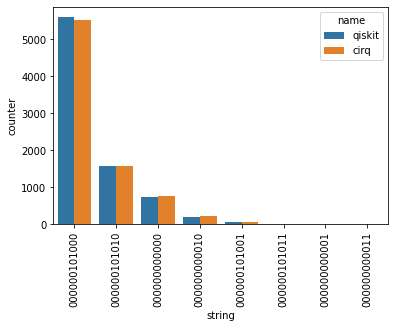

In [13]:
df = convert_dict_to_df(
    res_a, res_b, platform_a='qiskit', platform_b='cirq'
)
sns.barplot(x="string", hue="name", y="counter", data=df, palette=["C0", "C1"])
plt.xticks(rotation=90)
plt.show()

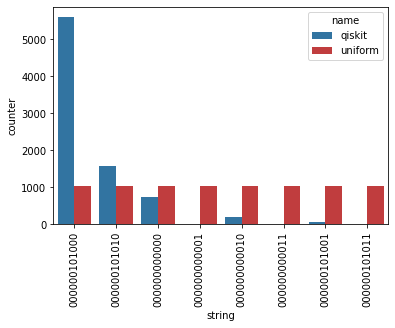

In [14]:
df = convert_dict_to_df(
    res_a, res_unif, platform_a='qiskit', platform_b='uniform'
)
sns.barplot(x="string", hue="name", y="counter", data=df, palette=["C0", "C3"])

plt.xticks(rotation=90)
plt.show()

In [15]:
sample_a = obtain_raw_samples(res_a)
sample_b = obtain_raw_samples(res_b)
sample_unif = obtain_raw_samples(res_unif)

In [16]:
sample_a_mv = obtain_multivariate_samples(res_a)
sample_b_mv = obtain_multivariate_samples(res_b)
sample_unif_mv = obtain_multivariate_samples(res_unif)

# KS Test
- "Two arrays of sample observations assumed to be drawn from a continuous distribution, sample sizes can be different."
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html



In [22]:
from scipy.stats import ks_2samp
from scipy.stats import kstest # alias

ks_2samp(sample_a, sample_b)
# kstest(sample_a, sample_b)

KstestResult(statistic=0.8463134765625, pvalue=0.0)

In [28]:
ks_2samp(sample_a, sample_unif)

KstestResult(statistic=0.3843994140625, pvalue=0.0)

# Anderson K-samples Test


## Single Sample case
According to [Wikipedia](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test), it is equivalent to [Cramér–von Mises criterion](https://en.wikipedia.org/wiki/Cram%C3%A9r%E2%80%93von_Mises_criterion) which is based on empiraical distribution functions (edf).
"Thus, compared with the Cramér–von Mises distance, the Anderson–Darling distance places more weight on observations in the tails of the distribution." [Wikipedia](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test)
**we use k-sample so this is not applicable**


Even if the scipy doc mentions categoritcal, I am not sure that the [actual implementation](https://github.com/scipy/scipy/blob/v1.7.1/scipy/stats/morestats.py#L2130) uses the categorical coefficients mentioned in the seminal [paper](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.1087.8833&rep=rep1&type=pdf) ("K-Sample Anderson-Darling Tests", 1987).

I suspect there is another formula with other coefficeints (in table 3 of the same paper) to use.

In [35]:
from scipy.stats import anderson_ksamp
anderson_ksamp([sample_a, sample_b])

/tmp/ipykernel_33745/2634588702.py:2: UserWarning: p-value capped: true value larger than 0.25
  anderson_ksamp([sample_a, sample_b])


Anderson_ksampResult(statistic=-1.0879497538259495, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

In [29]:
anderson_ksamp([sample_a, sample_unif])

/tmp/ipykernel_33745/1983452767.py:1: UserWarning: p-value floored: true value smaller than 0.001
  anderson_ksamp([sample_a, sample_unif])


Anderson_ksampResult(statistic=704.3506103350016, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

# Jensen-Shannon Divergence

We rely on the implementation in [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.jensenshannon.html#scipy-spatial-distance-jensenshannon) the code is available [here](https://github.com/scipy/scipy/blob/b5d8bab88af61d61de09641243848df63380a67f/scipy/spatial/distance.py#L1220-L1304).


There is also an implementation in a [PyTket Notebook](https://github.com/CQCL/pytket/blob/main/examples/spam_example.ipynb).
It describes the JSD as: "The Jensen-Shannon divergence is a symmetric and finite measure of similarity between two probability distributions. A smaller divergence implies more similarity between two probability distributions."


In [34]:
from scipy.spatial.distance import jensenshannon
from IPython.display import display

In [35]:
df = convert_dict_to_df(
    res_a, res_unif, platform_a='qiskit', platform_b='uniform'
)
df = df.pivot(index='name', columns='string', values='counter')
df = df.fillna(0)
print(df.shape)
display(df.head())
dist = jensenshannon(
    p=list(df.loc["qiskit"]),
    q=list(df.loc["uniform"])
)
print(f"Distance between qiskit and rnadom uniform: {dist}")

(2, 8)


string,000000000000,000000000001,000000000010,000000000011,000000101000,000000101001,000000101010,000000101011
name,,,,,,,,
qiskit,742,9,195,1,5602,56,1575,12
uniform,1024,1024,1024,1024,1024,1024,1024,1024


Distance between qiskit and rnadom uniform: 0.5343832359711707


In [38]:
from detectors import JS_Detector
detector = JS_Detector()
detector.check(res_a, res_unif)

(0.5343832359711707, -1.0)

In [36]:
df = convert_dict_to_df(
    res_a, res_b, platform_a='qiskit', platform_b='cirq'
)
df = df.pivot(index='name', columns='string', values='counter')
df = df.fillna(0)
print(df.shape)
display(df.head())
dist = jensenshannon(
    p=list(df.loc["qiskit"]),
    q=list(df.loc["cirq"])
)
print(f"Distance between qiskit and cirq: {dist}")

(2, 8)


string,000000000000,000000000001,000000000010,000000000011,000000101000,000000101001,000000101010,000000101011
name,,,,,,,,
cirq,767,4,219,2,5535,60,1588,17
qiskit,742,9,195,1,5602,56,1575,12


Distance between qiskit and cirq: 0.013050006267165013


# Energy Test
Assumptions: multivariate data

In [23]:
from detectors import Faster_Energy_Detector

In [27]:
detector = Faster_Energy_Detector()
detector.check(res_a_reexec, res_a)

n_1: 8192
a00: -1.4901161193847656e-08
a11: -1.4901161193847656e-08
a01: 1.4901161193847656e-08
d_1: tensor(2.0524e+08)
d_2: tensor(2.0524e+08)
d_12: tensor(2.0524e+08)
loss: tensor(0.)
<class 'torch.Tensor'>


(0.0, 1)

In [13]:
import torch
from torch_two_sample import statistics_diff

In [11]:
torch_sample_1 = torch.from_numpy(sample_a_mv)
torch_sample_2 = torch.from_numpy(sample_b_mv)
energy_test = statistics_diff.EnergyStatistic(len(sample_a_mv), len(sample_b_mv))
statistics, dist_matrix = energy_test.__call__(torch_sample_1, torch_sample_2, ret_matrix=True)
dist_matrix = dist_matrix.to(torch.float32)
p_value = energy_test.pval(dist_matrix, n_permutations=10)
print("statistics:", statistics)
print("p-value:", p_value)

statistics: tensor(0.0001)
p-value: 1.0


In [78]:
%%prun -D program.prof

torch_sample_1 = torch.from_numpy(sample_a_mv)
torch_sample_2 = torch.from_numpy(sample_unif_mv)  # <-- NOTE CHANGE
energy_test = statistics_diff.EnergyStatistic(len(sample_a_mv), len(sample_unif_mv))  # <-- NOTE CHANGE
statistics, dist_matrix = energy_test.__call__(torch_sample_1, torch_sample_2, ret_matrix=True)
#p_value = energy_test.pval(dist_matrix, n_1=len(sample_a_mv), n_2=len(sample_unif_mv), n_permutations=10)
print("statistics:", statistics)
print("p-value:", p_value)

statistics: tensor(0.6891)
p-value: None
 
*** Profile stats marshalled to file 'program.prof'. 


In [19]:
dist_matrix.shape

(16384, 16384)

In [56]:
dist_matrix

array([[0.00316228, 0.00316228, 0.00316228, ..., 1.4142171 , 1.4142171 ,
        1.4142171 ],
       [0.00316228, 0.00316228, 0.00316228, ..., 1.4142171 , 1.4142171 ,
        1.4142171 ],
       [0.00316228, 0.00316228, 0.00316228, ..., 1.4142171 , 1.4142171 ,
        1.4142171 ],
       ...,
       [1.4142171 , 1.4142171 , 1.4142171 , ..., 0.00316228, 0.00316228,
        0.00316228],
       [1.4142171 , 1.4142171 , 1.4142171 , ..., 0.00316228, 0.00316228,
        0.00316228],
       [1.4142171 , 1.4142171 , 1.4142171 , ..., 0.00316228, 0.00316228,
        0.00316228]], dtype=float32)

In [20]:
dist_matrix[:100, :100].shape

(100, 100)

<AxesSubplot:>

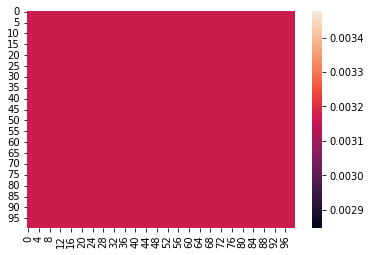

In [21]:
sns.heatmap(
    data=dist_matrix[:100, :100]
)

In [45]:
dist_matrix[0][1]

0.0031622776

In [39]:
%%prun -D program.prof
p_value = my_pval(dist_matrix, n_1=len(sample_a_mv), n_2=len(sample_unif_mv), n_permutations=10)

 
*** Profile stats marshalled to file 'program.prof'. 


In [34]:
sample_a_mv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [36]:
keys, values = zip(*res_a.items())
keys

('000000101000',
 '000000101010',
 '000000000000',
 '000000101001',
 '000000000010',
 '000000101011',
 '000000000001',
 '000000000011')

In [37]:
values

(5602, 1575, 742, 56, 195, 12, 9, 1)

In [ ]:
def unique_multivariates_and_frequencies(result_dictionary):
    """Return keys as multivariate vectors and their frequecies."""
    keys, frequencies = zip(*result_dictionary.items())
    multivariate_keys = np.vstack([
        np.array([int(x) for x in bin_string])
        for bin_string in keys
    ])
    return multivariate_keys, frequencies


def pdist(sample_1, sample_2, norm=2, eps=1e-5):
    r"""Compute the matrix of all squared pairwise distances.
    Arguments
    ---------
    sample_1 : torch.Tensor or Variable
        The first sample, should be of shape ``(n_1, d)``.
    sample_2 : torch.Tensor or Variable
        The second sample, should be of shape ``(n_2, d)``.
    norm : float
        The l_p norm to be used.
    Returns
    -------
    torch.Tensor or Variable
        Matrix of shape (n_1, n_2). The [i, j]-th entry is equal to
        ``|| sample_1[i, :] - sample_2[j, :] ||_p``."""
    n_1, n_2 = sample_1.size(0), sample_2.size(0)
    norm = float(norm)
    if norm == 2.:
        norms_1 = torch.sum(sample_1**2, dim=1, keepdim=True)
        norms_2 = torch.sum(sample_2**2, dim=1, keepdim=True)
        norms = (norms_1.expand(n_1, n_2) +
                 norms_2.transpose(0, 1).expand(n_1, n_2))
        distances_squared = norms - 2 * sample_1.mm(sample_2.t())
        return torch.sqrt(eps + torch.abs(distances_squared))
    else:
        dim = sample_1.size(1)
        expanded_1 = sample_1.unsqueeze(1).expand(n_1, n_2, dim)
        expanded_2 = sample_2.unsqueeze(0).expand(n_1, n_2, dim)
        differences = torch.abs(expanded_1 - expanded_2) ** norm
        inner = torch.sum(differences, dim=2, keepdim=False)
        return (eps + inner) ** (1. / norm)
    
    
def increase_dimension(small_matrix, record_frequencies):
    """Duplicate row and column based on the frquencies.
    
    Note that record_frequencies contains record like:
    
    7: 128, 
    
    which means that the row and column 7 have to be replicated 128 times,
    vertically and horizontally respectively.
    """
    repeat_tensor = torch.tensor(np.array(record_frequencies))
    print(repeat_tensor)
    small_matrix = torch.repeat_interleave(small_matrix, repeat_tensor, dim=1)
    small_matrix = torch.repeat_interleave(small_matrix, repeat_tensor, dim=0)
    print(small_matrix)
    return small_matrix
        
    
    
def energy_call(res_1, res_2):
    
        values_1, freq_1 = unique_multivariates_and_frequencies(result_dictionary=res_1)
        values_2, freq_2 = unique_multivariates_and_frequencies(result_dictionary=res_2)
        
        
        values_1 = torch.from_numpy(values_1)
        values_2 = torch.from_numpy(values_2)
        sample_12 = torch.cat((values_1, values_2), 0)
        
        small_matrix = pdist(sample_12, sample_12, norm=2)
        distances = increase_dimension(
            small_matrix=small_matrix, 
            record_frequencies=np.hstack((np.array(freq_1), np.array(freq_2))))
        #distances = pdist(sample_12, sample_12, norm=2)

        n_1 = sum(freq_1)
        print("n_1:", n_1)
        n_2 = sum(freq_2)
        a00 = - 1. / (n_1 * n_1)
        a11 = - 1. / (n_2 * n_2)
        a01 = 1. / (n_1 * n_2)
        print("a00:", a00)
        print("a11:", a11)
        print("a01:", a01)
        
        d_1 = distances[:n_1, :n_1].sum()
        d_2 = distances[-n_2:, -n_2:].sum()
        d_12 = distances[:n_1, -n_2:].sum()
        print("d_1:", d_1)
        print("d_2:", d_2)
        print("d_12:", d_12)

        loss = 2 * a01 * d_12 + a00 * d_1 + a11 * d_2
        print("loss:", loss)
        print(type(loss))
        return loss

In [75]:
import numba
import numpy as np
from numba import jit

@jit(nopython=True)
def permutation_test_mat(matrix: np.ndarray,
                         n_1: int , n_2: int, n_permutations: int,
                         a00: float=1, a11: float=1, a01: float=0):
    """Compute the p-value of the following statistic (rejects when high)
        \sum_{i,j} a_{\pi(i), \pi(j)} matrix[i, j].
    """
    n = n_1 + n_2
    pi = np.zeros(n, dtype=np.int8)
    pi[n_1:] = 1

    statistic = 0
    larger = 0.
    count = 0
    i = 0
    j = 0
    #cdef float mij
    #cdef int sample_n
    for sample_n in range(1 + n_permutations):
        count = 0.
        for i in range(n):
            for j in range(i, n):
                mij = matrix[i, j] + matrix[j, i]
                if pi[i] == 0 and pi[j] == 0:
                    count += a00 * mij
                elif pi[i] == 1 and pi[j] == 1:
                    count += a11 * mij
                else:
                    count += a01 * mij
        if sample_n == 0:
            statistic = count
        elif statistic <= count:
            larger += 1

        np.random.shuffle(pi)

    return larger / n_permutations


@jit(nopython=True)
def my_pval(distances, n_1, n_2, n_permutations=1000):
    a00 = - 1. / (n_1 * n_1)
    a11 = - 1. / (n_2 * n_2)
    a01 = 1. / (n_1 * n_2)
    permutation_test_mat(
        distances,
        n_1, n_2,
        n_permutations,
        a00=a00, a11=a11, a01=a01)

In [79]:
%%prun -D program.prof
distances = energy_call(res_1=res_a, res_2=res_unif)

tensor([5602, 1575,  742,   56,  195,   12,    9,    1, 1024, 1024, 1024, 1024,
        1024, 1024, 1024, 1024])
tensor([[0.0032, 0.0032, 0.0032,  ..., 1.4142, 1.4142, 1.4142],
        [0.0032, 0.0032, 0.0032,  ..., 1.4142, 1.4142, 1.4142],
        [0.0032, 0.0032, 0.0032,  ..., 1.4142, 1.4142, 1.4142],
        ...,
        [1.4142, 1.4142, 1.4142,  ..., 0.0032, 0.0032, 0.0032],
        [1.4142, 1.4142, 1.4142,  ..., 0.0032, 0.0032, 0.0032],
        [1.4142, 1.4142, 1.4142,  ..., 0.0032, 0.0032, 0.0032]])
n_1: 8192
a00: -1.4901161193847656e-08
a11: -1.4901161193847656e-08
a01: 1.4901161193847656e-08
d_1: tensor(40122380.)
d_2: tensor(86366544.)
d_12: tensor(86366624.)
loss: tensor(0.6891)
<class 'torch.Tensor'>
 
*** Profile stats marshalled to file 'program.prof'. 


In [71]:
2 + 1.4901161193847656e-08 * 40122380 + -1.4901161193847656e-08 * 40122380 + -1.4901161193847656e-08 * 40122380

1.4021299481391907

In [55]:
distances.shape

torch.Size([16384, 16384])

In [52]:

statistics= energy_call(res_1=res_a, res_2=res_b)
statistics

tensor([5602, 1575,  742,   56,  195,   12,    9,    1, 5602, 1575,  742,   56,
         195,   12,    9,    1])
tensor([[0.0032, 0.0032, 0.0032,  ..., 1.7321, 1.7321, 2.0000],
        [0.0032, 0.0032, 0.0032,  ..., 1.7321, 1.7321, 2.0000],
        [0.0032, 0.0032, 0.0032,  ..., 1.7321, 1.7321, 2.0000],
        ...,
        [1.7321, 1.7321, 1.7321,  ..., 0.0032, 0.0032, 1.0000],
        [1.7321, 1.7321, 1.7321,  ..., 0.0032, 0.0032, 1.0000],
        [2.0000, 2.0000, 2.0000,  ..., 1.0000, 1.0000, 0.0032]])


tensor(0.)

In [50]:
statistics= energy_call(res_1=res_a, res_2=res_unif)
statistics

tensor([5602, 1575,  742,   56,  195,   12,    9,    1, 5602, 1575,  742,   56,
         195,   12,    9,    1])
tensor([[0., 5., 3., 3., 3., 3., 1., 2.],
        [5., 0., 2., 2., 2., 2., 4., 7.],
        [3., 2., 0., 0., 0., 0., 2., 5.],
        [3., 2., 0., 0., 0., 0., 2., 5.],
        [3., 2., 0., 0., 0., 0., 2., 5.],
        [3., 2., 0., 0., 0., 0., 2., 5.],
        [1., 4., 2., 2., 2., 2., 0., 3.],
        [2., 7., 5., 5., 5., 5., 3., 0.]])


tensor(0.)

## Experiment

In [22]:
t = torch.rand(4,1)
print(t)
tr = t.repeat(1, 3)
print(tr)

tensor([[0.5580],
        [0.0469],
        [0.1790],
        [0.3435]])
tensor([[0.5580, 0.5580, 0.5580],
        [0.0469, 0.0469, 0.0469],
        [0.1790, 0.1790, 0.1790],
        [0.3435, 0.3435, 0.3435]])


In [25]:
X = torch.FloatTensor([
    [0,5,3,1,2],
    [5,0,2,4,7],
    [3,2,0,2,5],
    [1,4,2,0,3],
    [2,7,5,3,0]
])

In [33]:
num_repeats = 2
repeat_tensor = torch.tensor(num_repeats).to(X.device, torch.int64)
repeat_tensor = torch.tensor(np.array([1,1,4,1,1]))
print(repeat_tensor)
X_dup_col = torch.repeat_interleave(X, repeat_tensor, dim=1)
X_dup_all = torch.repeat_interleave(X_dup_col, repeat_tensor, dim=0)
print(X_dup_all)

tensor([1, 1, 4, 1, 1])
tensor([[0., 5., 3., 3., 3., 3., 1., 2.],
        [5., 0., 2., 2., 2., 2., 4., 7.],
        [3., 2., 0., 0., 0., 0., 2., 5.],
        [3., 2., 0., 0., 0., 0., 2., 5.],
        [3., 2., 0., 0., 0., 0., 2., 5.],
        [3., 2., 0., 0., 0., 0., 2., 5.],
        [1., 4., 2., 2., 2., 2., 0., 3.],
        [2., 7., 5., 5., 5., 5., 3., 0.]])
